In [5]:
import pandas as pd
import re

# 读取CSV文件
df = pd.read_csv('./DeepSeek-V3-Fast_with_emotional.csv')

# 定义一个函数来提取case_id中的数字部分
def extract_case_number(case_id):
    match = re.search(r'(\d+)', str(case_id))
    return int(match.group(1)) if match else 0

# 查看case_id的基本信息
print("=" * 50)
print("Case ID 基本信息")
print("=" * 50)

# 获取case_id的唯一值并按数字排序
unique_case_ids = df['case_id'].unique()
sorted_case_ids = sorted(unique_case_ids, key=extract_case_number)
print(f"\nCase ID 总数: {len(sorted_case_ids)}")
print(f"Case ID 范围: {sorted_case_ids}")

# 统计每个case_id的数量，并按数字排序
case_id_counts = df['case_id'].value_counts()
# 按照case_id中的数字排序
sorted_index = sorted(case_id_counts.index, key=extract_case_number)
case_id_counts_sorted = case_id_counts[sorted_index]

print("\n" + "=" * 50)
print("每个 Case ID 的数量统计（按ID排序）")
print("=" * 50)
print(case_id_counts_sorted)

# 查看数量的描述性统计
print("\n" + "=" * 50)
print("数量的描述性统计")
print("=" * 50)
print(case_id_counts_sorted.describe())

# 检查是否有缺失值
print("\n" + "=" * 50)
print("缺失值检查")
print("=" * 50)
print(f"Case ID 缺失值数量: {df['case_id'].isna().sum()}")

# 可选：查看role分布
print("\n" + "=" * 50)
print("Role 分布")
print("=" * 50)
print(df['role'].value_counts())

# 可选：查看case_id和role的交叉统计（按case_id数字排序）
print("\n" + "=" * 50)
print("Case ID 和 Role 的交叉统计（按ID排序）")
print("=" * 50)
cross_tab = pd.crosstab(df['case_id'], df['role'])
# 按照case_id中的数字排序行索引
sorted_row_index = sorted(cross_tab.index, key=extract_case_number)
cross_tab_sorted = cross_tab.loc[sorted_row_index]
print(cross_tab_sorted)

Case ID 基本信息

Case ID 总数: 54
Case ID 范围: ['CSV_1', 'CSV_2', 'CSV_3', 'CSV_4', 'CSV_5', 'CSV_6', 'CSV_7', 'CSV_8', 'CSV_9', 'CSV_10', 'CSV_11', 'CSV_12', 'CSV_13', 'CSV_14', 'CSV_15', 'CSV_16', 'CSV_17', 'CSV_18', 'CSV_19', 'CSV_20', 'CSV_21', 'CSV_22', 'CSV_23', 'CSV_24', 'CSV_25', 'CSV_26', 'CSV_27', 'CSV_28', 'CSV_29', 'CSV_30', 'CSV_31', 'CSV_32', 'CSV_33', 'CSV_34', 'CSV_35', 'CSV_36', 'CSV_37', 'CSV_38', 'CSV_39', 'CSV_40', 'CSV_41', 'CSV_42', 'CSV_43', 'CSV_44', 'CSV_45', 'CSV_46', 'CSV_47', 'CSV_48', 'CSV_49', 'CSV_50', 'CSV_51', 'CSV_52', 'CSV_53', 'CSV_54']

每个 Case ID 的数量统计（按ID排序）
case_id
CSV_1     40
CSV_2     40
CSV_3     40
CSV_4     40
CSV_5     40
CSV_6     40
CSV_7     40
CSV_8     40
CSV_9     40
CSV_10    40
CSV_11    40
CSV_12    40
CSV_13    40
CSV_14    40
CSV_15    40
CSV_16    40
CSV_17    40
CSV_18    40
CSV_19    40
CSV_20    40
CSV_21    40
CSV_22    40
CSV_23    40
CSV_24    40
CSV_25    40
CSV_26    40
CSV_27    40
CSV_28    40
CSV_29    40
CSV_30    40
CSV_

In [1]:
import pandas as pd
import re
import os
from pathlib import Path

# 创建输出文件夹
output_dir = './age_organized_data'
os.makedirs(output_dir, exist_ok=True)

# 读取crime数据（只需读取一次）
crime_df = pd.read_csv('./final_crime_data.csv')
category_map = dict(zip(crime_df['序号'], crime_df['Category']))

# 定义所有处理函数
def extract_id(case_id):
    match = re.search(r'CSV_(\d+)', str(case_id))
    if match:
        return int(match.group(1))
    return None

def convert_delay_to_years(delay_str):
    if pd.isna(delay_str) or delay_str == '':
        return 0
    
    delay_str = str(delay_str).strip()
    
    # 如果是"当时"
    if '当时' in delay_str:
        return 0
    
    # 汉字数字到阿拉伯数字的映射
    chinese_num_map = {
        '零': 0, '一': 1, '二': 2, '三': 3, '四': 4,
        '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,
        '十': 10, '两': 2
    }
    
    years = 0
    months = 0
    
    # 处理年
    year_match = re.search(r'([零一二三四五六七八九十两]+)年', delay_str)
    if year_match:
        year_str = year_match.group(1)
        # 转换汉字数字
        if year_str in chinese_num_map:
            years = chinese_num_map[year_str]
        elif '十' in year_str:
            if year_str == '十':
                years = 10
            elif year_str.startswith('十'):
                years = 10 + chinese_num_map.get(year_str[1], 0)
            else:
                tens = chinese_num_map.get(year_str[0], 0)
                if len(year_str) == 2:  # 如x十
                    years = tens * 10
                else:  # 如x十y
                    ones = chinese_num_map.get(year_str[2], 0)
                    years = tens * 10 + ones
    
    # 处理月
    month_match = re.search(r'([零一二三四五六七八九十两]+)个月', delay_str)
    if month_match:
        month_str = month_match.group(1)
        # 转换汉字数字
        if month_str in chinese_num_map:
            months = chinese_num_map[month_str]
        elif '十' in month_str:
            if month_str == '十':
                months = 10
            elif month_str.startswith('十'):
                months = 10 + chinese_num_map.get(month_str[1], 0)
            else:
                tens = chinese_num_map.get(month_str[0], 0)
                if len(month_str) == 2:
                    months = tens * 10
                else:
                    ones = chinese_num_map.get(month_str[2], 0)
                    months = tens * 10 + ones
    
    # 转换为年（月除以12）
    total_years = years + (months / 12.0)
    return total_years

def process_csv_file(input_path, output_path):
    """处理单个CSV文件"""
    try:
        # 读取CSV文件
        df = pd.read_csv(input_path)
        
        # 1. 提取List2
        df['List2'] = df['case_id'].apply(extract_id)
        
        # 2. 获取Category
        df['Category'] = df['List2'].map(category_map)
        
        # 3. Rating
        df['Rating'] = df['score']
        
        # 4. 转换Delay_Info
        df['Delay_Info'] = df['delay_time'].apply(convert_delay_to_years)
        
        # 5. Emotion
        df['Emotion'] = df['emotional_arousal']
        
        # 6. Role
        df['Role'] = df['role']
        
        # 选择需要的列
        result_df = df[['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']]
        
        # 保存结果
        result_df.to_csv(output_path, index=False, encoding='utf-8-sig')
        
        return True, None
    except Exception as e:
        return False, str(e)

# 遍历age文件夹中的所有CSV文件
age_dir = './age'
csv_files = list(Path(age_dir).glob('*.csv'))

print(f"找到 {len(csv_files)} 个CSV文件")
print("-" * 80)

success_count = 0
fail_count = 0

for csv_file in csv_files:
    input_filename = csv_file.name
    
    # 提取输出文件名
    # 例如: DeepSeek-V3-Fast_exp07_long-term-reasoning_with_emotion_DeepSeek_20251104_222324.csv
    # 找到最后一个下划线后跟日期的位置，去掉日期部分
    match = re.search(r'(.+?)_\d{8}_\d{6}\.csv$', input_filename)
    if match:
        output_filename = match.group(1) + '_organized_data.csv'
    else:
        # 如果没有匹配到日期格式，直接替换.csv为_organized_data.csv
        output_filename = input_filename.replace('.csv', '_organized_data.csv')
    
    input_path = csv_file
    output_path = os.path.join(output_dir, output_filename)
    
    print(f"处理: {input_filename}")
    print(f"  → {output_filename}")
    
    success, error = process_csv_file(input_path, output_path)
    
    if success:
        print(f"  ✓ 成功")
        success_count += 1
    else:
        print(f"  ✗ 失败: {error}")
        fail_count += 1
    
    print()

print("-" * 80)
print(f"处理完成！")
print(f"成功: {success_count} 个文件")
print(f"失败: {fail_count} 个文件")
print(f"结果已保存到: {output_dir}")

找到 90 个CSV文件
--------------------------------------------------------------------------------
处理: DeepSeek-V3-Fast_exp001_age20_NAN-reasoning_with_emotion_DeepSeek_20251105_022941.csv
  → DeepSeek-V3-Fast_exp001_age20_NAN-reasoning_with_emotion_DeepSeek_organized_data.csv
  ✓ 成功

处理: DeepSeek-V3-Fast_exp004_age20_NAN-reasoning_without_emotion_DeepSeek_20251105_022941.csv
  → DeepSeek-V3-Fast_exp004_age20_NAN-reasoning_without_emotion_DeepSeek_organized_data.csv
  ✓ 成功

处理: DeepSeek-V3-Fast_exp007_age20_long-term-reasoning_with_emotion_DeepSeek_20251105_022941.csv
  → DeepSeek-V3-Fast_exp007_age20_long-term-reasoning_with_emotion_DeepSeek_organized_data.csv
  ✓ 成功

处理: DeepSeek-V3-Fast_exp010_age20_long-term-reasoning_without_emotion_DeepSeek_20251105_022941.csv
  → DeepSeek-V3-Fast_exp010_age20_long-term-reasoning_without_emotion_DeepSeek_organized_data.csv
  ✓ 成功

处理: DeepSeek-V3-Fast_exp013_age20_short-term-reasoning_with_emotion_DeepSeek_20251105_022941.csv
  → DeepSeek-V3-Fast_exp0

In [30]:
import pandas as pd
import re

model_name = 'DeepSeek-V3-Fast'
# model_name = 'Kimi-K2-0905'
# model_name = 'Qwen3-235B-A22B-Instruct-2507'
# 读取CSV文件
df = pd.read_csv('./' + model_name + '_without_emotional.csv')
crime_df = pd.read_csv('./final_crime_data.csv')

# 1. 提取List2 (从case_id中提取id)
def extract_id(case_id):
    match = re.search(r'CSV_(\d+)', str(case_id))
    if match:
        return int(match.group(1))
    return None

df['List2'] = df['case_id'].apply(extract_id)

# 2. 从final_crime_data.csv中获取Category
# 创建序号到Category的映射
category_map = dict(zip(crime_df['序号'], crime_df['Category']))
df['Category'] = df['List2'].map(category_map)

# 3. Rating直接从score列获取
df['Rating'] = df['score']

# 4. 转换Delay_Info (将delay_time转换为以年为单位的数字)
def convert_delay_to_years(delay_str):
    if pd.isna(delay_str) or delay_str == '':
        return 0
    
    delay_str = str(delay_str).strip()
    
    # 如果是"当时"
    if '当时' in delay_str:
        return 0
    
    # 汉字数字到阿拉伯数字的映射
    chinese_num_map = {
        '零': 0, '一': 1, '二': 2, '三': 3, '四': 4,
        '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,
        '十': 10, '两': 2
    }
    
    years = 0
    months = 0
    
    # 处理年
    year_match = re.search(r'([零一二三四五六七八九十两]+)年', delay_str)
    if year_match:
        year_str = year_match.group(1)
        # 转换汉字数字
        if year_str in chinese_num_map:
            years = chinese_num_map[year_str]
        elif '十' in year_str:
            if year_str == '十':
                years = 10
            elif year_str.startswith('十'):
                years = 10 + chinese_num_map.get(year_str[1], 0)
            else:
                tens = chinese_num_map.get(year_str[0], 0)
                if len(year_str) == 2:  # 如x十
                    years = tens * 10
                else:  # 如x十y
                    ones = chinese_num_map.get(year_str[2], 0)
                    years = tens * 10 + ones
    
    # 处理月
    month_match = re.search(r'([零一二三四五六七八九十两]+)个月', delay_str)
    if month_match:
        month_str = month_match.group(1)
        # 转换汉字数字
        if month_str in chinese_num_map:
            months = chinese_num_map[month_str]
        elif '十' in month_str:
            if month_str == '十':
                months = 10
            elif month_str.startswith('十'):
                months = 10 + chinese_num_map.get(month_str[1], 0)
            else:
                tens = chinese_num_map.get(month_str[0], 0)
                if len(month_str) == 2:
                    months = tens * 10
                else:
                    ones = chinese_num_map.get(month_str[2], 0)
                    months = tens * 10 + ones
    
    # 转换为年（月除以12）
    total_years = years + (months / 12.0)
    return total_years

df['Delay_Info'] = df['delay_time'].apply(convert_delay_to_years)

# 5. Emotion直接从emotional_arousal列获取
df['Emotion'] = df['emotional_arousal']

# 6. Role直接从role列获取
df['Role'] = df['role']

# 选择需要的列
result_df = df[['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']]

# 保存结果
result_df.to_csv('./'+model_name+'_organized_data.csv', index=False, encoding='utf-8-sig')

print("数据整理完成！")
print("\n前几行预览:")
print(result_df.head(10))
print("\n数据统计信息:")
print(result_df.describe())
print("\nCategory分布:")
print(result_df['Category'].value_counts())
print("\nRole分布:")
print(result_df['Role'].value_counts())

数据整理完成！

前几行预览:
   List2  Category  Rating  Delay_Info  Emotion Role
0      1       3.0       9         0.0        9  SPP
1      1       3.0       9         0.0        9  SPP
2      1       3.0       9         0.0        9  SPP
3      1       3.0       9         0.0        9  SPP
4      1       3.0       9         0.0        9  SPP
5      1       3.0       9         0.0        9  SPP
6      1       3.0       9         0.0        9  SPP
7      1       3.0       9         0.0        9  SPP
8      1       3.0       9         0.0        9  SPP
9      1       3.0       9         0.0        9  SPP

数据统计信息:
             List2     Category       Rating   Delay_Info      Emotion
count  2160.000000  2160.000000  2160.000000  2160.000000  2160.000000
mean     27.500000     2.000000     6.182407     3.402778     6.223611
std      15.589393     0.816686     2.608652     6.422977     2.109441
min       1.000000     1.000000     0.000000     0.000000     0.000000
25%      14.000000     1.000000     4

In [12]:
import pandas as pd
import re
import os
import numpy as np
import matplotlib
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

使用LLM数据进行分析。
------------------------------
LLM数据共读取到 2160 条记录。
------------------------------
Role列的唯一值: ['SPP' 'TPP']
------------------------------
数据列名: ['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']

数据基本信息:
Category 唯一值: [3. 1. 2.]
Delay_Info 唯一值: [ 0.         12.          0.08333333  1.          3.          0.16666667
  0.75        6.          9.          2.          8.         15.
  0.5         4.          7.          0.66666667 21.          0.33333333
  0.41666667 24.          0.58333333 18.          0.25       27.
  5.        ]
Rating 范围: 0 - 9
LLM数据预处理完成。
------------------------------
TPP组数据量: 1080
SPP组数据量: 1080
------------------------------

TPP组数据分布检查:
各条件下的数据量统计:
                    Rating              
                     count   mean    std
Category Delay_Info                     
1.0      0.000000      180  3.333  1.596
         0.083333       20  0.950  0.224
         0.166667       20  1.550  0.510
         0.250000       20  2.600  0.598
       

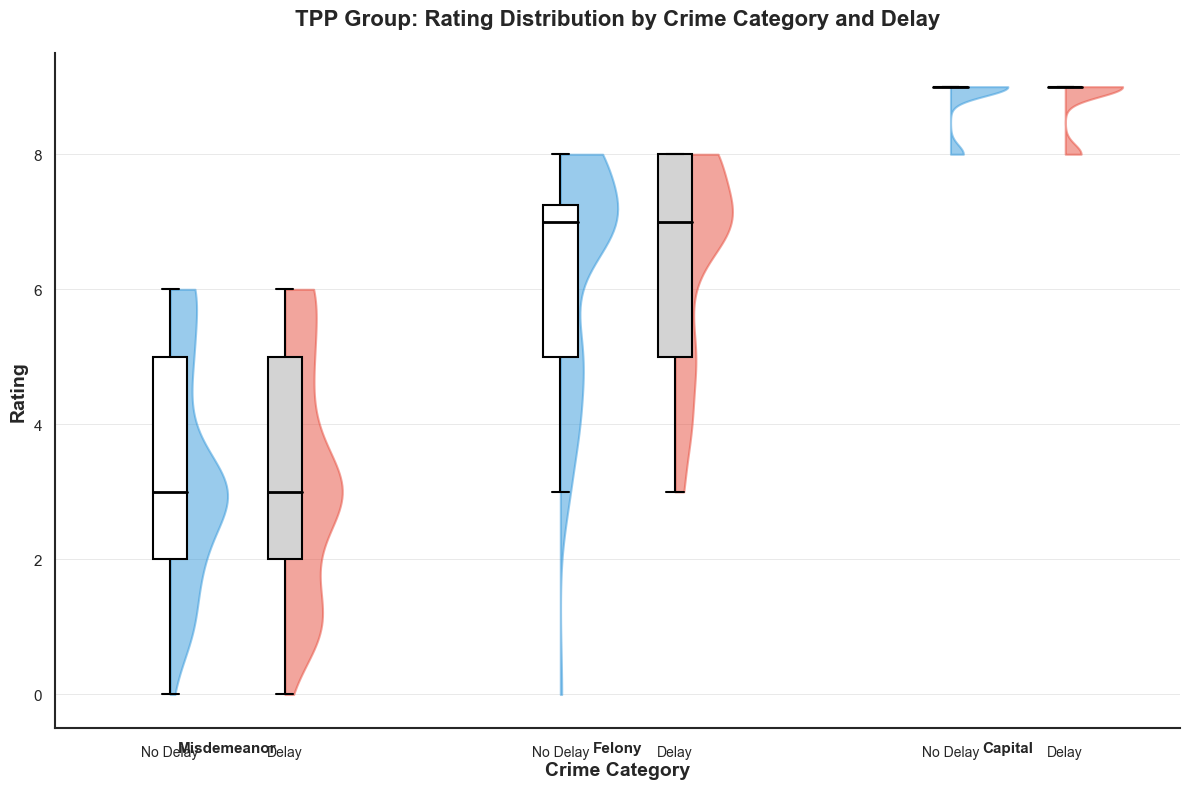


SPP组分析

SPP组显著性检验结果

Misdemeanor类别详细数据:
  Delay组数据量: 180
  No Delay组数据量: 180

Misdemeanor:
  Delay: N=180, Mean=3.406, SD=1.710
  No Delay: N=180, Mean=3.378, SD=1.737
  Mann-Whitney U statistic=16350.000, p-value=0.8773
  显著性: ns

Felony类别详细数据:
  Delay组数据量: 180
  No Delay组数据量: 180

Felony:
  Delay: N=180, Mean=6.417, SD=1.606
  No Delay: N=180, Mean=6.433, SD=1.517
  Mann-Whitney U statistic=16363.000, p-value=0.8624
  显著性: ns

Capital类别详细数据:
  Delay组数据量: 180
  No Delay组数据量: 180

Capital:
  Delay: N=180, Mean=8.806, SD=0.397
  No Delay: N=180, Mean=8.828, SD=0.379
  Mann-Whitney U statistic=15840.000, p-value=0.5869
  显著性: ns
SPP - Misdemeanor - No Delay: 180个数据点
SPP - Misdemeanor - Delay: 180个数据点
SPP - Felony - No Delay: 180个数据点
SPP - Felony - Delay: 180个数据点
SPP - Capital - No Delay: 180个数据点
SPP - Capital - Delay: 180个数据点
图片已保存至: SPP_group_visualization.png


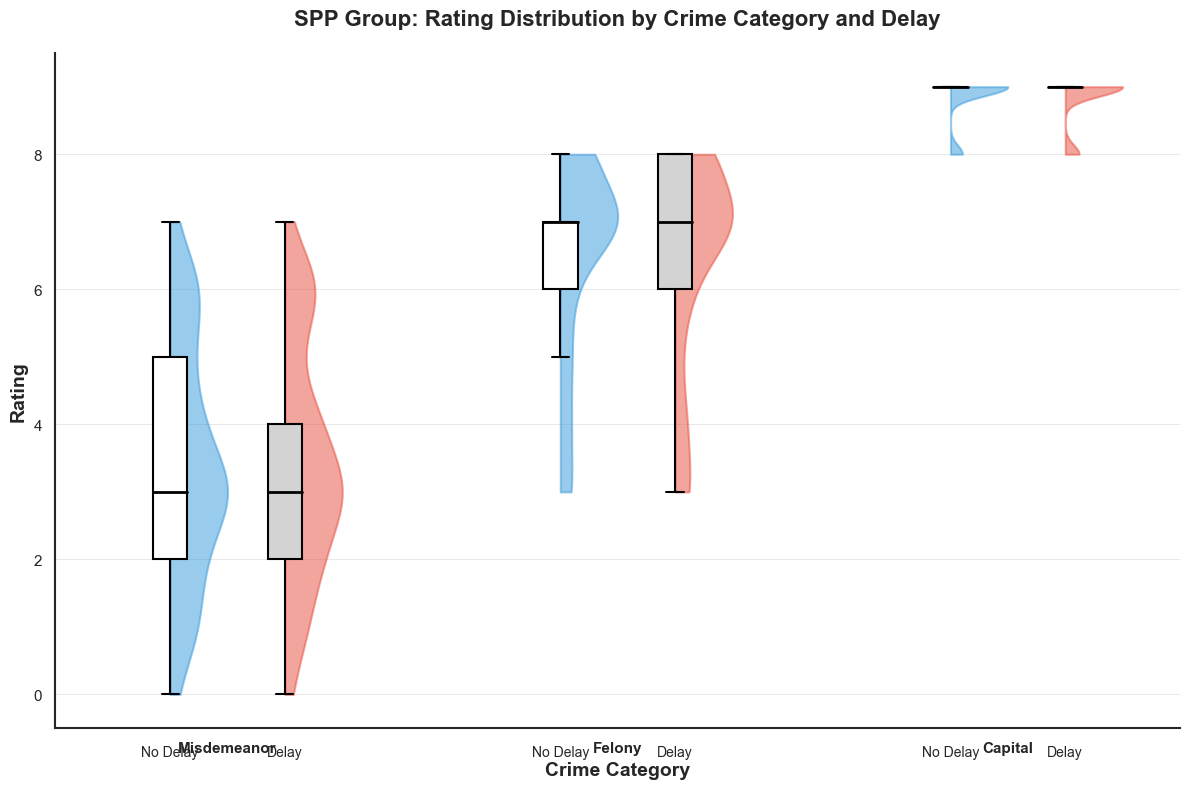


保存了TPP组 3 个类别的统计结果
保存了SPP组 3 个类别的统计结果

分析完成！


In [23]:
# --- 4. 执行主逻辑 ---
# 直接使用LLM数据，跳过延迟查找表的创建
print("使用LLM数据进行分析。")
print("-" * 30)

# 读取LLM数据
df_llm = pd.read_csv('./organized_data.csv')
print(f"LLM数据共读取到 {len(df_llm)} 条记录。")
print("-" * 30)

# 检查数据中的Role列
print("Role列的唯一值:", df_llm['Role'].unique())
print("-" * 30)

# 数据预处理 - 确保列名和格式正确
def prepare_llm_data(df):
    """准备LLM数据用于分析"""
    df_clean = df.copy()
    
    # 打印列名以确认
    print("数据列名:", df_clean.columns.tolist())
    
    # 确保数据类型正确
    if 'Category' in df_clean.columns:
        df_clean['Category'] = pd.to_numeric(df_clean['Category'], errors='coerce')
    if 'Rating' in df_clean.columns:
        df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')
    if 'Delay_Info' in df_clean.columns:
        df_clean['Delay_Info'] = pd.to_numeric(df_clean['Delay_Info'], errors='coerce')
    
    # 打印数据基本信息
    print("\n数据基本信息:")
    print(f"Category 唯一值: {df_clean['Category'].unique()}")
    print(f"Delay_Info 唯一值: {df_clean['Delay_Info'].unique()}")
    print(f"Rating 范围: {df_clean['Rating'].min()} - {df_clean['Rating'].max()}")
    
    return df_clean

# 准备LLM数据
llm_data = prepare_llm_data(df_llm)
print("LLM数据预处理完成。")
print("-" * 30)

# 根据Role列拆分数据
tpp_data = llm_data[llm_data['Role'] == 'TPP']
spp_data = llm_data[llm_data['Role'] == 'SPP']

print(f"TPP组数据量: {len(tpp_data)}")
print(f"SPP组数据量: {len(spp_data)}")
print("-" * 30)

# 检查数据分布
def check_data_distribution(df, group_name):
    """检查数据分布情况"""
    print(f"\n{group_name}组数据分布检查:")
    print("=" * 50)
    
    # 按Category和Delay_Info分组统计
    distribution = df.groupby(['Category', 'Delay_Info']).agg({
        'Rating': ['count', 'mean', 'std']
    }).round(3)
    
    print("各条件下的数据量统计:")
    print(distribution)
    print("\n")
    
    # 详细检查每个Category
    categories = [1, 2, 3]
    delay_types = [0, 1]
    
    for cat in categories:
        cat_data = df[df['Category'] == cat]
        print(f"Category {cat}: 总数据量 = {len(cat_data)}")
        
        for delay in delay_types:
            delay_data = cat_data[cat_data['Delay_Info'] == delay]
            print(f"  Delay_Info {delay}: 数据量 = {len(delay_data)}")
            
            if len(delay_data) > 0:
                print(f"    评分均值 = {delay_data['Rating'].mean():.3f}")
                print(f"    评分标准差 = {delay_data['Rating'].std():.3f}")
        print("-" * 30)

# 检查两组数据分布
check_data_distribution(tpp_data, "TPP")
check_data_distribution(spp_data, "SPP")

# --- 5. 数据准备：添加分类标签 ---
def prepare_plot_data(df):
    """准备可视化数据，添加分类标签"""
    df = df.copy()
    
    category_map = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}
    df['Category_Label'] = df['Category'].map(category_map)
    
    df['Delay_Label'] = df['Delay_Info'].apply(lambda x: 'No Delay' if x == 0 else 'Delay')
    
    df['Combined_Label'] = df['Category_Label'] + '\n' + df['Delay_Label']
    
    return df

tpp_plot_data = prepare_plot_data(tpp_data)
spp_plot_data = prepare_plot_data(spp_data)

print(f"TPP组总数据量: {len(tpp_plot_data)}")
print(f"SPP组总数据量: {len(spp_plot_data)}")

# --- 6. 显著性检验函数 ---
def perform_significance_tests(df, group_name):
    """
    对每个Category内的Delay vs No Delay进行Mann-Whitney U检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组显著性检验结果")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        cat_data = df[df['Category_Label'] == cat]
        
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Rating'].dropna()
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Rating'].dropna()
        
        print(f"\n{cat}类别详细数据:")
        print(f"  Delay组数据量: {len(delay_data)}")
        print(f"  No Delay组数据量: {len(no_delay_data)}")
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            # 检查数据是否足够进行检验
            if len(delay_data) >= 3 and len(no_delay_data) >= 3:
                try:
                    statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
                    
                    delay_mean = delay_data.mean()
                    delay_std = delay_data.std()
                    no_delay_mean = no_delay_data.mean()
                    no_delay_std = no_delay_data.std()
                    
                    print(f"\n{cat}:")
                    print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
                    print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
                    print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
                    
                    if p_value < 0.001:
                        sig_label = '***'
                    elif p_value < 0.01:
                        sig_label = '**'
                    elif p_value < 0.05:
                        sig_label = '*'
                    else:
                        sig_label = 'ns'
                    
                    print(f"  显著性: {sig_label}")
                    
                    results.append({
                        'Category': cat,
                        'Delay_N': len(delay_data),
                        'Delay_Mean': delay_mean,
                        'Delay_SD': delay_std,
                        'NoDelay_N': len(no_delay_data),
                        'NoDelay_Mean': no_delay_mean,
                        'NoDelay_SD': no_delay_std,
                        'U_statistic': statistic,
                        'p_value': p_value,
                        'significance': sig_label
                    })
                except Exception as e:
                    print(f"  检验过程中出现错误: {e}")
            else:
                print(f"  {cat}: 数据量不足进行Mann-Whitney U检验 (需要每组至少3个数据点)")
        else:
            print(f"  {cat}: 至少有一组数据为空，无法进行检验")
    
    return pd.DataFrame(results)

# --- 7. 可视化函数 ---
def create_half_violin_box_plot(df, group_name, save_path=None):
    """
    创建黑白箱线图，右侧贴彩色半个分布图
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 定义类别顺序
    category_order = ['Misdemeanor', 'Felony', 'Capital']
    delay_order = ['No Delay', 'Delay']
    
    # 定义颜色方案（为分布图使用）
    colors = {
        'No Delay': '#3498db',  # 蓝色
        'Delay': '#e74c3c'      # 红色
    }
    
    # 准备数据
    plot_data = df.dropna(subset=['Rating', 'Category_Label', 'Delay_Label'])
    
    # 创建位置映射 - 缩短间距
    positions = []
    labels = []
    within_gap = 0.5  # 小类之间的间距（No Delay 和 Delay 之间）
    between_gap = 1.2  # 大类之间的间距
    
    current_pos = 0
    for i, cat in enumerate(category_order):
        if i > 0:
            current_pos += between_gap  # 大类之间的间距
        for j, delay in enumerate(delay_order):
            positions.append(current_pos)
            labels.append(delay)
            if j == 0:  # 只在第一个小类后加小间距
                current_pos += within_gap
    
    # 获取所有数据组
    data_groups = []
    for cat in category_order:
        for delay in delay_order:
            subset_data = plot_data[(plot_data['Category_Label'] == cat) & 
                                   (plot_data['Delay_Label'] == delay)]['Rating'].values
            data_groups.append(subset_data)
            print(f"{group_name} - {cat} - {delay}: {len(subset_data)}个数据点")
    
    # 绘制半小提琴图（只显示右侧，彩色）
    for idx, (pos, data, label) in enumerate(zip(positions, data_groups, labels)):
        if len(data) > 0:
            # 计算KDE
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                y_range = np.linspace(data.min(), data.max(), 100)
                density = kde(y_range)
                
                # 归一化密度到合适的宽度
                density = density / density.max() * 0.25
                
                # 只绘制右侧，使用彩色
                ax.fill_betweenx(y_range, pos, pos + density, 
                                alpha=0.5, color=colors[label], 
                                edgecolor=colors[label], linewidth=1.5)
            except:
                # 如果KDE失败，使用直方图近似
                pass
    
    # 绘制箱线图（黑白配色，更窄的箱体）
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,  # 箱体宽度
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    # 设置箱线图填充
    for i, box in enumerate(bp['boxes']):
        if i % 2 == 0:  # No Delay
            box.set_facecolor('white')
        else:  # Delay
            box.set_facecolor('lightgray')
        box.set_linewidth(1.5)
    
    # 设置x轴 - 计算每个大类的中心位置
    category_centers = []
    for i in range(len(category_order)):
        cat_positions = [positions[i*2], positions[i*2+1]]
        category_centers.append(np.mean(cat_positions))
    
    ax.set_xticks(category_centers)
    ax.set_xticklabels(category_order, fontsize=12, fontweight='bold')
    
    # 在每个大类下添加小标签
    y_min = ax.get_ylim()[0]
    for i in range(len(category_order)):
        ax.text(positions[i*2], y_min - 0.3, 'No Delay', 
               ha='center', va='top', fontsize=10)
        ax.text(positions[i*2+1], y_min - 0.3, 'Delay', 
               ha='center', va='top', fontsize=10)
    
    # 设置y轴刻度
    ax.set_yticks([0, 2, 4, 6, 8])
    ax.set_ylim(-0.5, 9.5)  # 设置y轴范围，留出一些空间
    
    # 添加y轴网格线（仅水平方向）
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)  # 将网格线放在图形元素下方
    
    # 设置y轴和x轴标签
    ax.set_ylabel('Rating', fontsize=14, fontweight='bold')
    ax.set_xlabel('Crime Category', fontsize=14, fontweight='bold')
    
    # 设置标题
    ax.set_title(f'{group_name} Group: Rating Distribution by Crime Category and Delay',
                fontsize=16, fontweight='bold', pad=20)
    
    # 去掉图例
    
    # 去掉上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保留左边框和下边框，加粗
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 8. 执行可视化和统计检验 ---

# TPP组分析
print("\n" + "="*60)
print("TPP组分析")
print("="*60)
tpp_results = perform_significance_tests(tpp_plot_data, "TPP")
create_half_violin_box_plot(tpp_plot_data, "TPP", save_path="TPP_group_visualization.png")

# SPP组分析
print("\n" + "="*60)
print("SPP组分析")
print("="*60)
spp_results = perform_significance_tests(spp_plot_data, "SPP")
create_half_violin_box_plot(spp_plot_data, "SPP", save_path="SPP_group_visualization.png")

# --- 9. 保存统计结果 ---
if len(tpp_results) > 0:
    tpp_results.to_csv("TPP_significance_results.csv", index=False)
    print(f"\n保存了TPP组 {len(tpp_results)} 个类别的统计结果")
else:
    print("\nTPP组没有可保存的统计结果")

if len(spp_results) > 0:
    spp_results.to_csv("SPP_significance_results.csv", index=False)
    print(f"保存了SPP组 {len(spp_results)} 个类别的统计结果")
else:
    print("SPP组没有可保存的统计结果")

print("\n" + "="*60)
print("分析完成！")
print("="*60)

成功读取LLM数据。
------------------------------
Role列的唯一值: ['SPP' 'TPP']
------------------------------
TPP组数据量: 1080
SPP组数据量: 1080
------------------------------
数据预处理完成。
------------------------------
TPP组总数据量: 1080
SPP组总数据量: 1080

TPP组分析

TPP组显著性检验结果

Misdemeanor:
  Delay: N=180, Mean=3.283, SD=1.686
  No Delay: N=180, Mean=3.333, SD=1.596
  Mann-Whitney U statistic=15967.500, p-value=0.8097
  显著性: ns

Felony:
  Delay: N=180, Mean=6.428, SD=1.499
  No Delay: N=180, Mean=6.278, SD=1.672
  Mann-Whitney U statistic=16780.500, p-value=0.5418
  显著性: ns

Capital:
  Delay: N=180, Mean=8.783, SD=0.413
  No Delay: N=180, Mean=8.817, SD=0.388
  Mann-Whitney U statistic=15660.000, p-value=0.4303
  显著性: ns
图片已保存至: TPP_group_rating.png


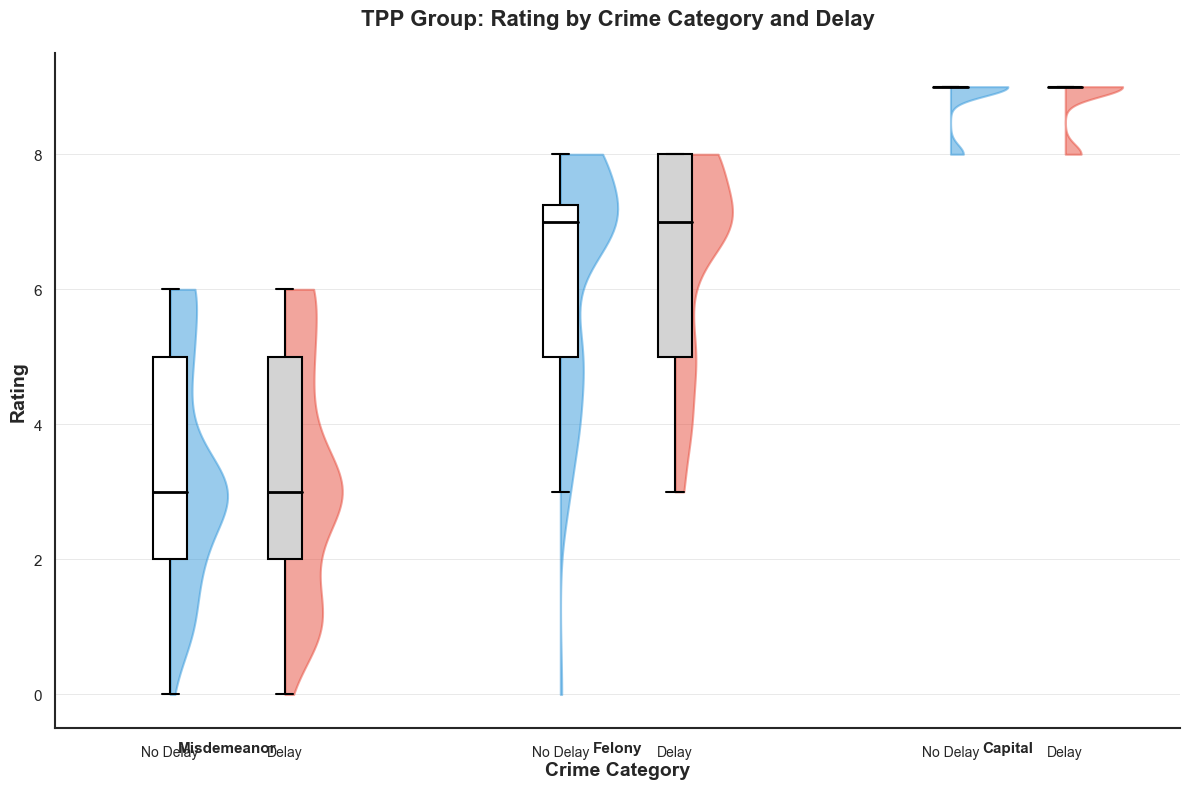


SPP组分析

SPP组显著性检验结果

Misdemeanor:
  Delay: N=180, Mean=3.406, SD=1.710
  No Delay: N=180, Mean=3.378, SD=1.737
  Mann-Whitney U statistic=16350.000, p-value=0.8773
  显著性: ns

Felony:
  Delay: N=180, Mean=6.417, SD=1.606
  No Delay: N=180, Mean=6.433, SD=1.517
  Mann-Whitney U statistic=16363.000, p-value=0.8624
  显著性: ns

Capital:
  Delay: N=180, Mean=8.806, SD=0.397
  No Delay: N=180, Mean=8.828, SD=0.379
  Mann-Whitney U statistic=15840.000, p-value=0.5869
  显著性: ns
图片已保存至: SPP_group_rating.png


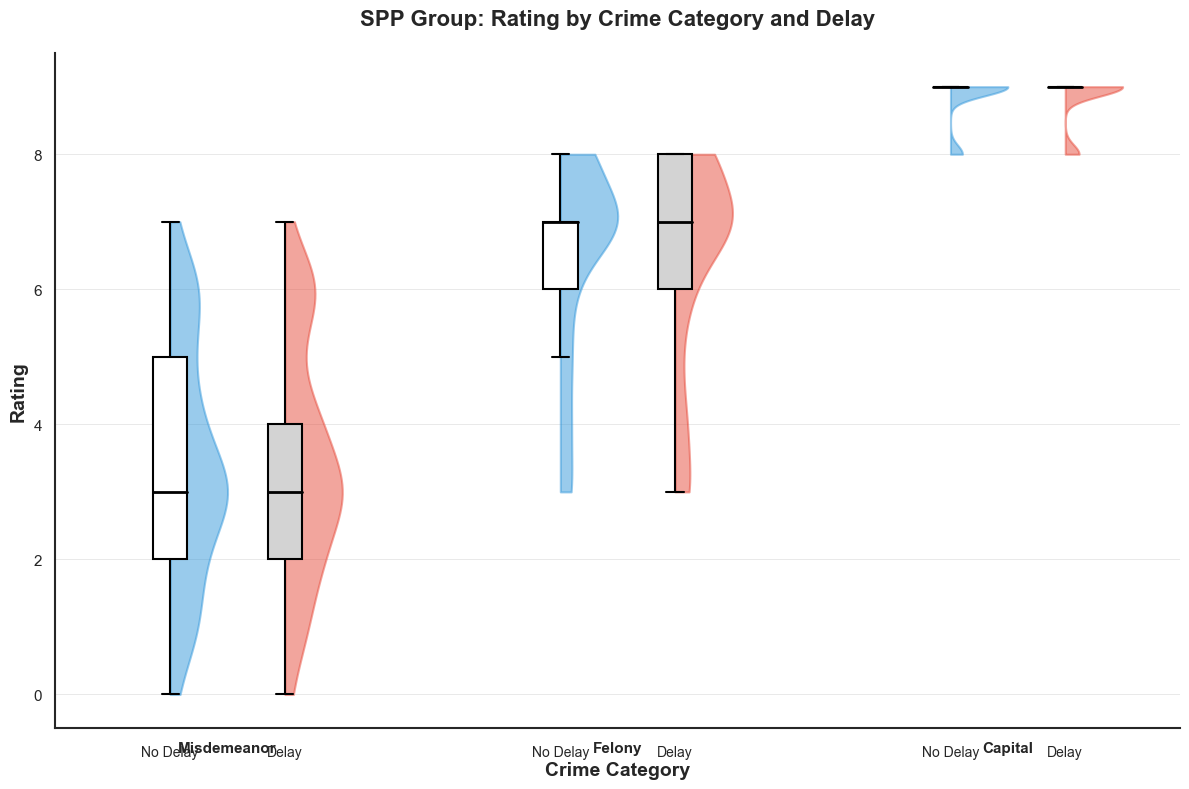


TPP vs SPP 组间差异分析

Misdemeanor - No Delay:
  TPP: N=180, Mean=3.333, SD=1.596
  SPP: N=180, Mean=3.378, SD=1.737
  Mann-Whitney U statistic=15894.000, p-value=0.7515
  显著性: ns

Misdemeanor - Delay:
  TPP: N=180, Mean=3.283, SD=1.686
  SPP: N=180, Mean=3.406, SD=1.710
  Mann-Whitney U statistic=15523.500, p-value=0.4846
  显著性: ns

Felony - No Delay:
  TPP: N=180, Mean=6.278, SD=1.672
  SPP: N=180, Mean=6.433, SD=1.517
  Mann-Whitney U statistic=15707.000, p-value=0.6018
  显著性: ns

Felony - Delay:
  TPP: N=180, Mean=6.428, SD=1.499
  SPP: N=180, Mean=6.417, SD=1.606
  Mann-Whitney U statistic=16137.000, p-value=0.9473
  显著性: ns

Capital - No Delay:
  TPP: N=180, Mean=8.817, SD=0.388
  SPP: N=180, Mean=8.828, SD=0.379
  Mann-Whitney U statistic=16020.000, p-value=0.7837
  显著性: ns

Capital - Delay:
  TPP: N=180, Mean=8.783, SD=0.413
  SPP: N=180, Mean=8.806, SD=0.397
  Mann-Whitney U statistic=15840.000, p-value=0.6029
  显著性: ns

组间差异分析完成！结果已保存为CSV文件。

生成TPP vs SPP组间对比图


C:\Users\47648\AppData\Local\Temp\ipykernel_23788\1012338157.py:418: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Group', y='Rating',
C:\Users\47648\AppData\Local\Temp\ipykernel_23788\1012338157.py:422: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot, x='Group', y='Rating',
C:\Users\47648\AppData\Local\Temp\ipykernel_23788\1012338157.py:418: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Group', y='Rating',
C:\Users\47648\AppData\Local\Temp\ipykernel_23788\1012338157.py:422: FutureWarning: 

Pas

组间对比图已保存至: TPP_vs_SPP_comparison.png


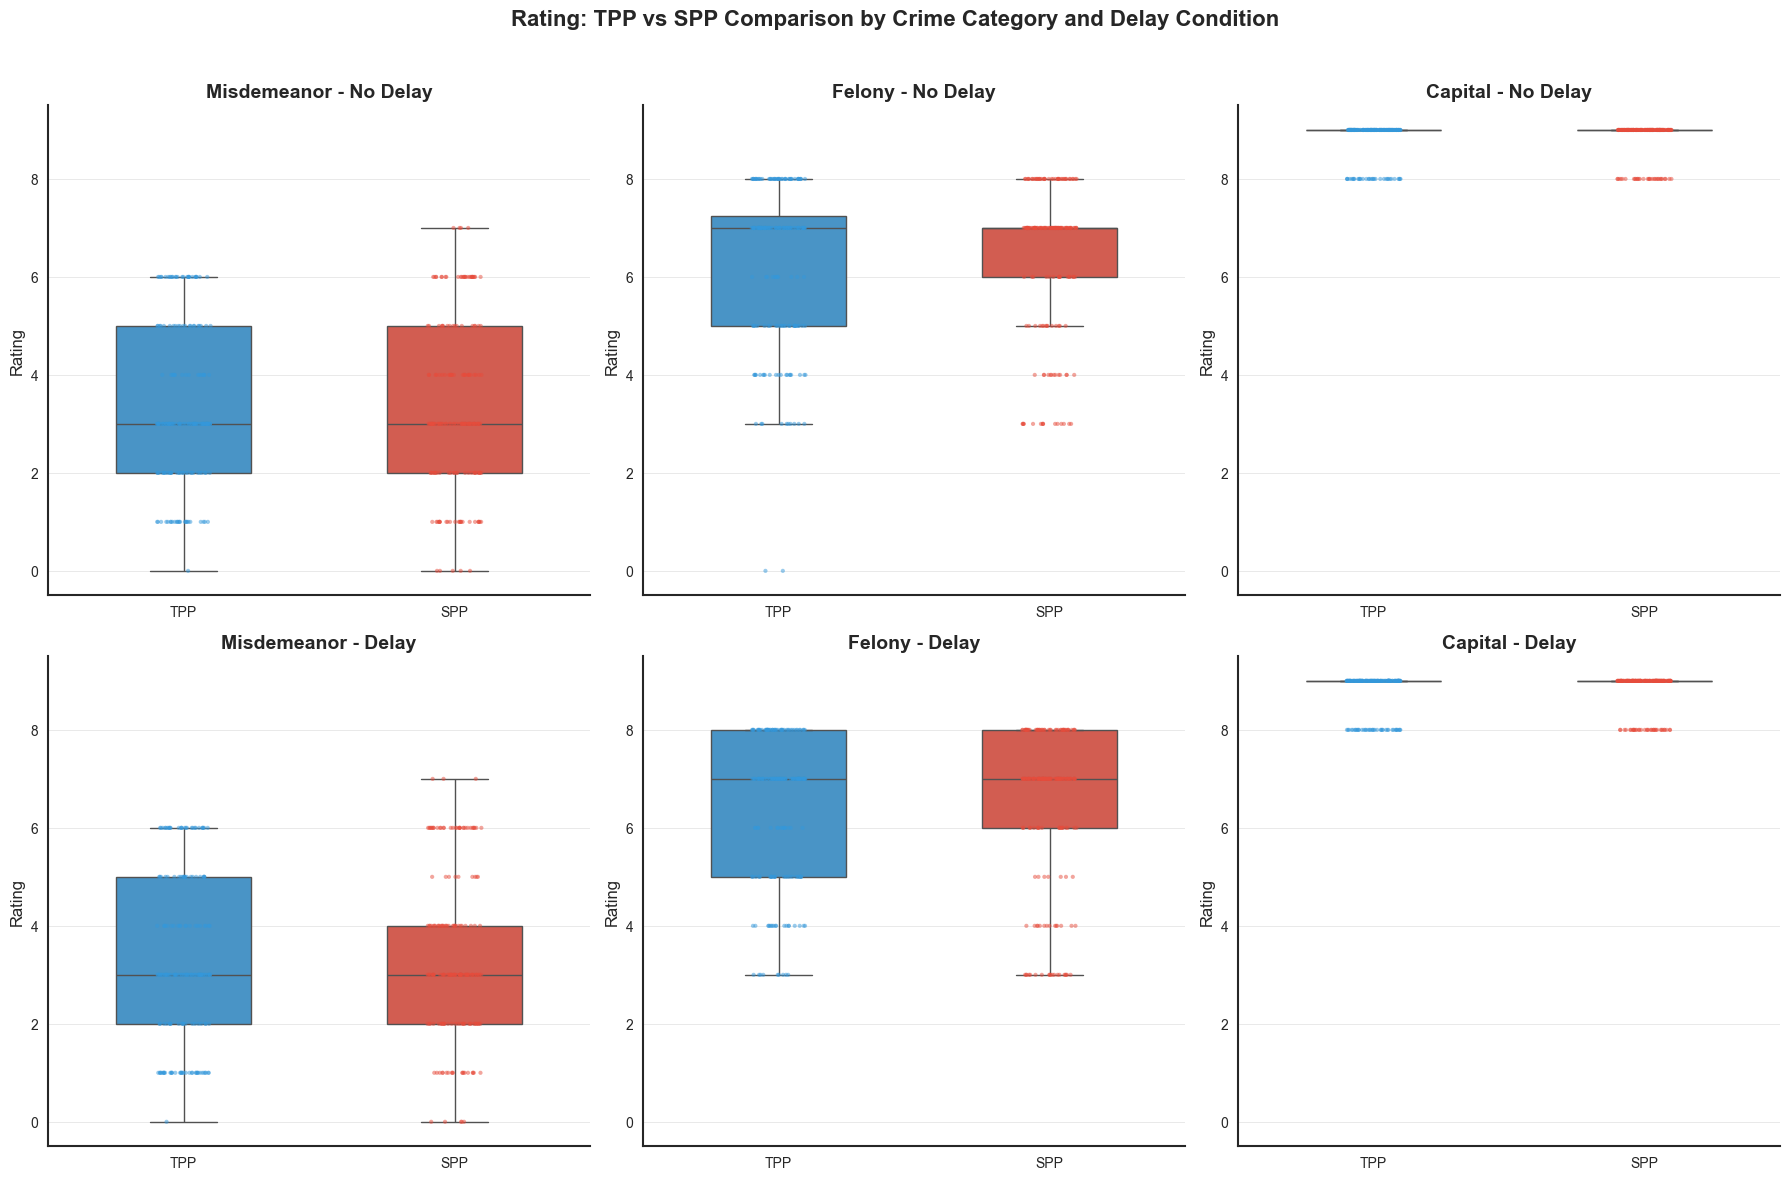


分析完成！评分统计结果已保存为CSV文件。


In [24]:
# --- 4. 执行主逻辑 ---
# 使用LLM数据替代原始数据
df_llm = pd.read_csv('./organized_data.csv')

print("成功读取LLM数据。")
print("-" * 30)

# 检查数据中的Role列
print("Role列的唯一值:", df_llm['Role'].unique())
print("-" * 30)

# 根据Role列拆分数据
tpp_data = df_llm[df_llm['Role'] == 'TPP']
spp_data = df_llm[df_llm['Role'] == 'SPP']

print(f"TPP组数据量: {len(tpp_data)}")
print(f"SPP组数据量: {len(spp_data)}")
print("-" * 30)

# 数据预处理 - 确保列名和格式正确
def prepare_llm_data(df):
    """准备LLM数据用于分析"""
    df_clean = df.copy()
    
    # 确保数据类型正确
    if 'Category' in df_clean.columns:
        df_clean['Category'] = pd.to_numeric(df_clean['Category'], errors='coerce')
    if 'Rating' in df_clean.columns:
        df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')
    if 'Delay_Info' in df_clean.columns:
        df_clean['Delay_Info'] = pd.to_numeric(df_clean['Delay_Info'], errors='coerce')
    
    return df_clean

# 准备两组数据
tpp_all_data = prepare_llm_data(tpp_data)
spp_all_data = prepare_llm_data(spp_data)

print("数据预处理完成。")
print("-" * 30)

# --- 5. 数据准备：添加分类标签 ---
def prepare_plot_data(df):
    """准备可视化数据，添加分类标签"""
    df = df.copy()
    
    category_map = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}
    df['Category_Label'] = df['Category'].map(category_map)
    
    df['Delay_Label'] = df['Delay_Info'].apply(lambda x: 'No Delay' if x == 0 else 'Delay')
    
    df['Combined_Label'] = df['Category_Label'] + '\n' + df['Delay_Label']
    
    return df

tpp_plot_data = prepare_plot_data(tpp_all_data)
spp_plot_data = prepare_plot_data(spp_all_data)

print(f"TPP组总数据量: {len(tpp_plot_data)}")
print(f"SPP组总数据量: {len(spp_plot_data)}")

# --- 6. 显著性检验函数 ---
def perform_significance_tests(df, group_name):
    """
    对每个Category内的Delay vs No Delay进行Mann-Whitney U检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组显著性检验结果")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        cat_data = df[df['Category_Label'] == cat]
        
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Rating'].dropna()
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Rating'].dropna()
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"\n{cat}:")
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Category': cat,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print(f"\n{cat}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 7. 可视化函数 ---
def create_half_violin_box_plot(df, group_name, save_path=None):
    """
    创建黑白箱线图，右侧贴彩色半个分布图
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 定义类别顺序
    category_order = ['Misdemeanor', 'Felony', 'Capital']
    delay_order = ['No Delay', 'Delay']
    
    # 定义颜色方案（为分布图使用）
    colors = {
        'No Delay': '#3498db',  # 蓝色
        'Delay': '#e74c3c'      # 红色
    }
    
    # 准备数据
    plot_data = df.dropna(subset=['Rating', 'Category_Label', 'Delay_Label'])
    
    # 创建位置映射 - 缩短间距
    positions = []
    labels = []
    within_gap = 0.5  # 小类之间的间距（No Delay 和 Delay 之间）
    between_gap = 1.2  # 大类之间的间距
    
    current_pos = 0
    for i, cat in enumerate(category_order):
        if i > 0:
            current_pos += between_gap  # 大类之间的间距
        for j, delay in enumerate(delay_order):
            positions.append(current_pos)
            labels.append(delay)
            if j == 0:  # 只在第一个小类后加小间距
                current_pos += within_gap
    
    # 获取所有数据组
    data_groups = []
    for cat in category_order:
        for delay in delay_order:
            data_groups.append(
                plot_data[(plot_data['Category_Label'] == cat) & 
                         (plot_data['Delay_Label'] == delay)]['Rating'].values
            )
    
    # 绘制半小提琴图（只显示右侧，彩色）
    for idx, (pos, data, label) in enumerate(zip(positions, data_groups, labels)):
        if len(data) > 0:
            # 计算KDE
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                y_range = np.linspace(data.min(), data.max(), 100)
                density = kde(y_range)
                
                # 归一化密度到合适的宽度
                density = density / density.max() * 0.25
                
                # 只绘制右侧，使用彩色
                ax.fill_betweenx(y_range, pos, pos + density, 
                                alpha=0.5, color=colors[label], 
                                edgecolor=colors[label], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图（黑白配色，更窄的箱体）
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,  # 箱体宽度
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    # 设置箱线图填充
    for i, box in enumerate(bp['boxes']):
        if i % 2 == 0:  # No Delay
            box.set_facecolor('white')
        else:  # Delay
            box.set_facecolor('lightgray')
        box.set_linewidth(1.5)
    
    # 设置x轴 - 计算每个大类的中心位置
    category_centers = []
    for i in range(len(category_order)):
        cat_positions = [positions[i*2], positions[i*2+1]]
        category_centers.append(np.mean(cat_positions))
    
    ax.set_xticks(category_centers)
    ax.set_xticklabels(category_order, fontsize=12, fontweight='bold')
    
    # 在每个大类下添加小标签
    y_min = ax.get_ylim()[0]
    for i in range(len(category_order)):
        ax.text(positions[i*2], y_min - 0.3, 'No Delay', 
               ha='center', va='top', fontsize=10)
        ax.text(positions[i*2+1], y_min - 0.3, 'Delay', 
               ha='center', va='top', fontsize=10)
    
    # 设置y轴刻度 - 根据Rating的范围调整
    # 假设Rating的范围也是0-8，如果不是请根据实际数据范围调整
    ax.set_yticks([0, 2, 4, 6, 8])
    ax.set_ylim(-0.5, 9.5)  # 设置y轴范围，留出一些空间
    
    # 添加y轴网格线（仅水平方向）
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)  # 将网格线放在图形元素下方
    
    # 设置y轴和x轴标签 - 修改y轴标签为Rating
    ax.set_ylabel('Rating', fontsize=14, fontweight='bold')
    ax.set_xlabel('Crime Category', fontsize=14, fontweight='bold')
    
    # 设置标题 - 更新标题以反映y轴的变化
    ax.set_title(f'{group_name} Group: Rating by Crime Category and Delay',
                fontsize=16, fontweight='bold', pad=20)
    
    # 去掉图例
    
    # 去掉上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保留左边框和下边框，加粗
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 8. 执行可视化和统计检验 ---

# TPP组
print("\n" + "="*60)
print("TPP组分析")
print("="*60)
tpp_results = perform_significance_tests(tpp_plot_data, "TPP")
create_half_violin_box_plot(tpp_plot_data, "TPP", save_path="TPP_group_rating.png")

# SPP组
print("\n" + "="*60)
print("SPP组分析")
print("="*60)
spp_results = perform_significance_tests(spp_plot_data, "SPP")
create_half_violin_box_plot(spp_plot_data, "SPP", save_path="SPP_group_rating.png")

# --- 新增：TPP和SPP组间差异分析 ---
def perform_group_comparison_by_category(tpp_df, spp_df):
    """
    对每个犯罪类别和延迟条件下的TPP和SPP组进行差异分析
    """
    print("\n" + "="*60)
    print("TPP vs SPP 组间差异分析")
    print("="*60)
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    for cat in categories:
        for delay in delay_conditions:
            # 获取TPP组数据
            tpp_data = tpp_df[
                (tpp_df['Category_Label'] == cat) & 
                (tpp_df['Delay_Label'] == delay)
            ]['Rating'].dropna()
            
            # 获取SPP组数据
            spp_data = spp_df[
                (spp_df['Category_Label'] == cat) & 
                (spp_df['Delay_Label'] == delay)
            ]['Rating'].dropna()
            
            if len(tpp_data) > 0 and len(spp_data) > 0:
                # 执行Mann-Whitney U检验
                statistic, p_value = stats.mannwhitneyu(tpp_data, spp_data, alternative='two-sided')
                
                tpp_mean = tpp_data.mean()
                tpp_std = tpp_data.std()
                spp_mean = spp_data.mean()
                spp_std = spp_data.std()
                
                print(f"\n{cat} - {delay}:")
                print(f"  TPP: N={len(tpp_data)}, Mean={tpp_mean:.3f}, SD={tpp_std:.3f}")
                print(f"  SPP: N={len(spp_data)}, Mean={spp_mean:.3f}, SD={spp_std:.3f}")
                print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
                
                if p_value < 0.001:
                    sig_label = '***'
                elif p_value < 0.01:
                    sig_label = '**'
                elif p_value < 0.05:
                    sig_label = '*'
                else:
                    sig_label = 'ns'
                
                print(f"  显著性: {sig_label}")
                
                results.append({
                    'Category': cat,
                    'Delay_Condition': delay,
                    'TPP_N': len(tpp_data),
                    'TPP_Mean': tpp_mean,
                    'TPP_SD': tpp_std,
                    'SPP_N': len(spp_data),
                    'SPP_Mean': spp_mean,
                    'SPP_SD': spp_std,
                    'U_statistic': statistic,
                    'p_value': p_value,
                    'significance': sig_label
                })
            else:
                print(f"\n{cat} - {delay}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# 执行组间比较分析
group_comparison_results = perform_group_comparison_by_category(tpp_plot_data, spp_plot_data)

# 保存组间比较结果
group_comparison_results.to_csv("TPP_vs_SPP_comparison_results.csv", index=False)

print("\n" + "="*60)
print("组间差异分析完成！结果已保存为CSV文件。")
print("="*60)

# --- 新增：可视化TPP和SPP的对比 ---
def create_group_comparison_plot(tpp_df, spp_df, save_path=None):
    """
    创建TPP和SPP组对比图，显示每个小类的评分
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Rating: TPP vs SPP Comparison by Crime Category and Delay Condition', 
                fontsize=16, fontweight='bold', y=0.98)
    
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    # 定义颜色
    group_colors = {'TPP': '#3498db', 'SPP': '#e74c3c'}
    
    for i, delay in enumerate(delay_conditions):
        for j, cat in enumerate(categories):
            ax = axes[i, j]
            
            # 获取数据
            tpp_data = tpp_df[
                (tpp_df['Category_Label'] == cat) & 
                (tpp_df['Delay_Label'] == delay)
            ]['Rating'].dropna()
            
            spp_data = spp_df[
                (spp_df['Category_Label'] == cat) & 
                (spp_df['Delay_Label'] == delay)
            ]['Rating'].dropna()
            
            # 准备绘图数据
            plot_data = []
            groups = []
            
            if len(tpp_data) > 0:
                plot_data.extend(tpp_data)
                groups.extend(['TPP'] * len(tpp_data))
            
            if len(spp_data) > 0:
                plot_data.extend(spp_data)
                groups.extend(['SPP'] * len(spp_data))
            
            if len(plot_data) > 0:
                # 创建数据框
                df_plot = pd.DataFrame({
                    'Rating': plot_data,
                    'Group': groups
                })
                
                # 绘制箱线图和小提琴图
                sns.boxplot(data=df_plot, x='Group', y='Rating', 
                            ax=ax, palette=group_colors, width=0.5,
                            showfliers=False)
                
                sns.stripplot(data=df_plot, x='Group', y='Rating',
                             ax=ax, palette=group_colors, alpha=0.5, size=3,
                             jitter=True)
                
                # 添加显著性标记
                if len(tpp_data) > 0 and len(spp_data) > 0:
                    # 找到对应的p值
                    match = group_comparison_results[
                        (group_comparison_results['Category'] == cat) & 
                        (group_comparison_results['Delay_Condition'] == delay)
                    ]
                    
                    if not match.empty:
                        p_val = match.iloc[0]['p_value']
                        sig_label = match.iloc[0]['significance']
                        
                        if sig_label != 'ns':
                            # 计算位置
                            y_max = max(tpp_data.max(), spp_data.max())
                            y_min = min(tpp_data.min(), spp_data.min())
                            y_range = y_max - y_min
                            
                            # 绘制显著性线和标记
                            line_y = y_max + 0.1 * y_range
                            ax.plot([0, 1], [line_y, line_y], 'k-', linewidth=1.5)
                            ax.text(0.5, line_y + 0.05 * y_range, sig_label, 
                                   ha='center', va='bottom', fontsize=12, fontweight='bold')
            
            # 设置子图标题和标签
            ax.set_title(f'{cat} - {delay}', fontsize=14, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Rating', fontsize=12)
            
            # 设置y轴范围
            ax.set_ylim(-0.5, 9.5)
            ax.set_yticks([0, 2, 4, 6, 8])
            
            # 添加网格线
            ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
            ax.set_axisbelow(True)
            
            # 美化边框
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"组间对比图已保存至: {save_path}")
    
    plt.show()

# 执行组间对比可视化
print("\n" + "="*60)
print("生成TPP vs SPP组间对比图")
print("="*60)
create_group_comparison_plot(tpp_plot_data, spp_plot_data, save_path="TPP_vs_SPP_comparison.png")

# --- 9. 保存统计结果 ---
tpp_results.to_csv("TPP_rating_results.csv", index=False)
spp_results.to_csv("SPP_rating_results.csv", index=False)

print("\n" + "="*60)
print("分析完成！评分统计结果已保存为CSV文件。")
print("="*60)

成功读取LLM数据。
------------------------------
Role列的唯一值: ['SPP' 'TPP']
------------------------------
TPP组数据量: 1080
SPP组数据量: 1080
------------------------------
数据预处理完成。
------------------------------
TPP组总数据量: 1080
SPP组总数据量: 1080

TPP组分析

TPP组显著性检验结果

Misdemeanor:
  Delay: N=180, Mean=3.639, SD=1.298
  No Delay: N=180, Mean=3.644, SD=1.421
  Mann-Whitney U statistic=16034.000, p-value=0.8614
  显著性: ns

Felony:
  Delay: N=180, Mean=6.150, SD=1.235
  No Delay: N=180, Mean=6.011, SD=1.499
  Mann-Whitney U statistic=16646.000, p-value=0.6422
  显著性: ns

Capital:
  Delay: N=180, Mean=8.006, SD=0.621
  No Delay: N=180, Mean=8.017, SD=0.593
  Mann-Whitney U statistic=16056.000, p-value=0.8652
  显著性: ns
图片已保存至: TPP_group_emotion_arousal.png


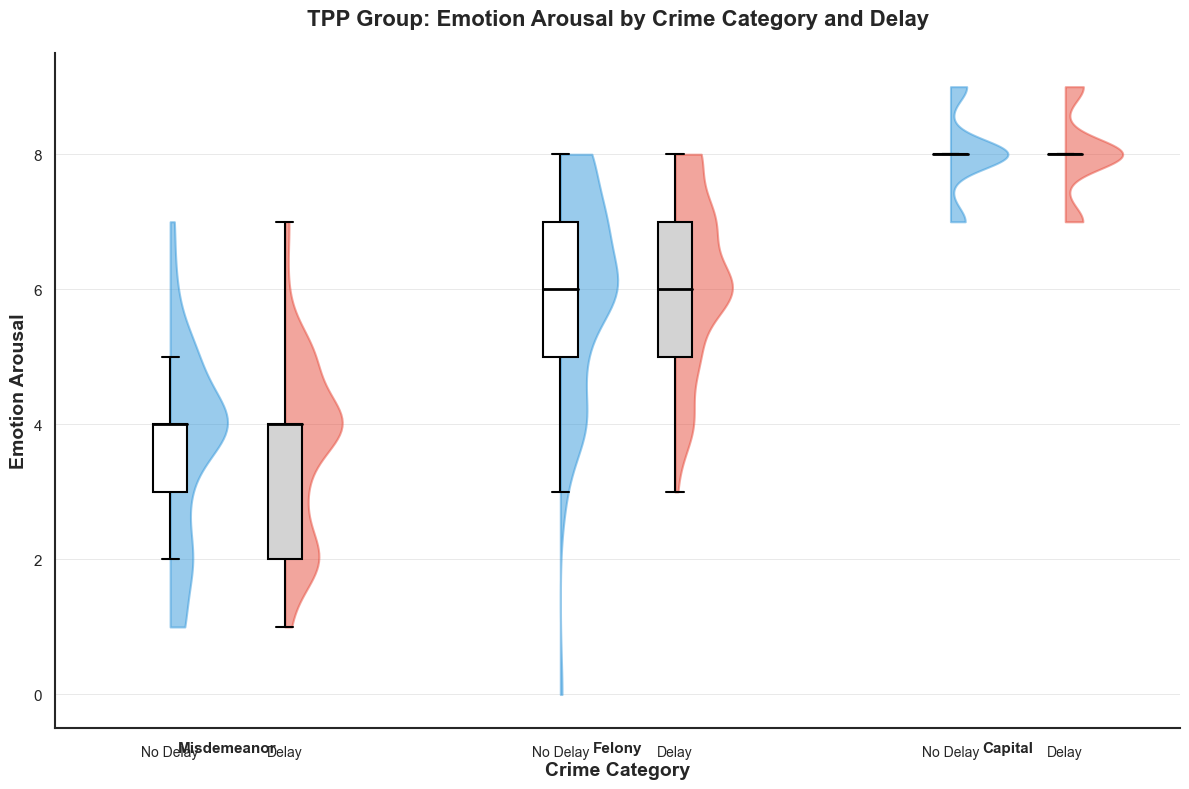


SPP组分析

SPP组显著性检验结果

Misdemeanor:
  Delay: N=180, Mean=4.361, SD=1.505
  No Delay: N=180, Mean=4.367, SD=1.627
  Mann-Whitney U statistic=16420.000, p-value=0.8200
  显著性: ns

Felony:
  Delay: N=180, Mean=6.867, SD=1.252
  No Delay: N=180, Mean=6.922, SD=1.160
  Mann-Whitney U statistic=15895.000, p-value=0.7397
  显著性: ns

Capital:
  Delay: N=180, Mean=8.367, SD=0.624
  No Delay: N=180, Mean=8.333, SD=0.634
  Mann-Whitney U statistic=16632.000, p-value=0.6262
  显著性: ns
图片已保存至: SPP_group_emotion_arousal.png


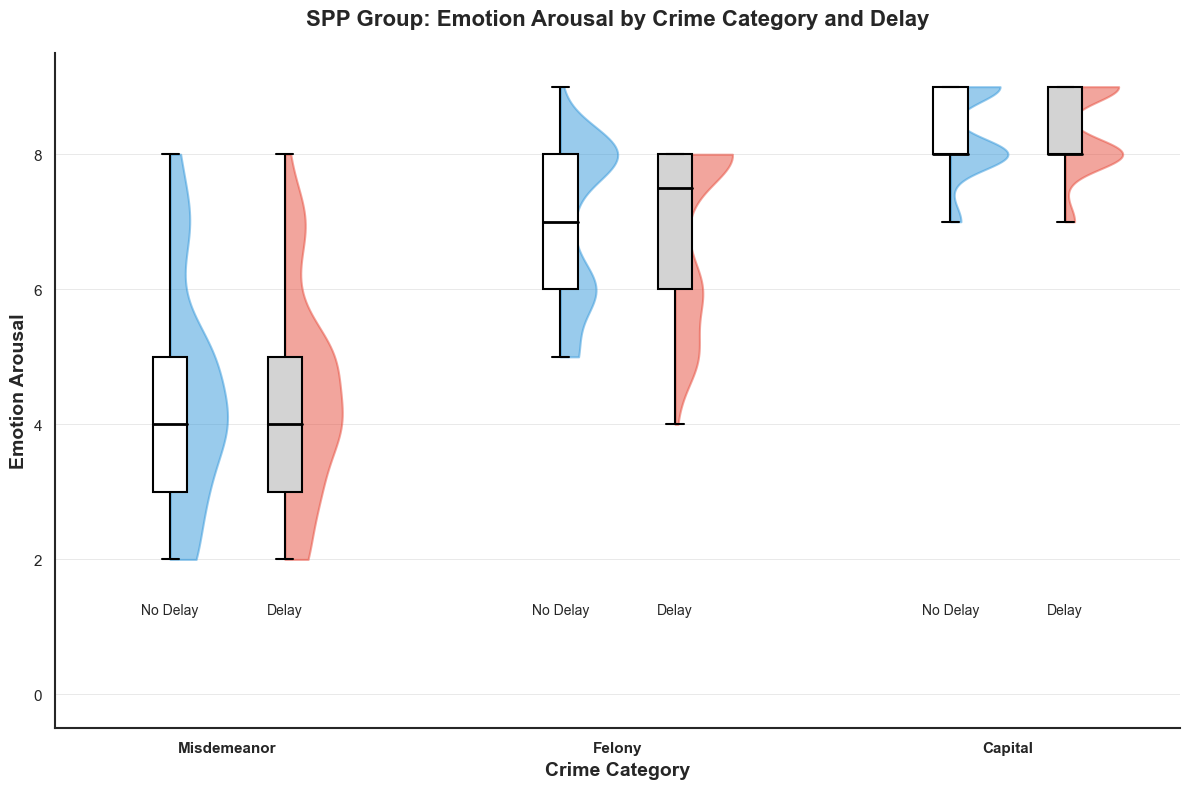


TPP vs SPP 组间差异分析

Misdemeanor - No Delay:
  TPP: N=180, Mean=3.644, SD=1.421
  SPP: N=180, Mean=4.367, SD=1.627
  Mann-Whitney U statistic=12744.000, p-value=0.0003
  显著性: ***

Misdemeanor - Delay:
  TPP: N=180, Mean=3.639, SD=1.298
  SPP: N=180, Mean=4.361, SD=1.505
  Mann-Whitney U statistic=12090.500, p-value=0.0000
  显著性: ***

Felony - No Delay:
  TPP: N=180, Mean=6.011, SD=1.499
  SPP: N=180, Mean=6.922, SD=1.160
  Mann-Whitney U statistic=10671.000, p-value=0.0000
  显著性: ***

Felony - Delay:
  TPP: N=180, Mean=6.150, SD=1.235
  SPP: N=180, Mean=6.867, SD=1.252
  Mann-Whitney U statistic=11289.000, p-value=0.0000
  显著性: ***

Capital - No Delay:
  TPP: N=180, Mean=8.017, SD=0.593
  SPP: N=180, Mean=8.333, SD=0.634
  Mann-Whitney U statistic=11946.000, p-value=0.0000
  显著性: ***

Capital - Delay:
  TPP: N=180, Mean=8.006, SD=0.621
  SPP: N=180, Mean=8.367, SD=0.624
  Mann-Whitney U statistic=11465.000, p-value=0.0000
  显著性: ***

组间差异分析完成！结果已保存为CSV文件。

生成TPP vs SPP组间对比图


C:\Users\47648\AppData\Local\Temp\ipykernel_23788\81159164.py:422: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Group', y='Emotion_Arousal',
C:\Users\47648\AppData\Local\Temp\ipykernel_23788\81159164.py:426: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot, x='Group', y='Emotion_Arousal',
C:\Users\47648\AppData\Local\Temp\ipykernel_23788\81159164.py:422: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Group', y='Emotion_Arousal',
C:\Users\47648\AppData\Local\Temp\ipykernel_23788\81159164.py:426: F

组间对比图已保存至: TPP_vs_SPP_comparison.png


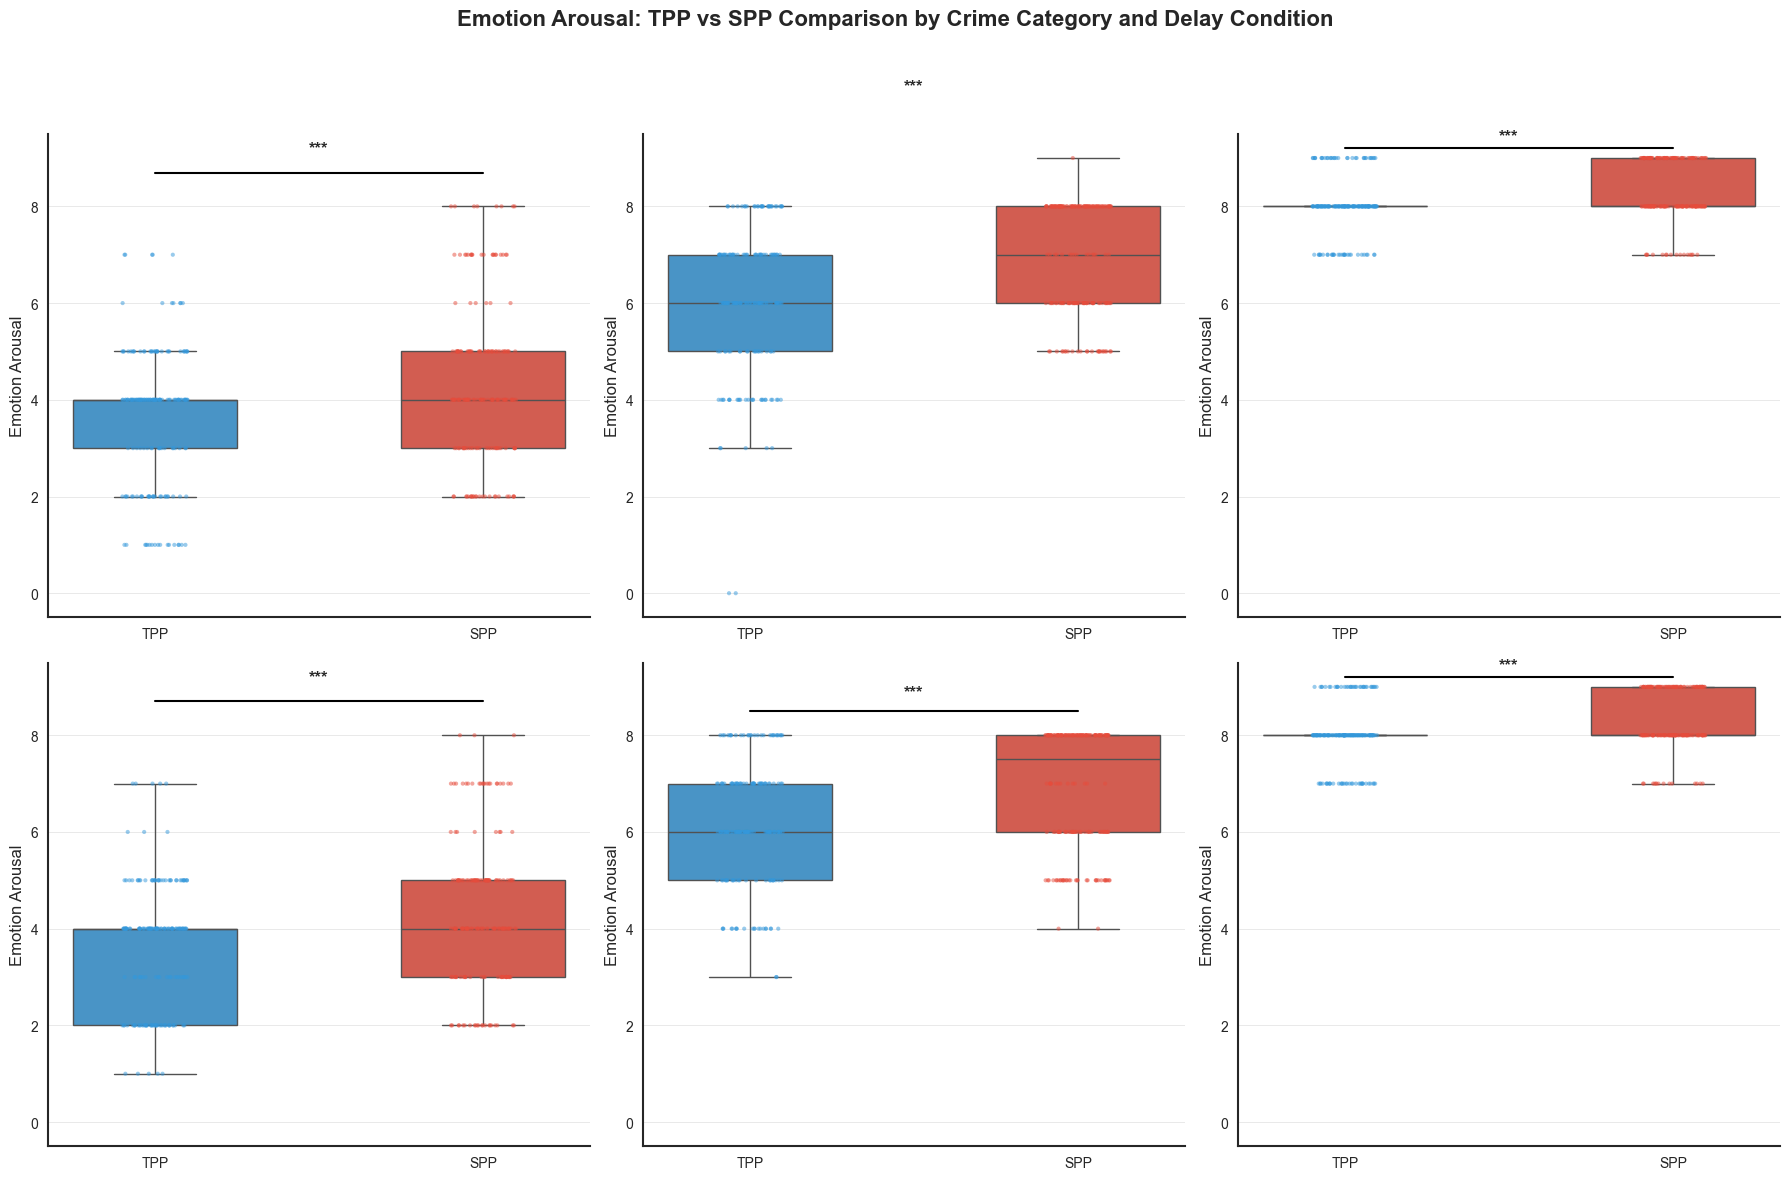


分析完成！情绪唤醒度统计结果已保存为CSV文件。


In [27]:
# --- 4. 执行主逻辑 ---
# 使用LLM数据替代原始数据
df_llm = pd.read_csv('./organized_data.csv')

print("成功读取LLM数据。")
print("-" * 30)

# 检查数据中的Role列
print("Role列的唯一值:", df_llm['Role'].unique())
print("-" * 30)

# 根据Role列拆分数据
tpp_data = df_llm[df_llm['Role'] == 'TPP']
spp_data = df_llm[df_llm['Role'] == 'SPP']

print(f"TPP组数据量: {len(tpp_data)}")
print(f"SPP组数据量: {len(spp_data)}")
print("-" * 30)

# 数据预处理 - 确保列名和格式正确
def prepare_llm_data(df):
    """准备LLM数据用于分析"""
    df_clean = df.copy()
    
    # 确保数据类型正确
    if 'Category' in df_clean.columns:
        df_clean['Category'] = pd.to_numeric(df_clean['Category'], errors='coerce')
    if 'Emotion' in df_clean.columns:
        df_clean['Emotion'] = pd.to_numeric(df_clean['Emotion'], errors='coerce')
    if 'Delay_Info' in df_clean.columns:
        df_clean['Delay_Info'] = pd.to_numeric(df_clean['Delay_Info'], errors='coerce')
    
    # 重命名Emotion列为Emotion_Arousal以匹配原始代码
    if 'Emotion' in df_clean.columns:
        df_clean = df_clean.rename(columns={'Emotion': 'Emotion_Arousal'})
    
    return df_clean

# 准备两组数据
tpp_all_data = prepare_llm_data(tpp_data)
spp_all_data = prepare_llm_data(spp_data)

print("数据预处理完成。")
print("-" * 30)

# --- 5. 数据准备：添加分类标签 ---
def prepare_plot_data(df):
    """准备可视化数据，添加分类标签"""
    df = df.copy()
    
    category_map = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}
    df['Category_Label'] = df['Category'].map(category_map)
    
    df['Delay_Label'] = df['Delay_Info'].apply(lambda x: 'No Delay' if x == 0 else 'Delay')
    
    df['Combined_Label'] = df['Category_Label'] + '\n' + df['Delay_Label']
    
    return df

tpp_plot_data = prepare_plot_data(tpp_all_data)
spp_plot_data = prepare_plot_data(spp_all_data)

print(f"TPP组总数据量: {len(tpp_plot_data)}")
print(f"SPP组总数据量: {len(spp_plot_data)}")

# --- 6. 显著性检验函数 ---
def perform_significance_tests(df, group_name):
    """
    对每个Category内的Delay vs No Delay进行Mann-Whitney U检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组显著性检验结果")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        cat_data = df[df['Category_Label'] == cat]
        
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Emotion_Arousal'].dropna()
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Emotion_Arousal'].dropna()
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"\n{cat}:")
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Category': cat,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print(f"\n{cat}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 7. 可视化函数 ---
def create_half_violin_box_plot(df, group_name, save_path=None):
    """
    创建黑白箱线图，右侧贴彩色半个分布图
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 定义类别顺序
    category_order = ['Misdemeanor', 'Felony', 'Capital']
    delay_order = ['No Delay', 'Delay']
    
    # 定义颜色方案（为分布图使用）
    colors = {
        'No Delay': '#3498db',  # 蓝色
        'Delay': '#e74c3c'      # 红色
    }
    
    # 准备数据
    plot_data = df.dropna(subset=['Emotion_Arousal', 'Category_Label', 'Delay_Label'])
    
    # 创建位置映射 - 缩短间距
    positions = []
    labels = []
    within_gap = 0.5  # 小类之间的间距（No Delay 和 Delay 之间）
    between_gap = 1.2  # 大类之间的间距
    
    current_pos = 0
    for i, cat in enumerate(category_order):
        if i > 0:
            current_pos += between_gap  # 大类之间的间距
        for j, delay in enumerate(delay_order):
            positions.append(current_pos)
            labels.append(delay)
            if j == 0:  # 只在第一个小类后加小间距
                current_pos += within_gap
    
    # 获取所有数据组
    data_groups = []
    for cat in category_order:
        for delay in delay_order:
            data_groups.append(
                plot_data[(plot_data['Category_Label'] == cat) & 
                         (plot_data['Delay_Label'] == delay)]['Emotion_Arousal'].values
            )
    
    # 绘制半小提琴图（只显示右侧，彩色）
    for idx, (pos, data, label) in enumerate(zip(positions, data_groups, labels)):
        if len(data) > 0:
            # 计算KDE
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                y_range = np.linspace(data.min(), data.max(), 100)
                density = kde(y_range)
                
                # 归一化密度到合适的宽度
                density = density / density.max() * 0.25
                
                # 只绘制右侧，使用彩色
                ax.fill_betweenx(y_range, pos, pos + density, 
                                alpha=0.5, color=colors[label], 
                                edgecolor=colors[label], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图（黑白配色，更窄的箱体）
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,  # 箱体宽度
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    # 设置箱线图填充
    for i, box in enumerate(bp['boxes']):
        if i % 2 == 0:  # No Delay
            box.set_facecolor('white')
        else:  # Delay
            box.set_facecolor('lightgray')
        box.set_linewidth(1.5)
    
    # 设置x轴 - 计算每个大类的中心位置
    category_centers = []
    for i in range(len(category_order)):
        cat_positions = [positions[i*2], positions[i*2+1]]
        category_centers.append(np.mean(cat_positions))
    
    ax.set_xticks(category_centers)
    ax.set_xticklabels(category_order, fontsize=12, fontweight='bold')
    
    # 在每个大类下添加小标签
    y_min = ax.get_ylim()[0]
    for i in range(len(category_order)):
        ax.text(positions[i*2], y_min - 0.3, 'No Delay', 
               ha='center', va='top', fontsize=10)
        ax.text(positions[i*2+1], y_min - 0.3, 'Delay', 
               ha='center', va='top', fontsize=10)
    
    # 设置y轴刻度 - 根据Emotion_Arousal的范围调整
    # 假设Emotion_Arousal的范围也是0-8，如果不是请根据实际数据范围调整
    ax.set_yticks([0, 2, 4, 6, 8])
    ax.set_ylim(-0.5, 9.5)  # 设置y轴范围，留出一些空间
    
    # 添加y轴网格线（仅水平方向）
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)  # 将网格线放在图形元素下方
    
    # 设置y轴和x轴标签 - 修改y轴标签为Emotion Arousal
    ax.set_ylabel('Emotion Arousal', fontsize=14, fontweight='bold')
    ax.set_xlabel('Crime Category', fontsize=14, fontweight='bold')
    
    # 设置标题 - 更新标题以反映y轴的变化
    ax.set_title(f'{group_name} Group: Emotion Arousal by Crime Category and Delay',
                fontsize=16, fontweight='bold', pad=20)
    
    # 去掉图例
    
    # 去掉上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保留左边框和下边框，加粗
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 8. 执行可视化和统计检验 ---

# TPP组
print("\n" + "="*60)
print("TPP组分析")
print("="*60)
tpp_results = perform_significance_tests(tpp_plot_data, "TPP")
create_half_violin_box_plot(tpp_plot_data, "TPP", save_path="TPP_group_emotion_arousal.png")

# SPP组
print("\n" + "="*60)
print("SPP组分析")
print("="*60)
spp_results = perform_significance_tests(spp_plot_data, "SPP")
create_half_violin_box_plot(spp_plot_data, "SPP", save_path="SPP_group_emotion_arousal.png")

# --- 新增：TPP和SPP组间差异分析 ---
def perform_group_comparison_by_category(tpp_df, spp_df):
    """
    对每个犯罪类别和延迟条件下的TPP和SPP组进行差异分析
    """
    print("\n" + "="*60)
    print("TPP vs SPP 组间差异分析")
    print("="*60)
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    for cat in categories:
        for delay in delay_conditions:
            # 获取TPP组数据
            tpp_data = tpp_df[
                (tpp_df['Category_Label'] == cat) & 
                (tpp_df['Delay_Label'] == delay)
            ]['Emotion_Arousal'].dropna()
            
            # 获取SPP组数据
            spp_data = spp_df[
                (spp_df['Category_Label'] == cat) & 
                (spp_df['Delay_Label'] == delay)
            ]['Emotion_Arousal'].dropna()
            
            if len(tpp_data) > 0 and len(spp_data) > 0:
                # 执行Mann-Whitney U检验
                statistic, p_value = stats.mannwhitneyu(tpp_data, spp_data, alternative='two-sided')
                
                tpp_mean = tpp_data.mean()
                tpp_std = tpp_data.std()
                spp_mean = spp_data.mean()
                spp_std = spp_data.std()
                
                print(f"\n{cat} - {delay}:")
                print(f"  TPP: N={len(tpp_data)}, Mean={tpp_mean:.3f}, SD={tpp_std:.3f}")
                print(f"  SPP: N={len(spp_data)}, Mean={spp_mean:.3f}, SD={spp_std:.3f}")
                print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
                
                if p_value < 0.001:
                    sig_label = '***'
                elif p_value < 0.01:
                    sig_label = '**'
                elif p_value < 0.05:
                    sig_label = '*'
                else:
                    sig_label = 'ns'
                
                print(f"  显著性: {sig_label}")
                
                results.append({
                    'Category': cat,
                    'Delay_Condition': delay,
                    'TPP_N': len(tpp_data),
                    'TPP_Mean': tpp_mean,
                    'TPP_SD': tpp_std,
                    'SPP_N': len(spp_data),
                    'SPP_Mean': spp_mean,
                    'SPP_SD': spp_std,
                    'U_statistic': statistic,
                    'p_value': p_value,
                    'significance': sig_label
                })
            else:
                print(f"\n{cat} - {delay}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# 执行组间比较分析
group_comparison_results = perform_group_comparison_by_category(tpp_plot_data, spp_plot_data)

# 保存组间比较结果
group_comparison_results.to_csv("TPP_vs_SPP_comparison_results.csv", index=False)

print("\n" + "="*60)
print("组间差异分析完成！结果已保存为CSV文件。")
print("="*60)

# --- 新增：可视化TPP和SPP的对比 ---
def create_group_comparison_plot(tpp_df, spp_df, save_path=None):
    """
    创建TPP和SPP组对比图，显示每个小类的情绪唤醒度
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Emotion Arousal: TPP vs SPP Comparison by Crime Category and Delay Condition', 
                fontsize=16, fontweight='bold', y=0.98)
    
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    # 定义颜色
    group_colors = {'TPP': '#3498db', 'SPP': '#e74c3c'}
    
    for i, delay in enumerate(delay_conditions):
        for j, cat in enumerate(categories):
            ax = axes[i, j]
            
            # 获取数据
            tpp_data = tpp_df[
                (tpp_df['Category_Label'] == cat) & 
                (tpp_df['Delay_Label'] == delay)
            ]['Emotion_Arousal'].dropna()
            
            spp_data = spp_df[
                (spp_df['Category_Label'] == cat) & 
                (spp_df['Delay_Label'] == delay)
            ]['Emotion_Arousal'].dropna()
            
            # 准备绘图数据
            plot_data = []
            groups = []
            
            if len(tpp_data) > 0:
                plot_data.extend(tpp_data)
                groups.extend(['TPP'] * len(tpp_data))
            
            if len(spp_data) > 0:
                plot_data.extend(spp_data)
                groups.extend(['SPP'] * len(spp_data))
            
            if len(plot_data) > 0:
                # 创建数据框
                df_plot = pd.DataFrame({
                    'Emotion_Arousal': plot_data,
                    'Group': groups
                })
                
                # 绘制箱线图和小提琴图
                sns.boxplot(data=df_plot, x='Group', y='Emotion_Arousal', 
                            ax=ax, palette=group_colors, width=0.5,
                            showfliers=False)
                
                sns.stripplot(data=df_plot, x='Group', y='Emotion_Arousal',
                             ax=ax, palette=group_colors, alpha=0.5, size=3,
                             jitter=True)
                
                # 添加显著性标记
                if len(tpp_data) > 0 and len(spp_data) > 0:
                    # 找到对应的p值
                    match = group_comparison_results[
                        (group_comparison_results['Category'] == cat) & 
                        (group_comparison_results['Delay_Condition'] == delay)
                    ]
                    
                    if not match.empty:
                        p_val = match.iloc[0]['p_value']
                        sig_label = match.iloc[0]['significance']
                        
                        if sig_label != 'ns':
                            # 计算位置
                            y_max = max(tpp_data.max(), spp_data.max())
                            y_min = min(tpp_data.min(), spp_data.min())
                            y_range = y_max - y_min
                            
                            # 绘制显著性线和标记
                            line_y = y_max + 0.1 * y_range
                            ax.plot([0, 1], [line_y, line_y], 'k-', linewidth=1.5)
                            ax.text(0.5, line_y + 0.05 * y_range, sig_label, 
                                   ha='center', va='bottom', fontsize=12, fontweight='bold')
            
            # 设置子图标题和标签
            # ax.set_title(f'{cat} - {delay}', fontsize=14, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Emotion Arousal', fontsize=12)
            
            # 设置y轴范围
            ax.set_ylim(-0.5, 9.5)
            ax.set_yticks([0, 2, 4, 6, 8])
            
            # 添加网格线
            ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
            ax.set_axisbelow(True)
            
            # 美化边框
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"组间对比图已保存至: {save_path}")
    
    plt.show()

# 执行组间对比可视化
print("\n" + "="*60)
print("生成TPP vs SPP组间对比图")
print("="*60)
create_group_comparison_plot(tpp_plot_data, spp_plot_data, save_path="TPP_vs_SPP_comparison.png")

# --- 9. 保存统计结果 ---
tpp_results.to_csv("TPP_emotion_arousal_results.csv", index=False)
spp_results.to_csv("SPP_emotion_arousal_results.csv", index=False)

print("\n" + "="*60)
print("分析完成！情绪唤醒度统计结果已保存为CSV文件。")
print("="*60)

读取大模型数据
成功读取大模型数据，共 2160 行
列名: ['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']

数据预览:
   List2  Category  Rating  Delay_Info  Emotion Role
0      1       3.0       9         0.0        9  SPP
1      1       3.0       9         0.0        9  SPP
2      1       3.0       9         0.0        9  SPP
3      1       3.0       9         0.0        9  SPP
4      1       3.0       9         0.0        9  SPP
5      1       3.0       9         0.0        9  SPP
6      1       3.0       9         0.0        9  SPP
7      1       3.0       9         0.0        9  SPP
8      1       3.0       9         0.0        9  SPP
9      1       3.0       9         0.0        9  SPP

Emotion列唯一值: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
------------------------------------------------------------

情绪唤醒度映射:
  0: 1.0 (出现2次)
  1: 2.0 (出现22次)
  2: 3.0 (出现114次)
  3: 4.0 (出现107次)
  4: 5.0 (出现295次)
  5: 6.0 (出现255次)
  6: 7.0 (出现235次)
  7: 8.0 (出现258次)
  8: 9.0 (出现647次)
  9: 10.0 (出现225次)
--------------------

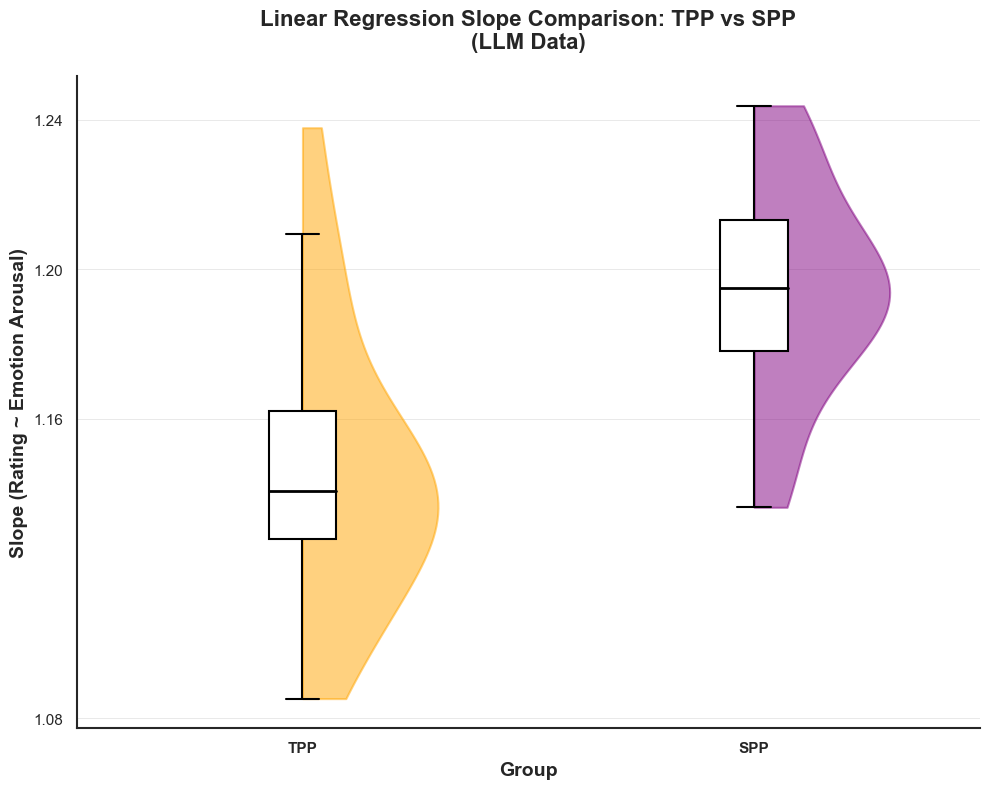


生成截距比较图...

图片已保存至: LLM_intercept_comparison_TPP_vs_SPP.png


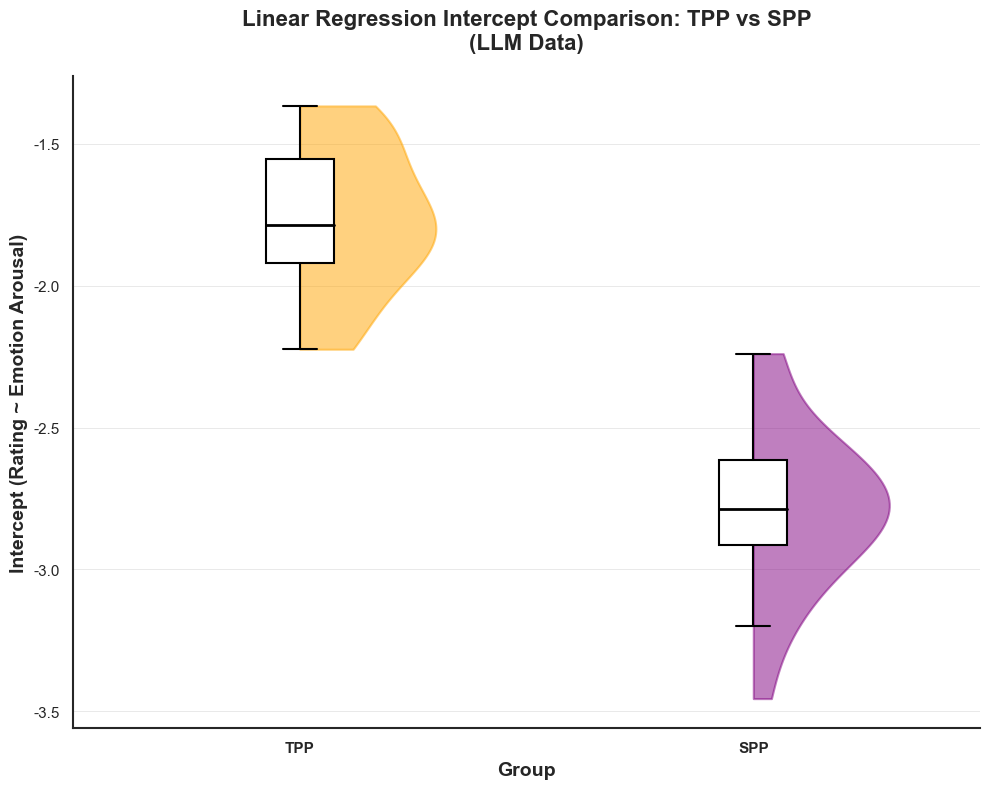


个体拟合示例

TPP组个体拟合示例:
  TPP_Subject_14:
    斜率 = 1.1432
    截距 = -1.8646
    R² = 0.8980
    p值 = 0.0000
    数据点 = 54
  TPP_Subject_18:
    斜率 = 1.2378
    截距 = -2.2133
    R² = 0.8917
    p值 = 0.0000
    数据点 = 54
  TPP_Subject_8:
    斜率 = 1.0852
    截距 = -1.3959
    R² = 0.7874
    p值 = 0.0000
    数据点 = 54

SPP组个体拟合示例:
  SPP_Subject_13:
    斜率 = 1.1931
    截距 = -2.7515
    R² = 0.8665
    p值 = 0.0000
    数据点 = 54
  SPP_Subject_14:
    斜率 = 1.2437
    截距 = -3.1980
    R² = 0.8408
    p值 = 0.0000
    数据点 = 54
  SPP_Subject_2:
    斜率 = 1.1364
    截距 = -2.2398
    R² = 0.8304
    p值 = 0.0000
    数据点 = 54

保存结果文件
已保存: LLM_subject_slopes_data.csv
已保存: LLM_slope_comparison_statistics.csv
已保存: LLM_intercept_comparison_statistics.csv
已保存: LLM_descriptive_statistics.csv

分析完成！

输出文件:
  1. LLM_subject_slopes_data.csv - 所有被试的斜率和截距数据
  2. LLM_slope_comparison_statistics.csv - 斜率组间比较统计结果
  3. LLM_intercept_comparison_statistics.csv - 截距组间比较统计结果
  4. LLM_descriptive_statistics.csv - 描述性统计
  5. LLM_sl

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ============================================
# 读取大模型数据
# ============================================
print("="*60)
print("读取大模型数据")
print("="*60)

df_llm = pd.read_csv('./organized_data.csv')
print(f"成功读取大模型数据，共 {len(df_llm)} 行")
print(f"列名: {df_llm.columns.tolist()}")
print(f"\n数据预览:")
print(df_llm.head(10))
print(f"\nEmotion列唯一值: {sorted(df_llm['Emotion'].unique())}")
print("-" * 60)

# ============================================
# 添加情绪唤醒度映射
# ============================================
emotion_arousal_mapping = {
    0: 1.0,   # 最低唤醒
    1: 2.0,
    2: 3.0,
    3: 4.0,
    4: 5.0,
    5: 6.0,
    6: 7.0,
    7: 8.0,
    8: 9.0,
    9: 10.0   # 最高唤醒
}

print("\n情绪唤醒度映射:")
for emotion, arousal in emotion_arousal_mapping.items():
    count = len(df_llm[df_llm['Emotion'] == emotion])
    print(f"  {emotion}: {arousal} (出现{count}次)")
print("-" * 60)

# 添加情绪唤醒度列
df_llm['Emotion_Arousal'] = df_llm['Emotion'].map(emotion_arousal_mapping)

# 检查是否有未映射的情绪
unmapped_emotions = df_llm[df_llm['Emotion_Arousal'].isna()]['Emotion'].unique()
if len(unmapped_emotions) > 0:
    print(f"警告：以下情绪值未映射到唤醒度: {unmapped_emotions}")
    print("请在emotion_arousal_mapping中添加这些值的映射")
    print("-" * 60)
else:
    print("✓ 所有情绪值已成功映射到唤醒度")
    print("-" * 60)

# 显示映射后的数据预览
print("\n映射后数据预览:")
print(df_llm[['List2', 'Category', 'Rating', 'Emotion', 'Emotion_Arousal', 'Role']].head(10))
print("-" * 60)

# ============================================
# 数据整理：模拟20个被试
# ============================================
def prepare_llm_data_for_analysis(df, group_name):
    """
    将大模型数据整理成每个被试的数据格式
    """
    group_df = df[df['Role'] == group_name].copy()
    unique_cases = group_df['List2'].unique()
    
    print(f"\n{group_name}组:")
    print(f"  唯一案例数: {len(unique_cases)}")
    print(f"  总数据行数: {len(group_df)}")
    
    group_df['Subject_ID'] = group_df.groupby('List2').cumcount() + 1
    case_counts = group_df.groupby('List2').size()
    print(f"  每个案例的重复次数范围: {case_counts.min()} 到 {case_counts.max()}")
    
    missing_arousal = group_df['Emotion_Arousal'].isna().sum()
    if missing_arousal > 0:
        print(f"  警告: 有 {missing_arousal} 行缺失Emotion_Arousal值")
    
    subject_data_list = []
    for subject_id in range(1, 21):
        subject_df = group_df[group_df['Subject_ID'] == subject_id].copy()
        subject_df = subject_df.rename(columns={
            'List2': 'Crime_ID',
            'Rating': 'Rating',
            'Delay_Info': 'Delay_Info',
            'Emotion': 'Emotion',
            'Emotion_Arousal': 'Emotion_Arousal',
            'Category': 'Category'
        })
        subject_df = subject_df[['Crime_ID', 'Category', 'Rating', 
                                 'Delay_Info', 'Emotion', 'Emotion_Arousal']]
        valid_points = subject_df.dropna(subset=['Emotion_Arousal', 'Rating']).shape[0]
        subject_data_list.append(subject_df)
        
        if subject_id <= 3 or subject_id == 20:
            print(f"  被试 {subject_id}: {len(subject_df)} 个案例, {valid_points} 个有效数据点")
    
    return subject_data_list

# ============================================
# 准备TPP和SPP组的数据
# ============================================
print("\n" + "="*60)
print("准备分组数据")
print("="*60)

tpp_data_list = prepare_llm_data_for_analysis(df_llm, "TPP")
spp_data_list = prepare_llm_data_for_analysis(df_llm, "SPP")

print(f"\nTPP组共 {len(tpp_data_list)} 个被试")
print(f"SPP组共 {len(spp_data_list)} 个被试")
print("-" * 60)

# ============================================
# 计算每个被试的线性拟合斜率和截距
# ============================================
def calculate_slope_per_subject(data_list, group_name):
    """
    计算每个被试情绪唤醒度与惩罚评分的线性拟合斜率和截距
    """
    slope_results = []
    
    for i, subject_data in enumerate(data_list):
        if 'Emotion_Arousal' in subject_data.columns and 'Rating' in subject_data.columns:
            clean_data = subject_data.dropna(subset=['Emotion_Arousal', 'Rating'])
            
            if len(clean_data) >= 2:
                try:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(
                        clean_data['Emotion_Arousal'], clean_data['Rating']
                    )
                    
                    slope_results.append({
                        'Subject_ID': f"{group_name}_Subject_{i+1}",
                        'Group': group_name,
                        'Slope': slope,
                        'Intercept': intercept,
                        'R_squared': r_value**2,
                        'P_value': p_value,
                        'Std_Error': std_err,
                        'Data_Points': len(clean_data)
                    })
                except Exception as e:
                    print(f"警告: 无法计算{group_name}组第{i+1}个被试的斜率: {e}")
            else:
                print(f"警告: {group_name}组第{i+1}个被试数据点不足 (只有{len(clean_data)}个点)")
        else:
            print(f"警告: {group_name}组第{i+1}个被试数据缺少必要列")
    
    return pd.DataFrame(slope_results)

# 计算TPP和SPP组的斜率和截距
print("\n" + "="*60)
print("计算线性拟合斜率和截距")
print("="*60)

tpp_slopes = calculate_slope_per_subject(tpp_data_list, "TPP")
spp_slopes = calculate_slope_per_subject(spp_data_list, "SPP")

print(f"\nTPP组成功计算 {len(tpp_slopes)} 个被试的斜率")
print(f"SPP组成功计算 {len(spp_slopes)} 个被试的斜率")

if len(tpp_slopes) == 0 or len(spp_slopes) == 0:
    print("\n错误: 无法计算斜率，请检查数据!")
    print("\n调试信息:")
    print("TPP组第一个被试的数据:")
    print(tpp_data_list[0].head())
    print("\nSPP组第一个被试的数据:")
    print(spp_data_list[0].head())
    raise ValueError("无法计算斜率，数据可能有问题")

print("-" * 60)

# ============================================
# 描述性统计 - 斜率
# ============================================
print("\n" + "="*60)
print("斜率描述性统计")
print("="*60)

print("\nTPP组:")
print(f"  样本量: {len(tpp_slopes)}")
print(f"  均值: {tpp_slopes['Slope'].mean():.4f}")
print(f"  标准差: {tpp_slopes['Slope'].std():.4f}")
print(f"  中位数: {tpp_slopes['Slope'].median():.4f}")
print(f"  范围: [{tpp_slopes['Slope'].min():.4f}, {tpp_slopes['Slope'].max():.4f}]")
print(f"  平均R²: {tpp_slopes['R_squared'].mean():.4f}")

print("\nSPP组:")
print(f"  样本量: {len(spp_slopes)}")
print(f"  均值: {spp_slopes['Slope'].mean():.4f}")
print(f"  标准差: {spp_slopes['Slope'].std():.4f}")
print(f"  中位数: {spp_slopes['Slope'].median():.4f}")
print(f"  范围: [{spp_slopes['Slope'].min():.4f}, {spp_slopes['Slope'].max():.4f}]")
print(f"  平均R²: {spp_slopes['R_squared'].mean():.4f}")

print("-" * 60)

# ============================================
# 描述性统计 - 截距
# ============================================
print("\n" + "="*60)
print("截距描述性统计")
print("="*60)

print("\nTPP组:")
print(f"  样本量: {len(tpp_slopes)}")
print(f"  均值: {tpp_slopes['Intercept'].mean():.4f}")
print(f"  标准差: {tpp_slopes['Intercept'].std():.4f}")
print(f"  中位数: {tpp_slopes['Intercept'].median():.4f}")
print(f"  范围: [{tpp_slopes['Intercept'].min():.4f}, {tpp_slopes['Intercept'].max():.4f}]")

print("\nSPP组:")
print(f"  样本量: {len(spp_slopes)}")
print(f"  均值: {spp_slopes['Intercept'].mean():.4f}")
print(f"  标准差: {spp_slopes['Intercept'].std():.4f}")
print(f"  中位数: {spp_slopes['Intercept'].median():.4f}")
print(f"  范围: [{spp_slopes['Intercept'].min():.4f}, {spp_slopes['Intercept'].max():.4f}]")

print("-" * 60)

# ============================================
# 组间比较显著性检验 - 斜率
# ============================================
def perform_group_comparison(tpp_data, spp_data, variable='Slope'):
    """
    对TPP和SPP组的斜率或截距进行显著性检验
    """
    print(f"\n" + "="*60)
    print(f"组间{variable}比较显著性检验")
    print("="*60)
    
    # 正态性检验
    print("\n正态性检验 (Shapiro-Wilk):")
    tpp_stat, tpp_p = stats.shapiro(tpp_data[variable])
    spp_stat, spp_p = stats.shapiro(spp_data[variable])
    print(f"  TPP组: W={tpp_stat:.4f}, p={tpp_p:.4f}")
    print(f"  SPP组: W={spp_stat:.4f}, p={spp_p:.4f}")
    
    # 方差齐性检验
    print("\n方差齐性检验 (Levene's Test):")
    levene_stat, levene_p = stats.levene(tpp_data[variable], spp_data[variable])
    print(f"  F={levene_stat:.4f}, p={levene_p:.4f}")
    
    # Mann-Whitney U检验 (非参数检验)
    print("\nMann-Whitney U检验 (非参数):")
    mw_statistic, mw_p_value = stats.mannwhitneyu(
        tpp_data[variable], spp_data[variable], alternative='two-sided'
    )
    print(f"  U统计量: {mw_statistic:.3f}")
    print(f"  p值: {mw_p_value:.4f}")
    
    # t检验 (参数检验)
    print("\n独立样本t检验 (参数):")
    t_stat, t_p = stats.ttest_ind(tpp_data[variable], spp_data[variable])
    print(f"  t统计量: {t_stat:.3f}")
    print(f"  p值: {t_p:.4f}")
    
    # 效应量计算 (Cohen's d)
    def cohens_d(x, y):
        nx = len(x)
        ny = len(y)
        dof = nx + ny - 2
        return (np.mean(x) - np.mean(y)) / np.sqrt(
            ((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof
        )
    
    d = cohens_d(tpp_data[variable], spp_data[variable])
    print(f"\nCohen's d效应量: {d:.3f}")
    
    # 效应量解释
    if abs(d) < 0.2:
        effect_size = "negligible"
    elif abs(d) < 0.5:
        effect_size = "small"
    elif abs(d) < 0.8:
        effect_size = "medium"
    else:
        effect_size = "large"
    print(f"效应量大小: {effect_size}")
    
    # 显著性标记
    if t_p < 0.001:
        sig_label = '***'
    elif t_p < 0.01:
        sig_label = '**'
    elif t_p < 0.05:
        sig_label = '*'
    else:
        sig_label = 'ns'
    
    print(f"\n显著性水平: {sig_label}")
    print("  (***: p < 0.001, **: p < 0.01, *: p < 0.05, ns: not significant)")
    
    return {
        'variable': variable,
        'shapiro_tpp_stat': tpp_stat,
        'shapiro_tpp_p': tpp_p,
        'shapiro_spp_stat': spp_stat,
        'shapiro_spp_p': spp_p,
        'levene_stat': levene_stat,
        'levene_p': levene_p,
        'mannwhitney_u': mw_statistic,
        'mannwhitney_p': mw_p_value,
        't_statistic': t_stat,
        't_p_value': t_p,
        'cohens_d': d,
        'effect_size': effect_size,
        'significance': sig_label
    }

# 合并数据
all_slopes = pd.concat([tpp_slopes, spp_slopes], ignore_index=True)

# 执行组间比较 - 斜率
slope_comparison_results = perform_group_comparison(tpp_slopes, spp_slopes, variable='Slope')

# 执行组间比较 - 截距
intercept_comparison_results = perform_group_comparison(tpp_slopes, spp_slopes, variable='Intercept')

# ============================================
# 可视化函数 - 斜率
# ============================================
# ============================================
# 可视化函数 - 斜率
# ============================================
def create_slope_comparison_plot(slope_df, comparison_stats, save_path=None):
    """
    创建TPP和SPP组斜率比较图（箱线图+半小提琴图）
    """
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',
        'SPP': '#800080'
    }
    
    plot_data = slope_df.dropna(subset=['Slope', 'Group'])
    positions = [0, 1]
    
    tpp_data = plot_data[plot_data['Group'] == 'TPP']['Slope'].values
    spp_data = plot_data[plot_data['Group'] == 'SPP']['Slope'].values
    data_groups = [tpp_data, spp_data]
    
    # 绘制半小提琴图
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                density = density / density.max() * 0.3
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    ax.set_xticks(positions)
    ax.set_yticks([1.08,1.16,1.20,1.24])
    ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
    ax.set_ylabel('Slope (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Group', fontsize=14, fontweight='bold')
    ax.set_title('Linear Regression Slope Comparison: TPP vs SPP\n(LLM Data)',
                fontsize=16, fontweight='bold', pad=20)
    
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 可视化函数 - 截距
# ============================================
def create_intercept_comparison_plot(slope_df, comparison_stats, save_path=None):
    """
    创建TPP和SPP组截距比较图（箱线图+半小提琴图）
    """
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',
        'SPP': '#800080'
    }
    
    plot_data = slope_df.dropna(subset=['Intercept', 'Group'])
    positions = [0, 1]
    
    tpp_data = plot_data[plot_data['Group'] == 'TPP']['Intercept'].values
    spp_data = plot_data[plot_data['Group'] == 'SPP']['Intercept'].values
    data_groups = [tpp_data, spp_data]
    
    # 绘制半小提琴图
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                density = density / density.max() * 0.3
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    ax.set_xticks(positions)
    ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
    ax.set_ylabel('Intercept (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Group', fontsize=14, fontweight='bold')
    ax.set_title('Linear Regression Intercept Comparison: TPP vs SPP\n(LLM Data)',
                fontsize=16, fontweight='bold', pad=20)
    
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 组合可视化 - 斜率和截距
# ============================================
def create_combined_comparison_plot(slope_df, slope_stats, intercept_stats, save_path=None):
    """
    创建斜率和截距的组合比较图
    """
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',
        'SPP': '#800080'
    }
    
    # 处理两个子图
    for idx, (ax, variable, stats) in enumerate(zip(axes, ['Slope', 'Intercept'], 
                                                     [slope_stats, intercept_stats])):
        plot_data = slope_df.dropna(subset=[variable, 'Group'])
        positions = [0, 1]
        
        tpp_data = plot_data[plot_data['Group'] == 'TPP'][variable].values
        spp_data = plot_data[plot_data['Group'] == 'SPP'][variable].values
        data_groups = [tpp_data, spp_data]
        
        # 绘制半小提琴图
        for pos, data, group in zip(positions, data_groups, group_order):
            if len(data) > 0:
                from scipy.stats import gaussian_kde
                try:
                    kde = gaussian_kde(data)
                    x_range = np.linspace(data.min(), data.max(), 100)
                    density = kde(x_range)
                    density = density / density.max() * 0.3
                    ax.fill_betweenx(x_range, pos, pos + density, 
                                    alpha=0.5, color=colors[group], 
                                    edgecolor=colors[group], linewidth=1.5)
                except:
                    pass
        
        # 绘制箱线图
        bp = ax.boxplot(
            data_groups,
            positions=positions,
            widths=0.15,
            patch_artist=True,
            showfliers=False,
            medianprops=dict(color='black', linewidth=2),
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
            whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5)
        )
        
        for i, box in enumerate(bp['boxes']):
            box.set_facecolor('white')
            box.set_linewidth(1.5)
        
        ax.set_xticks(positions)
        ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
        ax.set_ylabel(f'{variable} (Rating ~ Emotion Arousal)', fontsize=13, fontweight='bold')
        ax.set_xlabel('Group', fontsize=13, fontweight='bold')
        
        ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
        ax.set_axisbelow(True)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        
        ax.tick_params(axis='both', which='major', labelsize=10, width=1.5, length=6)
    
    fig.suptitle('Linear Regression Parameters Comparison: TPP vs SPP (LLM Data)',
                fontsize=17, fontweight='bold', y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 散点图 - 斜率 vs 截距
# ============================================
def create_slope_intercept_scatter(slope_df, save_path=None):
    """
    创建斜率与截距的散点图，展示两者之间的关系
    """
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    colors = {
        'TPP': '#FFA500',
        'SPP': '#800080'
    }
    
    for group in ['TPP', 'SPP']:
        group_data = slope_df[slope_df['Group'] == group]
        ax.scatter(group_data['Slope'], group_data['Intercept'], 
                  c=colors[group], label=group, s=100, alpha=0.6, 
                  edgecolors='black', linewidth=1.5)
    
    # 添加整体回归线
    from sklearn.linear_model import LinearRegression
    X = slope_df['Slope'].values.reshape(-1, 1)
    y = slope_df['Intercept'].values
    model = LinearRegression()
    model.fit(X, y)
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = model.predict(x_line.reshape(-1, 1))
    ax.plot(x_line, y_line, 'k--', linewidth=2, alpha=0.5, label='Overall trend')
    
    ax.set_xlabel('Slope (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Intercept (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_title('Relationship between Slope and Intercept\n(LLM Data)',
                fontsize=16, fontweight='bold', pad=20)
    
    ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)
    
    ax.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 生成可视化
# ============================================
print("\n" + "="*60)
print("生成可视化图表")
print("="*60)

# 1. 斜率比较图
print("\n生成斜率比较图...")
create_slope_comparison_plot(all_slopes, slope_comparison_results, 
                             save_path="LLM_slope_comparison_TPP_vs_SPP.png")

# 2. 截距比较图
print("\n生成截距比较图...")
create_intercept_comparison_plot(all_slopes, intercept_comparison_results, 
                                 save_path="LLM_intercept_comparison_TPP_vs_SPP.png")

# # 3. 组合比较图
# print("\n生成组合比较图...")
# create_combined_comparison_plot(all_slopes, slope_comparison_results, intercept_comparison_results,
#                                save_path="LLM_combined_comparison_TPP_vs_SPP.png")

# # 4. 斜率-截距散点图
# print("\n生成斜率-截距关系图...")
# create_slope_intercept_scatter(all_slopes, 
#                               save_path="LLM_slope_intercept_relationship.png")

# ============================================
# 显示个体拟合示例
# ============================================
def show_individual_examples(data_list, slopes_df, group_name, num_examples=3):
    """
    显示每个组几个有代表性的个体拟合示例
    """
    print(f"\n{group_name}组个体拟合示例:")
    
    if len(slopes_df) == 0:
        print("  无可用数据")
        return
    
    mean_slope = slopes_df['Slope'].mean()
    
    closest_to_mean = slopes_df.iloc[(slopes_df['Slope'] - mean_slope).abs().argsort()[:1]]
    max_slope = slopes_df.nlargest(1, 'Slope')
    min_slope = slopes_df.nsmallest(1, 'Slope')
    
    examples = pd.concat([closest_to_mean, max_slope, min_slope])
    
    for _, example in examples.iterrows():
        subject_idx = int(example['Subject_ID'].split('_')[-1]) - 1
        subject_data = data_list[subject_idx].dropna(subset=['Emotion_Arousal', 'Rating'])
        
        print(f"  {example['Subject_ID']}:")
        print(f"    斜率 = {example['Slope']:.4f}")
        print(f"    截距 = {example['Intercept']:.4f}")
        print(f"    R² = {example['R_squared']:.4f}")
        print(f"    p值 = {example['P_value']:.4f}")
        print(f"    数据点 = {example['Data_Points']}")

print("\n" + "="*60)
print("个体拟合示例")
print("="*60)

show_individual_examples(tpp_data_list, tpp_slopes, "TPP")
show_individual_examples(spp_data_list, spp_slopes, "SPP")

# ============================================
# 保存结果
# ============================================
print("\n" + "="*60)
print("保存结果文件")
print("="*60)

# 保存斜率和截距数据
all_slopes.to_csv("LLM_subject_slopes_data.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_subject_slopes_data.csv")

# 保存斜率统计结果
slope_stats_df = pd.DataFrame([slope_comparison_results])
slope_stats_df.to_csv("LLM_slope_comparison_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_slope_comparison_statistics.csv")

# 保存截距统计结果
intercept_stats_df = pd.DataFrame([intercept_comparison_results])
intercept_stats_df.to_csv("LLM_intercept_comparison_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_intercept_comparison_statistics.csv")

# 保存详细的描述性统计
desc_stats = pd.DataFrame({
    'Group': ['TPP', 'SPP'],
    'N': [len(tpp_slopes), len(spp_slopes)],
    'Slope_Mean': [tpp_slopes['Slope'].mean(), spp_slopes['Slope'].mean()],
    'Slope_SD': [tpp_slopes['Slope'].std(), spp_slopes['Slope'].std()],
    'Slope_Median': [tpp_slopes['Slope'].median(), spp_slopes['Slope'].median()],
    'Slope_Min': [tpp_slopes['Slope'].min(), spp_slopes['Slope'].min()],
    'Slope_Max': [tpp_slopes['Slope'].max(), spp_slopes['Slope'].max()],
    'Intercept_Mean': [tpp_slopes['Intercept'].mean(), spp_slopes['Intercept'].mean()],
    'Intercept_SD': [tpp_slopes['Intercept'].std(), spp_slopes['Intercept'].std()],
    'Intercept_Median': [tpp_slopes['Intercept'].median(), spp_slopes['Intercept'].median()],
    'Intercept_Min': [tpp_slopes['Intercept'].min(), spp_slopes['Intercept'].min()],
    'Intercept_Max': [tpp_slopes['Intercept'].max(), spp_slopes['Intercept'].max()],
    'Mean_R_squared': [tpp_slopes['R_squared'].mean(), spp_slopes['R_squared'].mean()]
})
desc_stats.to_csv("LLM_descriptive_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_descriptive_statistics.csv")

print("\n" + "="*60)
print("分析完成！")
print("="*60)
print("\n输出文件:")
print("  1. LLM_subject_slopes_data.csv - 所有被试的斜率和截距数据")
print("  2. LLM_slope_comparison_statistics.csv - 斜率组间比较统计结果")
print("  3. LLM_intercept_comparison_statistics.csv - 截距组间比较统计结果")
print("  4. LLM_descriptive_statistics.csv - 描述性统计")
print("  5. LLM_slope_comparison_TPP_vs_SPP.png - 斜率比较图")
print("  6. LLM_intercept_comparison_TPP_vs_SPP.png - 截距比较图")
print("  7. LLM_combined_comparison_TPP_vs_SPP.png - 组合比较图")
print("  8. LLM_slope_intercept_relationship.png - 斜率-截距关系图")

print("\n主要发现:")
print("\n斜率 (Slope):")
print(f"  TPP组: M={tpp_slopes['Slope'].mean():.4f}, SD={tpp_slopes['Slope'].std():.4f}")
print(f"  SPP组: M={spp_slopes['Slope'].mean():.4f}, SD={spp_slopes['Slope'].std():.4f}")
print(f"  组间差异: t={slope_comparison_results['t_statistic']:.3f}, p={slope_comparison_results['t_p_value']:.4f}")
print(f"  效应量: d={slope_comparison_results['cohens_d']:.3f} ({slope_comparison_results['effect_size']})")
print(f"  显著性: {slope_comparison_results['significance']}")

print("\n截距 (Intercept):")
print(f"  TPP组: M={tpp_slopes['Intercept'].mean():.4f}, SD={tpp_slopes['Intercept'].std():.4f}")
print(f"  SPP组: M={spp_slopes['Intercept'].mean():.4f}, SD={spp_slopes['Intercept'].std():.4f}")
print(f"  组间差异: t={intercept_comparison_results['t_statistic']:.3f}, p={intercept_comparison_results['t_p_value']:.4f}")
print(f"  效应量: d={intercept_comparison_results['cohens_d']:.3f} ({intercept_comparison_results['effect_size']})")
print(f"  显著性: {intercept_comparison_results['significance']}")

# 计算斜率和截距的相关性
correlation = np.corrcoef(all_slopes['Slope'], all_slopes['Intercept'])[0, 1]
print(f"\n斜率与截距的相关性: r={correlation:.3f}")

print("="*60)

In [1]:
# ============================================
# 可视化函数 - 斜率
# ============================================
def create_slope_comparison_plot(slope_df, comparison_stats, save_path=None):
    """
    创建TPP和SPP组斜率比较图（箱线图+半小提琴图）
    """
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',
        'SPP': '#800080'
    }
    
    plot_data = slope_df.dropna(subset=['Slope', 'Group'])
    positions = [0, 1]
    
    tpp_data = plot_data[plot_data['Group'] == 'TPP']['Slope'].values
    spp_data = plot_data[plot_data['Group'] == 'SPP']['Slope'].values
    data_groups = [tpp_data, spp_data]
    
    # 绘制半小提琴图
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                density = density / density.max() * 0.3
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    ax.set_xticks(positions)
    ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
    ax.set_ylabel('Slope (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Group', fontsize=14, fontweight='bold')
    ax.set_title('Linear Regression Slope Comparison: TPP vs SPP\n(LLM Data)',
                fontsize=16, fontweight='bold', pad=20)
    
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 可视化函数 - 截距
# ============================================
def create_intercept_comparison_plot(slope_df, comparison_stats, save_path=None):
    """
    创建TPP和SPP组截距比较图（箱线图+半小提琴图）
    """
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',
        'SPP': '#800080'
    }
    
    plot_data = slope_df.dropna(subset=['Intercept', 'Group'])
    positions = [0, 1]
    
    tpp_data = plot_data[plot_data['Group'] == 'TPP']['Intercept'].values
    spp_data = plot_data[plot_data['Group'] == 'SPP']['Intercept'].values
    data_groups = [tpp_data, spp_data]
    
    # 绘制半小提琴图
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                density = density / density.max() * 0.3
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    ax.set_xticks(positions)
    ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
    ax.set_ylabel('Intercept (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Group', fontsize=14, fontweight='bold')
    ax.set_title('Linear Regression Intercept Comparison: TPP vs SPP\n(LLM Data)',
                fontsize=16, fontweight='bold', pad=20)
    
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 组合可视化 - 斜率和截距
# ============================================
def create_combined_comparison_plot(slope_df, slope_stats, intercept_stats, save_path=None):
    """
    创建斜率和截距的组合比较图
    """
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',
        'SPP': '#800080'
    }
    
    # 处理两个子图
    for idx, (ax, variable, stats) in enumerate(zip(axes, ['Slope', 'Intercept'], 
                                                     [slope_stats, intercept_stats])):
        plot_data = slope_df.dropna(subset=[variable, 'Group'])
        positions = [0, 1]
        
        tpp_data = plot_data[plot_data['Group'] == 'TPP'][variable].values
        spp_data = plot_data[plot_data['Group'] == 'SPP'][variable].values
        data_groups = [tpp_data, spp_data]
        
        # 绘制半小提琴图
        for pos, data, group in zip(positions, data_groups, group_order):
            if len(data) > 0:
                from scipy.stats import gaussian_kde
                try:
                    kde = gaussian_kde(data)
                    x_range = np.linspace(data.min(), data.max(), 100)
                    density = kde(x_range)
                    density = density / density.max() * 0.3
                    ax.fill_betweenx(x_range, pos, pos + density, 
                                    alpha=0.5, color=colors[group], 
                                    edgecolor=colors[group], linewidth=1.5)
                except:
                    pass
        
        # 绘制箱线图
        bp = ax.boxplot(
            data_groups,
            positions=positions,
            widths=0.15,
            patch_artist=True,
            showfliers=False,
            medianprops=dict(color='black', linewidth=2),
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
            whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5)
        )
        
        for i, box in enumerate(bp['boxes']):
            box.set_facecolor('white')
            box.set_linewidth(1.5)
        
        ax.set_xticks(positions)
        ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
        ax.set_ylabel(f'{variable} (Rating ~ Emotion Arousal)', fontsize=13, fontweight='bold')
        ax.set_xlabel('Group', fontsize=13, fontweight='bold')
        
        ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
        ax.set_axisbelow(True)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        
        ax.tick_params(axis='both', which='major', labelsize=10, width=1.5, length=6)
    
    fig.suptitle('Linear Regression Parameters Comparison: TPP vs SPP (LLM Data)',
                fontsize=17, fontweight='bold', y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 散点图 - 斜率 vs 截距
# ============================================
def create_slope_intercept_scatter(slope_df, save_path=None):
    """
    创建斜率与截距的散点图，展示两者之间的关系
    """
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    colors = {
        'TPP': '#FFA500',
        'SPP': '#800080'
    }
    
    for group in ['TPP', 'SPP']:
        group_data = slope_df[slope_df['Group'] == group]
        ax.scatter(group_data['Slope'], group_data['Intercept'], 
                  c=colors[group], label=group, s=100, alpha=0.6, 
                  edgecolors='black', linewidth=1.5)
    
    # 添加整体回归线
    from sklearn.linear_model import LinearRegression
    X = slope_df['Slope'].values.reshape(-1, 1)
    y = slope_df['Intercept'].values
    model = LinearRegression()
    model.fit(X, y)
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = model.predict(x_line.reshape(-1, 1))
    ax.plot(x_line, y_line, 'k--', linewidth=2, alpha=0.5, label='Overall trend')
    
    ax.set_xlabel('Slope (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Intercept (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_title('Relationship between Slope and Intercept\n(LLM Data)',
                fontsize=16, fontweight='bold', pad=20)
    
    ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)
    
    ax.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()


TPP组:
  唯一案例数: 54
  总数据行数: 1080
  每个案例的重复次数范围: 20 到 20
  被试 1: 54 个案例, 54 个有效数据点
  被试 2: 54 个案例, 54 个有效数据点
  被试 3: 54 个案例, 54 个有效数据点
  被试 20: 54 个案例, 54 个有效数据点

SPP组:
  唯一案例数: 54
  总数据行数: 1080
  每个案例的重复次数范围: 20 到 20
  被试 1: 54 个案例, 54 个有效数据点
  被试 2: 54 个案例, 54 个有效数据点
  被试 3: 54 个案例, 54 个有效数据点
  被试 20: 54 个案例, 54 个有效数据点
TPP组共读取到 20 个模型的数据。
SPP组共读取到 20 个模型的数据。
------------------------------
正在计算不同延迟条件下的线性拟合截距...
TPP组成功计算 40 个条件-被试的截距
SPP组成功计算 40 个条件-被试的截距
------------------------------
截距描述性统计:
TPP-No Delay:
  样本量: 20
  均值: -1.633
  标准差: 0.319
  范围: -2.221 到 -1.229
TPP-Delay:
  样本量: 20
  均值: -1.943
  标准差: 0.477
  范围: -2.666 到 -0.908
SPP-No Delay:
  样本量: 20
  均值: -2.763
  标准差: 0.328
  范围: -3.397 到 -2.037
SPP-Delay:
  样本量: 20
  均值: -2.840
  标准差: 0.412
  范围: -3.543 到 -2.140
------------------------------

组间截距比较显著性检验

【组内配对比较】

TPP: No Delay vs Delay (配对比较, n=20):
  Wilcoxon符号秩检验: W = 47.000, p = 0.0296
  配对t检验: t = 2.342, p = 0.0302
  Cohen's d: 0.524
  显著性: *
  No Delay均值: -1.633 ± 0.319

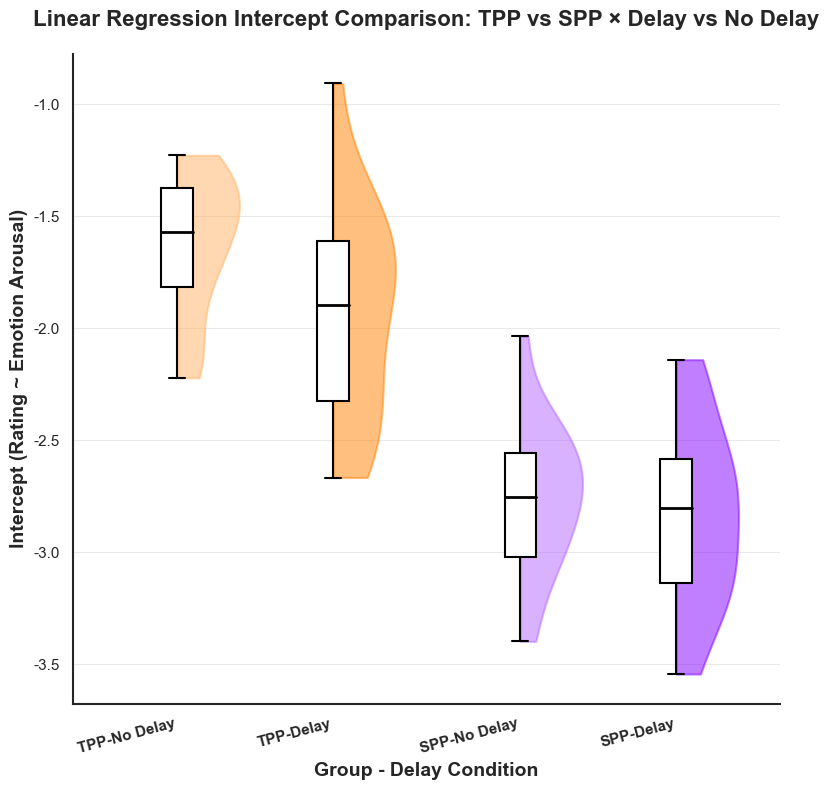


TPP组个体拟合示例:

  No Delay条件:
    被试 TPP_Subject_20: 截距 = -1.618, R² = 0.883, 数据点 = 27

  Delay条件:
    被试 TPP_Subject_19: 截距 = -1.927, R² = 0.905, 数据点 = 27

SPP组个体拟合示例:

  No Delay条件:
    被试 SPP_Subject_19: 截距 = -2.792, R² = 0.815, 数据点 = 27

  Delay条件:
    被试 SPP_Subject_10: 截距 = -2.806, R² = 0.894, 数据点 = 27

分析完成!
输出文件:
  - subject_intercepts_data_by_delay.csv: 所有被试在不同延迟条件下的截距数据
  - intercept_comparison_statistics_four_groups.csv: 四组间比较统计结果
  - intercept_comparison_four_groups.png: 四组条件截距比较图


In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- 读取大模型数据 ---
df_llm = pd.read_csv('./organized_data.csv')
emotion_arousal_mapping = {
    0: 1.0,   # 最低唤醒
    1: 2.0,
    2: 3.0,
    3: 4.0,
    4: 5.0,
    5: 6.0,
    6: 7.0,
    7: 8.0,
    8: 9.0,
    9: 10.0   # 最高唤醒
}
# 添加情绪唤醒度列
df_llm['Emotion_Arousal'] = df_llm['Emotion'].map(emotion_arousal_mapping)


tpp_data_list = prepare_llm_data_for_analysis(df_llm, "TPP")
spp_data_list = prepare_llm_data_for_analysis(df_llm, "SPP")

print(f"TPP组共读取到 {len(tpp_data_list)} 个模型的数据。")
print(f"SPP组共读取到 {len(spp_data_list)} 个模型的数据。")
print("-" * 30)

# --- 计算每个模型在不同延迟条件下的线性拟合截距 ---
def calculate_intercept_per_subject_by_delay(data_list, group_name):
    """
    计算每个模型在不同延迟条件下(Delay vs No Delay)情绪唤醒度与惩罚评分的线性拟合截距
    """
    intercept_results = []
    
    for i, subject_data in enumerate(data_list):
        # 确保数据包含所需的列
        if all(col in subject_data.columns for col in ['Emotion_Arousal', 'Rating', 'Delay_Info']):
            # 按Delay_Info是否等于0进行分类
            no_delay_data = subject_data[subject_data['Delay_Info'] == 0].dropna(subset=['Emotion_Arousal', 'Rating'])
            delay_data = subject_data[subject_data['Delay_Info'] != 0].dropna(subset=['Emotion_Arousal', 'Rating'])
            
            # 计算No Delay条件下的截距
            if len(no_delay_data) >= 2:
                try:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(
                        no_delay_data['Emotion_Arousal'], no_delay_data['Rating']
                    )
                    
                    intercept_results.append({
                        'Subject_ID': f"{group_name}_Subject_{i+1}",
                        'Group': group_name,
                        'Delay_Condition': 'No Delay',
                        'Combined_Group': f"{group_name}-No Delay",
                        'Intercept': intercept,
                        'Slope': slope,
                        'R_squared': r_value**2,
                        'P_value': p_value,
                        'Data_Points': len(no_delay_data)
                    })
                except:
                    print(f"警告: 无法计算{group_name}组第{i+1}个被试No Delay条件的截距")
            
            # 计算Delay条件下的截距
            if len(delay_data) >= 2:
                try:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(
                        delay_data['Emotion_Arousal'], delay_data['Rating']
                    )
                    
                    intercept_results.append({
                        'Subject_ID': f"{group_name}_Subject_{i+1}",
                        'Group': group_name,
                        'Delay_Condition': 'Delay',
                        'Combined_Group': f"{group_name}-Delay",
                        'Intercept': intercept,
                        'Slope': slope,
                        'R_squared': r_value**2,
                        'P_value': p_value,
                        'Data_Points': len(delay_data)
                    })
                except:
                    print(f"警告: 无法计算{group_name}组第{i+1}个被试Delay条件的截距")
        else:
            print(f"警告: {group_name}组第{i+1}个被试数据缺少必要列")
    
    return pd.DataFrame(intercept_results)

# 计算TPP和SPP组在不同延迟条件下的截距
print("正在计算不同延迟条件下的线性拟合截距...")
tpp_intercepts = calculate_intercept_per_subject_by_delay(tpp_data_list, "TPP")
spp_intercepts = calculate_intercept_per_subject_by_delay(spp_data_list, "SPP")

print(f"TPP组成功计算 {len(tpp_intercepts)} 个条件-被试的截距")
print(f"SPP组成功计算 {len(spp_intercepts)} 个条件-被试的截距")
print("-" * 30)

# --- 合并数据用于可视化 ---
all_intercepts = pd.concat([tpp_intercepts, spp_intercepts], ignore_index=True)

# 显示基本统计信息
print("截距描述性统计:")
for combined_group in ['TPP-No Delay', 'TPP-Delay', 'SPP-No Delay', 'SPP-Delay']:
    group_data = all_intercepts[all_intercepts['Combined_Group'] == combined_group]
    if len(group_data) > 0:
        print(f"{combined_group}:")
        print(f"  样本量: {len(group_data)}")
        print(f"  均值: {group_data['Intercept'].mean():.3f}")
        print(f"  标准差: {group_data['Intercept'].std():.3f}")
        print(f"  范围: {group_data['Intercept'].min():.3f} 到 {group_data['Intercept'].max():.3f}")
    else:
        print(f"{combined_group}: 无数据")
print("-" * 30)

# --- 显著性检验 ---
def perform_group_comparisons(intercept_df):
    """
    对四组条件进行比较,组内使用配对检验,组间使用独立样本检验
    """
    print("\n" + "="*50)
    print("组间截距比较显著性检验")
    print("="*50)
    
    comparison_results = []
    
    # 1. 组内比较 (配对检验): TPP-No Delay vs TPP-Delay
    print("\n【组内配对比较】")
    for group_name in ['TPP', 'SPP']:
        # 获取该组的数据
        group_data = intercept_df[intercept_df['Group'] == group_name]
        
        # 创建配对数据框架
        paired_data = group_data.pivot_table(
            index='Subject_ID', 
            columns='Delay_Condition', 
            values='Intercept'
        )
        
        # 只保留同时有No Delay和Delay数据的被试
        paired_data = paired_data.dropna()
        
        if len(paired_data) > 0:
            no_delay_intercepts = paired_data['No Delay'].values
            delay_intercepts = paired_data['Delay'].values
            
            # Wilcoxon符号秩检验 (配对非参数检验)
            wilcoxon_stat, wilcoxon_p = stats.wilcoxon(no_delay_intercepts, delay_intercepts)
            
            # 配对t检验
            t_stat, t_p = stats.ttest_rel(no_delay_intercepts, delay_intercepts)
            
            # Cohen's d (配对样本)
            diff = no_delay_intercepts - delay_intercepts
            d = np.mean(diff) / np.std(diff, ddof=1)
            
            # 显著性标记
            if wilcoxon_p < 0.001:
                sig_label = '***'
            elif wilcoxon_p < 0.01:
                sig_label = '**'
            elif wilcoxon_p < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"\n{group_name}: No Delay vs Delay (配对比较, n={len(paired_data)}):")
            print(f"  Wilcoxon符号秩检验: W = {wilcoxon_stat:.3f}, p = {wilcoxon_p:.4f}")
            print(f"  配对t检验: t = {t_stat:.3f}, p = {t_p:.4f}")
            print(f"  Cohen's d: {d:.3f}")
            print(f"  显著性: {sig_label}")
            print(f"  No Delay均值: {np.mean(no_delay_intercepts):.3f} ± {np.std(no_delay_intercepts, ddof=1):.3f}")
            print(f"  Delay均值: {np.mean(delay_intercepts):.3f} ± {np.std(delay_intercepts, ddof=1):.3f}")
            
            comparison_results.append({
                'Comparison': f"{group_name}: No Delay vs Delay",
                'Group1': f"{group_name}-No Delay",
                'Group2': f"{group_name}-Delay",
                'Test_Type': 'Paired',
                'N_pairs': len(paired_data),
                'Wilcoxon_W': wilcoxon_stat,
                'Wilcoxon_p': wilcoxon_p,
                't_statistic': t_stat,
                't_p_value': t_p,
                'Cohens_d': d,
                'Significance': sig_label
            })
        else:
            print(f"\n{group_name}: 没有配对数据")
    
    # 2. 组间比较 (独立样本检验)
    print("\n【组间独立样本比较】")
    independent_comparisons = [
        ('TPP-No Delay', 'SPP-No Delay'),
        ('TPP-Delay', 'SPP-Delay')
    ]
    
    for group1, group2 in independent_comparisons:
        data1 = intercept_df[intercept_df['Combined_Group'] == group1]['Intercept'].values
        data2 = intercept_df[intercept_df['Combined_Group'] == group2]['Intercept'].values
        
        if len(data1) > 0 and len(data2) > 0:
            # Mann-Whitney U检验
            statistic, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
            
            # 独立样本t检验
            t_stat, t_p = stats.ttest_ind(data1, data2)
            
            # Cohen's d (独立样本)
            def cohens_d(x, y):
                nx = len(x)
                ny = len(y)
                dof = nx + ny - 2
                return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)
            
            d = cohens_d(data1, data2)
            
            # 显著性标记
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"\n{group1} vs {group2} (独立样本, n1={len(data1)}, n2={len(data2)}):")
            print(f"  Mann-Whitney U: U = {statistic:.3f}, p = {p_value:.4f}")
            print(f"  独立样本t检验: t = {t_stat:.3f}, p = {t_p:.4f}")
            print(f"  Cohen's d: {d:.3f}")
            print(f"  显著性: {sig_label}")
            
            comparison_results.append({
                'Comparison': f"{group1} vs {group2}",
                'Group1': group1,
                'Group2': group2,
                'Test_Type': 'Independent',
                'N_pairs': None,
                'Wilcoxon_W': None,
                'Wilcoxon_p': None,
                'MannWhitney_U': statistic,
                'MannWhitney_p': p_value,
                't_statistic': t_stat,
                't_p_value': t_p,
                'Cohens_d': d,
                'Significance': sig_label
            })
    
    return pd.DataFrame(comparison_results)

# 执行组间比较
comparison_results = perform_group_comparisons(all_intercepts)

# --- 可视化函数 ---
def create_intercept_comparison_plot_four_groups(intercept_df, comparison_df, save_path=None):
    """
    创建四组条件的截距比较图(TPP-No Delay, TPP-Delay, SPP-No Delay, SPP-Delay)
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # 定义组别顺序和颜色
    group_order = ['TPP-No Delay', 'TPP-Delay', 'SPP-No Delay', 'SPP-Delay']
    colors = {
        'TPP-No Delay': '#FFB366',  # 浅橙色
        'TPP-Delay': '#FF8000',     # 深橙色
        'SPP-No Delay': '#B366FF',  # 浅紫色
        'SPP-Delay': '#8000FF'      # 深紫色
    }
    
    # 准备数据
    plot_data = intercept_df.dropna(subset=['Intercept', 'Combined_Group'])
    
    # 创建位置映射
    interval = 0.75
    positions = [0, interval, interval*2.2, interval*3.2]  # TPP组内间距为1,SPP组内间距为1,TPP和SPP之间间距为1.5
    
    # 获取四组数据
    data_groups = [plot_data[plot_data['Combined_Group'] == group]['Intercept'].values 
                  for group in group_order]
    
    # 绘制半小提琴图(只显示右侧,彩色)
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            # 计算KDE
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                
                # 归一化密度到合适的宽度
                density = density / density.max() * 0.3
                
                # 只绘制右侧,使用彩色
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图(黑白配色,更窄的箱体)
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,  # 箱体宽度
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2.0),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    # 设置箱线图填充
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    # 设置x轴
    ax.set_xticks(positions)
    ax.set_xticklabels(group_order, fontsize=11, fontweight='bold', rotation=15, ha='right')
    
    # 设置y轴标签
    ax.set_ylabel('Intercept (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Group - Delay Condition', fontsize=14, fontweight='bold')
    
    # 设置标题
    ax.set_title('Linear Regression Intercept Comparison: TPP vs SPP × Delay vs No Delay',
                fontsize=16, fontweight='bold', pad=20)
    
    # 添加y轴网格线(仅水平方向)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)  # 将网格线放在图形元素下方
    
    # 去掉上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保留左边框和下边框,加粗
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 执行可视化 ---
print("\n" + "="*50)
print("生成四组条件截距比较图")
print("="*50)

create_intercept_comparison_plot_four_groups(all_intercepts, comparison_results, 
                                        save_path="intercept_comparison_four_groups.png")

# --- 保存结果 ---
# 保存截距数据
all_intercepts.to_csv("subject_intercepts_data_by_delay.csv", index=False)

# 保存统计结果
comparison_results.to_csv("intercept_comparison_statistics_four_groups.csv", index=False)

# 显示一些有代表性的个体拟合示例
def show_individual_examples_by_delay(data_list, group_name, num_examples=3):
    """
    显示每个组在不同延迟条件下的个体拟合示例
    """
    print(f"\n{group_name}组个体拟合示例:")
    
    intercepts_df = calculate_intercept_per_subject_by_delay(data_list, group_name)
    
    for delay_cond in ['No Delay', 'Delay']:
        cond_data = intercepts_df[intercepts_df['Delay_Condition'] == delay_cond]
        
        if len(cond_data) > 0:
            print(f"\n  {delay_cond}条件:")
            mean_intercept = cond_data['Intercept'].mean()
            
            # 最接近平均值的
            closest_to_mean = cond_data.iloc[(cond_data['Intercept'] - mean_intercept).abs().argsort()[:1]]
            
            for _, example in closest_to_mean.iterrows():
                print(f"    被试 {example['Subject_ID']}: 截距 = {example['Intercept']:.3f}, "
                      f"R² = {example['R_squared']:.3f}, 数据点 = {example['Data_Points']}")

show_individual_examples_by_delay(tpp_data_list, "TPP")
show_individual_examples_by_delay(spp_data_list, "SPP")

print("\n" + "="*60)
print("分析完成!")
print("输出文件:")
print("  - subject_intercepts_data_by_delay.csv: 所有被试在不同延迟条件下的截距数据")
print("  - intercept_comparison_statistics_four_groups.csv: 四组间比较统计结果")
print("  - intercept_comparison_four_groups.png: 四组条件截距比较图")
print("="*60)


TPP组:
  唯一案例数: 54
  总数据行数: 1080
  每个案例的重复次数范围: 20 到 20
  被试 1: 54 个案例, 54 个有效数据点
  被试 2: 54 个案例, 54 个有效数据点
  被试 3: 54 个案例, 54 个有效数据点
  被试 20: 54 个案例, 54 个有效数据点

SPP组:
  唯一案例数: 54
  总数据行数: 1080
  每个案例的重复次数范围: 20 到 20
  被试 1: 54 个案例, 54 个有效数据点
  被试 2: 54 个案例, 54 个有效数据点
  被试 3: 54 个案例, 54 个有效数据点
  被试 20: 54 个案例, 54 个有效数据点
TPP组共读取到 20 个模型的数据。
SPP组共读取到 20 个模型的数据。
------------------------------
正在计算不同延迟条件下的线性拟合斜率...
TPP组成功计算 40 个条件-被试的斜率
SPP组成功计算 40 个条件-被试的斜率
------------------------------
斜率描述性统计:
TPP-No Delay:
  样本量: 20
  均值: 1.128
  标准差: 0.045
  范围: 1.069 到 1.232
TPP-Delay:
  样本量: 20
  均值: 1.170
  标准差: 0.061
  范围: 1.035 到 1.277
SPP-No Delay:
  样本量: 20
  均值: 1.190
  标准差: 0.032
  范围: 1.126 到 1.254
SPP-Delay:
  样本量: 20
  均值: 1.201
  标准差: 0.044
  范围: 1.127 到 1.287
------------------------------

组间斜率比较显著性检验

【组内配对比较】

TPP: No Delay vs Delay (配对比较, n=20):
  Wilcoxon符号秩检验: W = 44.000, p = 0.0215
  配对t检验: t = -2.516, p = 0.0210
  Cohen's d: -0.563
  显著性: *
  No Delay均值: 1.128 ± 0.045
  Delay均值:

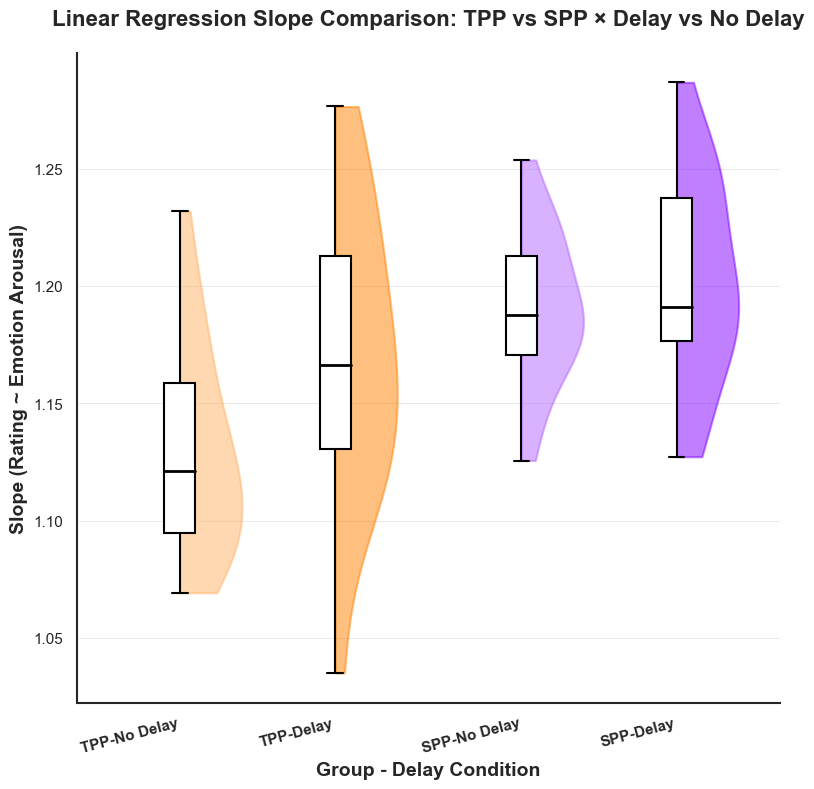


TPP组个体拟合示例:

  No Delay条件:
    被试 TPP_Subject_12: 斜率 = 1.130, R² = 0.863, 数据点 = 27

  Delay条件:
    被试 TPP_Subject_17: 斜率 = 1.170, R² = 0.878, 数据点 = 27

SPP组个体拟合示例:

  No Delay条件:
    被试 SPP_Subject_12: 斜率 = 1.190, R² = 0.869, 数据点 = 27

  Delay条件:
    被试 SPP_Subject_6: 斜率 = 1.192, R² = 0.921, 数据点 = 27

分析完成!
输出文件:
  - subject_slopes_data_by_delay.csv: 所有被试在不同延迟条件下的斜率数据
  - slope_comparison_statistics_four_groups.csv: 四组间比较统计结果
  - slope_comparison_four_groups.png: 四组条件斜率比较图


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- 读取大模型数据 ---
df_llm = pd.read_csv('./organized_data.csv')
emotion_arousal_mapping = {
    0: 1.0,   # 最低唤醒
    1: 2.0,
    2: 3.0,
    3: 4.0,
    4: 5.0,
    5: 6.0,
    6: 7.0,
    7: 8.0,
    8: 9.0,
    9: 10.0   # 最高唤醒
}
# 添加情绪唤醒度列
df_llm['Emotion_Arousal'] = df_llm['Emotion'].map(emotion_arousal_mapping)


tpp_data_list = prepare_llm_data_for_analysis(df_llm, "TPP")
spp_data_list = prepare_llm_data_for_analysis(df_llm, "SPP")

print(f"TPP组共读取到 {len(tpp_data_list)} 个模型的数据。")
print(f"SPP组共读取到 {len(spp_data_list)} 个模型的数据。")
print("-" * 30)

# --- 计算每个模型在不同延迟条件下的线性拟合斜率 ---
def calculate_slope_per_subject_by_delay(data_list, group_name):
    """
    计算每个模型在不同延迟条件下(Delay vs No Delay)情绪唤醒度与惩罚评分的线性拟合斜率
    """
    slope_results = []
    
    for i, subject_data in enumerate(data_list):
        # 确保数据包含所需的列
        if all(col in subject_data.columns for col in ['Emotion_Arousal', 'Rating', 'Delay_Info']):
            # 按Delay_Info是否等于0进行分类
            no_delay_data = subject_data[subject_data['Delay_Info'] == 0].dropna(subset=['Emotion_Arousal', 'Rating'])
            delay_data = subject_data[subject_data['Delay_Info'] != 0].dropna(subset=['Emotion_Arousal', 'Rating'])
            
            # 计算No Delay条件下的斜率
            if len(no_delay_data) >= 2:
                try:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(
                        no_delay_data['Emotion_Arousal'], no_delay_data['Rating']
                    )
                    
                    slope_results.append({
                        'Subject_ID': f"{group_name}_Subject_{i+1}",
                        'Group': group_name,
                        'Delay_Condition': 'No Delay',
                        'Combined_Group': f"{group_name}-No Delay",
                        'Slope': slope,
                        'Intercept': intercept,
                        'R_squared': r_value**2,
                        'P_value': p_value,
                        'Data_Points': len(no_delay_data)
                    })
                except:
                    print(f"警告: 无法计算{group_name}组第{i+1}个被试No Delay条件的斜率")
            
            # 计算Delay条件下的斜率
            if len(delay_data) >= 2:
                try:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(
                        delay_data['Emotion_Arousal'], delay_data['Rating']
                    )
                    
                    slope_results.append({
                        'Subject_ID': f"{group_name}_Subject_{i+1}",
                        'Group': group_name,
                        'Delay_Condition': 'Delay',
                        'Combined_Group': f"{group_name}-Delay",
                        'Slope': slope,
                        'Intercept': intercept,
                        'R_squared': r_value**2,
                        'P_value': p_value,
                        'Data_Points': len(delay_data)
                    })
                except:
                    print(f"警告: 无法计算{group_name}组第{i+1}个被试Delay条件的斜率")
        else:
            print(f"警告: {group_name}组第{i+1}个被试数据缺少必要列")
    
    return pd.DataFrame(slope_results)

# 计算TPP和SPP组在不同延迟条件下的斜率
print("正在计算不同延迟条件下的线性拟合斜率...")
tpp_slopes = calculate_slope_per_subject_by_delay(tpp_data_list, "TPP")
spp_slopes = calculate_slope_per_subject_by_delay(spp_data_list, "SPP")

print(f"TPP组成功计算 {len(tpp_slopes)} 个条件-被试的斜率")
print(f"SPP组成功计算 {len(spp_slopes)} 个条件-被试的斜率")
print("-" * 30)

# --- 合并数据用于可视化 ---
all_slopes = pd.concat([tpp_slopes, spp_slopes], ignore_index=True)

# 显示基本统计信息
print("斜率描述性统计:")
for combined_group in ['TPP-No Delay', 'TPP-Delay', 'SPP-No Delay', 'SPP-Delay']:
    group_data = all_slopes[all_slopes['Combined_Group'] == combined_group]
    if len(group_data) > 0:
        print(f"{combined_group}:")
        print(f"  样本量: {len(group_data)}")
        print(f"  均值: {group_data['Slope'].mean():.3f}")
        print(f"  标准差: {group_data['Slope'].std():.3f}")
        print(f"  范围: {group_data['Slope'].min():.3f} 到 {group_data['Slope'].max():.3f}")
    else:
        print(f"{combined_group}: 无数据")
print("-" * 30)

# --- 显著性检验 ---
def perform_group_comparisons(slope_df):
    """
    对四组条件进行比较,组内使用配对检验,组间使用独立样本检验
    """
    print("\n" + "="*50)
    print("组间斜率比较显著性检验")
    print("="*50)
    
    comparison_results = []
    
    # 1. 组内比较 (配对检验): TPP-No Delay vs TPP-Delay
    print("\n【组内配对比较】")
    for group_name in ['TPP', 'SPP']:
        # 获取该组的数据
        group_data = slope_df[slope_df['Group'] == group_name]
        
        # 创建配对数据框架
        paired_data = group_data.pivot_table(
            index='Subject_ID', 
            columns='Delay_Condition', 
            values='Slope'
        )
        
        # 只保留同时有No Delay和Delay数据的被试
        paired_data = paired_data.dropna()
        
        if len(paired_data) > 0:
            no_delay_slopes = paired_data['No Delay'].values
            delay_slopes = paired_data['Delay'].values
            
            # Wilcoxon符号秩检验 (配对非参数检验)
            wilcoxon_stat, wilcoxon_p = stats.wilcoxon(no_delay_slopes, delay_slopes)
            
            # 配对t检验
            t_stat, t_p = stats.ttest_rel(no_delay_slopes, delay_slopes)
            
            # Cohen's d (配对样本)
            diff = no_delay_slopes - delay_slopes
            d = np.mean(diff) / np.std(diff, ddof=1)
            
            # 显著性标记
            if wilcoxon_p < 0.001:
                sig_label = '***'
            elif wilcoxon_p < 0.01:
                sig_label = '**'
            elif wilcoxon_p < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"\n{group_name}: No Delay vs Delay (配对比较, n={len(paired_data)}):")
            print(f"  Wilcoxon符号秩检验: W = {wilcoxon_stat:.3f}, p = {wilcoxon_p:.4f}")
            print(f"  配对t检验: t = {t_stat:.3f}, p = {t_p:.4f}")
            print(f"  Cohen's d: {d:.3f}")
            print(f"  显著性: {sig_label}")
            print(f"  No Delay均值: {np.mean(no_delay_slopes):.3f} ± {np.std(no_delay_slopes, ddof=1):.3f}")
            print(f"  Delay均值: {np.mean(delay_slopes):.3f} ± {np.std(delay_slopes, ddof=1):.3f}")
            
            comparison_results.append({
                'Comparison': f"{group_name}: No Delay vs Delay",
                'Group1': f"{group_name}-No Delay",
                'Group2': f"{group_name}-Delay",
                'Test_Type': 'Paired',
                'N_pairs': len(paired_data),
                'Wilcoxon_W': wilcoxon_stat,
                'Wilcoxon_p': wilcoxon_p,
                't_statistic': t_stat,
                't_p_value': t_p,
                'Cohens_d': d,
                'Significance': sig_label
            })
        else:
            print(f"\n{group_name}: 没有配对数据")
    
    # 2. 组间比较 (独立样本检验)
    print("\n【组间独立样本比较】")
    independent_comparisons = [
        ('TPP-No Delay', 'SPP-No Delay'),
        ('TPP-Delay', 'SPP-Delay')
    ]
    
    for group1, group2 in independent_comparisons:
        data1 = slope_df[slope_df['Combined_Group'] == group1]['Slope'].values
        data2 = slope_df[slope_df['Combined_Group'] == group2]['Slope'].values
        
        if len(data1) > 0 and len(data2) > 0:
            # Mann-Whitney U检验
            statistic, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
            
            # 独立样本t检验
            t_stat, t_p = stats.ttest_ind(data1, data2)
            
            # Cohen's d (独立样本)
            def cohens_d(x, y):
                nx = len(x)
                ny = len(y)
                dof = nx + ny - 2
                return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)
            
            d = cohens_d(data1, data2)
            
            # 显著性标记
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"\n{group1} vs {group2} (独立样本, n1={len(data1)}, n2={len(data2)}):")
            print(f"  Mann-Whitney U: U = {statistic:.3f}, p = {p_value:.4f}")
            print(f"  独立样本t检验: t = {t_stat:.3f}, p = {t_p:.4f}")
            print(f"  Cohen's d: {d:.3f}")
            print(f"  显著性: {sig_label}")
            
            comparison_results.append({
                'Comparison': f"{group1} vs {group2}",
                'Group1': group1,
                'Group2': group2,
                'Test_Type': 'Independent',
                'N_pairs': None,
                'Wilcoxon_W': None,
                'Wilcoxon_p': None,
                'MannWhitney_U': statistic,
                'MannWhitney_p': p_value,
                't_statistic': t_stat,
                't_p_value': t_p,
                'Cohens_d': d,
                'Significance': sig_label
            })
    
    return pd.DataFrame(comparison_results)

# 执行组间比较
comparison_results = perform_group_comparisons(all_slopes)

# --- 可视化函数 ---
def create_slope_comparison_plot_four_groups(slope_df, comparison_df, save_path=None):
    """
    创建四组条件的斜率比较图(TPP-No Delay, TPP-Delay, SPP-No Delay, SPP-Delay)
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # 定义组别顺序和颜色
    group_order = ['TPP-No Delay', 'TPP-Delay', 'SPP-No Delay', 'SPP-Delay']
    colors = {
        'TPP-No Delay': '#FFB366',  # 浅橙色
        'TPP-Delay': '#FF8000',     # 深橙色
        'SPP-No Delay': '#B366FF',  # 浅紫色
        'SPP-Delay': '#8000FF'      # 深紫色
    }
    
    # 准备数据
    plot_data = slope_df.dropna(subset=['Slope', 'Combined_Group'])
    
    # 创建位置映射
    interval = 0.75
    positions = [0, interval, interval*2.2, interval*3.2]  # TPP组内间距为1,SPP组内间距为1,TPP和SPP之间间距为1.5
    
    # 获取四组数据
    data_groups = [plot_data[plot_data['Combined_Group'] == group]['Slope'].values 
                  for group in group_order]
    
    # 绘制半小提琴图(只显示右侧,彩色)
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            # 计算KDE
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                
                # 归一化密度到合适的宽度
                density = density / density.max() * 0.3
                
                # 只绘制右侧,使用彩色
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图(黑白配色,更窄的箱体)
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,  # 箱体宽度
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2.0),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    # 设置箱线图填充
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    # 设置x轴
    ax.set_xticks(positions)
    ax.set_xticklabels(group_order, fontsize=11, fontweight='bold', rotation=15, ha='right')
    
    # 设置y轴标签
    ax.set_ylabel('Slope (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Group - Delay Condition', fontsize=14, fontweight='bold')
    
    # 设置标题
    ax.set_title('Linear Regression Slope Comparison: TPP vs SPP × Delay vs No Delay',
                fontsize=16, fontweight='bold', pad=20)
    
    # 添加y轴网格线(仅水平方向)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)  # 将网格线放在图形元素下方
    
    # 去掉上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保留左边框和下边框,加粗
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 执行可视化 ---
print("\n" + "="*50)
print("生成四组条件斜率比较图")
print("="*50)

create_slope_comparison_plot_four_groups(all_slopes, comparison_results, 
                                        save_path="slope_comparison_four_groups.png")

# --- 保存结果 ---
# 保存斜率数据
all_slopes.to_csv("subject_slopes_data_by_delay.csv", index=False)

# 保存统计结果
comparison_results.to_csv("slope_comparison_statistics_four_groups.csv", index=False)

# 显示一些有代表性的个体拟合示例
def show_individual_examples_by_delay(data_list, group_name, num_examples=3):
    """
    显示每个组在不同延迟条件下的个体拟合示例
    """
    print(f"\n{group_name}组个体拟合示例:")
    
    slopes_df = calculate_slope_per_subject_by_delay(data_list, group_name)
    
    for delay_cond in ['No Delay', 'Delay']:
        cond_data = slopes_df[slopes_df['Delay_Condition'] == delay_cond]
        
        if len(cond_data) > 0:
            print(f"\n  {delay_cond}条件:")
            mean_slope = cond_data['Slope'].mean()
            
            # 最接近平均值的
            closest_to_mean = cond_data.iloc[(cond_data['Slope'] - mean_slope).abs().argsort()[:1]]
            
            for _, example in closest_to_mean.iterrows():
                print(f"    被试 {example['Subject_ID']}: 斜率 = {example['Slope']:.3f}, "
                      f"R² = {example['R_squared']:.3f}, 数据点 = {example['Data_Points']}")

show_individual_examples_by_delay(tpp_data_list, "TPP")
show_individual_examples_by_delay(spp_data_list, "SPP")

print("\n" + "="*60)
print("分析完成!")
print("输出文件:")
print("  - subject_slopes_data_by_delay.csv: 所有被试在不同延迟条件下的斜率数据")
print("  - slope_comparison_statistics_four_groups.csv: 四组间比较统计结果")
print("  - slope_comparison_four_groups.png: 四组条件斜率比较图")
print("="*60)

读取大模型数据
成功读取大模型数据，共 2160 行
列名: ['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']

数据预览:
   List2  Category  Rating  Delay_Info  Emotion Role
0      1       3.0       9         0.0        9  SPP
1      1       3.0       9         0.0        9  SPP
2      1       3.0       9         0.0        9  SPP
3      1       3.0       9         0.0        9  SPP
4      1       3.0       9         0.0        9  SPP
5      1       3.0       9         0.0        9  SPP
6      1       3.0       9         0.0        9  SPP
7      1       3.0       9         0.0        9  SPP
8      1       3.0       9         0.0        9  SPP
9      1       3.0       9         0.0        9  SPP

Emotion列唯一值: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
------------------------------------------------------------

情绪唤醒度映射:
  0: 1.0 (出现2次)
  1: 2.0 (出现22次)
  2: 3.0 (出现114次)
  3: 4.0 (出现107次)
  4: 5.0 (出现295次)
  5: 6.0 (出现255次)
  6: 7.0 (出现235次)
  7: 8.0 (出现258次)
  8: 9.0 (出现647次)
  9: 10.0 (出现225次)
--------------------

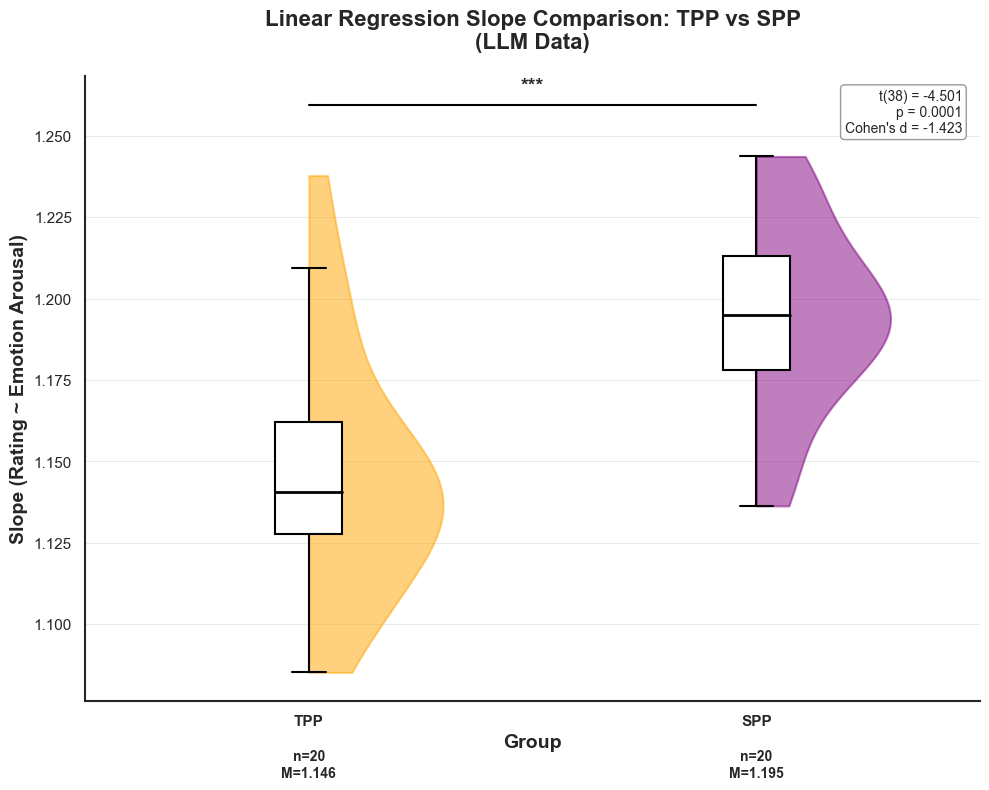


个体拟合示例

TPP组个体拟合示例:
  TPP_Subject_14:
    斜率 = 1.1432
    R² = 0.8980
    p值 = 0.0000
    数据点 = 54
  TPP_Subject_18:
    斜率 = 1.2378
    R² = 0.8917
    p值 = 0.0000
    数据点 = 54
  TPP_Subject_8:
    斜率 = 1.0852
    R² = 0.7874
    p值 = 0.0000
    数据点 = 54

SPP组个体拟合示例:
  SPP_Subject_13:
    斜率 = 1.1931
    R² = 0.8665
    p值 = 0.0000
    数据点 = 54
  SPP_Subject_14:
    斜率 = 1.2437
    R² = 0.8408
    p值 = 0.0000
    数据点 = 54
  SPP_Subject_2:
    斜率 = 1.1364
    R² = 0.8304
    p值 = 0.0000
    数据点 = 54

保存结果文件
已保存: LLM_subject_slopes_data.csv
已保存: LLM_slope_comparison_statistics.csv
已保存: LLM_descriptive_statistics.csv

分析完成！

输出文件:
  1. LLM_subject_slopes_data.csv - 所有被试的斜率数据
  2. LLM_slope_comparison_statistics.csv - 组间比较统计结果
  3. LLM_descriptive_statistics.csv - 描述性统计
  4. LLM_slope_comparison_TPP_vs_SPP.png - 斜率比较图

主要发现:
  TPP组平均斜率: 1.1462 (SD=0.0380)
  SPP组平均斜率: 1.1946 (SD=0.0294)
  组间差异: t=-4.501, p=0.0001
  效应量: Cohen's d=-1.423 (large)
  显著性: ***


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ============================================
# 读取大模型数据
# ============================================
print("="*60)
print("读取大模型数据")
print("="*60)

df_llm = pd.read_csv('./organized_data.csv')
print(f"成功读取大模型数据，共 {len(df_llm)} 行")
print(f"列名: {df_llm.columns.tolist()}")
print(f"\n数据预览:")
print(df_llm.head(10))
print(f"\nEmotion列唯一值: {sorted(df_llm['Emotion'].unique())}")
print("-" * 60)

# ============================================
# 添加情绪唤醒度映射
# ============================================
# 根据Emotion列的数字值创建情绪唤醒度映射
# 0-9的数字应该对应不同的情绪唤醒度
# 假设数字越大，情绪唤醒度越高（你可以根据实际情况调整）
emotion_arousal_mapping = {
    0: 1.0,   # 最低唤醒
    1: 2.0,
    2: 3.0,
    3: 4.0,
    4: 5.0,
    5: 6.0,
    6: 7.0,
    7: 8.0,
    8: 9.0,
    9: 10.0   # 最高唤醒
}

# 或者，如果这些数字直接代表情绪唤醒度，可以简单使用：
# emotion_arousal_mapping = {i: float(i) for i in range(10)}

print("\n情绪唤醒度映射:")
for emotion, arousal in emotion_arousal_mapping.items():
    count = len(df_llm[df_llm['Emotion'] == emotion])
    print(f"  {emotion}: {arousal} (出现{count}次)")
print("-" * 60)

# 添加情绪唤醒度列
df_llm['Emotion_Arousal'] = df_llm['Emotion'].map(emotion_arousal_mapping)

# 检查是否有未映射的情绪
unmapped_emotions = df_llm[df_llm['Emotion_Arousal'].isna()]['Emotion'].unique()
if len(unmapped_emotions) > 0:
    print(f"警告：以下情绪值未映射到唤醒度: {unmapped_emotions}")
    print("请在emotion_arousal_mapping中添加这些值的映射")
    print("-" * 60)
else:
    print("✓ 所有情绪值已成功映射到唤醒度")
    print("-" * 60)

# 显示映射后的数据预览
print("\n映射后数据预览:")
print(df_llm[['List2', 'Category', 'Rating', 'Emotion', 'Emotion_Arousal', 'Role']].head(10))
print("-" * 60)

# ============================================
# 数据整理：模拟20个被试
# ============================================
def prepare_llm_data_for_analysis(df, group_name):
    """
    将大模型数据整理成每个被试的数据格式
    
    参数:
    - df: 大模型数据DataFrame
    - group_name: 组别名称 (TPP/SPP)
    
    返回:
    - 被试数据列表，每个元素是一个被试的DataFrame
    """
    # 筛选指定组别的数据
    group_df = df[df['Role'] == group_name].copy()
    
    # 获取所有唯一的案例（List2）
    unique_cases = group_df['List2'].unique()
    
    print(f"\n{group_name}组:")
    print(f"  唯一案例数: {len(unique_cases)}")
    print(f"  总数据行数: {len(group_df)}")
    
    # 为每行数据添加被试ID（通过分组计数）
    # 假设数据是按照被试顺序排列的，每个案例重复20次对应20个被试
    group_df['Subject_ID'] = group_df.groupby('List2').cumcount() + 1
    
    # 检查每个案例的重复次数
    case_counts = group_df.groupby('List2').size()
    print(f"  每个案例的重复次数范围: {case_counts.min()} 到 {case_counts.max()}")
    
    # 检查是否有缺失的Emotion_Arousal
    missing_arousal = group_df['Emotion_Arousal'].isna().sum()
    if missing_arousal > 0:
        print(f"  警告: 有 {missing_arousal} 行缺失Emotion_Arousal值")
    
    # 创建20个被试的数据列表
    subject_data_list = []
    for subject_id in range(1, 21):  # 被试1到20
        subject_df = group_df[group_df['Subject_ID'] == subject_id].copy()
        
        # 重命名列以匹配原始代码的期望
        subject_df = subject_df.rename(columns={
            'List2': 'Crime_ID',
            'Rating': 'Rating',
            'Delay_Info': 'Delay_Info',
            'Emotion': 'Emotion',
            'Emotion_Arousal': 'Emotion_Arousal',
            'Category': 'Category'
        })
        
        # 选择需要的列
        subject_df = subject_df[['Crime_ID', 'Category', 'Rating', 
                                 'Delay_Info', 'Emotion', 'Emotion_Arousal']]
        
        # 检查该被试有多少有效数据点
        valid_points = subject_df.dropna(subset=['Emotion_Arousal', 'Rating']).shape[0]
        
        subject_data_list.append(subject_df)
        
        if subject_id <= 3 or subject_id == 20:  # 显示前3个和最后1个被试的信息
            print(f"  被试 {subject_id}: {len(subject_df)} 个案例, {valid_points} 个有效数据点")
    
    return subject_data_list

# ============================================
# 准备TPP和SPP组的数据
# ============================================
print("\n" + "="*60)
print("准备分组数据")
print("="*60)

tpp_data_list = prepare_llm_data_for_analysis(df_llm, "TPP")
spp_data_list = prepare_llm_data_for_analysis(df_llm, "SPP")

print(f"\nTPP组共 {len(tpp_data_list)} 个被试")
print(f"SPP组共 {len(spp_data_list)} 个被试")
print("-" * 60)

# ============================================
# 计算每个被试的线性拟合斜率
# ============================================
def calculate_slope_per_subject(data_list, group_name):
    """
    计算每个被试情绪唤醒度与惩罚评分的线性拟合斜率
    """
    slope_results = []
    
    for i, subject_data in enumerate(data_list):
        # 确保数据包含所需的列
        if 'Emotion_Arousal' in subject_data.columns and 'Rating' in subject_data.columns:
            # 移除缺失值
            clean_data = subject_data.dropna(subset=['Emotion_Arousal', 'Rating'])
            
            if len(clean_data) >= 2:  # 至少需要2个点才能计算斜率
                try:
                    # 计算线性回归
                    slope, intercept, r_value, p_value, std_err = stats.linregress(
                        clean_data['Emotion_Arousal'], clean_data['Rating']
                    )
                    
                    slope_results.append({
                        'Subject_ID': f"{group_name}_Subject_{i+1}",
                        'Group': group_name,
                        'Slope': slope,
                        'Intercept': intercept,
                        'R_squared': r_value**2,
                        'P_value': p_value,
                        'Std_Error': std_err,
                        'Data_Points': len(clean_data)
                    })
                except Exception as e:
                    print(f"警告: 无法计算{group_name}组第{i+1}个被试的斜率: {e}")
            else:
                print(f"警告: {group_name}组第{i+1}个被试数据点不足 (只有{len(clean_data)}个点)")
        else:
            print(f"警告: {group_name}组第{i+1}个被试数据缺少必要列")
    
    return pd.DataFrame(slope_results)

# 计算TPP和SPP组的斜率
print("\n" + "="*60)
print("计算线性拟合斜率")
print("="*60)

tpp_slopes = calculate_slope_per_subject(tpp_data_list, "TPP")
spp_slopes = calculate_slope_per_subject(spp_data_list, "SPP")

print(f"\nTPP组成功计算 {len(tpp_slopes)} 个被试的斜率")
print(f"SPP组成功计算 {len(spp_slopes)} 个被试的斜率")

# 检查是否有数据
if len(tpp_slopes) == 0 or len(spp_slopes) == 0:
    print("\n错误: 无法计算斜率，请检查数据!")
    print("\n调试信息:")
    print("TPP组第一个被试的数据:")
    print(tpp_data_list[0].head())
    print("\nSPP组第一个被试的数据:")
    print(spp_data_list[0].head())
    # 停止执行
    raise ValueError("无法计算斜率，数据可能有问题")

print("-" * 60)

# ============================================
# 描述性统计
# ============================================
print("\n" + "="*60)
print("斜率描述性统计")
print("="*60)

print("\nTPP组:")
print(f"  样本量: {len(tpp_slopes)}")
print(f"  均值: {tpp_slopes['Slope'].mean():.4f}")
print(f"  标准差: {tpp_slopes['Slope'].std():.4f}")
print(f"  中位数: {tpp_slopes['Slope'].median():.4f}")
print(f"  范围: [{tpp_slopes['Slope'].min():.4f}, {tpp_slopes['Slope'].max():.4f}]")
print(f"  平均R²: {tpp_slopes['R_squared'].mean():.4f}")

print("\nSPP组:")
print(f"  样本量: {len(spp_slopes)}")
print(f"  均值: {spp_slopes['Slope'].mean():.4f}")
print(f"  标准差: {spp_slopes['Slope'].std():.4f}")
print(f"  中位数: {spp_slopes['Slope'].median():.4f}")
print(f"  范围: [{spp_slopes['Slope'].min():.4f}, {spp_slopes['Slope'].max():.4f}]")
print(f"  平均R²: {spp_slopes['R_squared'].mean():.4f}")

print("-" * 60)

# ============================================
# 组间比较显著性检验
# ============================================
def perform_group_comparison(tpp_data, spp_data):
    """
    对TPP和SPP组的斜率进行显著性检验
    """
    print("\n" + "="*60)
    print("组间斜率比较显著性检验")
    print("="*60)
    
    # 正态性检验
    print("\n正态性检验 (Shapiro-Wilk):")
    tpp_stat, tpp_p = stats.shapiro(tpp_data['Slope'])
    spp_stat, spp_p = stats.shapiro(spp_data['Slope'])
    print(f"  TPP组: W={tpp_stat:.4f}, p={tpp_p:.4f}")
    print(f"  SPP组: W={spp_stat:.4f}, p={spp_p:.4f}")
    
    # 方差齐性检验
    print("\n方差齐性检验 (Levene's Test):")
    levene_stat, levene_p = stats.levene(tpp_data['Slope'], spp_data['Slope'])
    print(f"  F={levene_stat:.4f}, p={levene_p:.4f}")
    
    # Mann-Whitney U检验 (非参数检验)
    print("\nMann-Whitney U检验 (非参数):")
    mw_statistic, mw_p_value = stats.mannwhitneyu(
        tpp_data['Slope'], spp_data['Slope'], alternative='two-sided'
    )
    print(f"  U统计量: {mw_statistic:.3f}")
    print(f"  p值: {mw_p_value:.4f}")
    
    # t检验 (参数检验)
    print("\n独立样本t检验 (参数):")
    t_stat, t_p = stats.ttest_ind(tpp_data['Slope'], spp_data['Slope'])
    print(f"  t统计量: {t_stat:.3f}")
    print(f"  p值: {t_p:.4f}")
    
    # 效应量计算 (Cohen's d)
    def cohens_d(x, y):
        nx = len(x)
        ny = len(y)
        dof = nx + ny - 2
        return (np.mean(x) - np.mean(y)) / np.sqrt(
            ((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof
        )
    
    d = cohens_d(tpp_data['Slope'], spp_data['Slope'])
    print(f"\nCohen's d效应量: {d:.3f}")
    
    # 效应量解释
    if abs(d) < 0.2:
        effect_size = "negligible"
    elif abs(d) < 0.5:
        effect_size = "small"
    elif abs(d) < 0.8:
        effect_size = "medium"
    else:
        effect_size = "large"
    print(f"效应量大小: {effect_size}")
    
    # 显著性标记
    if t_p < 0.001:
        sig_label = '***'
    elif t_p < 0.01:
        sig_label = '**'
    elif t_p < 0.05:
        sig_label = '*'
    else:
        sig_label = 'ns'
    
    print(f"\n显著性水平: {sig_label}")
    print("  (***: p < 0.001, **: p < 0.01, *: p < 0.05, ns: not significant)")
    
    return {
        'shapiro_tpp_stat': tpp_stat,
        'shapiro_tpp_p': tpp_p,
        'shapiro_spp_stat': spp_stat,
        'shapiro_spp_p': spp_p,
        'levene_stat': levene_stat,
        'levene_p': levene_p,
        'mannwhitney_u': mw_statistic,
        'mannwhitney_p': mw_p_value,
        't_statistic': t_stat,
        't_p_value': t_p,
        'cohens_d': d,
        'effect_size': effect_size,
        'significance': sig_label
    }

# 合并数据
all_slopes = pd.concat([tpp_slopes, spp_slopes], ignore_index=True)

# 执行组间比较
comparison_results = perform_group_comparison(tpp_slopes, spp_slopes)

# ============================================
# 可视化
# ============================================
def create_slope_comparison_plot(slope_df, comparison_stats, save_path=None):
    """
    创建TPP和SPP组斜率比较图（箱线图+半小提琴图）
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 定义组别顺序和颜色
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',  # 橙色
        'SPP': '#800080'   # 紫色
    }
    
    # 准备数据
    plot_data = slope_df.dropna(subset=['Slope', 'Group'])
    
    # 创建位置映射
    positions = [0, 1]
    
    # 获取两组数据
    tpp_data = plot_data[plot_data['Group'] == 'TPP']['Slope'].values
    spp_data = plot_data[plot_data['Group'] == 'SPP']['Slope'].values
    data_groups = [tpp_data, spp_data]
    
    # 绘制半小提琴图（只显示右侧，彩色）
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            # 计算KDE
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                
                # 归一化密度到合适的宽度
                density = density / density.max() * 0.3
                
                # 只绘制右侧，使用彩色
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图（黑白配色，更窄的箱体）
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,  # 箱体宽度
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    # 设置箱线图填充
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    # 设置x轴
    ax.set_xticks(positions)
    ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
    
    # 设置y轴标签
    ax.set_ylabel('Slope (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Group', fontsize=14, fontweight='bold')
    
    # 设置标题
    ax.set_title('Linear Regression Slope Comparison: TPP vs SPP\n(LLM Data)',
                fontsize=16, fontweight='bold', pad=20)
    
    # 添加显著性标记
    y_max = max([np.max(data) for data in data_groups if len(data) > 0])
    y_min = min([np.min(data) for data in data_groups if len(data) > 0])
    y_range = y_max - y_min
    
    sig_y = y_max + 0.1 * y_range
    sig_x = [0, 1]
    
    # 绘制显著性线
    ax.plot(sig_x, [sig_y, sig_y], 'k-', linewidth=1.5)
    # 添加显著性标记
    ax.text(0.5, sig_y + 0.02 * y_range, comparison_stats['significance'], 
           ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # 添加样本量和统计信息
    for i, group in enumerate(group_order):
        n = len(plot_data[plot_data['Group'] == group])
        mean_val = plot_data[plot_data['Group'] == group]['Slope'].mean()
        ax.text(positions[i], y_min - 0.15 * y_range, 
               f'n={n}\nM={mean_val:.3f}', 
               ha='center', va='top', fontsize=10, fontweight='bold')
    
    # 添加统计信息文本框
    stats_text = f"t({len(tpp_data) + len(spp_data) - 2}) = {comparison_stats['t_statistic']:.3f}\n"
    stats_text += f"p = {comparison_stats['t_p_value']:.4f}\n"
    stats_text += f"Cohen's d = {comparison_stats['cohens_d']:.3f}"
    
    ax.text(0.98, 0.98, stats_text,
           transform=ax.transAxes,
           verticalalignment='top',
           horizontalalignment='right',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'),
           fontsize=10)
    
    # 添加y轴网格线（仅水平方向）
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)  # 将网格线放在图形元素下方
    
    # 去掉上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保留左边框和下边框，加粗
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 生成可视化
# ============================================
print("\n" + "="*60)
print("生成斜率比较图")
print("="*60)

create_slope_comparison_plot(all_slopes, comparison_results, 
                             save_path="LLM_slope_comparison_TPP_vs_SPP.png")

# ============================================
# 显示个体拟合示例
# ============================================
def show_individual_examples(data_list, slopes_df, group_name, num_examples=3):
    """
    显示每个组几个有代表性的个体拟合示例
    """
    print(f"\n{group_name}组个体拟合示例:")
    
    if len(slopes_df) == 0:
        print("  无可用数据")
        return
    
    # 选择斜率最大、最小和接近平均值的示例
    mean_slope = slopes_df['Slope'].mean()
    
    # 最接近平均值的
    closest_to_mean = slopes_df.iloc[(slopes_df['Slope'] - mean_slope).abs().argsort()[:1]]
    # 斜率最大的
    max_slope = slopes_df.nlargest(1, 'Slope')
    # 斜率最小的
    min_slope = slopes_df.nsmallest(1, 'Slope')
    
    examples = pd.concat([closest_to_mean, max_slope, min_slope])
    
    for _, example in examples.iterrows():
        subject_idx = int(example['Subject_ID'].split('_')[-1]) - 1
        subject_data = data_list[subject_idx].dropna(subset=['Emotion_Arousal', 'Rating'])
        
        print(f"  {example['Subject_ID']}:")
        print(f"    斜率 = {example['Slope']:.4f}")
        print(f"    R² = {example['R_squared']:.4f}")
        print(f"    p值 = {example['P_value']:.4f}")
        print(f"    数据点 = {example['Data_Points']}")

print("\n" + "="*60)
print("个体拟合示例")
print("="*60)

show_individual_examples(tpp_data_list, tpp_slopes, "TPP")
show_individual_examples(spp_data_list, spp_slopes, "SPP")

# ============================================
# 保存结果
# ============================================
print("\n" + "="*60)
print("保存结果文件")
print("="*60)

# 保存斜率数据
all_slopes.to_csv("LLM_subject_slopes_data.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_subject_slopes_data.csv")

# 保存统计结果
stats_df = pd.DataFrame([comparison_results])
stats_df.to_csv("LLM_slope_comparison_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_slope_comparison_statistics.csv")

# 保存详细的描述性统计
desc_stats = pd.DataFrame({
    'Group': ['TPP', 'SPP'],
    'N': [len(tpp_slopes), len(spp_slopes)],
    'Mean': [tpp_slopes['Slope'].mean(), spp_slopes['Slope'].mean()],
    'SD': [tpp_slopes['Slope'].std(), spp_slopes['Slope'].std()],
    'Median': [tpp_slopes['Slope'].median(), spp_slopes['Slope'].median()],
    'Min': [tpp_slopes['Slope'].min(), spp_slopes['Slope'].min()],
    'Max': [tpp_slopes['Slope'].max(), spp_slopes['Slope'].max()],
    'Mean_R_squared': [tpp_slopes['R_squared'].mean(), spp_slopes['R_squared'].mean()]
})
desc_stats.to_csv("LLM_descriptive_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_descriptive_statistics.csv")

print("\n" + "="*60)
print("分析完成！")
print("="*60)
print("\n输出文件:")
print("  1. LLM_subject_slopes_data.csv - 所有被试的斜率数据")
print("  2. LLM_slope_comparison_statistics.csv - 组间比较统计结果")
print("  3. LLM_descriptive_statistics.csv - 描述性统计")
print("  4. LLM_slope_comparison_TPP_vs_SPP.png - 斜率比较图")
print("\n主要发现:")
print(f"  TPP组平均斜率: {tpp_slopes['Slope'].mean():.4f} (SD={tpp_slopes['Slope'].std():.4f})")
print(f"  SPP组平均斜率: {spp_slopes['Slope'].mean():.4f} (SD={spp_slopes['Slope'].std():.4f})")
print(f"  组间差异: t={comparison_results['t_statistic']:.3f}, p={comparison_results['t_p_value']:.4f}")
print(f"  效应量: Cohen's d={comparison_results['cohens_d']:.3f} ({comparison_results['effect_size']})")
print(f"  显著性: {comparison_results['significance']}")
print("="*60)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ============================================
# 读取大模型数据
# ============================================
print("="*60)
print("读取大模型数据")
print("="*60)

df_llm = pd.read_csv('./organized_data.csv')
print(f"成功读取大模型数据，共 {len(df_llm)} 行")
print(f"列名: {df_llm.columns.tolist()}")
print(f"\n数据预览:")
print(df_llm.head())
print("-" * 60)

# ============================================
# 添加情绪唤醒度映射
# ============================================
# 根据Emotion列创建情绪唤醒度映射
# 你需要根据实际情况调整这个映射
emotion_arousal_mapping = {
    'anger': 7.0,      # 愤怒 - 高唤醒
    'fear': 6.5,       # 恐惧 - 高唤醒
    'disgust': 6.0,    # 厌恶 - 中高唤醒
    'sad': 4.5,        # 悲伤 - 中等唤醒
    'neutral': 3.0,    # 中性 - 低唤醒
    'happy': 5.5,      # 快乐 - 中高唤醒
}

# 如果Emotion列的值不在映射中，请根据实际数据调整
print("\n情绪唤醒度映射:")
for emotion, arousal in emotion_arousal_mapping.items():
    print(f"  {emotion}: {arousal}")
print("-" * 60)

# 添加情绪唤醒度列
df_llm['Emotion_Arousal'] = df_llm['Emotion'].map(emotion_arousal_mapping)

# 检查是否有未映射的情绪
unmapped_emotions = df_llm[df_llm['Emotion_Arousal'].isna()]['Emotion'].unique()
if len(unmapped_emotions) > 0:
    print(f"警告：以下情绪未映射到唤醒度: {unmapped_emotions}")
    print("请在emotion_arousal_mapping中添加这些情绪的映射值")
    print("-" * 60)

# ============================================
# 数据整理：模拟20个被试
# ============================================
def prepare_llm_data_for_analysis(df, group_name):
    """
    将大模型数据整理成每个被试的数据格式
    
    参数:
    - df: 大模型数据DataFrame
    - group_name: 组别名称 (TPP/SPP)
    
    返回:
    - 被试数据列表，每个元素是一个被试的DataFrame
    """
    # 筛选指定组别的数据
    group_df = df[df['Role'] == group_name].copy()
    
    # 获取所有唯一的案例（List2）
    unique_cases = group_df['List2'].unique()
    
    print(f"\n{group_name}组:")
    print(f"  唯一案例数: {len(unique_cases)}")
    print(f"  总数据行数: {len(group_df)}")
    
    # 为每行数据添加被试ID（通过分组计数）
    # 假设数据是按照被试顺序排列的，每个案例重复20次对应20个被试
    group_df['Subject_ID'] = group_df.groupby('List2').cumcount() + 1
    
    # 检查每个案例的重复次数
    case_counts = group_df.groupby('List2').size()
    print(f"  每个案例的重复次数范围: {case_counts.min()} 到 {case_counts.max()}")
    
    # 创建20个被试的数据列表
    subject_data_list = []
    for subject_id in range(1, 21):  # 被试1到20
        subject_df = group_df[group_df['Subject_ID'] == subject_id].copy()
        
        # 重命名列以匹配原始代码的期望
        subject_df = subject_df.rename(columns={
            'List2': 'Crime_ID',
            'Rating': 'Rating',
            'Delay_Info': 'Delay_Info',
            'Emotion': 'Emotion',
            'Emotion_Arousal': 'Emotion_Arousal',
            'Category': 'Category'
        })
        
        # 选择需要的列
        subject_df = subject_df[['Crime_ID', 'Category', 'Rating', 
                                 'Delay_Info', 'Emotion', 'Emotion_Arousal']]
        
        subject_data_list.append(subject_df)
        
        if subject_id <= 3 or subject_id == 20:  # 显示前3个和最后1个被试的信息
            print(f"  被试 {subject_id}: {len(subject_df)} 个案例")
    
    return subject_data_list

# ============================================
# 准备TPP和SPP组的数据
# ============================================
print("\n" + "="*60)
print("准备分组数据")
print("="*60)

tpp_data_list = prepare_llm_data_for_analysis(df_llm, "TPP")
spp_data_list = prepare_llm_data_for_analysis(df_llm, "SPP")

print(f"\nTPP组共 {len(tpp_data_list)} 个被试")
print(f"SPP组共 {len(spp_data_list)} 个被试")
print("-" * 60)

# ============================================
# 计算每个被试的线性拟合斜率和截距
# ============================================
def calculate_slope_per_subject(data_list, group_name):
    """
    计算每个被试情绪唤醒度与惩罚评分的线性拟合斜率和截距
    """
    slope_results = []
    
    for i, subject_data in enumerate(data_list):
        # 确保数据包含所需的列
        if 'Emotion_Arousal' in subject_data.columns and 'Rating' in subject_data.columns:
            # 移除缺失值
            clean_data = subject_data.dropna(subset=['Emotion_Arousal', 'Rating'])
            
            if len(clean_data) >= 2:  # 至少需要2个点才能计算斜率
                try:
                    # 计算线性回归
                    slope, intercept, r_value, p_value, std_err = stats.linregress(
                        clean_data['Emotion_Arousal'], clean_data['Rating']
                    )
                    
                    slope_results.append({
                        'Subject_ID': f"{group_name}_Subject_{i+1}",
                        'Group': group_name,
                        'Slope': slope,
                        'Intercept': intercept,
                        'R_squared': r_value**2,
                        'P_value': p_value,
                        'Std_Error': std_err,
                        'Data_Points': len(clean_data)
                    })
                except Exception as e:
                    print(f"警告: 无法计算{group_name}组第{i+1}个被试的斜率: {e}")
            else:
                print(f"警告: {group_name}组第{i+1}个被试数据点不足 (只有{len(clean_data)}个点)")
        else:
            print(f"警告: {group_name}组第{i+1}个被试数据缺少必要列")
    
    return pd.DataFrame(slope_results)

# 计算TPP和SPP组的斜率和截距
print("\n" + "="*60)
print("计算线性拟合斜率和截距")
print("="*60)

tpp_slopes = calculate_slope_per_subject(tpp_data_list, "TPP")
spp_slopes = calculate_slope_per_subject(spp_data_list, "SPP")

print(f"\nTPP组成功计算 {len(tpp_slopes)} 个被试的回归参数")
print(f"SPP组成功计算 {len(spp_slopes)} 个被试的回归参数")
print("-" * 60)

# ============================================
# 描述性统计（斜率和截距）
# ============================================
print("\n" + "="*60)
print("回归参数描述性统计")
print("="*60)

print("\n【斜率 (Slope)】")
print("\nTPP组:")
print(f"  样本量: {len(tpp_slopes)}")
print(f"  均值: {tpp_slopes['Slope'].mean():.4f}")
print(f"  标准差: {tpp_slopes['Slope'].std():.4f}")
print(f"  中位数: {tpp_slopes['Slope'].median():.4f}")
print(f"  范围: [{tpp_slopes['Slope'].min():.4f}, {tpp_slopes['Slope'].max():.4f}]")

print("\nSPP组:")
print(f"  样本量: {len(spp_slopes)}")
print(f"  均值: {spp_slopes['Slope'].mean():.4f}")
print(f"  标准差: {spp_slopes['Slope'].std():.4f}")
print(f"  中位数: {spp_slopes['Slope'].median():.4f}")
print(f"  范围: [{spp_slopes['Slope'].min():.4f}, {spp_slopes['Slope'].max():.4f}]")

print("\n【截距 (Intercept)】")
print("\nTPP组:")
print(f"  样本量: {len(tpp_slopes)}")
print(f"  均值: {tpp_slopes['Intercept'].mean():.4f}")
print(f"  标准差: {tpp_slopes['Intercept'].std():.4f}")
print(f"  中位数: {tpp_slopes['Intercept'].median():.4f}")
print(f"  范围: [{tpp_slopes['Intercept'].min():.4f}, {tpp_slopes['Intercept'].max():.4f}]")

print("\nSPP组:")
print(f"  样本量: {len(spp_slopes)}")
print(f"  均值: {spp_slopes['Intercept'].mean():.4f}")
print(f"  标准差: {spp_slopes['Intercept'].std():.4f}")
print(f"  中位数: {spp_slopes['Intercept'].median():.4f}")
print(f"  范围: [{spp_slopes['Intercept'].min():.4f}, {spp_slopes['Intercept'].max():.4f}]")

print("\n【拟合优度 (R²)】")
print(f"  TPP组平均R²: {tpp_slopes['R_squared'].mean():.4f}")
print(f"  SPP组平均R²: {spp_slopes['R_squared'].mean():.4f}")

print("-" * 60)

# ============================================
# 组间比较显著性检验（通用函数）
# ============================================
def perform_group_comparison(tpp_data, spp_data, parameter_name='Slope'):
    """
    对TPP和SPP组的指定参数进行显著性检验
    """
    print("\n" + "="*60)
    print(f"组间{parameter_name}比较显著性检验")
    print("="*60)
    
    tpp_values = tpp_data[parameter_name]
    spp_values = spp_data[parameter_name]
    
    # 正态性检验
    print("\n正态性检验 (Shapiro-Wilk):")
    tpp_stat, tpp_p = stats.shapiro(tpp_values)
    spp_stat, spp_p = stats.shapiro(spp_values)
    print(f"  TPP组: W={tpp_stat:.4f}, p={tpp_p:.4f}")
    print(f"  SPP组: W={spp_stat:.4f}, p={spp_p:.4f}")
    
    # 方差齐性检验
    print("\n方差齐性检验 (Levene's Test):")
    levene_stat, levene_p = stats.levene(tpp_values, spp_values)
    print(f"  F={levene_stat:.4f}, p={levene_p:.4f}")
    
    # Mann-Whitney U检验 (非参数检验)
    print("\nMann-Whitney U检验 (非参数):")
    mw_statistic, mw_p_value = stats.mannwhitneyu(
        tpp_values, spp_values, alternative='two-sided'
    )
    print(f"  U统计量: {mw_statistic:.3f}")
    print(f"  p值: {mw_p_value:.4f}")
    
    # t检验 (参数检验)
    print("\n独立样本t检验 (参数):")
    t_stat, t_p = stats.ttest_ind(tpp_values, spp_values)
    print(f"  t统计量: {t_stat:.3f}")
    print(f"  p值: {t_p:.4f}")
    
    # 效应量计算 (Cohen's d)
    def cohens_d(x, y):
        nx = len(x)
        ny = len(y)
        dof = nx + ny - 2
        return (np.mean(x) - np.mean(y)) / np.sqrt(
            ((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof
        )
    
    d = cohens_d(tpp_values, spp_values)
    print(f"\nCohen's d效应量: {d:.3f}")
    
    # 效应量解释
    if abs(d) < 0.2:
        effect_size = "negligible"
    elif abs(d) < 0.5:
        effect_size = "small"
    elif abs(d) < 0.8:
        effect_size = "medium"
    else:
        effect_size = "large"
    print(f"效应量大小: {effect_size}")
    
    # 显著性标记
    if t_p < 0.001:
        sig_label = '***'
    elif t_p < 0.01:
        sig_label = '**'
    elif t_p < 0.05:
        sig_label = '*'
    else:
        sig_label = 'ns'
    
    print(f"\n显著性水平: {sig_label}")
    print("  (***: p < 0.001, **: p < 0.01, *: p < 0.05, ns: not significant)")
    
    return {
        'parameter': parameter_name,
        'shapiro_tpp_stat': tpp_stat,
        'shapiro_tpp_p': tpp_p,
        'shapiro_spp_stat': spp_stat,
        'shapiro_spp_p': spp_p,
        'levene_stat': levene_stat,
        'levene_p': levene_p,
        'mannwhitney_u': mw_statistic,
        'mannwhitney_p': mw_p_value,
        't_statistic': t_stat,
        't_p_value': t_p,
        'cohens_d': d,
        'effect_size': effect_size,
        'significance': sig_label
    }

# 合并数据
all_slopes = pd.concat([tpp_slopes, spp_slopes], ignore_index=True)

# 执行组间比较（斜率）
comparison_results_slope = perform_group_comparison(tpp_slopes, spp_slopes, 'Slope')

# 执行组间比较（截距）
comparison_results_intercept = perform_group_comparison(tpp_slopes, spp_slopes, 'Intercept')

# ============================================
# 可视化函数（单参数）
# ============================================
def create_parameter_comparison_plot(slope_df, comparison_stats, parameter='Slope', save_path=None):
    """
    创建TPP和SPP组参数比较图（箱线图+半小提琴图）
    
    参数:
    - slope_df: 包含所有被试数据的DataFrame
    - comparison_stats: 统计检验结果字典
    - parameter: 要可视化的参数名称 ('Slope' 或 'Intercept')
    - save_path: 保存路径
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 定义组别顺序和颜色
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',  # 橙色
        'SPP': '#800080'   # 紫色
    }
    
    # 准备数据
    plot_data = slope_df.dropna(subset=[parameter, 'Group'])
    
    # 创建位置映射
    positions = [0, 1]
    
    # 获取两组数据
    tpp_data = plot_data[plot_data['Group'] == 'TPP'][parameter].values
    spp_data = plot_data[plot_data['Group'] == 'SPP'][parameter].values
    data_groups = [tpp_data, spp_data]
    
    # 绘制半小提琴图（只显示右侧，彩色）
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            # 计算KDE
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                
                # 归一化密度到合适的宽度
                density = density / density.max() * 0.3
                
                # 只绘制右侧，使用彩色
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图（黑白配色，更窄的箱体）
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,  # 箱体宽度
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    # 设置箱线图填充
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    # 设置x轴
    ax.set_xticks(positions)
    ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
    
    # 设置y轴标签
    if parameter == 'Slope':
        ylabel = 'Slope (Rating ~ Emotion Arousal)'
        title_param = 'Slope'
    else:
        ylabel = 'Intercept (Rating ~ Emotion Arousal)'
        title_param = 'Intercept'
    
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.set_xlabel('Group', fontsize=14, fontweight='bold')
    
    # 设置标题
    ax.set_title(f'Linear Regression {title_param} Comparison: TPP vs SPP\n(LLM Data)',
                fontsize=16, fontweight='bold', pad=20)
    
    # 添加显著性标记
    y_max = max([np.max(data) for data in data_groups if len(data) > 0])
    y_min = min([np.min(data) for data in data_groups if len(data) > 0])
    y_range = y_max - y_min
    
    sig_y = y_max + 0.1 * y_range
    sig_x = [0, 1]
    
    # 绘制显著性线
    ax.plot(sig_x, [sig_y, sig_y], 'k-', linewidth=1.5)
    # 添加显著性标记
    ax.text(0.5, sig_y + 0.02 * y_range, comparison_stats['significance'], 
           ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # 添加样本量和统计信息
    for i, group in enumerate(group_order):
        n = len(plot_data[plot_data['Group'] == group])
        mean_val = plot_data[plot_data['Group'] == group][parameter].mean()
        ax.text(positions[i], y_min - 0.15 * y_range, 
               f'n={n}\nM={mean_val:.3f}', 
               ha='center', va='top', fontsize=10, fontweight='bold')
    
    # 添加统计信息文本框
    stats_text = f"t({len(tpp_data) + len(spp_data) - 2}) = {comparison_stats['t_statistic']:.3f}\n"
    stats_text += f"p = {comparison_stats['t_p_value']:.4f}\n"
    stats_text += f"Cohen's d = {comparison_stats['cohens_d']:.3f}"
    
    ax.text(0.98, 0.98, stats_text,
           transform=ax.transAxes,
           verticalalignment='top',
           horizontalalignment='right',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'),
           fontsize=10)
    
    # 添加y轴网格线（仅水平方向）
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)  # 将网格线放在图形元素下方
    
    # 去掉上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保留左边框和下边框，加粗
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 综合可视化函数（斜率和截距并排）
# ============================================
def create_combined_comparison_plot(slope_df, slope_stats, intercept_stats, save_path=None):
    """
    创建斜率和截距的并排比较图
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # 定义组别顺序和颜色
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',  # 橙色
        'SPP': '#800080'   # 紫色
    }
    
    parameters = ['Slope', 'Intercept']
    stats_list = [slope_stats, intercept_stats]
    titles = ['Slope', 'Intercept']
    ylabels = ['Slope (Rating ~ Emotion Arousal)', 'Intercept (Rating ~ Emotion Arousal)']
    
    for idx, (ax, parameter, comparison_stats, title, ylabel) in enumerate(zip(axes, parameters, stats_list, titles, ylabels)):
        # 准备数据
        plot_data = slope_df.dropna(subset=[parameter, 'Group'])
        
        # 创建位置映射
        positions = [0, 1]
        
        # 获取两组数据
        tpp_data = plot_data[plot_data['Group'] == 'TPP'][parameter].values
        spp_data = plot_data[plot_data['Group'] == 'SPP'][parameter].values
        data_groups = [tpp_data, spp_data]
        
        # 绘制半小提琴图（只显示右侧，彩色）
        for pos_idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
            if len(data) > 0:
                # 计算KDE
                from scipy.stats import gaussian_kde
                try:
                    kde = gaussian_kde(data)
                    x_range = np.linspace(data.min(), data.max(), 100)
                    density = kde(x_range)
                    
                    # 归一化密度到合适的宽度
                    density = density / density.max() * 0.3
                    
                    # 只绘制右侧，使用彩色
                    ax.fill_betweenx(x_range, pos, pos + density, 
                                    alpha=0.5, color=colors[group], 
                                    edgecolor=colors[group], linewidth=1.5)
                except:
                    pass
        
        # 绘制箱线图（黑白配色，更窄的箱体）
        bp = ax.boxplot(
            data_groups,
            positions=positions,
            widths=0.15,  # 箱体宽度
            patch_artist=True,
            showfliers=False,
            medianprops=dict(color='black', linewidth=2),
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
            whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5)
        )
        
        # 设置箱线图填充
        for i, box in enumerate(bp['boxes']):
            box.set_facecolor('white')
            box.set_linewidth(1.5)
        
        # 设置x轴
        ax.set_xticks(positions)
        ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
        
        # 设置y轴标签
        ax.set_ylabel(ylabel, fontsize=13, fontweight='bold')
        ax.set_xlabel('Group', fontsize=13, fontweight='bold')
        
        # 设置标题
        ax.set_title(f'{title}', fontsize=15, fontweight='bold', pad=15)
        
        # 添加显著性标记
        y_max = max([np.max(data) for data in data_groups if len(data) > 0])
        y_min = min([np.min(data) for data in data_groups if len(data) > 0])
        y_range = y_max - y_min
        
        sig_y = y_max + 0.1 * y_range
        sig_x = [0, 1]
        
        # 绘制显著性线
        ax.plot(sig_x, [sig_y, sig_y], 'k-', linewidth=1.5)
        # 添加显著性标记
        ax.text(0.5, sig_y + 0.02 * y_range, comparison_stats['significance'], 
               ha='center', va='bottom', fontsize=14, fontweight='bold')
        
        # 添加样本量和统计信息
        for i, group in enumerate(group_order):
            n = len(plot_data[plot_data['Group'] == group])
            mean_val = plot_data[plot_data['Group'] == group][parameter].mean()
            ax.text(positions[i], y_min - 0.15 * y_range, 
                   f'n={n}\nM={mean_val:.3f}', 
                   ha='center', va='top', fontsize=10, fontweight='bold')
        
        # 添加统计信息文本框
        stats_text = f"t = {comparison_stats['t_statistic']:.3f}\n"
        stats_text += f"p = {comparison_stats['t_p_value']:.4f}\n"
        stats_text += f"d = {comparison_stats['cohens_d']:.3f}"
        
        ax.text(0.98, 0.98, stats_text,
               transform=ax.transAxes,
               verticalalignment='top',
               horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'),
               fontsize=9)
        
        # 添加y轴网格线（仅水平方向）
        ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
        ax.set_axisbelow(True)  # 将网格线放在图形元素下方
        
        # 去掉上边框和右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # 保留左边框和下边框，加粗
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        
        # 设置刻度线
        ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    # 添加总标题
    fig.suptitle('Linear Regression Parameters Comparison: TPP vs SPP (LLM Data)', 
                 fontsize=17, fontweight='bold', y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n综合图片已保存至: {save_path}")
    
    plt.show()

# ============================================
# 生成可视化
# ============================================
print("\n" + "="*60)
print("生成可视化图表")
print("="*60)

# 生成斜率比较图
print("\n1. 生成斜率比较图...")
create_parameter_comparison_plot(all_slopes, comparison_results_slope, 
                                parameter='Slope',
                                save_path="LLM_slope_comparison_TPP_vs_SPP.png")

# 生成截距比较图
print("\n2. 生成截距比较图...")
create_parameter_comparison_plot(all_slopes, comparison_results_intercept, 
                                parameter='Intercept',
                                save_path="LLM_intercept_comparison_TPP_vs_SPP.png")

# 生成综合比较图（斜率和截距并排）
print("\n3. 生成综合比较图...")
create_combined_comparison_plot(all_slopes, comparison_results_slope, comparison_results_intercept,
                               save_path="LLM_combined_comparison_TPP_vs_SPP.png")

# ============================================
# 显示个体拟合示例
# ============================================
def show_individual_examples(data_list, slopes_df, group_name, num_examples=3):
    """
    显示每个组几个有代表性的个体拟合示例
    """
    print(f"\n{group_name}组个体拟合示例:")
    
    if len(slopes_df) == 0:
        print("  无可用数据")
        return
    
    # 选择斜率最大、最小和接近平均值的示例
    mean_slope = slopes_df['Slope'].mean()
    
    # 最接近平均值的
    closest_to_mean = slopes_df.iloc[(slopes_df['Slope'] - mean_slope).abs().argsort()[:1]]
    # 斜率最大的
    max_slope = slopes_df.nlargest(1, 'Slope')
    # 斜率最小的
    min_slope = slopes_df.nsmallest(1, 'Slope')
    
    examples = pd.concat([closest_to_mean, max_slope, min_slope])
    
    for _, example in examples.iterrows():
        subject_idx = int(example['Subject_ID'].split('_')[-1]) - 1
        subject_data = data_list[subject_idx].dropna(subset=['Emotion_Arousal', 'Rating'])
        
        print(f"  {example['Subject_ID']}:")
        print(f"    斜率 = {example['Slope']:.4f}")
        print(f"    截距 = {example['Intercept']:.4f}")
        print(f"    R² = {example['R_squared']:.4f}")
        print(f"    p值 = {example['P_value']:.4f}")
        print(f"    数据点 = {example['Data_Points']}")

print("\n" + "="*60)
print("个体拟合示例")
print("="*60)

show_individual_examples(tpp_data_list, tpp_slopes, "TPP")
show_individual_examples(spp_data_list, spp_slopes, "SPP")

# ============================================
# 保存结果
# ============================================
print("\n" + "="*60)
print("保存结果文件")
print("="*60)

# 保存斜率和截距数据
all_slopes.to_csv("LLM_subject_regression_data.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_subject_regression_data.csv")

# 保存斜率统计结果
slope_stats_df = pd.DataFrame([comparison_results_slope])
slope_stats_df.to_csv("LLM_slope_comparison_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_slope_comparison_statistics.csv")

# 保存截距统计结果
intercept_stats_df = pd.DataFrame([comparison_results_intercept])
intercept_stats_df.to_csv("LLM_intercept_comparison_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_intercept_comparison_statistics.csv")

# 保存综合统计结果
combined_stats_df = pd.concat([slope_stats_df, intercept_stats_df], ignore_index=True)
combined_stats_df.to_csv("LLM_combined_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_combined_statistics.csv")

# 保存详细的描述性统计
desc_stats = pd.DataFrame({
    'Parameter': ['Slope', 'Slope', 'Intercept', 'Intercept'],
    'Group': ['TPP', 'SPP', 'TPP', 'SPP'],
    'N': [len(tpp_slopes), len(spp_slopes), len(tpp_slopes), len(spp_slopes)],
    'Mean': [
        tpp_slopes['Slope'].mean(), spp_slopes['Slope'].mean(),
        tpp_slopes['Intercept'].mean(), spp_slopes['Intercept'].mean()
    ],
    'SD': [
        tpp_slopes['Slope'].std(), spp_slopes['Slope'].std(),
        tpp_slopes['Intercept'].std(), spp_slopes['Intercept'].std()
    ],
    'Median': [
        tpp_slopes['Slope'].median(), spp_slopes['Slope'].median(),
        tpp_slopes['Intercept'].median(), spp_slopes['Intercept'].median()
    ],
    'Min': [
        tpp_slopes['Slope'].min(), spp_slopes['Slope'].min(),
        tpp_slopes['Intercept'].min(), spp_slopes['Intercept'].min()
    ],
    'Max': [
        tpp_slopes['Slope'].max(), spp_slopes['Slope'].max(),
        tpp_slopes['Intercept'].max(), spp_slopes['Intercept'].max()
    ]
})
desc_stats.to_csv("LLM_descriptive_statistics.csv", index=False, encoding='utf-8-sig')
print("已保存: LLM_descriptive_statistics.csv")

# ============================================
# 生成综合报告
# ============================================
print("\n" + "="*60)
print("分析完成！")
print("="*60)

print("\n【输出文件】")
print("  数据文件:")
print("    - LLM_subject_regression_data.csv (所有被试的回归参数)")
print("  统计文件:")
print("    - LLM_slope_comparison_statistics.csv (斜率比较统计)")
print("    - LLM_intercept_comparison_statistics.csv (截距比较统计)")
print("    - LLM_combined_statistics.csv (综合统计)")
print("    - LLM_descriptive_statistics.csv (描述性统计)")
print("  图表文件:")
print("    - LLM_slope_comparison_TPP_vs_SPP.png (斜率比较图)")
print("    - LLM_intercept_comparison_TPP_vs_SPP.png (截距比较图)")
print("    - LLM_combined_comparison_TPP_vs_SPP.png (综合比较图)")

print("\n【主要发现 - 斜率】")
print(f"  TPP组: M={tpp_slopes['Slope'].mean():.4f}, SD={tpp_slopes['Slope'].std():.4f}")
print(f"  SPP组: M={spp_slopes['Slope'].mean():.4f}, SD={spp_slopes['Slope'].std():.4f}")
print(f"  组间差异: t={comparison_results_slope['t_statistic']:.3f}, p={comparison_results_slope['t_p_value']:.4f}")
print(f"  效应量: d={comparison_results_slope['cohens_d']:.3f} ({comparison_results_slope['effect_size']})")
print(f"  显著性: {comparison_results_slope['significance']}")

print("\n【主要发现 - 截距】")
print(f"  TPP组: M={tpp_slopes['Intercept'].mean():.4f}, SD={tpp_slopes['Intercept'].std():.4f}")
print(f"  SPP组: M={spp_slopes['Intercept'].mean():.4f}, SD={spp_slopes['Intercept'].std():.4f}")
print(f"  组间差异: t={comparison_results_intercept['t_statistic']:.3f}, p={comparison_results_intercept['t_p_value']:.4f}")
print(f"  效应量: d={comparison_results_intercept['cohens_d']:.3f} ({comparison_results_intercept['effect_size']})")
print(f"  显著性: {comparison_results_intercept['significance']}")

print("="*60)

读取大模型数据
成功读取大模型数据，共 2160 行
列名: ['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']

数据预览:
   List2  Category  Rating  Delay_Info  Emotion Role
0      1       3.0       9         0.0        9  SPP
1      1       3.0       9         0.0        9  SPP
2      1       3.0       9         0.0        9  SPP
3      1       3.0       9         0.0        9  SPP
4      1       3.0       9         0.0        9  SPP
------------------------------------------------------------

情绪唤醒度映射:
  anger: 7.0
  fear: 6.5
  disgust: 6.0
  sad: 4.5
  neutral: 3.0
  happy: 5.5
------------------------------------------------------------
警告：以下情绪未映射到唤醒度: [9 8 2 1 7 5 6 4 3 0]
请在emotion_arousal_mapping中添加这些情绪的映射值
------------------------------------------------------------

准备分组数据

TPP组:
  唯一案例数: 54
  总数据行数: 1080
  每个案例的重复次数范围: 20 到 20
  被试 1: 54 个案例
  被试 2: 54 个案例
  被试 3: 54 个案例
  被试 20: 54 个案例

SPP组:
  唯一案例数: 54
  总数据行数: 1080
  每个案例的重复次数范围: 20 到 20
  被试 1: 54 个案例
  被试 2: 54 个案例
  被试 3: 54 个案例
  被试 2

KeyError: 'Slope'

成功读取LLM数据。
------------------------------
Role列的唯一值: ['SPP' 'TPP']
------------------------------
TPP组数据量: 1080
SPP组数据量: 1080
------------------------------
数据预处理完成。
------------------------------
正在创建虚拟被试分组...
TPP组创建了 20 个虚拟被试
SPP组创建了 20 个虚拟被试

虚拟被试数据量统计:
TPP组 - 平均数据量: 54.0, 范围: 43-74
SPP组 - 平均数据量: 54.0, 范围: 43-74
------------------------------
正在计算线性拟合斜率...
TPP组成功计算 20 个虚拟被试的斜率
SPP组成功计算 20 个虚拟被试的斜率
------------------------------
斜率描述性统计:
TPP组:
  均值: 1.149
  标准差: 0.054
  范围: 1.035 到 1.249
SPP组:
  均值: 1.189
  标准差: 0.033
  范围: 1.142 到 1.257
------------------------------

组间斜率比较显著性检验
Mann-Whitney U检验:
  U统计量: 110.000
  p值: 0.0155
独立样本t检验:
  t统计量: -2.863
  p值: 0.0068
Cohen's d效应量: -0.905
显著性: *

生成斜率比较图
图片已保存至: slope_comparison_TPP_vs_SPP.png


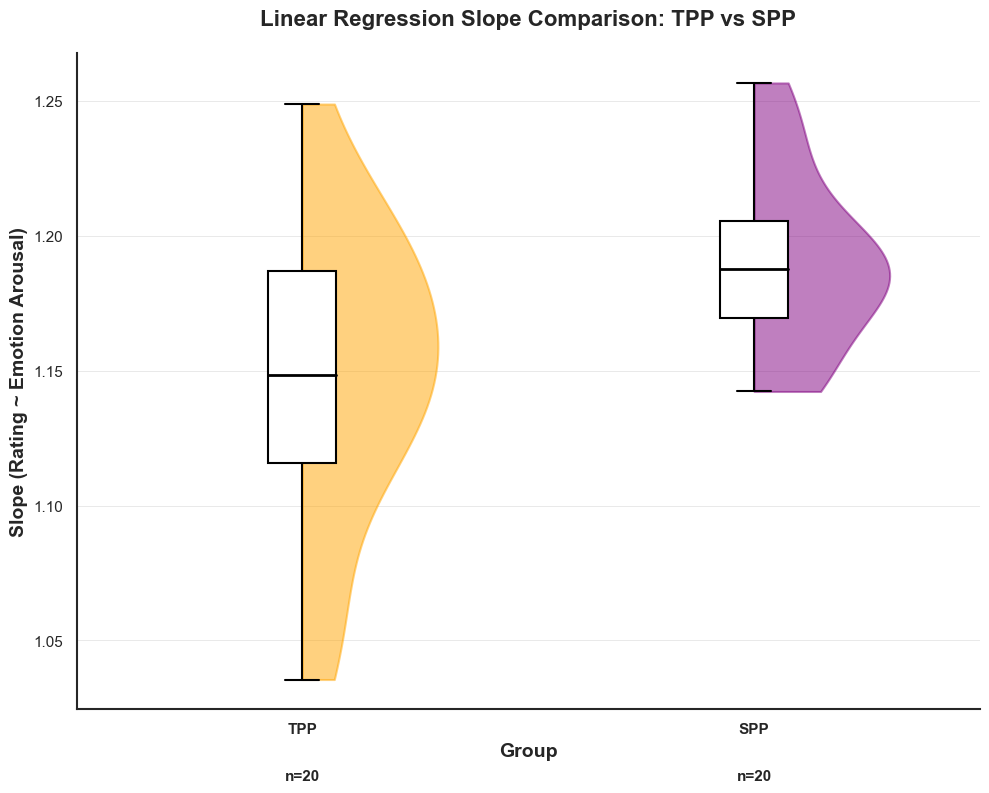


TPP组个体拟合示例:
  虚拟被试 TPP_Subject_16: 斜率 = 1.152, R² = 0.870, 数据点 = 47
  虚拟被试 TPP_Subject_9: 斜率 = 1.249, R² = 0.922, 数据点 = 46
  虚拟被试 TPP_Subject_17: 斜率 = 1.035, R² = 0.842, 数据点 = 63

SPP组个体拟合示例:
  虚拟被试 SPP_Subject_20: 斜率 = 1.190, R² = 0.891, 数据点 = 51
  虚拟被试 SPP_Subject_17: 斜率 = 1.257, R² = 0.914, 数据点 = 63
  虚拟被试 SPP_Subject_6: 斜率 = 1.142, R² = 0.888, 数据点 = 50

分析完成！
输出文件:
  - subject_slopes_data.csv: 所有虚拟被试的斜率数据
  - slope_comparison_statistics.csv: 组间比较统计结果
  - slope_comparison_TPP_vs_SPP.png: 斜率比较图


In [44]:
# --- 4. 执行主逻辑 ---
# 使用LLM数据替代原始数据
df_llm = pd.read_csv('./organized_data.csv')

print("成功读取LLM数据。")
print("-" * 30)

# 检查数据中的Role列
print("Role列的唯一值:", df_llm['Role'].unique())
print("-" * 30)

# 根据Role列拆分数据
tpp_data = df_llm[df_llm['Role'] == 'TPP']
spp_data = df_llm[df_llm['Role'] == 'SPP']

print(f"TPP组数据量: {len(tpp_data)}")
print(f"SPP组数据量: {len(spp_data)}")
print("-" * 30)

# 数据预处理 - 确保列名和格式正确
def prepare_llm_data(df):
    """准备LLM数据用于分析"""
    df_clean = df.copy()
    
    # 确保数据类型正确
    if 'Category' in df_clean.columns:
        df_clean['Category'] = pd.to_numeric(df_clean['Category'], errors='coerce')
    if 'Rating' in df_clean.columns:
        df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')
    if 'Delay_Info' in df_clean.columns:
        df_clean['Delay_Info'] = pd.to_numeric(df_clean['Delay_Info'], errors='coerce')
    if 'Emotion' in df_clean.columns:
        df_clean['Emotion'] = pd.to_numeric(df_clean['Emotion'], errors='coerce')
        # 重命名Emotion列为Emotion_Arousal以匹配原始代码
        df_clean = df_clean.rename(columns={'Emotion': 'Emotion_Arousal'})
    
    return df_clean

# 准备两组数据
tpp_prepared = prepare_llm_data(tpp_data)
spp_prepared = prepare_llm_data(spp_data)

print("数据预处理完成。")
print("-" * 30)

# 创建20个虚拟被试，模拟真实实验中的20个被试
def create_virtual_subjects(df, group_name, num_subjects=20):
    """
    为LLM数据创建虚拟被试分组
    将数据随机分配给20个虚拟被试，模拟真实实验设计
    """
    # 复制数据以避免修改原始数据
    df_copy = df.copy()
    
    # 为每个数据点随机分配一个虚拟被试ID
    np.random.seed(42)  # 设置随机种子以确保可重复性
    subject_ids = np.random.choice(range(1, num_subjects+1), size=len(df_copy))
    df_copy['Virtual_Subject_ID'] = [f"{group_name}_Subject_{sid}" for sid in subject_ids]
    
    # 按虚拟被试分组
    virtual_subjects = []
    for subject_id in df_copy['Virtual_Subject_ID'].unique():
        subject_data = df_copy[df_copy['Virtual_Subject_ID'] == subject_id].copy()
        
        virtual_subjects.append({
            'data': subject_data,
            'subject_id': subject_id
        })
    
    return virtual_subjects

# 创建虚拟被试
print("正在创建虚拟被试分组...")
tpp_virtual_subjects = create_virtual_subjects(tpp_prepared, "TPP")
spp_virtual_subjects = create_virtual_subjects(spp_prepared, "SPP")

print(f"TPP组创建了 {len(tpp_virtual_subjects)} 个虚拟被试")
print(f"SPP组创建了 {len(spp_virtual_subjects)} 个虚拟被试")

# 检查每个虚拟被试的数据量
print("\n虚拟被试数据量统计:")
tpp_data_counts = [len(subject['data']) for subject in tpp_virtual_subjects]
spp_data_counts = [len(subject['data']) for subject in spp_virtual_subjects]

print(f"TPP组 - 平均数据量: {np.mean(tpp_data_counts):.1f}, 范围: {min(tpp_data_counts)}-{max(tpp_data_counts)}")
print(f"SPP组 - 平均数据量: {np.mean(spp_data_counts):.1f}, 范围: {min(spp_data_counts)}-{max(spp_data_counts)}")
print("-" * 30)

# --- 计算每个虚拟被试的线性拟合斜率 ---
def calculate_slope_per_subject(virtual_subjects_list, group_name):
    """
    计算每个虚拟被试情绪唤醒度与惩罚评分的线性拟合斜率
    """
    slope_results = []
    
    for subject_info in virtual_subjects_list:
        subject_data = subject_info['data']
        
        # 确保数据包含所需的列
        if 'Emotion_Arousal' in subject_data.columns and 'Rating' in subject_data.columns:
            # 移除缺失值
            clean_data = subject_data.dropna(subset=['Emotion_Arousal', 'Rating'])
            
            if len(clean_data) >= 2:  # 至少需要2个点才能计算斜率
                try:
                    # 计算线性回归
                    slope, intercept, r_value, p_value, std_err = stats.linregress(
                        clean_data['Emotion_Arousal'], clean_data['Rating']
                    )
                    
                    slope_results.append({
                        'Subject_ID': subject_info['subject_id'],
                        'Group': group_name,
                        'Slope': slope,
                        'Intercept': intercept,
                        'R_squared': r_value**2,
                        'P_value': p_value,
                        'Data_Points': len(clean_data)
                    })
                except Exception as e:
                    print(f"警告: 无法计算{group_name}组虚拟被试 {subject_info['subject_id']} 的斜率: {e}")
            else:
                print(f"警告: {group_name}组虚拟被试 {subject_info['subject_id']} 数据点不足 ({len(clean_data)}个点)")
        else:
            print(f"警告: {group_name}组虚拟被试 {subject_info['subject_id']} 数据缺少必要列")
    
    return pd.DataFrame(slope_results)

# 计算TPP和SPP组的斜率
print("正在计算线性拟合斜率...")
tpp_slopes = calculate_slope_per_subject(tpp_virtual_subjects, "TPP")
spp_slopes = calculate_slope_per_subject(spp_virtual_subjects, "SPP")

print(f"TPP组成功计算 {len(tpp_slopes)} 个虚拟被试的斜率")
print(f"SPP组成功计算 {len(spp_slopes)} 个虚拟被试的斜率")
print("-" * 30)

# --- 合并数据用于可视化 ---
all_slopes = pd.concat([tpp_slopes, spp_slopes], ignore_index=True)

# 显示基本统计信息
print("斜率描述性统计:")
print("TPP组:")
print(f"  均值: {tpp_slopes['Slope'].mean():.3f}")
print(f"  标准差: {tpp_slopes['Slope'].std():.3f}")
print(f"  范围: {tpp_slopes['Slope'].min():.3f} 到 {tpp_slopes['Slope'].max():.3f}")

print("SPP组:")
print(f"  均值: {spp_slopes['Slope'].mean():.3f}")
print(f"  标准差: {spp_slopes['Slope'].std():.3f}")
print(f"  范围: {spp_slopes['Slope'].min():.3f} 到 {spp_slopes['Slope'].max():.3f}")
print("-" * 30)

# --- 显著性检验 ---
def perform_group_comparison(tpp_data, spp_data):
    """
    对TPP和SPP组的斜率进行显著性检验
    """
    print("\n" + "="*50)
    print("组间斜率比较显著性检验")
    print("="*50)
    
    # Mann-Whitney U检验
    statistic, p_value = stats.mannwhitneyu(
        tpp_data['Slope'], spp_data['Slope'], alternative='two-sided'
    )
    
    print(f"Mann-Whitney U检验:")
    print(f"  U统计量: {statistic:.3f}")
    print(f"  p值: {p_value:.4f}")
    
    # t检验（参数检验）
    t_stat, t_p = stats.ttest_ind(tpp_data['Slope'], spp_data['Slope'])
    print(f"独立样本t检验:")
    print(f"  t统计量: {t_stat:.3f}")
    print(f"  p值: {t_p:.4f}")
    
    # 效应量计算
    def cohens_d(x, y):
        nx = len(x)
        ny = len(y)
        dof = nx + ny - 2
        return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)
    
    d = cohens_d(tpp_data['Slope'], spp_data['Slope'])
    print(f"Cohen's d效应量: {d:.3f}")
    
    # 显著性标记
    if p_value < 0.001:
        sig_label = '***'
    elif p_value < 0.01:
        sig_label = '**'
    elif p_value < 0.05:
        sig_label = '*'
    else:
        sig_label = 'ns'
    
    print(f"显著性: {sig_label}")
    
    return {
        'mannwhitney_u': statistic,
        'mannwhitney_p': p_value,
        't_statistic': t_stat,
        't_p_value': t_p,
        'cohens_d': d,
        'significance': sig_label
    }

# 执行组间比较
comparison_results = perform_group_comparison(tpp_slopes, spp_slopes)

# --- 可视化函数 ---
def create_slope_comparison_plot(slope_df, save_path=None):
    """
    创建TPP和SPP组斜率比较图（箱线图+半小提琴图）
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 定义组别顺序和颜色
    group_order = ['TPP', 'SPP']
    colors = {
        'TPP': '#FFA500',  # 橙色
        'SPP': '#800080'   # 紫色
    }
    
    # 准备数据
    plot_data = slope_df.dropna(subset=['Slope', 'Group'])
    
    # 创建位置映射
    positions = [0, 1]
    
    # 获取两组数据
    tpp_data = plot_data[plot_data['Group'] == 'TPP']['Slope'].values
    spp_data = plot_data[plot_data['Group'] == 'SPP']['Slope'].values
    data_groups = [tpp_data, spp_data]
    
    # 绘制半小提琴图（只显示右侧，彩色）
    for idx, (pos, data, group) in enumerate(zip(positions, data_groups, group_order)):
        if len(data) > 0:
            # 计算KDE
            from scipy.stats import gaussian_kde
            try:
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 100)
                density = kde(x_range)
                
                # 归一化密度到合适的宽度
                density = density / density.max() * 0.3
                
                # 只绘制右侧，使用彩色
                ax.fill_betweenx(x_range, pos, pos + density, 
                                alpha=0.5, color=colors[group], 
                                edgecolor=colors[group], linewidth=1.5)
            except:
                pass
    
    # 绘制箱线图（黑白配色，更窄的箱体）
    bp = ax.boxplot(
        data_groups,
        positions=positions,
        widths=0.15,  # 箱体宽度
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color='black', linewidth=2),
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5)
    )
    
    # 设置箱线图填充
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor('white')
        box.set_linewidth(1.5)
    
    # 设置x轴
    ax.set_xticks(positions)
    ax.set_xticklabels(group_order, fontsize=12, fontweight='bold')
    
    # 设置y轴标签
    ax.set_ylabel('Slope (Rating ~ Emotion Arousal)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Group', fontsize=14, fontweight='bold')
    
    # 设置标题
    ax.set_title('Linear Regression Slope Comparison: TPP vs SPP',
                fontsize=16, fontweight='bold', pad=20)
    
    # 添加显著性标记
    y_max = max([np.max(data) for data in data_groups if len(data) > 0])
    y_min = min([np.min(data) for data in data_groups if len(data) > 0])
    y_range = y_max - y_min
    
    sig_y = y_max + 0.1 * y_range
    
    # 添加样本量信息
    for i, group in enumerate(group_order):
        n = len(plot_data[plot_data['Group'] == group])
        ax.text(positions[i], y_min - 0.15 * y_range, f'n={n}', 
               ha='center', va='top', fontsize=11, fontweight='bold')
    
    # 添加y轴网格线（仅水平方向）
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    ax.set_axisbelow(True)  # 将网格线放在图形元素下方
    
    # 去掉上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保留左边框和下边框，加粗
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 执行可视化 ---
print("\n" + "="*50)
print("生成斜率比较图")
print("="*50)

create_slope_comparison_plot(all_slopes, save_path="slope_comparison_TPP_vs_SPP.png")

# --- 保存结果 ---
# 保存斜率数据
all_slopes.to_csv("subject_slopes_data.csv", index=False)

# 保存统计结果
stats_df = pd.DataFrame([comparison_results])
stats_df.to_csv("slope_comparison_statistics.csv", index=False)

# 显示一些有代表性的个体拟合示例
def show_individual_examples(slopes_df, group_name, num_examples=3):
    """
    显示每个组几个有代表性的个体拟合示例
    """
    print(f"\n{group_name}组个体拟合示例:")
    
    group_slopes = slopes_df[slopes_df['Group'] == group_name]
    
    # 选择斜率最大、最小和接近平均值的示例
    mean_slope = group_slopes['Slope'].mean()
    
    # 最接近平均值的
    closest_to_mean = group_slopes.iloc[(group_slopes['Slope'] - mean_slope).abs().argsort()[:1]]
    # 斜率最大的
    max_slope = group_slopes.nlargest(1, 'Slope')
    # 斜率最小的
    min_slope = group_slopes.nsmallest(1, 'Slope')
    
    examples = pd.concat([closest_to_mean, max_slope, min_slope])
    
    for _, example in examples.iterrows():
        print(f"  虚拟被试 {example['Subject_ID']}: 斜率 = {example['Slope']:.3f}, "
              f"R² = {example['R_squared']:.3f}, 数据点 = {example['Data_Points']}")

show_individual_examples(all_slopes, "TPP")
show_individual_examples(all_slopes, "SPP")

print("\n" + "="*60)
print("分析完成！")
print("输出文件:")
print("  - subject_slopes_data.csv: 所有虚拟被试的斜率数据")
print("  - slope_comparison_statistics.csv: 组间比较统计结果")
print("  - slope_comparison_TPP_vs_SPP.png: 斜率比较图")
print("="*60)

成功读取 DeepSeek 数据，数据量: 2160
成功读取 Kimi 数据，数据量: 2160
成功读取 Qwen 数据，数据量: 2160

合并后的总数据量: 6480
成功读取所有LLM数据。
--------------------------------------------------
Role列的唯一值: ['SPP' 'TPP']
Model列的唯一值: ['DeepSeek' 'Kimi' 'Qwen']
--------------------------------------------------
TPP组总数据量: 3240
SPP组总数据量: 3240
DeepSeek: TPP=1080, SPP=1080
Kimi: TPP=1080, SPP=1080
Qwen: TPP=1080, SPP=1080
--------------------------------------------------
数据预处理完成。
--------------------------------------------------
TPP组总数据量: 3240
SPP组总数据量: 3240

TPP组分析

TPP组显著性检验结果

Misdemeanor:
  Delay: N=540, Mean=3.163, SD=1.911
  No Delay: N=540, Mean=3.159, SD=1.912
  Mann-Whitney U statistic=145862.000, p-value=0.9903
  显著性: ns

Felony:
  Delay: N=540, Mean=6.585, SD=1.767
  No Delay: N=540, Mean=6.565, SD=1.803
  Mann-Whitney U statistic=146200.500, p-value=0.9364
  显著性: ns

Capital:
  Delay: N=540, Mean=8.928, SD=0.259
  No Delay: N=540, Mean=8.922, SD=0.453
  Mann-Whitney U statistic=144469.500, p-value=0.5507
  显著性: ns
图片已保存

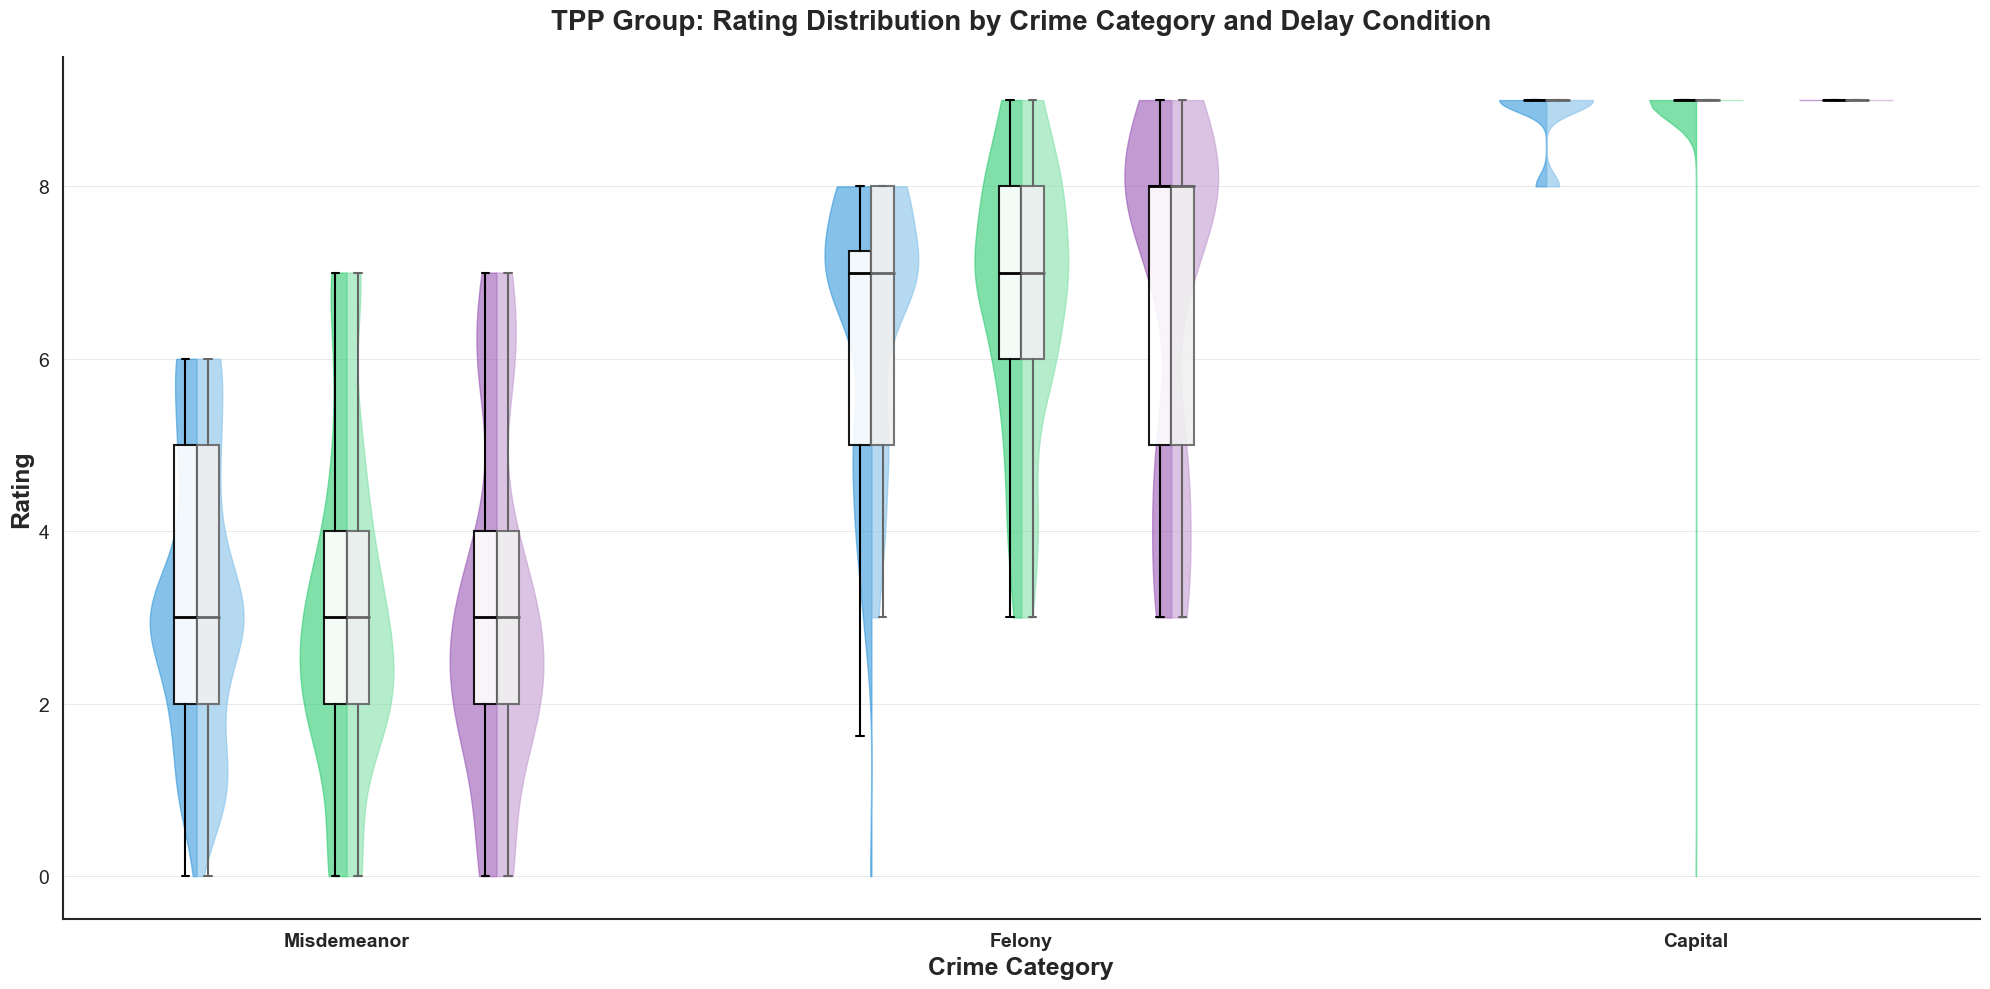


SPP组分析

SPP组显著性检验结果

Misdemeanor:
  Delay: N=540, Mean=3.491, SD=1.879
  No Delay: N=540, Mean=3.481, SD=1.892
  Mann-Whitney U statistic=146521.000, p-value=0.8860
  显著性: ns

Felony:
  Delay: N=540, Mean=6.824, SD=1.894
  No Delay: N=540, Mean=6.835, SD=1.843
  Mann-Whitney U statistic=146532.500, p-value=0.8834
  显著性: ns

Capital:
  Delay: N=540, Mean=8.935, SD=0.246
  No Delay: N=540, Mean=8.943, SD=0.233
  Mann-Whitney U statistic=144720.000, p-value=0.6117
  显著性: ns
图片已保存至: SPP_multi_llm_rating.png


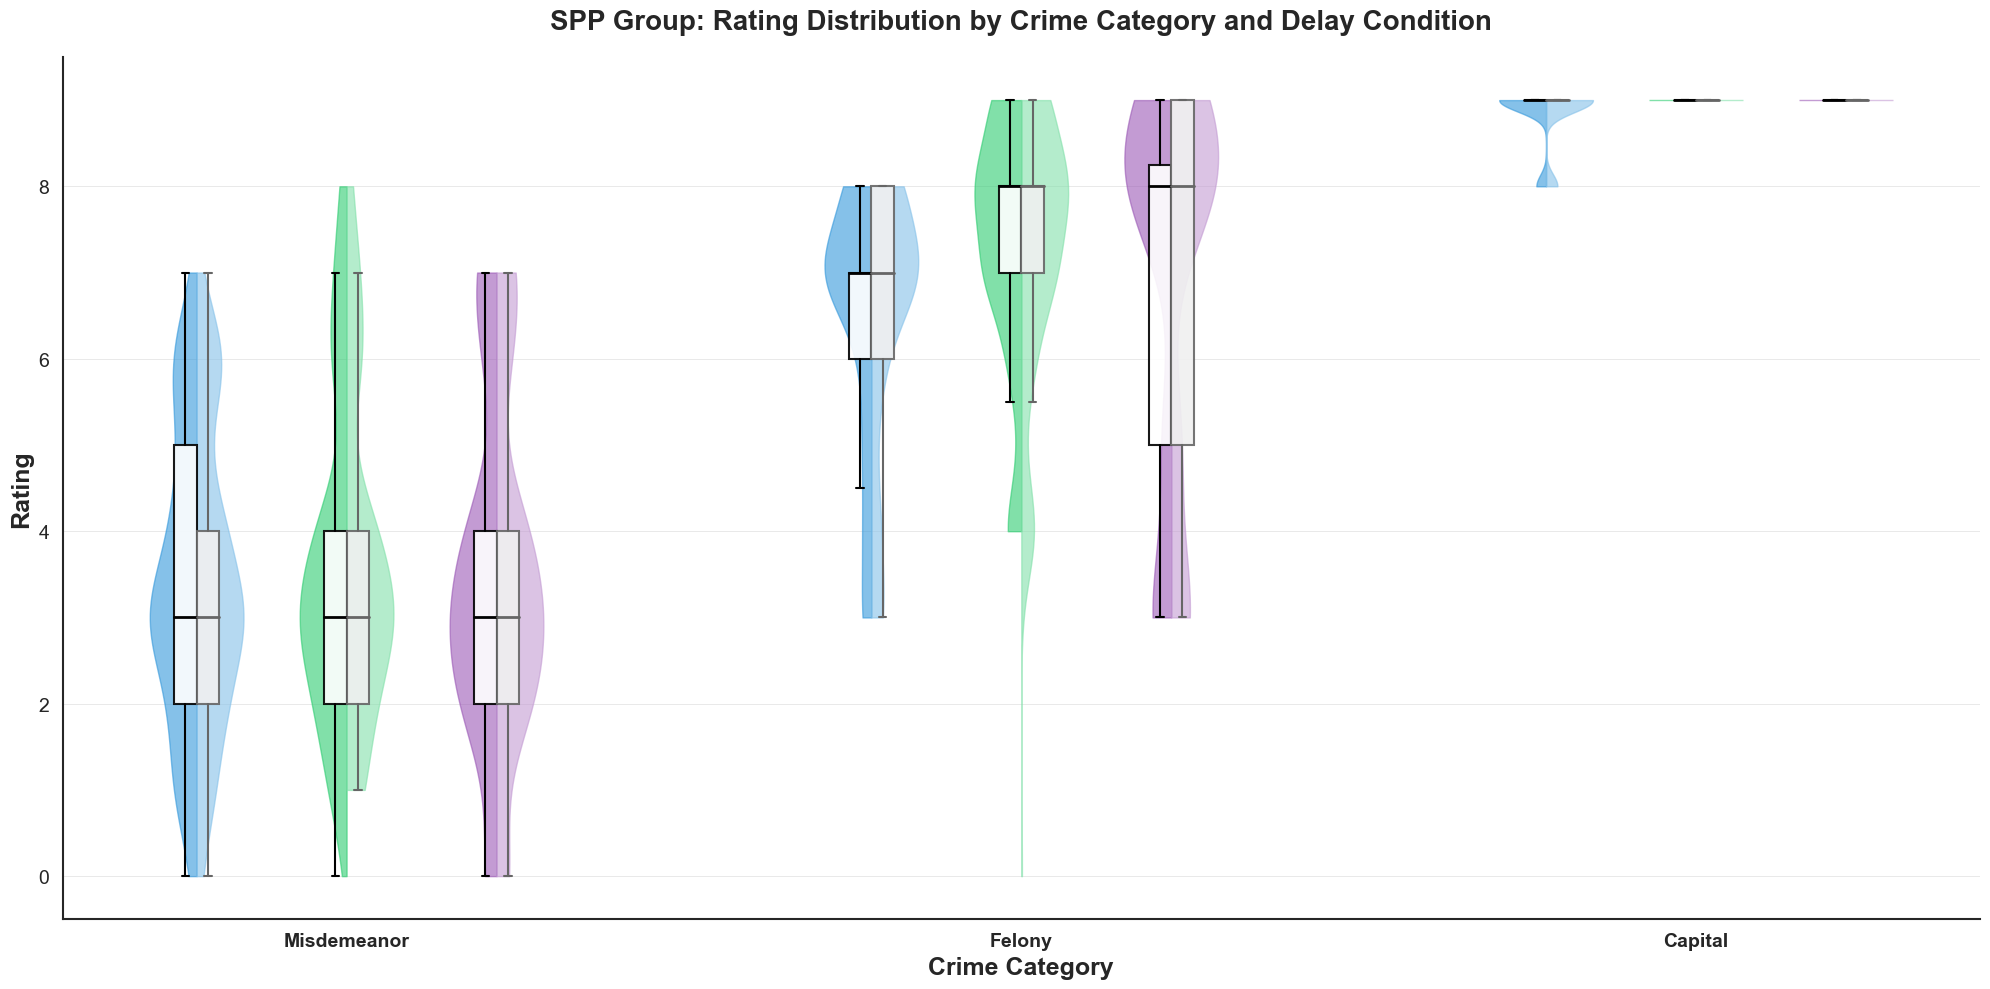


新增Delay vs No Delay差异分析

TPP组 - 每个犯罪类别内Delay vs No Delay差异检验

Misdemeanor:
  Delay: N=540, Mean=3.163, SD=1.911
  No Delay: N=540, Mean=3.159, SD=1.912
  Mann-Whitney U statistic=145862.000, p-value=0.9903
  显著性: ns

Felony:
  Delay: N=540, Mean=6.585, SD=1.767
  No Delay: N=540, Mean=6.565, SD=1.803
  Mann-Whitney U statistic=146200.500, p-value=0.9364
  显著性: ns

Capital:
  Delay: N=540, Mean=8.928, SD=0.259
  No Delay: N=540, Mean=8.922, SD=0.453
  Mann-Whitney U statistic=144469.500, p-value=0.5507
  显著性: ns

TPP组 - 每个模型内Delay vs No Delay差异检验

DeepSeek:
  Delay: N=540, Mean=6.165, SD=2.614
  No Delay: N=540, Mean=6.143, SD=2.618
  Mann-Whitney U statistic=146192.500, p-value=0.9382
  显著性: ns

Kimi:
  Delay: N=540, Mean=6.235, SD=2.843
  No Delay: N=540, Mean=6.233, SD=2.874
  Mann-Whitney U statistic=145752.000, p-value=0.9924
  显著性: ns

Qwen:
  Delay: N=540, Mean=6.276, SD=2.960
  No Delay: N=540, Mean=6.270, SD=2.969
  Mann-Whitney U statistic=145779.000, p-value=0.9967
  显著性: ns

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import gaussian_kde, kruskal
import os

# --- 1. 读取多个LLM数据文件 ---
# 定义要读取的LLM数据文件
llm_files = [
    './DeepSeek-V3-Fast_organized_data.csv',
    './Kimi-K2-0905_organized_data.csv', 
    './Qwen3-235B-A22B-Instruct-2507_organized_data.csv'
]

llm_names = ['DeepSeek', 'Kimi', 'Qwen']

# 读取并合并所有LLM数据
all_llm_data = []

for file_path, model_name in zip(llm_files, llm_names):
    if os.path.exists(file_path):
        df_temp = pd.read_csv(file_path)
        df_temp['Model'] = model_name  # 添加模型名称列
        all_llm_data.append(df_temp)
        print(f"成功读取 {model_name} 数据，数据量: {len(df_temp)}")
    else:
        print(f"警告: 文件 {file_path} 不存在")

# 合并所有数据
if all_llm_data:
    df_llm = pd.concat(all_llm_data, ignore_index=True)
    print(f"\n合并后的总数据量: {len(df_llm)}")
else:
    raise FileNotFoundError("没有找到任何数据文件")

print("成功读取所有LLM数据。")
print("-" * 50)

# 检查数据中的Role列
print("Role列的唯一值:", df_llm['Role'].unique())
print("Model列的唯一值:", df_llm['Model'].unique())
print("-" * 50)

# 根据Role列拆分数据
tpp_data = df_llm[df_llm['Role'] == 'TPP']
spp_data = df_llm[df_llm['Role'] == 'SPP']

print(f"TPP组总数据量: {len(tpp_data)}")
print(f"SPP组总数据量: {len(spp_data)}")

# 按模型统计
for model in llm_names:
    tpp_model = tpp_data[tpp_data['Model'] == model]
    spp_model = spp_data[spp_data['Model'] == model]
    print(f"{model}: TPP={len(tpp_model)}, SPP={len(spp_model)}")

print("-" * 50)

# --- 2. 数据预处理 ---
def prepare_llm_data(df):
    """准备LLM数据用于分析"""
    df_clean = df.copy()
    
    # 确保数据类型正确
    if 'Category' in df_clean.columns:
        df_clean['Category'] = pd.to_numeric(df_clean['Category'], errors='coerce')
    if 'Rating' in df_clean.columns:
        df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')
    if 'Delay_Info' in df_clean.columns:
        df_clean['Delay_Info'] = pd.to_numeric(df_clean['Delay_Info'], errors='coerce')
    
    return df_clean

# 准备两组数据
tpp_all_data = prepare_llm_data(tpp_data)
spp_all_data = prepare_llm_data(spp_data)

print("数据预处理完成。")
print("-" * 50)

# --- 3. 数据准备：添加分类标签 ---
def prepare_plot_data(df):
    """准备可视化数据，添加分类标签"""
    df = df.copy()
    
    category_map = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}
    df['Category_Label'] = df['Category'].map(category_map)
    
    df['Delay_Label'] = df['Delay_Info'].apply(lambda x: 'No Delay' if x == 0 else 'Delay')
    
    df['Combined_Label'] = df['Category_Label'] + '\n' + df['Delay_Label']
    
    return df

tpp_plot_data = prepare_plot_data(tpp_all_data)
spp_plot_data = prepare_plot_data(spp_all_data)

print(f"TPP组总数据量: {len(tpp_plot_data)}")
print(f"SPP组总数据量: {len(spp_plot_data)}")

# --- 4. 显著性检验函数 ---
def perform_significance_tests(df, group_name):
    """
    对每个Category内的Delay vs No Delay进行Mann-Whitney U检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组显著性检验结果")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        cat_data = df[df['Category_Label'] == cat]
        
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Rating'].dropna()
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Rating'].dropna()
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"\n{cat}:")
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Category': cat,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print(f"\n{cat}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 5. 修改后的可视化函数：只调整箱线图颜色，保持密度图颜色 ---
def create_multi_llm_half_plot(df, group_name, save_path=None):
    """
    创建多LLM数据的可视化图
    - No Delay: 左半密度图 + 左半箱线图（黑白配色）
    - Delay: 右半密度图 + 右半箱线图（灰黑配色）
    - 两个半密度图相邻接形成完整分布
    - 密度图保持原有颜色方案
    - 去掉模型标签和竖直网格线
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 增加图形宽度
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # 定义类别顺序和模型顺序
    category_order = ['Misdemeanor', 'Felony', 'Capital']
    model_order = llm_names  # ['DeepSeek', 'Kimi', 'Qwen']
    
    # 定义密度图颜色方案 - 保持原有的彩色方案
    base_colors = {
        'DeepSeek': '#3498db',  # 蓝色
        'Kimi': '#2ecc71',      # 绿色  
        'Qwen': '#9b59b6'       # 紫色
    }
    
    # 生成对应的浅色（用于Delay密度图）
    light_colors = {
        'DeepSeek': '#85c1e9',  # 浅蓝色
        'Kimi': '#82e0aa',      # 浅绿色
        'Qwen': '#c39bd3'       # 浅紫色
    }
    
    # 箱线图颜色方案 - 使用黑白和灰黑配色
    no_delay_box_color = 'black'  # No Delay箱线图使用黑色
    no_delay_box_face = 'white'   # No Delay箱线图填充白色
    delay_box_color = '#666666'   # Delay箱线图使用灰色
    delay_box_face = '#f0f0f0'    # Delay箱线图填充浅灰色
    
    # 准备数据
    plot_data = df.dropna(subset=['Rating', 'Category_Label', 'Delay_Label', 'Model'])
    
    # 创建位置映射 - 相邻接的布局
    positions = []
    position_info = []  # 存储位置对应的信息
    
    # 计算位置：每个类别内包含所有模型，每个模型内No Delay和Delay相邻接
    current_pos = 0
    category_centers = []
    
    for cat_idx, cat in enumerate(category_order):
        cat_start_pos = current_pos
        for model_idx, model in enumerate(model_order):
            # 每个模型在同一个位置，No Delay向左展开，Delay向右展开
            center_pos = current_pos
            
            # No Delay位置（中心位置向左偏移）
            positions.append(center_pos - 0.1)  # 轻微向左偏移，用于箱线图定位
            position_info.append({'category': cat, 'model': model, 'delay': 'No Delay', 'center': center_pos, 'offset': -1})
            
            # Delay位置（中心位置向右偏移）
            positions.append(center_pos + 0.1)  # 轻微向右偏移，用于箱线图定位
            position_info.append({'category': cat, 'model': model, 'delay': 'Delay', 'center': center_pos, 'offset': 1})
            
            current_pos += 0.8  # 模型间的间距
        
        category_centers.append((cat_start_pos + current_pos - 0.8) / 2)
        current_pos += 1.2  # 类别间的间距
    
    # 获取所有数据组
    data_groups = []
    for info in position_info:
        cat_data = plot_data[
            (plot_data['Category_Label'] == info['category']) & 
            (plot_data['Model'] == info['model']) & 
            (plot_data['Delay_Label'] == info['delay'])
        ]['Rating'].values
        data_groups.append(cat_data)
    
    # 首先绘制半密度图，确保它们相邻接 - 保持原有颜色方案
    for idx, (pos, data, info) in enumerate(zip(positions, data_groups, position_info)):
        if len(data) > 0:
            try:
                kde = gaussian_kde(data)
                y_range = np.linspace(data.min(), data.max(), 100)
                density = kde(y_range)
                
                # 归一化密度到合适的宽度
                max_density = density.max()
                if max_density > 0:
                    density = density / max_density * 0.25  # 控制密度图宽度
                
                center_pos = info['center']
                
                if info['delay'] == 'No Delay':
                    # No Delay: 左半密度图，从中心向左展开，使用模型对应的深色
                    color = base_colors[info['model']]
                    # 密度图从 (center_pos - density) 到 center_pos
                    ax.fill_betweenx(y_range, center_pos - density, center_pos, 
                                    alpha=0.6, color=color, 
                                    edgecolor=color, linewidth=1)
                else:
                    # Delay: 右半密度图，从中心向右展开，使用模型对应的浅色
                    color = light_colors[info['model']]
                    # 密度图从 center_pos 到 (center_pos + density)
                    ax.fill_betweenx(y_range, center_pos, center_pos + density, 
                                    alpha=0.6, color=color, 
                                    edgecolor=color, linewidth=1)
            except Exception as e:
                print(f"绘制密度图时出错: {e}")
                pass
    
    # 然后绘制半箱线图 - 使用新的黑白配色方案
    for idx, (data, info) in enumerate(zip(data_groups, position_info)):
        if len(data) > 0:
            # 计算箱线图统计量
            q1, median, q3 = np.percentile(data, [25, 50, 75])
            iqr = q3 - q1
            lower_whisker = np.maximum(data.min(), q1 - 1.5 * iqr)
            upper_whisker = np.minimum(data.max(), q3 + 1.5 * iqr)
            
            center_pos = info['center']
            box_width = 0.12  # 箱线图宽度
            
            if info['delay'] == 'No Delay':
                # No Delay: 左半箱线图，黑白配色
                color = no_delay_box_color
                face_color = no_delay_box_face  # 白色填充
                
                # 绘制箱体左半部分
                ax.add_patch(plt.Rectangle((center_pos - box_width, q1), box_width, q3 - q1,
                                         facecolor=face_color, alpha=0.9, edgecolor=color, linewidth=1.5))
                
                # 中位数线（左半）
                ax.plot([center_pos - box_width, center_pos], [median, median], color=color, linewidth=2)
                
                # 须线（左半）
                ax.plot([center_pos - box_width/2, center_pos - box_width/2], [lower_whisker, q1], 
                       color=color, linewidth=1.5, linestyle='-')
                ax.plot([center_pos - box_width/2, center_pos - box_width/2], [q3, upper_whisker], 
                       color=color, linewidth=1.5, linestyle='-')
                
                # 须线端点
                ax.plot([center_pos - box_width/2 - 0.02, center_pos - box_width/2 + 0.02], 
                       [lower_whisker, lower_whisker], color=color, linewidth=1.5)
                ax.plot([center_pos - box_width/2 - 0.02, center_pos - box_width/2 + 0.02], 
                       [upper_whisker, upper_whisker], color=color, linewidth=1.5)
                
            else:
                # Delay: 右半箱线图，灰黑配色
                color = delay_box_color
                face_color = delay_box_face  # 浅灰色填充
                
                # 绘制箱体右半部分
                ax.add_patch(plt.Rectangle((center_pos, q1), box_width, q3 - q1,
                                         facecolor=face_color, alpha=0.9, edgecolor=color, linewidth=1.5))
                
                # 中位数线（右半）
                ax.plot([center_pos, center_pos + box_width], [median, median], color=color, linewidth=2)
                
                # 须线（右半）
                ax.plot([center_pos + box_width/2, center_pos + box_width/2], [lower_whisker, q1], 
                       color=color, linewidth=1.5, linestyle='-')
                ax.plot([center_pos + box_width/2, center_pos + box_width/2], [q3, upper_whisker], 
                       color=color, linewidth=1.5, linestyle='-')
                
                # 须线端点
                ax.plot([center_pos + box_width/2 - 0.02, center_pos + box_width/2 + 0.02], 
                       [lower_whisker, lower_whisker], color=color, linewidth=1.5)
                ax.plot([center_pos + box_width/2 - 0.02, center_pos + box_width/2 + 0.02], 
                       [upper_whisker, upper_whisker], color=color, linewidth=1.5)
    
    # 设置x轴
    ax.set_xticks(category_centers)
    ax.set_xticklabels(category_order, fontsize=16, fontweight='bold')
    
    # 注释掉模型标签（不再显示DeepSeek, Kimi, Qwen）
    # y_min = ax.get_ylim()[0]
    # for cat_idx, cat in enumerate(category_order):
    #     cat_center = category_centers[cat_idx]
    #     for model_idx, model in enumerate(model_order):
    #         model_pos = cat_center - 0.8 + model_idx * 0.8
    #         ax.text(model_pos, y_min - 0.4, model, 
    #                ha='center', va='top', fontsize=10, fontweight='bold',
    #                color=base_colors[model])
    
    # 注释掉图例说明
    # ax.text(0.02, 0.98, 'No Delay ←    → Delay', 
    #        transform=ax.transAxes, fontsize=12, fontweight='bold',
    #        va='top', ha='left', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))
    
    # 在中心位置添加细线，标示No Delay和Delay的分界
    # for cat_idx, cat in enumerate(category_order):
    #     cat_center = category_centers[cat_idx]
    #     for model_idx, model in enumerate(model_order):
    #         center_pos = cat_center - 0.8 + model_idx * 0.8
    #         ax.axvline(x=center_pos, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)
    
    # 设置y轴
    ax.set_yticks([0, 2, 4, 6, 8])
    ax.set_ylim(-0.5, 9.5)  # 调整y轴范围
    
    # 只添加水平网格线，去掉竖直网格线
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
    # ax.xaxis.grid(False)  # 关闭x轴网格线
    
    ax.set_axisbelow(True)
    
    # 设置轴标签
    ax.set_ylabel('Rating', fontsize=18, fontweight='bold')
    ax.set_xlabel('Crime Category', fontsize=18, fontweight='bold')
    
    # 设置标题
    ax.set_title(f'{group_name} Group: Rating Distribution by Crime Category and Delay Condition',
                fontsize=20, fontweight='bold', pad=20)
    
    # 美化边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=14, width=1.5, length=6)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 6. 模型间显著性检验函数 ---
def perform_model_comparison_tests(df, group_name):
    """
    对每个犯罪类别和延迟条件下的三个模型进行Kruskal-Wallis检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 模型间差异检验 (Kruskal-Wallis检验)")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    for cat in categories:
        for delay in delay_conditions:
            print(f"\n{cat} - {delay}:")
            
            # 收集三个模型的数据
            model_data = []
            model_names = []
            
            for model in llm_names:
                model_ratings = df[
                    (df['Category_Label'] == cat) & 
                    (df['Delay_Label'] == delay) &
                    (df['Model'] == model)
                ]['Rating'].dropna()
                
                if len(model_ratings) > 0:
                    model_data.append(model_ratings)
                    model_names.append(model)
                    
                    print(f"  {model}: N={len(model_ratings)}, Mean={model_ratings.mean():.3f}, SD={model_ratings.std():.3f}")
            
            # 如果有至少两个模型有数据，进行Kruskal-Wallis检验
            if len(model_data) >= 2:
                try:
                    # 执行Kruskal-Wallis检验
                    h_statistic, p_value = kruskal(*model_data)
                    
                    print(f"  Kruskal-Wallis H statistic={h_statistic:.3f}, p-value={p_value:.4f}")
                    
                    if p_value < 0.001:
                        sig_label = '***'
                    elif p_value < 0.01:
                        sig_label = '**'
                    elif p_value < 0.05:
                        sig_label = '*'
                    else:
                        sig_label = 'ns'
                    
                    print(f"  模型间显著性: {sig_label}")
                    
                    # 如果总体显著，进行两两比较
                    if p_value < 0.05 and len(model_data) == 3:
                        print("  进行两两比较 (Mann-Whitney U检验):")
                        from itertools import combinations
                        
                        for (i, j) in combinations(range(3), 2):
                            model1 = model_names[i]
                            model2 = model_names[j]
                            u_stat, p_val = stats.mannwhitneyu(model_data[i], model_data[j], alternative='two-sided')
                            
                            if p_val < 0.001:
                                pair_sig = '***'
                            elif p_val < 0.01:
                                pair_sig = '**'
                            elif p_val < 0.05:
                                pair_sig = '*'
                            else:
                                pair_sig = 'ns'
                                
                            print(f"    {model1} vs {model2}: p={p_val:.4f} {pair_sig}")
                    
                    results.append({
                        'Group': group_name,
                        'Category': cat,
                        'Delay_Condition': delay,
                        'H_statistic': h_statistic,
                        'p_value': p_value,
                        'significance': sig_label,
                        'Model1': model_names[0] if len(model_names) > 0 else '',
                        'Model1_N': len(model_data[0]) if len(model_data) > 0 else 0,
                        'Model1_Mean': model_data[0].mean() if len(model_data) > 0 else 0,
                        'Model2': model_names[1] if len(model_names) > 1 else '',
                        'Model2_N': len(model_data[1]) if len(model_data) > 1 else 0,
                        'Model2_Mean': model_data[1].mean() if len(model_data) > 1 else 0,
                        'Model3': model_names[2] if len(model_names) > 2 else '',
                        'Model3_N': len(model_data[2]) if len(model_data) > 2 else 0,
                        'Model3_Mean': model_data[2].mean() if len(model_data) > 2 else 0,
                    })
                    
                except Exception as e:
                    print(f"  检验出错: {e}")
            else:
                print("  数据不足，无法进行模型间比较")
    
    return pd.DataFrame(results)

# --- 7. 新增：计算每个犯罪类别内Delay vs No Delay的差异 ---
def perform_delay_vs_no_delay_by_category(df, group_name):
    """
    对每个犯罪类别，计算Delay vs No Delay的差异
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 每个犯罪类别内Delay vs No Delay差异检验")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        print(f"\n{cat}:")
        
        # 获取该类别下的所有数据
        cat_data = df[df['Category_Label'] == cat]
        
        # 分离Delay和No Delay数据
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Rating'].dropna()
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Rating'].dropna()
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            # 执行Mann-Whitney U检验
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Group': group_name,
                'Category': cat,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print("  数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 8. 新增：计算三个大模型之间Delay和No Delay的差异 ---
def perform_delay_vs_no_delay_by_model(df, group_name):
    """
    对每个模型，计算Delay vs No Delay的差异
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 每个模型内Delay vs No Delay差异检验")
    print(f"{'='*60}")
    
    results = []
    
    for model in llm_names:
        print(f"\n{model}:")
        
        # 获取该模型下的所有数据
        model_data = df[df['Model'] == model]
        
        # 分离Delay和No Delay数据
        delay_data = model_data[model_data['Delay_Label'] == 'Delay']['Rating'].dropna()
        no_delay_data = model_data[model_data['Delay_Label'] == 'No Delay']['Rating'].dropna()
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            # 执行Mann-Whitney U检验
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Group': group_name,
                'Model': model,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print("  数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 9. 执行可视化和统计检验 ---

# TPP组
print("\n" + "="*60)
print("TPP组分析")
print("="*60)
tpp_results = perform_significance_tests(tpp_plot_data, "TPP")
create_multi_llm_half_plot(tpp_plot_data, "TPP", save_path="TPP_multi_llm_rating.png")

# SPP组
print("\n" + "="*60)
print("SPP组分析")
print("="*60)
spp_results = perform_significance_tests(spp_plot_data, "SPP")
create_multi_llm_half_plot(spp_plot_data, "SPP", save_path="SPP_multi_llm_rating.png")

# --- 10. 执行新增的Delay vs No Delay检验 ---
print("\n" + "="*60)
print("新增Delay vs No Delay差异分析")
print("="*60)

# TPP组
tpp_delay_by_category = perform_delay_vs_no_delay_by_category(tpp_plot_data, "TPP")
tpp_delay_by_model = perform_delay_vs_no_delay_by_model(tpp_plot_data, "TPP")

# SPP组
spp_delay_by_category = perform_delay_vs_no_delay_by_category(spp_plot_data, "SPP")
spp_delay_by_model = perform_delay_vs_no_delay_by_model(spp_plot_data, "SPP")

# --- 11. 执行模型间比较检验 ---
print("\n" + "="*60)
print("模型间差异分析")
print("="*60)

tpp_model_comparison = perform_model_comparison_tests(tpp_plot_data, "TPP")
spp_model_comparison = perform_model_comparison_tests(spp_plot_data, "SPP")

# --- 12. 按模型分别进行统计检验 ---
def perform_significance_tests_by_model(df, group_name):
    """对每个模型分别进行显著性检验"""
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 按模型显著性检验结果")
    print(f"{'='*60}")
    
    all_results = []
    
    for model in llm_names:
        print(f"\n--- {model} ---")
        model_data = df[df['Model'] == model]
        model_results = perform_significance_tests(model_data, f"{group_name}-{model}")
        model_results['Model'] = model
        all_results.append(model_results)
    
    return pd.concat(all_results, ignore_index=True)

# 执行按模型的统计检验
tpp_model_results = perform_significance_tests_by_model(tpp_plot_data, "TPP")
spp_model_results = perform_significance_tests_by_model(spp_plot_data, "SPP")

# --- 13. 组间比较分析 ---
def perform_group_comparison_by_category_and_model(tpp_df, spp_df):
    """
    对每个犯罪类别、延迟条件和模型进行TPP和SPP组间差异分析
    """
    print("\n" + "="*60)
    print("TPP vs SPP 组间差异分析（按模型）")
    print("="*60)
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    for model in llm_names:
        print(f"\n--- {model} ---")
        for cat in categories:
            for delay in delay_conditions:
                # 获取TPP组数据
                tpp_data = tpp_df[
                    (tpp_df['Category_Label'] == cat) & 
                    (tpp_df['Delay_Label'] == delay) &
                    (tpp_df['Model'] == model)
                ]['Rating'].dropna()
                
                # 获取SPP组数据
                spp_data = spp_df[
                    (spp_df['Category_Label'] == cat) & 
                    (spp_df['Delay_Label'] == delay) &
                    (spp_df['Model'] == model)
                ]['Rating'].dropna()
                
                if len(tpp_data) > 0 and len(spp_data) > 0:
                    # 执行Mann-Whitney U检验
                    statistic, p_value = stats.mannwhitneyu(tpp_data, spp_data, alternative='two-sided')
                    
                    tpp_mean = tpp_data.mean()
                    tpp_std = tpp_data.std()
                    spp_mean = spp_data.mean()
                    spp_std = spp_data.std()
                    
                    print(f"  {cat} - {delay}:")
                    print(f"    TPP: N={len(tpp_data)}, Mean={tpp_mean:.3f}, SD={tpp_std:.3f}")
                    print(f"    SPP: N={len(spp_data)}, Mean={spp_mean:.3f}, SD={spp_std:.3f}")
                    print(f"    Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
                    
                    if p_value < 0.001:
                        sig_label = '***'
                    elif p_value < 0.01:
                        sig_label = '**'
                    elif p_value < 0.05:
                        sig_label = '*'
                    else:
                        sig_label = 'ns'
                    
                    print(f"    显著性: {sig_label}")
                    
                    results.append({
                        'Model': model,
                        'Category': cat,
                        'Delay_Condition': delay,
                        'TPP_N': len(tpp_data),
                        'TPP_Mean': tpp_mean,
                        'TPP_SD': tpp_std,
                        'SPP_N': len(spp_data),
                        'SPP_Mean': spp_mean,
                        'SPP_SD': spp_std,
                        'U_statistic': statistic,
                        'p_value': p_value,
                        'significance': sig_label
                    })
                else:
                    print(f"  {cat} - {delay}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# 执行组间比较分析
group_comparison_results = perform_group_comparison_by_category_and_model(tpp_plot_data, spp_plot_data)

# --- 14. 保存所有结果 ---
tpp_results.to_csv("TPP_rating_results.csv", index=False)
spp_results.to_csv("SPP_rating_results.csv", index=False)
tpp_model_results.to_csv("TPP_model_rating_results.csv", index=False)
spp_model_results.to_csv("SPP_model_rating_results.csv", index=False)
group_comparison_results.to_csv("TPP_vs_SPP_comparison_results.csv", index=False)
tpp_model_comparison.to_csv("TPP_model_comparison_results.csv", index=False)
spp_model_comparison.to_csv("SPP_model_comparison_results.csv", index=False)
tpp_delay_by_category.to_csv("TPP_delay_by_category_results.csv", index=False)
tpp_delay_by_model.to_csv("TPP_delay_by_model_results.csv", index=False)
spp_delay_by_category.to_csv("SPP_delay_by_category_results.csv", index=False)
spp_delay_by_model.to_csv("SPP_delay_by_model_results.csv", index=False)

print("\n" + "="*60)
print("分析完成！所有结果已保存为CSV文件。")
print("="*60)

# --- 15. 数据汇总统计 ---
print("\n数据汇总统计:")
print("="*40)
for model in llm_names:
    for role in ['TPP', 'SPP']:
        role_data = df_llm[(df_llm['Model'] == model) & (df_llm['Role'] == role)]
        print(f"{model} - {role}: {len(role_data)} 条数据")
        
        for cat in [1, 2, 3]:
            for delay in [0, 1]:
                cat_data = role_data[(role_data['Category'] == cat) & (role_data['Delay_Info'] == delay)]
                cat_label = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}[cat]
                delay_label = 'No Delay' if delay == 0 else 'Delay'
                print(f"  {cat_label} - {delay_label}: {len(cat_data)}")

成功读取 DeepSeek 数据，数据量: 2160
成功读取 Kimi 数据，数据量: 2160
成功读取 Qwen 数据，数据量: 2160

合并后的总数据量: 6480
成功读取所有LLM数据。
--------------------------------------------------
Role列的唯一值: ['SPP' 'TPP']
Model列的唯一值: ['DeepSeek' 'Kimi' 'Qwen']
--------------------------------------------------
TPP组总数据量: 3240
SPP组总数据量: 3240
DeepSeek: TPP=1080, SPP=1080
Kimi: TPP=1080, SPP=1080
Qwen: TPP=1080, SPP=1080
--------------------------------------------------
数据预处理完成。
--------------------------------------------------
TPP组总数据量: 3240
SPP组总数据量: 3240

TPP组分析

TPP组显著性检验结果

Misdemeanor:
  Delay: N=540, Mean=3.163, SD=1.911
  No Delay: N=540, Mean=3.159, SD=1.912
  Mann-Whitney U statistic=145862.000, p-value=0.9903
  显著性: ns

Felony:
  Delay: N=540, Mean=6.585, SD=1.767
  No Delay: N=540, Mean=6.565, SD=1.803
  Mann-Whitney U statistic=146200.500, p-value=0.9364
  显著性: ns

Capital:
  Delay: N=540, Mean=8.928, SD=0.259
  No Delay: N=540, Mean=8.922, SD=0.453
  Mann-Whitney U statistic=144469.500, p-value=0.5507
  显著性: ns
图片已保存

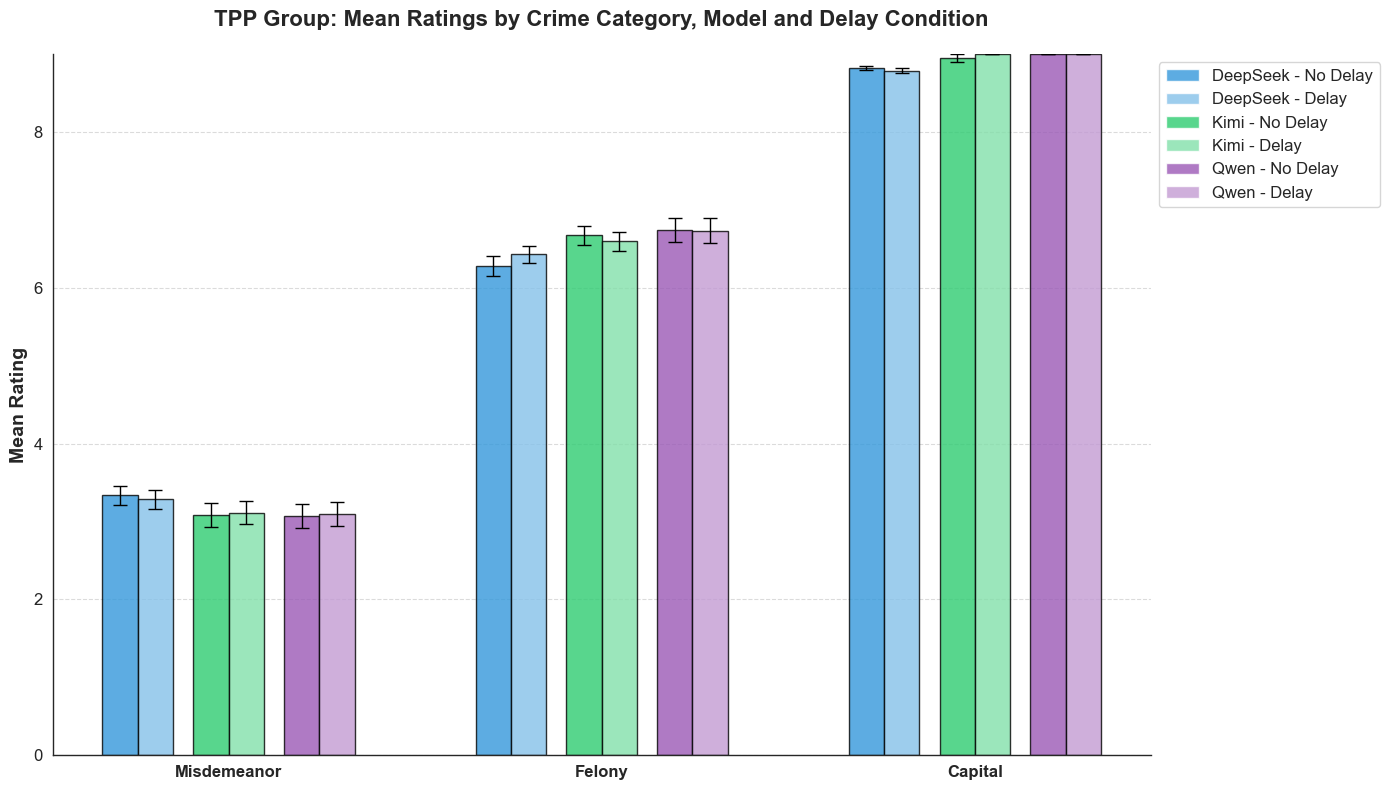


SPP组分析

SPP组显著性检验结果

Misdemeanor:
  Delay: N=540, Mean=3.491, SD=1.879
  No Delay: N=540, Mean=3.481, SD=1.892
  Mann-Whitney U statistic=146521.000, p-value=0.8860
  显著性: ns

Felony:
  Delay: N=540, Mean=6.824, SD=1.894
  No Delay: N=540, Mean=6.835, SD=1.843
  Mann-Whitney U statistic=146532.500, p-value=0.8834
  显著性: ns

Capital:
  Delay: N=540, Mean=8.935, SD=0.246
  No Delay: N=540, Mean=8.943, SD=0.233
  Mann-Whitney U statistic=144720.000, p-value=0.6117
  显著性: ns
图片已保存至: SPP_multi_llm_rating_bar.png


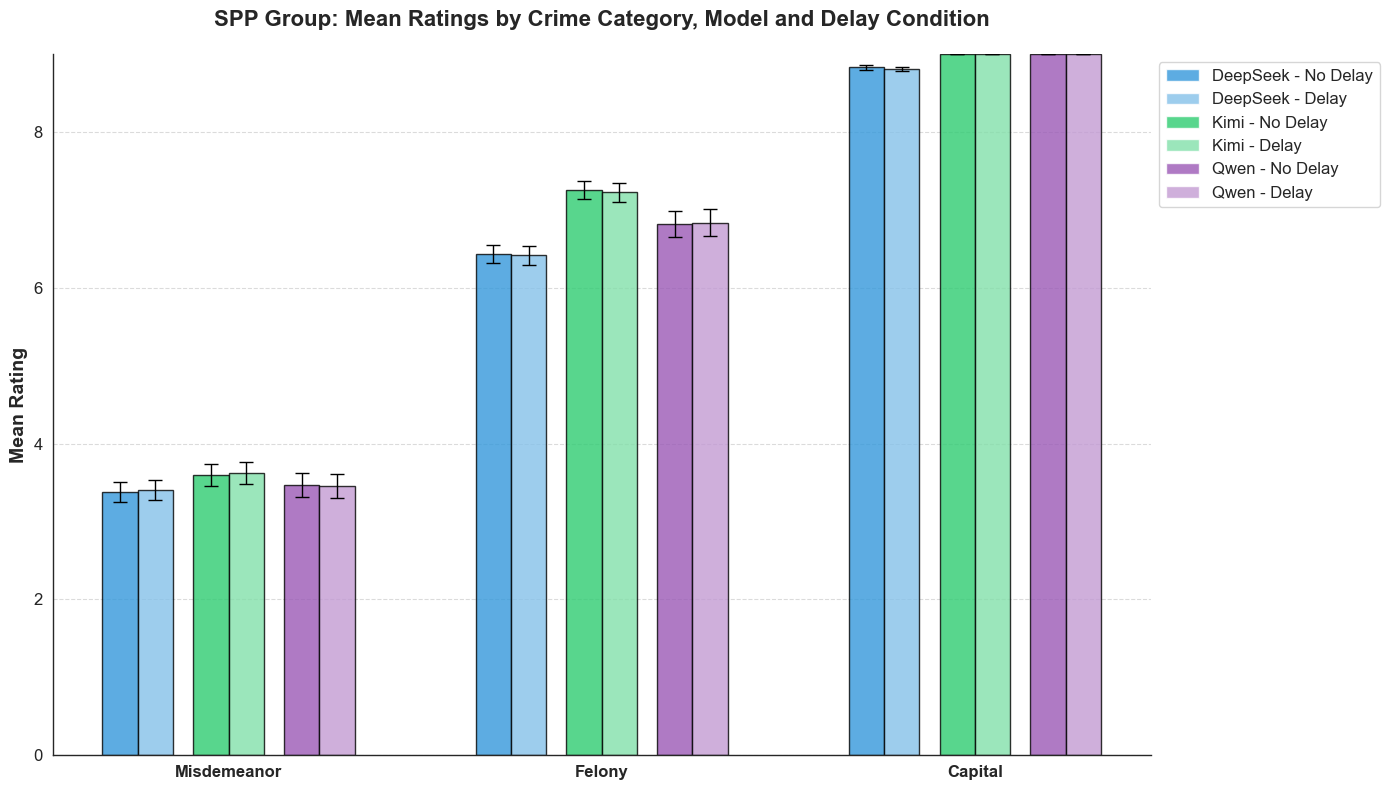


新增Delay vs No Delay差异分析

TPP组 - 每个犯罪类别内Delay vs No Delay差异检验

Misdemeanor:
  Delay: N=540, Mean=3.163, SD=1.911
  No Delay: N=540, Mean=3.159, SD=1.912
  Mann-Whitney U statistic=145862.000, p-value=0.9903
  显著性: ns

Felony:
  Delay: N=540, Mean=6.585, SD=1.767
  No Delay: N=540, Mean=6.565, SD=1.803
  Mann-Whitney U statistic=146200.500, p-value=0.9364
  显著性: ns

Capital:
  Delay: N=540, Mean=8.928, SD=0.259
  No Delay: N=540, Mean=8.922, SD=0.453
  Mann-Whitney U statistic=144469.500, p-value=0.5507
  显著性: ns

TPP组 - 每个模型内Delay vs No Delay差异检验

DeepSeek:
  Delay: N=540, Mean=6.165, SD=2.614
  No Delay: N=540, Mean=6.143, SD=2.618
  Mann-Whitney U statistic=146192.500, p-value=0.9382
  显著性: ns

Kimi:
  Delay: N=540, Mean=6.235, SD=2.843
  No Delay: N=540, Mean=6.233, SD=2.874
  Mann-Whitney U statistic=145752.000, p-value=0.9924
  显著性: ns

Qwen:
  Delay: N=540, Mean=6.276, SD=2.960
  No Delay: N=540, Mean=6.270, SD=2.969
  Mann-Whitney U statistic=145779.000, p-value=0.9967
  显著性: ns

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kruskal
import os

# --- 1. 读取多个LLM数据文件 ---
# 定义要读取的LLM数据文件
llm_files = [
    './DeepSeek-V3-Fast_organized_data.csv',
    './Kimi-K2-0905_organized_data.csv', 
    './Qwen3-235B-A22B-Instruct-2507_organized_data.csv'
]

llm_names = ['DeepSeek', 'Kimi', 'Qwen']

# 读取并合并所有LLM数据
all_llm_data = []

for file_path, model_name in zip(llm_files, llm_names):
    if os.path.exists(file_path):
        df_temp = pd.read_csv(file_path)
        df_temp['Model'] = model_name  # 添加模型名称列
        all_llm_data.append(df_temp)
        print(f"成功读取 {model_name} 数据，数据量: {len(df_temp)}")
    else:
        print(f"警告: 文件 {file_path} 不存在")

# 合并所有数据
if all_llm_data:
    df_llm = pd.concat(all_llm_data, ignore_index=True)
    print(f"\n合并后的总数据量: {len(df_llm)}")
else:
    raise FileNotFoundError("没有找到任何数据文件")

print("成功读取所有LLM数据。")
print("-" * 50)

# 检查数据中的Role列
print("Role列的唯一值:", df_llm['Role'].unique())
print("Model列的唯一值:", df_llm['Model'].unique())
print("-" * 50)

# 根据Role列拆分数据
tpp_data = df_llm[df_llm['Role'] == 'TPP']
spp_data = df_llm[df_llm['Role'] == 'SPP']

print(f"TPP组总数据量: {len(tpp_data)}")
print(f"SPP组总数据量: {len(spp_data)}")

# 按模型统计
for model in llm_names:
    tpp_model = tpp_data[tpp_data['Model'] == model]
    spp_model = spp_data[spp_data['Model'] == model]
    print(f"{model}: TPP={len(tpp_model)}, SPP={len(spp_model)}")

print("-" * 50)

# --- 2. 数据预处理 ---
def prepare_llm_data(df):
    """准备LLM数据用于分析"""
    df_clean = df.copy()
    
    # 确保数据类型正确
    if 'Category' in df_clean.columns:
        df_clean['Category'] = pd.to_numeric(df_clean['Category'], errors='coerce')
    if 'Rating' in df_clean.columns:
        df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')
    if 'Delay_Info' in df_clean.columns:
        df_clean['Delay_Info'] = pd.to_numeric(df_clean['Delay_Info'], errors='coerce')
    
    return df_clean

# 准备两组数据
tpp_all_data = prepare_llm_data(tpp_data)
spp_all_data = prepare_llm_data(spp_data)

print("数据预处理完成。")
print("-" * 50)

# --- 3. 数据准备：添加分类标签 ---
def prepare_plot_data(df):
    """准备可视化数据，添加分类标签"""
    df = df.copy()
    
    category_map = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}
    df['Category_Label'] = df['Category'].map(category_map)
    
    df['Delay_Label'] = df['Delay_Info'].apply(lambda x: 'No Delay' if x == 0 else 'Delay')
    
    df['Combined_Label'] = df['Category_Label'] + '\n' + df['Delay_Label']
    
    return df

tpp_plot_data = prepare_plot_data(tpp_all_data)
spp_plot_data = prepare_plot_data(spp_all_data)

print(f"TPP组总数据量: {len(tpp_plot_data)}")
print(f"SPP组总数据量: {len(spp_plot_data)}")

# --- 4. 显著性检验函数 ---
def perform_significance_tests(df, group_name):
    """
    对每个Category内的Delay vs No Delay进行Mann-Whitney U检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组显著性检验结果")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        cat_data = df[df['Category_Label'] == cat]
        
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Rating'].dropna()
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Rating'].dropna()
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"\n{cat}:")
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Category': cat,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print(f"\n{cat}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 5. 修改后的可视化函数：使用柱状图 ---
def create_multi_llm_bar_plot(df, group_name, save_path=None):
    """
    创建多LLM数据的柱状图可视化
    - 每个犯罪类别内显示三个模型
    - 每个模型内显示Delay和No Delay的均值
    - 添加误差线和显著性标记
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建图形
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # 定义类别顺序和模型顺序
    category_order = ['Misdemeanor', 'Felony', 'Capital']
    model_order = llm_names
    
    # 定义颜色方案
    colors = {
        'DeepSeek': {'No Delay': '#3498db', 'Delay': '#85c1e9'},  # 蓝色系
        'Kimi': {'No Delay': '#2ecc71', 'Delay': '#82e0aa'},      # 绿色系
        'Qwen': {'No Delay': '#9b59b6', 'Delay': '#c39bd3'}       # 紫色系
    }
    
    # 准备数据：计算每个组的均值和标准差
    plot_data = df.dropna(subset=['Rating', 'Category_Label', 'Delay_Label', 'Model'])
    
    # 计算统计量
    summary_stats = plot_data.groupby(['Category_Label', 'Model', 'Delay_Label'])['Rating'].agg([
        'mean', 'std', 'count'
    ]).reset_index()
    
    # 计算标准误差
    summary_stats['se'] = summary_stats['std'] / np.sqrt(summary_stats['count'])
    
    # 设置柱状图位置
    bar_width = 0.35
    gap_between_models = 0.2
    gap_between_categories = 1.0
    
    # 计算每个类别内的位置
    positions = {}
    current_pos = 0
    
    for cat_idx, cat in enumerate(category_order):
        positions[cat] = {}
        for model_idx, model in enumerate(model_order):
            # 每个模型在类别内的位置
            base_pos = current_pos + model_idx * (2 * bar_width + gap_between_models)
            positions[cat][model] = {
                'No Delay': base_pos,
                'Delay': base_pos + bar_width
            }
        current_pos += len(model_order) * (2 * bar_width + gap_between_models) + gap_between_categories
    
    # 绘制柱状图
    for cat in category_order:
        for model in model_order:
            for delay_cond in ['No Delay', 'Delay']:
                # 获取数据
                stats_row = summary_stats[
                    (summary_stats['Category_Label'] == cat) & 
                    (summary_stats['Model'] == model) & 
                    (summary_stats['Delay_Label'] == delay_cond)
                ]
                
                if len(stats_row) > 0:
                    mean_val = stats_row['mean'].values[0]
                    se_val = stats_row['se'].values[0]
                    pos = positions[cat][model][delay_cond]
                    
                    # 绘制柱状图
                    ax.bar(pos, mean_val, bar_width, 
                          color=colors[model][delay_cond],
                          alpha=0.8,
                          edgecolor='black',
                          linewidth=1,
                          label=f'{model} - {delay_cond}' if cat == category_order[0] and model == model_order[0] else "")
                    
                    # 添加误差线
                    ax.errorbar(pos, mean_val, yerr=se_val, 
                               fmt='none', color='black', capsize=5, capthick=1, linewidth=1)
    
    # 添加显著性标记（基于之前的检验结果）
    # 这里可以添加代码来在柱状图上显示显著性标记
    
    # 设置x轴标签和刻度
    category_centers = []
    for cat in category_order:
        model_positions = [positions[cat][model]['No Delay'] + bar_width/2 for model in model_order]
        category_center = np.mean(model_positions)
        category_centers.append(category_center)
    
    ax.set_xticks(category_centers)
    ax.set_xticklabels(category_order, fontsize=14, fontweight='bold')
    
    # 设置y轴
    ax.set_ylabel('Mean Rating', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 9)
    ax.set_yticks([0, 2, 4, 6, 8])

    
    # 添加网格线
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    
    # 设置标题
    ax.set_title(f'{group_name} Group: Mean Ratings by Crime Category, Model and Delay Condition',
                fontsize=16, fontweight='bold', pad=20)
    
    # 创建图例
    from matplotlib.patches import Patch
    legend_elements = []
    for model in model_order:
        legend_elements.append(Patch(facecolor=colors[model]['No Delay'], alpha=0.8, 
                                   label=f'{model} - No Delay'))
        legend_elements.append(Patch(facecolor=colors[model]['Delay'], alpha=0.8,
                                   label=f'{model} - Delay'))
    
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    
    # 美化边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 6. 模型间显著性检验函数 ---
def perform_model_comparison_tests(df, group_name):
    """
    对每个犯罪类别和延迟条件下的三个模型进行Kruskal-Wallis检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 模型间差异检验 (Kruskal-Wallis检验)")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    for cat in categories:
        for delay in delay_conditions:
            print(f"\n{cat} - {delay}:")
            
            # 收集三个模型的数据
            model_data = []
            model_names = []
            
            for model in llm_names:
                model_ratings = df[
                    (df['Category_Label'] == cat) & 
                    (df['Delay_Label'] == delay) &
                    (df['Model'] == model)
                ]['Rating'].dropna()
                
                if len(model_ratings) > 0:
                    model_data.append(model_ratings)
                    model_names.append(model)
                    
                    print(f"  {model}: N={len(model_ratings)}, Mean={model_ratings.mean():.3f}, SD={model_ratings.std():.3f}")
            
            # 如果有至少两个模型有数据，进行Kruskal-Wallis检验
            if len(model_data) >= 2:
                try:
                    # 执行Kruskal-Wallis检验
                    h_statistic, p_value = kruskal(*model_data)
                    
                    print(f"  Kruskal-Wallis H statistic={h_statistic:.3f}, p-value={p_value:.4f}")
                    
                    if p_value < 0.001:
                        sig_label = '***'
                    elif p_value < 0.01:
                        sig_label = '**'
                    elif p_value < 0.05:
                        sig_label = '*'
                    else:
                        sig_label = 'ns'
                    
                    print(f"  模型间显著性: {sig_label}")
                    
                    # 如果总体显著，进行两两比较
                    if p_value < 0.05 and len(model_data) == 3:
                        print("  进行两两比较 (Mann-Whitney U检验):")
                        from itertools import combinations
                        
                        for (i, j) in combinations(range(3), 2):
                            model1 = model_names[i]
                            model2 = model_names[j]
                            u_stat, p_val = stats.mannwhitneyu(model_data[i], model_data[j], alternative='two-sided')
                            
                            if p_val < 0.001:
                                pair_sig = '***'
                            elif p_val < 0.01:
                                pair_sig = '**'
                            elif p_val < 0.05:
                                pair_sig = '*'
                            else:
                                pair_sig = 'ns'
                                
                            print(f"    {model1} vs {model2}: p={p_val:.4f} {pair_sig}")
                    
                    results.append({
                        'Group': group_name,
                        'Category': cat,
                        'Delay_Condition': delay,
                        'H_statistic': h_statistic,
                        'p_value': p_value,
                        'significance': sig_label,
                        'Model1': model_names[0] if len(model_names) > 0 else '',
                        'Model1_N': len(model_data[0]) if len(model_data) > 0 else 0,
                        'Model1_Mean': model_data[0].mean() if len(model_data) > 0 else 0,
                        'Model2': model_names[1] if len(model_names) > 1 else '',
                        'Model2_N': len(model_data[1]) if len(model_data) > 1 else 0,
                        'Model2_Mean': model_data[1].mean() if len(model_data) > 1 else 0,
                        'Model3': model_names[2] if len(model_names) > 2 else '',
                        'Model3_N': len(model_data[2]) if len(model_data) > 2 else 0,
                        'Model3_Mean': model_data[2].mean() if len(model_data) > 2 else 0,
                    })
                    
                except Exception as e:
                    print(f"  检验出错: {e}")
            else:
                print("  数据不足，无法进行模型间比较")
    
    return pd.DataFrame(results)

# --- 7. 新增：计算每个犯罪类别内Delay vs No Delay的差异 ---
def perform_delay_vs_no_delay_by_category(df, group_name):
    """
    对每个犯罪类别，计算Delay vs No Delay的差异
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 每个犯罪类别内Delay vs No Delay差异检验")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        print(f"\n{cat}:")
        
        # 获取该类别下的所有数据
        cat_data = df[df['Category_Label'] == cat]
        
        # 分离Delay和No Delay数据
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Rating'].dropna()
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Rating'].dropna()
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            # 执行Mann-Whitney U检验
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Group': group_name,
                'Category': cat,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print("  数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 8. 新增：计算三个大模型之间Delay和No Delay的差异 ---
def perform_delay_vs_no_delay_by_model(df, group_name):
    """
    对每个模型，计算Delay vs No Delay的差异
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 每个模型内Delay vs No Delay差异检验")
    print(f"{'='*60}")
    
    results = []
    
    for model in llm_names:
        print(f"\n{model}:")
        
        # 获取该模型下的所有数据
        model_data = df[df['Model'] == model]
        
        # 分离Delay和No Delay数据
        delay_data = model_data[model_data['Delay_Label'] == 'Delay']['Rating'].dropna()
        no_delay_data = model_data[model_data['Delay_Label'] == 'No Delay']['Rating'].dropna()
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            # 执行Mann-Whitney U检验
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Group': group_name,
                'Model': model,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print("  数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 9. 执行可视化和统计检验 ---

# TPP组
print("\n" + "="*60)
print("TPP组分析")
print("="*60)
tpp_results = perform_significance_tests(tpp_plot_data, "TPP")
create_multi_llm_bar_plot(tpp_plot_data, "TPP", save_path="TPP_multi_llm_rating_bar.png")

# SPP组
print("\n" + "="*60)
print("SPP组分析")
print("="*60)
spp_results = perform_significance_tests(spp_plot_data, "SPP")
create_multi_llm_bar_plot(spp_plot_data, "SPP", save_path="SPP_multi_llm_rating_bar.png")

# --- 10. 执行新增的Delay vs No Delay检验 ---
print("\n" + "="*60)
print("新增Delay vs No Delay差异分析")
print("="*60)

# TPP组
tpp_delay_by_category = perform_delay_vs_no_delay_by_category(tpp_plot_data, "TPP")
tpp_delay_by_model = perform_delay_vs_no_delay_by_model(tpp_plot_data, "TPP")

# SPP组
spp_delay_by_category = perform_delay_vs_no_delay_by_category(spp_plot_data, "SPP")
spp_delay_by_model = perform_delay_vs_no_delay_by_model(spp_plot_data, "SPP")

# --- 11. 执行模型间比较检验 ---
print("\n" + "="*60)
print("模型间差异分析")
print("="*60)

tpp_model_comparison = perform_model_comparison_tests(tpp_plot_data, "TPP")
spp_model_comparison = perform_model_comparison_tests(spp_plot_data, "SPP")

# --- 12. 按模型分别进行统计检验 ---
def perform_significance_tests_by_model(df, group_name):
    """对每个模型分别进行显著性检验"""
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 按模型显著性检验结果")
    print(f"{'='*60}")
    
    all_results = []
    
    for model in llm_names:
        print(f"\n--- {model} ---")
        model_data = df[df['Model'] == model]
        model_results = perform_significance_tests(model_data, f"{group_name}-{model}")
        model_results['Model'] = model
        all_results.append(model_results)
    
    return pd.concat(all_results, ignore_index=True)

# 执行按模型的统计检验
tpp_model_results = perform_significance_tests_by_model(tpp_plot_data, "TPP")
spp_model_results = perform_significance_tests_by_model(spp_plot_data, "SPP")

# --- 13. 组间比较分析 ---
def perform_group_comparison_by_category_and_model(tpp_df, spp_df):
    """
    对每个犯罪类别、延迟条件和模型进行TPP和SPP组间差异分析
    """
    print("\n" + "="*60)
    print("TPP vs SPP 组间差异分析（按模型）")
    print("="*60)
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    for model in llm_names:
        print(f"\n--- {model} ---")
        for cat in categories:
            for delay in delay_conditions:
                # 获取TPP组数据
                tpp_data = tpp_df[
                    (tpp_df['Category_Label'] == cat) & 
                    (tpp_df['Delay_Label'] == delay) &
                    (tpp_df['Model'] == model)
                ]['Rating'].dropna()
                
                # 获取SPP组数据
                spp_data = spp_df[
                    (spp_df['Category_Label'] == cat) & 
                    (spp_df['Delay_Label'] == delay) &
                    (spp_df['Model'] == model)
                ]['Rating'].dropna()
                
                if len(tpp_data) > 0 and len(spp_data) > 0:
                    # 执行Mann-Whitney U检验
                    statistic, p_value = stats.mannwhitneyu(tpp_data, spp_data, alternative='two-sided')
                    
                    tpp_mean = tpp_data.mean()
                    tpp_std = tpp_data.std()
                    spp_mean = spp_data.mean()
                    spp_std = spp_data.std()
                    
                    print(f"  {cat} - {delay}:")
                    print(f"    TPP: N={len(tpp_data)}, Mean={tpp_mean:.3f}, SD={tpp_std:.3f}")
                    print(f"    SPP: N={len(spp_data)}, Mean={spp_mean:.3f}, SD={spp_std:.3f}")
                    print(f"    Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
                    
                    if p_value < 0.001:
                        sig_label = '***'
                    elif p_value < 0.01:
                        sig_label = '**'
                    elif p_value < 0.05:
                        sig_label = '*'
                    else:
                        sig_label = 'ns'
                    
                    print(f"    显著性: {sig_label}")
                    
                    results.append({
                        'Model': model,
                        'Category': cat,
                        'Delay_Condition': delay,
                        'TPP_N': len(tpp_data),
                        'TPP_Mean': tpp_mean,
                        'TPP_SD': tpp_std,
                        'SPP_N': len(spp_data),
                        'SPP_Mean': spp_mean,
                        'SPP_SD': spp_std,
                        'U_statistic': statistic,
                        'p_value': p_value,
                        'significance': sig_label
                    })
                else:
                    print(f"  {cat} - {delay}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# 执行组间比较分析
group_comparison_results = perform_group_comparison_by_category_and_model(tpp_plot_data, spp_plot_data)

# --- 14. 保存所有结果 ---
tpp_results.to_csv("TPP_rating_results.csv", index=False)
spp_results.to_csv("SPP_rating_results.csv", index=False)
tpp_model_results.to_csv("TPP_model_rating_results.csv", index=False)
spp_model_results.to_csv("SPP_model_rating_results.csv", index=False)
group_comparison_results.to_csv("TPP_vs_SPP_comparison_results.csv", index=False)
tpp_model_comparison.to_csv("TPP_model_comparison_results.csv", index=False)
spp_model_comparison.to_csv("SPP_model_comparison_results.csv", index=False)
tpp_delay_by_category.to_csv("TPP_delay_by_category_results.csv", index=False)
tpp_delay_by_model.to_csv("TPP_delay_by_model_results.csv", index=False)
spp_delay_by_category.to_csv("SPP_delay_by_category_results.csv", index=False)
spp_delay_by_model.to_csv("SPP_delay_by_model_results.csv", index=False)

print("\n" + "="*60)
print("分析完成！所有结果已保存为CSV文件。")
print("="*60)

# --- 15. 数据汇总统计 ---
print("\n数据汇总统计:")
print("="*40)
for model in llm_names:
    for role in ['TPP', 'SPP']:
        role_data = df_llm[(df_llm['Model'] == model) & (df_llm['Role'] == role)]
        print(f"{model} - {role}: {len(role_data)} 条数据")
        
        for cat in [1, 2, 3]:
            for delay in [0, 1]:
                cat_data = role_data[(role_data['Category'] == cat) & (role_data['Delay_Info'] == delay)]
                cat_label = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}[cat]
                delay_label = 'No Delay' if delay == 0 else 'Delay'
                print(f"  {cat_label} - {delay_label}: {len(cat_data)}")

成功读取 DeepSeek 数据，数据量: 2160
成功读取 Kimi 数据，数据量: 2160
成功读取 Qwen 数据，数据量: 2160

合并后的总数据量: 6480
成功读取所有LLM数据。
--------------------------------------------------
Role列的唯一值: ['SPP' 'TPP']
Model列的唯一值: ['DeepSeek' 'Kimi' 'Qwen']
--------------------------------------------------
TPP组总数据量: 3240
SPP组总数据量: 3240
DeepSeek: TPP=1080, SPP=1080
Kimi: TPP=1080, SPP=1080
Qwen: TPP=1080, SPP=1080
--------------------------------------------------
数据预处理完成。
--------------------------------------------------
TPP组总数据量: 3240
SPP组总数据量: 3240

TPP组分析

TPP组显著性检验结果

Misdemeanor:
  Delay: N=540, Mean=3.450, SD=1.569
  No Delay: N=540, Mean=3.448, SD=1.619
  Mann-Whitney U statistic=146151.500, p-value=0.9443
  显著性: ns

Felony:
  Delay: N=540, Mean=6.028, SD=1.629
  No Delay: N=540, Mean=6.019, SD=1.677
  Mann-Whitney U statistic=145269.000, p-value=0.9158
  显著性: ns

Capital:
  Delay: N=540, Mean=8.052, SD=0.542
  No Delay: N=540, Mean=8.035, SD=0.634
  Mann-Whitney U statistic=146335.000, p-value=0.8960
  显著性: ns
图片已保存

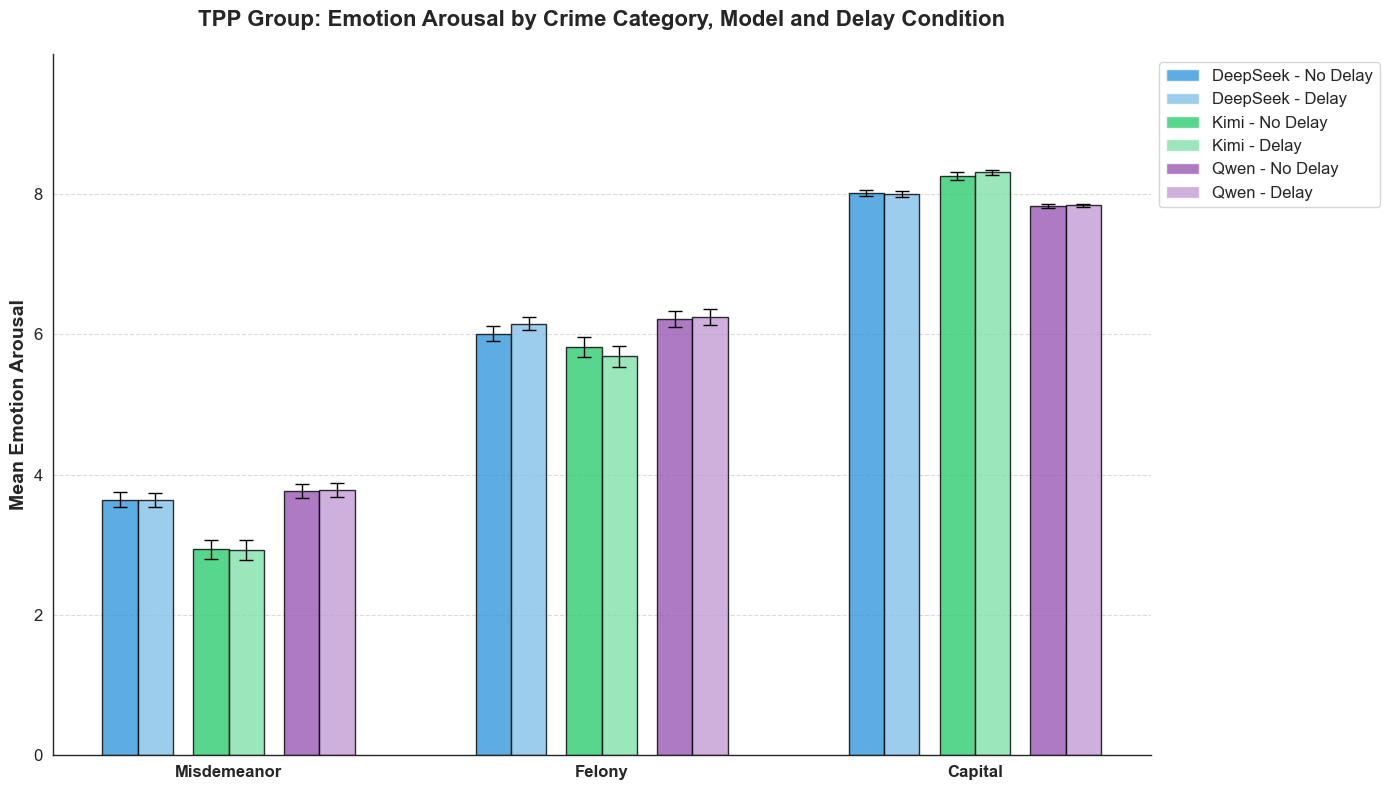


SPP组分析

SPP组显著性检验结果

Misdemeanor:
  Delay: N=540, Mean=4.854, SD=1.862
  No Delay: N=540, Mean=4.824, SD=1.878
  Mann-Whitney U statistic=147084.000, p-value=0.7995
  显著性: ns

Felony:
  Delay: N=540, Mean=7.409, SD=1.416
  No Delay: N=540, Mean=7.409, SD=1.342
  Mann-Whitney U statistic=147177.500, p-value=0.7822
  显著性: ns

Capital:
  Delay: N=540, Mean=8.559, SD=0.547
  No Delay: N=540, Mean=8.556, SD=0.554
  Mann-Whitney U statistic=146024.000, p-value=0.9596
  显著性: ns
图片已保存至: SPP_multi_llm_emotion_bar.png


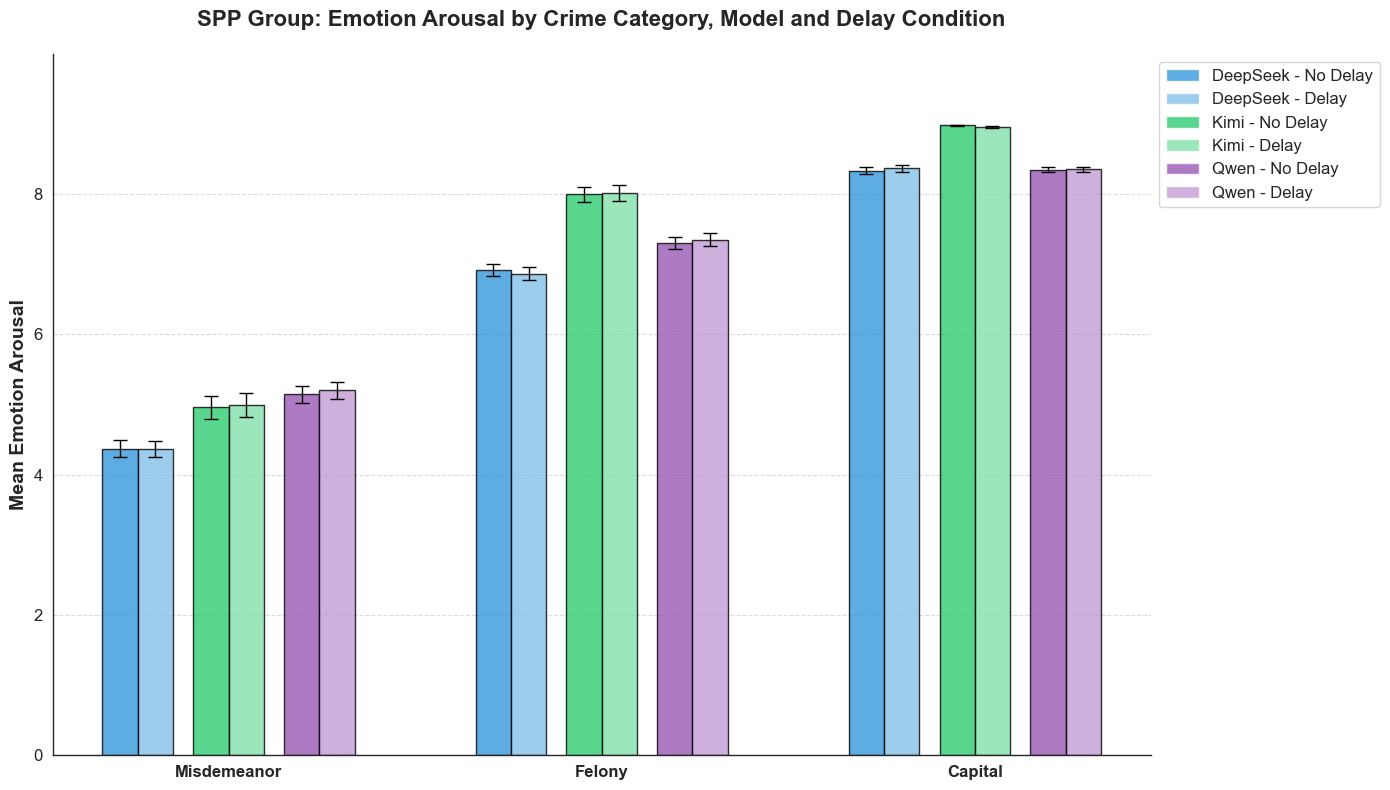


新增Delay vs No Delay差异分析

TPP组 - 每个犯罪类别内Delay vs No Delay差异检验

Misdemeanor:
  Delay: N=540, Mean=3.450, SD=1.569
  No Delay: N=540, Mean=3.448, SD=1.619
  Mann-Whitney U statistic=146151.500, p-value=0.9443
  显著性: ns

Felony:
  Delay: N=540, Mean=6.028, SD=1.629
  No Delay: N=540, Mean=6.019, SD=1.677
  Mann-Whitney U statistic=145269.000, p-value=0.9158
  显著性: ns

Capital:
  Delay: N=540, Mean=8.052, SD=0.542
  No Delay: N=540, Mean=8.035, SD=0.634
  Mann-Whitney U statistic=146335.000, p-value=0.8960
  显著性: ns

TPP组 - 每个模型内Delay vs No Delay差异检验

DeepSeek:
  Delay: N=540, Mean=5.931, SD=2.098
  No Delay: N=540, Mean=5.891, SD=2.175
  Mann-Whitney U statistic=146412.000, p-value=0.9036
  显著性: ns

Kimi:
  Delay: N=540, Mean=5.643, SD=2.721
  No Delay: N=540, Mean=5.672, SD=2.719
  Mann-Whitney U statistic=145243.000, p-value=0.9116
  显著性: ns

Qwen:
  Delay: N=540, Mean=5.956, SD=2.050
  No Delay: N=540, Mean=5.939, SD=2.064
  Mann-Whitney U statistic=146459.000, p-value=0.8950
  显著性: ns

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kruskal
import os

# --- 1. 读取多个LLM数据文件 ---
# 定义要读取的LLM数据文件
llm_files = [
    './DeepSeek-V3-Fast_organized_data.csv',
    './Kimi-K2-0905_organized_data.csv', 
    './Qwen3-235B-A22B-Instruct-2507_organized_data.csv'
]

llm_names = ['DeepSeek', 'Kimi', 'Qwen']

# 读取并合并所有LLM数据
all_llm_data = []

for file_path, model_name in zip(llm_files, llm_names):
    if os.path.exists(file_path):
        df_temp = pd.read_csv(file_path)
        df_temp['Model'] = model_name  # 添加模型名称列
        all_llm_data.append(df_temp)
        print(f"成功读取 {model_name} 数据，数据量: {len(df_temp)}")
    else:
        print(f"警告: 文件 {file_path} 不存在")

# 合并所有数据
if all_llm_data:
    df_llm = pd.concat(all_llm_data, ignore_index=True)
    print(f"\n合并后的总数据量: {len(df_llm)}")
else:
    raise FileNotFoundError("没有找到任何数据文件")

print("成功读取所有LLM数据。")
print("-" * 50)

# 检查数据中的Role列
print("Role列的唯一值:", df_llm['Role'].unique())
print("Model列的唯一值:", df_llm['Model'].unique())
print("-" * 50)

# 根据Role列拆分数据
tpp_data = df_llm[df_llm['Role'] == 'TPP']
spp_data = df_llm[df_llm['Role'] == 'SPP']

print(f"TPP组总数据量: {len(tpp_data)}")
print(f"SPP组总数据量: {len(spp_data)}")

# 按模型统计
for model in llm_names:
    tpp_model = tpp_data[tpp_data['Model'] == model]
    spp_model = spp_data[spp_data['Model'] == model]
    print(f"{model}: TPP={len(tpp_model)}, SPP={len(spp_model)}")

print("-" * 50)

# --- 2. 数据预处理 ---
def prepare_llm_data(df):
    """准备LLM数据用于分析"""
    df_clean = df.copy()
    
    # 确保数据类型正确
    if 'Category' in df_clean.columns:
        df_clean['Category'] = pd.to_numeric(df_clean['Category'], errors='coerce')
    if 'Emotion' in df_clean.columns:  # 修改为 Emotion
        df_clean['Emotion'] = pd.to_numeric(df_clean['Emotion'], errors='coerce')
    if 'Delay_Info' in df_clean.columns:
        df_clean['Delay_Info'] = pd.to_numeric(df_clean['Delay_Info'], errors='coerce')
    
    return df_clean

# 准备两组数据
tpp_all_data = prepare_llm_data(tpp_data)
spp_all_data = prepare_llm_data(spp_data)

print("数据预处理完成。")
print("-" * 50)

# --- 3. 数据准备：添加分类标签 ---
def prepare_plot_data(df):
    """准备可视化数据，添加分类标签"""
    df = df.copy()
    
    category_map = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}
    df['Category_Label'] = df['Category'].map(category_map)
    
    df['Delay_Label'] = df['Delay_Info'].apply(lambda x: 'No Delay' if x == 0 else 'Delay')
    
    df['Combined_Label'] = df['Category_Label'] + '\n' + df['Delay_Label']
    
    return df

tpp_plot_data = prepare_plot_data(tpp_all_data)
spp_plot_data = prepare_plot_data(spp_all_data)

print(f"TPP组总数据量: {len(tpp_plot_data)}")
print(f"SPP组总数据量: {len(spp_plot_data)}")

# --- 4. 显著性检验函数 ---
def perform_significance_tests(df, group_name):
    """
    对每个Category内的Delay vs No Delay进行Mann-Whitney U检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组显著性检验结果")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        cat_data = df[df['Category_Label'] == cat]
        
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Emotion'].dropna()  # 修改为 Emotion
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Emotion'].dropna()  # 修改为 Emotion
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"\n{cat}:")
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Category': cat,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print(f"\n{cat}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 5. 修改后的可视化函数：使用柱状图 ---
def create_multi_llm_bar_plot(df, group_name, save_path=None):
    """
    创建多LLM数据的柱状图可视化
    - 每个犯罪类别内显示三个模型
    - 每个模型内显示Delay和No Delay的均值
    - 添加误差线和显著性标记
    """
    # 设置图形样式
    sns.set_style("white")
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建图形
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # 定义类别顺序和模型顺序
    category_order = ['Misdemeanor', 'Felony', 'Capital']
    model_order = llm_names
    
    # 定义颜色方案
    colors = {
        'DeepSeek': {'No Delay': '#3498db', 'Delay': '#85c1e9'},  # 蓝色系
        'Kimi': {'No Delay': '#2ecc71', 'Delay': '#82e0aa'},      # 绿色系
        'Qwen': {'No Delay': '#9b59b6', 'Delay': '#c39bd3'}       # 紫色系
    }
    
    # 准备数据：计算每个组的均值和标准差
    plot_data = df.dropna(subset=['Emotion', 'Category_Label', 'Delay_Label', 'Model'])  # 修改为 Emotion
    
    # 计算统计量
    summary_stats = plot_data.groupby(['Category_Label', 'Model', 'Delay_Label'])['Emotion'].agg([  # 修改为 Emotion
        'mean', 'std', 'count'
    ]).reset_index()
    
    # 计算标准误差
    summary_stats['se'] = summary_stats['std'] / np.sqrt(summary_stats['count'])
    
    # 设置柱状图位置
    bar_width = 0.35
    gap_between_models = 0.2
    gap_between_categories = 1.0
    
    # 计算每个类别内的位置
    positions = {}
    current_pos = 0
    
    for cat_idx, cat in enumerate(category_order):
        positions[cat] = {}
        for model_idx, model in enumerate(model_order):
            # 每个模型在类别内的位置
            base_pos = current_pos + model_idx * (2 * bar_width + gap_between_models)
            positions[cat][model] = {
                'No Delay': base_pos,
                'Delay': base_pos + bar_width
            }
        current_pos += len(model_order) * (2 * bar_width + gap_between_models) + gap_between_categories
    
    # 绘制柱状图
    for cat in category_order:
        for model in model_order:
            for delay_cond in ['No Delay', 'Delay']:
                # 获取数据
                stats_row = summary_stats[
                    (summary_stats['Category_Label'] == cat) & 
                    (summary_stats['Model'] == model) & 
                    (summary_stats['Delay_Label'] == delay_cond)
                ]
                
                if len(stats_row) > 0:
                    mean_val = stats_row['mean'].values[0]
                    se_val = stats_row['se'].values[0]
                    pos = positions[cat][model][delay_cond]
                    
                    # 绘制柱状图
                    ax.bar(pos, mean_val, bar_width, 
                          color=colors[model][delay_cond],
                          alpha=0.8,
                          edgecolor='black',
                          linewidth=1,
                          label=f'{model} - {delay_cond}' if cat == category_order[0] and model == model_order[0] else "")
                    
                    # 添加误差线
                    ax.errorbar(pos, mean_val, yerr=se_val, 
                               fmt='none', color='black', capsize=5, capthick=1, linewidth=1)
    
    # 添加显著性标记（基于之前的检验结果）
    # 这里可以添加代码来在柱状图上显示显著性标记
    
    # 设置x轴标签和刻度
    category_centers = []
    for cat in category_order:
        model_positions = [positions[cat][model]['No Delay'] + bar_width/2 for model in model_order]
        category_center = np.mean(model_positions)
        category_centers.append(category_center)
    
    ax.set_xticks(category_centers)
    ax.set_xticklabels(category_order, fontsize=14, fontweight='bold')
    
    # 设置y轴
    ax.set_ylabel('Mean Emotion Arousal', fontsize=14, fontweight='bold')  # 修改y轴标签
    # 根据Emotion的实际范围调整y轴限制
    ax.set_ylim(0, max(9, plot_data['Emotion'].max() + 1))  # 动态调整y轴上限
    ax.set_yticks([0, 2, 4, 6, 8])

    
    # 添加网格线
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    
    # 设置标题
    ax.set_title(f'{group_name} Group: Emotion Arousal by Crime Category, Model and Delay Condition',  # 修改标题
                fontsize=16, fontweight='bold', pad=20)
    
    # 创建图例
    from matplotlib.patches import Patch
    legend_elements = []
    for model in model_order:
        legend_elements.append(Patch(facecolor=colors[model]['No Delay'], alpha=0.8, 
                                   label=f'{model} - No Delay'))
        legend_elements.append(Patch(facecolor=colors[model]['Delay'], alpha=0.8,
                                   label=f'{model} - Delay'))
    
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    
    # 美化边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    
    # 设置刻度线
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存至: {save_path}")
    
    plt.show()

# --- 6. 模型间显著性检验函数 ---
def perform_model_comparison_tests(df, group_name):
    """
    对每个犯罪类别和延迟条件下的三个模型进行Kruskal-Wallis检验
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 模型间差异检验 (Kruskal-Wallis检验)")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    for cat in categories:
        for delay in delay_conditions:
            print(f"\n{cat} - {delay}:")
            
            # 收集三个模型的数据
            model_data = []
            model_names = []
            
            for model in llm_names:
                model_ratings = df[
                    (df['Category_Label'] == cat) & 
                    (df['Delay_Label'] == delay) &
                    (df['Model'] == model)
                ]['Emotion'].dropna()  # 修改为 Emotion
                
                if len(model_ratings) > 0:
                    model_data.append(model_ratings)
                    model_names.append(model)
                    
                    print(f"  {model}: N={len(model_ratings)}, Mean={model_ratings.mean():.3f}, SD={model_ratings.std():.3f}")
            
            # 如果有至少两个模型有数据，进行Kruskal-Wallis检验
            if len(model_data) >= 2:
                try:
                    # 执行Kruskal-Wallis检验
                    h_statistic, p_value = kruskal(*model_data)
                    
                    print(f"  Kruskal-Wallis H statistic={h_statistic:.3f}, p-value={p_value:.4f}")
                    
                    if p_value < 0.001:
                        sig_label = '***'
                    elif p_value < 0.01:
                        sig_label = '**'
                    elif p_value < 0.05:
                        sig_label = '*'
                    else:
                        sig_label = 'ns'
                    
                    print(f"  模型间显著性: {sig_label}")
                    
                    # 如果总体显著，进行两两比较
                    if p_value < 0.05 and len(model_data) == 3:
                        print("  进行两两比较 (Mann-Whitney U检验):")
                        from itertools import combinations
                        
                        for (i, j) in combinations(range(3), 2):
                            model1 = model_names[i]
                            model2 = model_names[j]
                            u_stat, p_val = stats.mannwhitneyu(model_data[i], model_data[j], alternative='two-sided')
                            
                            if p_val < 0.001:
                                pair_sig = '***'
                            elif p_val < 0.01:
                                pair_sig = '**'
                            elif p_val < 0.05:
                                pair_sig = '*'
                            else:
                                pair_sig = 'ns'
                                
                            print(f"    {model1} vs {model2}: p={p_val:.4f} {pair_sig}")
                    
                    results.append({
                        'Group': group_name,
                        'Category': cat,
                        'Delay_Condition': delay,
                        'H_statistic': h_statistic,
                        'p_value': p_value,
                        'significance': sig_label,
                        'Model1': model_names[0] if len(model_names) > 0 else '',
                        'Model1_N': len(model_data[0]) if len(model_data) > 0 else 0,
                        'Model1_Mean': model_data[0].mean() if len(model_data) > 0 else 0,
                        'Model2': model_names[1] if len(model_names) > 1 else '',
                        'Model2_N': len(model_data[1]) if len(model_data) > 1 else 0,
                        'Model2_Mean': model_data[1].mean() if len(model_data) > 1 else 0,
                        'Model3': model_names[2] if len(model_names) > 2 else '',
                        'Model3_N': len(model_data[2]) if len(model_data) > 2 else 0,
                        'Model3_Mean': model_data[2].mean() if len(model_data) > 2 else 0,
                    })
                    
                except Exception as e:
                    print(f"  检验出错: {e}")
            else:
                print("  数据不足，无法进行模型间比较")
    
    return pd.DataFrame(results)

# --- 7. 新增：计算每个犯罪类别内Delay vs No Delay的差异 ---
def perform_delay_vs_no_delay_by_category(df, group_name):
    """
    对每个犯罪类别，计算Delay vs No Delay的差异
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 每个犯罪类别内Delay vs No Delay差异检验")
    print(f"{'='*60}")
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    
    for cat in categories:
        print(f"\n{cat}:")
        
        # 获取该类别下的所有数据
        cat_data = df[df['Category_Label'] == cat]
        
        # 分离Delay和No Delay数据
        delay_data = cat_data[cat_data['Delay_Label'] == 'Delay']['Emotion'].dropna()  # 修改为 Emotion
        no_delay_data = cat_data[cat_data['Delay_Label'] == 'No Delay']['Emotion'].dropna()  # 修改为 Emotion
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            # 执行Mann-Whitney U检验
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Group': group_name,
                'Category': cat,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print("  数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 8. 新增：计算三个大模型之间Delay和No Delay的差异 ---
def perform_delay_vs_no_delay_by_model(df, group_name):
    """
    对每个模型，计算Delay vs No Delay的差异
    """
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 每个模型内Delay vs No Delay差异检验")
    print(f"{'='*60}")
    
    results = []
    
    for model in llm_names:
        print(f"\n{model}:")
        
        # 获取该模型下的所有数据
        model_data = df[df['Model'] == model]
        
        # 分离Delay和No Delay数据
        delay_data = model_data[model_data['Delay_Label'] == 'Delay']['Emotion'].dropna()  # 修改为 Emotion
        no_delay_data = model_data[model_data['Delay_Label'] == 'No Delay']['Emotion'].dropna()  # 修改为 Emotion
        
        if len(delay_data) > 0 and len(no_delay_data) > 0:
            # 执行Mann-Whitney U检验
            statistic, p_value = stats.mannwhitneyu(delay_data, no_delay_data, alternative='two-sided')
            
            delay_mean = delay_data.mean()
            delay_std = delay_data.std()
            no_delay_mean = no_delay_data.mean()
            no_delay_std = no_delay_data.std()
            
            print(f"  Delay: N={len(delay_data)}, Mean={delay_mean:.3f}, SD={delay_std:.3f}")
            print(f"  No Delay: N={len(no_delay_data)}, Mean={no_delay_mean:.3f}, SD={no_delay_std:.3f}")
            print(f"  Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
            
            if p_value < 0.001:
                sig_label = '***'
            elif p_value < 0.01:
                sig_label = '**'
            elif p_value < 0.05:
                sig_label = '*'
            else:
                sig_label = 'ns'
            
            print(f"  显著性: {sig_label}")
            
            results.append({
                'Group': group_name,
                'Model': model,
                'Delay_N': len(delay_data),
                'Delay_Mean': delay_mean,
                'Delay_SD': delay_std,
                'NoDelay_N': len(no_delay_data),
                'NoDelay_Mean': no_delay_mean,
                'NoDelay_SD': no_delay_std,
                'U_statistic': statistic,
                'p_value': p_value,
                'significance': sig_label
            })
        else:
            print("  数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# --- 9. 执行可视化和统计检验 ---

# TPP组
print("\n" + "="*60)
print("TPP组分析")
print("="*60)
tpp_results = perform_significance_tests(tpp_plot_data, "TPP")
create_multi_llm_bar_plot(tpp_plot_data, "TPP", save_path="TPP_multi_llm_emotion_bar.png")  # 修改保存文件名

# SPP组
print("\n" + "="*60)
print("SPP组分析")
print("="*60)
spp_results = perform_significance_tests(spp_plot_data, "SPP")
create_multi_llm_bar_plot(spp_plot_data, "SPP", save_path="SPP_multi_llm_emotion_bar.png")  # 修改保存文件名

# --- 10. 执行新增的Delay vs No Delay检验 ---
print("\n" + "="*60)
print("新增Delay vs No Delay差异分析")
print("="*60)

# TPP组
tpp_delay_by_category = perform_delay_vs_no_delay_by_category(tpp_plot_data, "TPP")
tpp_delay_by_model = perform_delay_vs_no_delay_by_model(tpp_plot_data, "TPP")

# SPP组
spp_delay_by_category = perform_delay_vs_no_delay_by_category(spp_plot_data, "SPP")
spp_delay_by_model = perform_delay_vs_no_delay_by_model(spp_plot_data, "SPP")

# --- 11. 执行模型间比较检验 ---
print("\n" + "="*60)
print("模型间差异分析")
print("="*60)

tpp_model_comparison = perform_model_comparison_tests(tpp_plot_data, "TPP")
spp_model_comparison = perform_model_comparison_tests(spp_plot_data, "SPP")

# --- 12. 按模型分别进行统计检验 ---
def perform_significance_tests_by_model(df, group_name):
    """对每个模型分别进行显著性检验"""
    print(f"\n{'='*60}")
    print(f"{group_name}组 - 按模型显著性检验结果")
    print(f"{'='*60}")
    
    all_results = []
    
    for model in llm_names:
        print(f"\n--- {model} ---")
        model_data = df[df['Model'] == model]
        model_results = perform_significance_tests(model_data, f"{group_name}-{model}")
        model_results['Model'] = model
        all_results.append(model_results)
    
    return pd.concat(all_results, ignore_index=True)

# 执行按模型的统计检验
tpp_model_results = perform_significance_tests_by_model(tpp_plot_data, "TPP")
spp_model_results = perform_significance_tests_by_model(spp_plot_data, "SPP")

# --- 13. 组间比较分析 ---
def perform_group_comparison_by_category_and_model(tpp_df, spp_df):
    """
    对每个犯罪类别、延迟条件和模型进行TPP和SPP组间差异分析
    """
    print("\n" + "="*60)
    print("TPP vs SPP 组间差异分析（按模型）")
    print("="*60)
    
    results = []
    categories = ['Misdemeanor', 'Felony', 'Capital']
    delay_conditions = ['No Delay', 'Delay']
    
    for model in llm_names:
        print(f"\n--- {model} ---")
        for cat in categories:
            for delay in delay_conditions:
                # 获取TPP组数据
                tpp_data = tpp_df[
                    (tpp_df['Category_Label'] == cat) & 
                    (tpp_df['Delay_Label'] == delay) &
                    (tpp_df['Model'] == model)
                ]['Emotion'].dropna()  # 修改为 Emotion
                
                # 获取SPP组数据
                spp_data = spp_df[
                    (spp_df['Category_Label'] == cat) & 
                    (spp_df['Delay_Label'] == delay) &
                    (spp_df['Model'] == model)
                ]['Emotion'].dropna()  # 修改为 Emotion
                
                if len(tpp_data) > 0 and len(spp_data) > 0:
                    # 执行Mann-Whitney U检验
                    statistic, p_value = stats.mannwhitneyu(tpp_data, spp_data, alternative='two-sided')
                    
                    tpp_mean = tpp_data.mean()
                    tpp_std = tpp_data.std()
                    spp_mean = spp_data.mean()
                    spp_std = spp_data.std()
                    
                    print(f"  {cat} - {delay}:")
                    print(f"    TPP: N={len(tpp_data)}, Mean={tpp_mean:.3f}, SD={tpp_std:.3f}")
                    print(f"    SPP: N={len(spp_data)}, Mean={spp_mean:.3f}, SD={spp_std:.3f}")
                    print(f"    Mann-Whitney U statistic={statistic:.3f}, p-value={p_value:.4f}")
                    
                    if p_value < 0.001:
                        sig_label = '***'
                    elif p_value < 0.01:
                        sig_label = '**'
                    elif p_value < 0.05:
                        sig_label = '*'
                    else:
                        sig_label = 'ns'
                    
                    print(f"    显著性: {sig_label}")
                    
                    results.append({
                        'Model': model,
                        'Category': cat,
                        'Delay_Condition': delay,
                        'TPP_N': len(tpp_data),
                        'TPP_Mean': tpp_mean,
                        'TPP_SD': tpp_std,
                        'SPP_N': len(spp_data),
                        'SPP_Mean': spp_mean,
                        'SPP_SD': spp_std,
                        'U_statistic': statistic,
                        'p_value': p_value,
                        'significance': sig_label
                    })
                else:
                    print(f"  {cat} - {delay}: 数据不足，无法进行检验")
    
    return pd.DataFrame(results)

# 执行组间比较分析
group_comparison_results = perform_group_comparison_by_category_and_model(tpp_plot_data, spp_plot_data)

# --- 14. 保存所有结果 ---
# 修改输出文件名以反映分析的是Emotion_Arousal
tpp_results.to_csv("TPP_emotion_results.csv", index=False)
spp_results.to_csv("SPP_emotion_results.csv", index=False)
tpp_model_results.to_csv("TPP_model_emotion_results.csv", index=False)
spp_model_results.to_csv("SPP_model_emotion_results.csv", index=False)
group_comparison_results.to_csv("TPP_vs_SPP_emotion_comparison_results.csv", index=False)
tpp_model_comparison.to_csv("TPP_model_emotion_comparison_results.csv", index=False)
spp_model_comparison.to_csv("SPP_model_emotion_comparison_results.csv", index=False)
tpp_delay_by_category.to_csv("TPP_emotion_delay_by_category_results.csv", index=False)
tpp_delay_by_model.to_csv("TPP_emotion_delay_by_model_results.csv", index=False)
spp_delay_by_category.to_csv("SPP_emotion_delay_by_category_results.csv", index=False)
spp_delay_by_model.to_csv("SPP_emotion_delay_by_model_results.csv", index=False)

print("\n" + "="*60)
print("分析完成！所有结果已保存为CSV文件。")
print("="*60)

# --- 15. 数据汇总统计 ---
print("\n数据汇总统计:")
print("="*40)
for model in llm_names:
    for role in ['TPP', 'SPP']:
        role_data = df_llm[(df_llm['Model'] == model) & (df_llm['Role'] == role)]
        print(f"{model} - {role}: {len(role_data)} 条数据")
        
        for cat in [1, 2, 3]:
            for delay in [0, 1]:
                cat_data = role_data[(role_data['Category'] == cat) & (role_data['Delay_Info'] == delay)]
                cat_label = {1: 'Misdemeanor', 2: 'Felony', 3: 'Capital'}[cat]
                delay_label = 'No Delay' if delay == 0 else 'Delay'
                print(f"  {cat_label} - {delay_label}: {len(cat_data)}")

In [2]:
import pandas as pd
import os
from pathlib import Path

# 设置数据文件夹路径
data_folder = "age_organized_data"

# 初始化一个列表来存储所有数据
all_data = []

# 遍历文件夹中的所有CSV文件
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        # 读取CSV文件
        filepath = os.path.join(data_folder, filename)
        df = pd.read_csv(filepath)
        
        # 从文件名中提取条件信息
        # 提取模型名称
        if 'DeepSeek-V3-Fast' in filename:
            model = 'DeepSeek-V3-Fast'
        elif 'Kimi-K2-0905' in filename:
            model = 'Kimi-K2-0905'
        elif 'Qwen3-235B-A22B-Instruct-2507' in filename:
            model = 'Qwen3-235B-A22B-Instruct-2507'
        else:
            model = 'Unknown'
        
        # 提取年龄条件
        if 'age20' in filename:
            age = 'age20'
        elif 'age30' in filename:
            age = 'age30'
        elif 'age40' in filename:
            age = 'age40'
        elif 'age50' in filename:
            age = 'age50'
        elif 'age60' in filename:
            age = 'age60'
        else:
            age = 'Unknown'
        
        # 提取推理条件
        if 'short-term-reasoning' in filename:
            reasoning = 'short-term-reasoning'
        elif 'long-term-reasoning' in filename:
            reasoning = 'long-term-reasoning'
        elif 'NAN-reasoning' in filename:
            reasoning = 'NAN-reasoning'
        else:
            reasoning = 'Unknown'
        
        # 提取情绪条件
        if 'with_emotion' in filename:
            emotion_condition = 'with_emotion'
        elif 'without_emotion' in filename:
            emotion_condition = 'without_emotion'
        else:
            emotion_condition = 'Unknown'
        
        # 添加条件列到数据框
        df['Model'] = model
        df['Age'] = age
        df['Reasoning'] = reasoning
        df['Emotion_Condition'] = emotion_condition
        df['Filename'] = filename
        
        # 将数据添加到列表
        all_data.append(df)

# 合并所有数据
combined_df = pd.concat(all_data, ignore_index=True)

# 显示数据信息
print(f"总共读取了 {len(all_data)} 个文件")
print(f"合并后的数据形状: {combined_df.shape}")
print("\n数据的前几行:")
print(combined_df.head())
print("\n各条件的分布:")
print(f"模型: {combined_df['Model'].unique()}")
print(f"年龄: {combined_df['Age'].unique()}")
print(f"推理: {combined_df['Reasoning'].unique()}")
print(f"情绪条件: {combined_df['Emotion_Condition'].unique()}")

总共读取了 90 个文件
合并后的数据形状: (97200, 11)

数据的前几行:
   List2  Category  Rating  Delay_Info  Emotion Role             Model    Age  \
0      1       3.0       9         0.0        9  SPP  DeepSeek-V3-Fast  age20   
1      1       3.0       9         0.0        9  SPP  DeepSeek-V3-Fast  age20   
2      1       3.0       9         0.0        9  SPP  DeepSeek-V3-Fast  age20   
3      1       3.0       9         0.0        9  SPP  DeepSeek-V3-Fast  age20   
4      1       3.0       9         0.0        9  SPP  DeepSeek-V3-Fast  age20   

       Reasoning Emotion_Condition  \
0  NAN-reasoning      with_emotion   
1  NAN-reasoning      with_emotion   
2  NAN-reasoning      with_emotion   
3  NAN-reasoning      with_emotion   
4  NAN-reasoning      with_emotion   

                                            Filename  
0  DeepSeek-V3-Fast_exp001_age20_NAN-reasoning_wi...  
1  DeepSeek-V3-Fast_exp001_age20_NAN-reasoning_wi...  
2  DeepSeek-V3-Fast_exp001_age20_NAN-reasoning_wi...  
3  DeepSeek-V3-Fast_

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
from itertools import product

# 假设combined_df已经存在

# 定义所有条件组合（除了年龄）
models = ['DeepSeek-V3-Fast', 'Kimi-K2-0905', 'Qwen3-235B-A22B-Instruct-2507']
emotions = ['with_emotion', 'without_emotion']
reasonings = ['short-term-reasoning', 'long-term-reasoning', 'NAN-reasoning']
ages = ['age20', 'age30', 'age40', 'age50', 'age60']
roles = ['TPP', 'SPP']

# 年龄映射到数值
age_mapping = {'age20': 20, 'age30': 30, 'age40': 40, 'age50': 50, 'age60': 60}

# 存储结果
significant_results = []

# 遍历所有条件组合（除了年龄）
for model, emotion_cond, reasoning, role in product(models, emotions, reasonings, roles):
    
    # 收集该条件下不同年龄的数据
    condition_data = []
    
    for age in ages:
        # 筛选特定条件的数据
        filtered_df = combined_df[
            (combined_df['Model'] == model) & 
            (combined_df['Emotion_Condition'] == emotion_cond) & 
            (combined_df['Reasoning'] == reasoning) &
            (combined_df['Age'] == age) &
            (combined_df['Role'] == role)
        ]
        
        if len(filtered_df) > 0:
            # 按List2分组，计算平均Rating和Emotion，同时保留Category和Delay_Info
            grouped = filtered_df.groupby('List2').agg({
                'Rating': 'mean',
                'Emotion': 'mean',
                'Category': 'first',  # 假设同一List2的Category相同
                'Delay_Info': 'first'  # 假设同一List2的Delay_Info相同
            }).reset_index()
            
            grouped['Age'] = age
            grouped['Age_Numeric'] = age_mapping[age]
            condition_data.append(grouped)
    
    # 如果收集到了数据，合并
    if len(condition_data) > 0:
        condition_df = pd.concat(condition_data, ignore_index=True)
        
        # 获取所有唯一的List2值
        unique_list2 = condition_df['List2'].unique()
        
        # 对每个List2值进行线性相关分析
        for list2_value in unique_list2:
            list2_data = condition_df[condition_df['List2'] == list2_value]
            
            # 确保至少有3个年龄点
            if len(list2_data) >= 3:
                ages_numeric = list2_data['Age_Numeric'].values
                ratings = list2_data['Rating'].values
                emotions = list2_data['Emotion'].values
                
                # 获取Category和Delay_Info
                category = list2_data['Category'].iloc[0]
                delay_info = list2_data['Delay_Info'].iloc[0]
                
                # Rating与年龄的线性相关
                r_rating, p_rating = stats.pearsonr(ages_numeric, ratings)
                
                # Emotion与年龄的线性相关
                r_emotion, p_emotion = stats.pearsonr(ages_numeric, emotions)
                
                # 如果Rating显著相关（p < 0.05）
                if p_rating < 0.05:
                    significant_results.append({
                        'Model': model,
                        'Emotion_Condition': emotion_cond,
                        'Reasoning': reasoning,
                        'Role': role,
                        'List2': list2_value,
                        'Category': category,
                        'Delay_Info': delay_info,
                        'Measure': 'Rating',
                        'r_value': r_rating,
                        'p_value': p_rating
                    })
                
                # 如果Emotion显著相关（p < 0.05）
                if p_emotion < 0.05:
                    significant_results.append({
                        'Model': model,
                        'Emotion_Condition': emotion_cond,
                        'Reasoning': reasoning,
                        'Role': role,
                        'List2': list2_value,
                        'Category': category,
                        'Delay_Info': delay_info,
                        'Measure': 'Emotion',
                        'r_value': r_emotion,
                        'p_value': p_emotion
                    })

# 转换为DataFrame
results_df = pd.DataFrame(significant_results)

# 显示有显著性的结果
if len(results_df) > 0:
    print("=" * 120)
    print("显著的年龄线性相关结果 (p < 0.05)")
    print("=" * 120)
    
    # 计算每个条件组合的显著List2数量
    condition_counts = results_df.groupby(
        ['Model', 'Emotion_Condition', 'Reasoning', 'Role']
    )['List2'].nunique().reset_index(name='count')
    
    # 按显著List2数量降序排序
    condition_counts = condition_counts.sort_values('count', ascending=False)
    
    # 按排序后的顺序显示结果
    for _, count_row in condition_counts.iterrows():
        model = count_row['Model']
        emotion_cond = count_row['Emotion_Condition']
        reasoning = count_row['Reasoning']
        role = count_row['Role']
        count = count_row['count']
        
        group = results_df[
            (results_df['Model'] == model) &
            (results_df['Emotion_Condition'] == emotion_cond) &
            (results_df['Reasoning'] == reasoning) &
            (results_df['Role'] == role)
        ]
        
        print(f"\n条件: {model} | {emotion_cond} | {reasoning} | Role={role}")
        print(f"显著的List2数量: {count}")
        print("-" * 120)
        
        for measure in ['Rating', 'Emotion']:
            measure_group = group[group['Measure'] == measure]
            if len(measure_group) > 0:
                print(f"\n  {measure} 与年龄的线性关系:")
                
                # 按Category和Delay_Info分类
                for category in sorted(measure_group['Category'].unique()):
                    cat_group = measure_group[measure_group['Category'] == category]
                    
                    # 分类Delay_Info: 0和非0
                    delay_0 = cat_group[cat_group['Delay_Info'] == 0]
                    delay_non0 = cat_group[cat_group['Delay_Info'] != 0]
                    
                    if len(delay_0) > 0:
                        print(f"\n    Category={category}, Delay_Info=0:")
                        print(f"      List2值: {sorted(delay_0['List2'].unique())}")
                        for _, row in delay_0.iterrows():
                            print(f"        List2={row['List2']}: p={row['p_value']:.4f}, r={row['r_value']:.4f}")
                    
                    if len(delay_non0) > 0:
                        print(f"\n    Category={category}, Delay_Info≠0:")
                        print(f"      List2值: {sorted(delay_non0['List2'].unique())}")
                        for _, row in delay_non0.iterrows():
                            print(f"        List2={row['List2']}: p={row['p_value']:.4f}, r={row['r_value']:.4f}")
    
else:
    print("未发现显著的年龄线性相关关系 (p < 0.05)")

# 统计每种刺激条件（按Category和Delay_Info分类）有显著线性关系的次数
if len(results_df) > 0:
    print("\n" + "=" * 120)
    print("刺激条件显著线性关系统计")
    print("=" * 120)
    
    for role in ['TPP', 'SPP']:
        role_data = results_df[results_df['Role'] == role]
        
        if len(role_data) > 0:
            print(f"\n角色: {role}")
            print("-" * 120)
            
            # 创建Delay分类
            role_data = role_data.copy()
            role_data['Delay_Class'] = role_data['Delay_Info'].apply(lambda x: 'Delay=0' if x == 0 else 'Delay≠0')
            
            # 按Category和Delay_Class分组统计
            stimulus_counts = role_data.groupby(['Category', 'Delay_Class']).size().reset_index(name='count')
            stimulus_counts = stimulus_counts.sort_values(['Category', 'Delay_Class'])
            
            for _, row in stimulus_counts.iterrows():
                print(f"  Category={row['Category']}, {row['Delay_Class']}: {row['count']} 次显著相关")
            
            # 也可以按Measure分别统计
            print(f"\n  按测量指标细分:")
            measure_counts = role_data.groupby(['Category', 'Delay_Class', 'Measure']).size().reset_index(name='count')
            measure_counts = measure_counts.sort_values(['Category', 'Delay_Class', 'Measure'])
            
            for _, row in measure_counts.iterrows():
                print(f"    Category={row['Category']}, {row['Delay_Class']}, {row['Measure']}: {row['count']} 次")

# 主要分析：对比不同数据条件下的显著结果数量
if len(results_df) > 0:
    print("\n" + "=" * 120)
    print("主要分析：数据条件对比")
    print("=" * 120)
    
    # 1. 对比with_emotion和without_emotion
    print("\n【情绪条件对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        emotion_counts = results_df[results_df['Measure'] == measure].groupby(
            'Emotion_Condition'
        ).size().reset_index(name='count')
        emotion_counts = emotion_counts.sort_values('count', ascending=False)
        
        for _, row in emotion_counts.iterrows():
            print(f"  {row['Emotion_Condition']}: {row['count']} 次显著相关")
        
        # 按Role细分
        print(f"  按角色细分:")
        emotion_role_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Emotion_Condition', 'Role']
        ).size().reset_index(name='count')
        emotion_role_counts = emotion_role_counts.sort_values(['Emotion_Condition', 'count'], ascending=[True, False])
        
        for _, row in emotion_role_counts.iterrows():
            print(f"    {row['Emotion_Condition']} - {row['Role']}: {row['count']} 次")
    
    # 2. 对比reasoning三种条件
    print("\n\n【推理条件对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        reasoning_counts = results_df[results_df['Measure'] == measure].groupby(
            'Reasoning'
        ).size().reset_index(name='count')
        reasoning_counts = reasoning_counts.sort_values('count', ascending=False)
        
        for _, row in reasoning_counts.iterrows():
            print(f"  {row['Reasoning']}: {row['count']} 次显著相关")
        
        # 按Role细分
        print(f"  按角色细分:")
        reasoning_role_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Reasoning', 'Role']
        ).size().reset_index(name='count')
        reasoning_role_counts = reasoning_role_counts.sort_values(['Reasoning', 'count'], ascending=[True, False])
        
        for _, row in reasoning_role_counts.iterrows():
            print(f"    {row['Reasoning']} - {row['Role']}: {row['count']} 次")
    
    # 3. 交叉对比：情绪×推理
    print("\n\n【情绪×推理交叉对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        cross_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Emotion_Condition', 'Reasoning']
        ).size().reset_index(name='count')
        cross_counts = cross_counts.sort_values('count', ascending=False)
        
        for _, row in cross_counts.iterrows():
            print(f"  {row['Emotion_Condition']} × {row['Reasoning']}: {row['count']} 次")
    
    # 4. 模型对比
    print("\n\n【模型对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        model_counts = results_df[results_df['Measure'] == measure].groupby(
            'Model'
        ).size().reset_index(name='count')
        model_counts = model_counts.sort_values('count', ascending=False)
        
        for _, row in model_counts.iterrows():
            print(f"  {row['Model']}: {row['count']} 次显著相关")

# 5. 情绪×推理×模型三因素综合对比
    print("\n\n【情绪×推理×模型综合对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        three_way_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Emotion_Condition', 'Reasoning', 'Model']
        ).size().reset_index(name='count')
        three_way_counts = three_way_counts.sort_values('count', ascending=False)
        
        print(f"  前20个最多显著相关的条件组合:")
        for idx, row in three_way_counts.head(20).iterrows():
            print(f"    {row['Emotion_Condition']} × {row['Reasoning']} × {row['Model']}: {row['count']} 次")
        
        if len(three_way_counts) > 20:
            print(f"  ... (共{len(three_way_counts)}个条件组合)")
    
    # 6. 情绪×模型对比
    print("\n\n【情绪×模型对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        emotion_model_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Emotion_Condition', 'Model']
        ).size().reset_index(name='count')
        emotion_model_counts = emotion_model_counts.sort_values('count', ascending=False)
        
        for _, row in emotion_model_counts.iterrows():
            print(f"  {row['Emotion_Condition']} × {row['Model']}: {row['count']} 次")
    
    # 7. 推理×模型对比
    print("\n\n【推理×模型对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        reasoning_model_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Reasoning', 'Model']
        ).size().reset_index(name='count')
        reasoning_model_counts = reasoning_model_counts.sort_values('count', ascending=False)
        
        for _, row in reasoning_model_counts.iterrows():
            print(f"  {row['Reasoning']} × {row['Model']}: {row['count']} 次")


print("\n分析完成！")

c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: Con

显著的年龄线性相关结果 (p < 0.05)

条件: Qwen3-235B-A22B-Instruct-2507 | without_emotion | short-term-reasoning | Role=TPP
显著的List2数量: 21
------------------------------------------------------------------------------------------------------------------------

  Rating 与年龄的线性关系:

    Category=1.0, Delay_Info≠0:
      List2值: [10, 42]
        List2=10: p=0.0028, r=-0.9825
        List2=42: p=0.0154, r=-0.9449

    Category=2.0, Delay_Info=0:
      List2值: [29]
        List2=29: p=0.0342, r=0.9058

    Category=2.0, Delay_Info≠0:
      List2值: [30]
        List2=30: p=0.0269, r=0.9199

    Category=3.0, Delay_Info=0:
      List2值: [43]
        List2=43: p=0.0436, r=0.8890

  Emotion 与年龄的线性关系:

    Category=1.0, Delay_Info=0:
      List2值: [3, 37, 45]
        List2=3: p=0.0446, r=-0.8874
        List2=37: p=0.0123, r=-0.9525
        List2=45: p=0.0436, r=-0.8890

    Category=1.0, Delay_Info≠0:
      List2值: [10, 38]
        List2=10: p=0.0028, r=-0.9825
        List2=38: p=0.0413, r=-0.8931

    Categ

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
from itertools import product

# 假设combined_df已经存在

# 定义所有条件组合（除了年龄）
models = ['DeepSeek-V3-Fast', 'Kimi-K2-0905', 'Qwen3-235B-A22B-Instruct-2507']
emotions = ['with_emotion', 'without_emotion']
reasonings = ['short-term-reasoning', 'long-term-reasoning', 'NAN-reasoning']
ages = ['age20', 'age30', 'age40', 'age50', 'age60']
roles = ['TPP', 'SPP']

# 年龄映射到数值
age_mapping = {'age20': 20, 'age30': 30, 'age40': 40, 'age50': 50, 'age60': 60}

# 存储结果
significant_results = []

# 遍历所有条件组合（除了年龄）
for model, emotion_cond, reasoning, role in product(models, emotions, reasonings, roles):
    
    # 收集该条件下不同年龄的数据
    condition_data = []
    
    for age in ages:
        # 筛选特定条件的数据
        filtered_df = combined_df[
            (combined_df['Model'] == model) & 
            (combined_df['Emotion_Condition'] == emotion_cond) & 
            (combined_df['Reasoning'] == reasoning) &
            (combined_df['Age'] == age) &
            (combined_df['Role'] == role)
        ]
        
        if len(filtered_df) > 0:
            filtered_df = filtered_df.copy()
            filtered_df['Age'] = age
            filtered_df['Age_Numeric'] = age_mapping[age]
            condition_data.append(filtered_df)
    
    # 如果收集到了数据，合并
    if len(condition_data) > 0:
        condition_df = pd.concat(condition_data, ignore_index=True)
        
        # 创建Delay分类
        condition_df['Delay_Class'] = condition_df['Delay_Info'].apply(
            lambda x: 'Delay=0' if x == 0 else 'Delay≠0'
        )
        
        # 按Category和Delay_Class分组
        for category in condition_df['Category'].unique():
            for delay_class in ['Delay=0', 'Delay≠0']:
                # 筛选特定Category和Delay_Class的数据
                subset = condition_df[
                    (condition_df['Category'] == category) &
                    (condition_df['Delay_Class'] == delay_class)
                ]
                
                if len(subset) >= 3:  # 至少需要3个数据点
                    # 按年龄分组，计算每个年龄的平均Rating和Emotion
                    age_grouped = subset.groupby('Age_Numeric').agg({
                        'Rating': 'mean',
                        'Emotion': 'mean'
                    }).reset_index()
                    
                    # 确保至少有3个年龄点
                    if len(age_grouped) >= 3:
                        ages_numeric = age_grouped['Age_Numeric'].values
                        ratings = age_grouped['Rating'].values
                        emotions = age_grouped['Emotion'].values
                        
                        # Rating与年龄的线性相关
                        r_rating, p_rating = stats.pearsonr(ages_numeric, ratings)
                        
                        # Emotion与年龄的线性相关
                        r_emotion, p_emotion = stats.pearsonr(ages_numeric, emotions)
                        
                        # 如果Rating显著相关（p < 0.05）
                        if p_rating < 0.05:
                            significant_results.append({
                                'Model': model,
                                'Emotion_Condition': emotion_cond,
                                'Reasoning': reasoning,
                                'Role': role,
                                'Category': category,
                                'Delay_Class': delay_class,
                                'Measure': 'Rating',
                                'r_value': r_rating,
                                'p_value': p_rating,
                                'n_ages': len(age_grouped),
                                'n_samples': len(subset)
                            })
                        
                        # 如果Emotion显著相关（p < 0.05）
                        if p_emotion < 0.05:
                            significant_results.append({
                                'Model': model,
                                'Emotion_Condition': emotion_cond,
                                'Reasoning': reasoning,
                                'Role': role,
                                'Category': category,
                                'Delay_Class': delay_class,
                                'Measure': 'Emotion',
                                'r_value': r_emotion,
                                'p_value': p_emotion,
                                'n_ages': len(age_grouped),
                                'n_samples': len(subset)
                            })

# 转换为DataFrame
results_df = pd.DataFrame(significant_results)

# 显示有显著性的结果
if len(results_df) > 0:
    print("=" * 120)
    print("按Category和Delay分类的显著年龄线性相关结果 (p < 0.05)")
    print("=" * 120)
    
    # 计算每个条件组合的显著分类数量
    condition_counts = results_df.groupby(
        ['Model', 'Emotion_Condition', 'Reasoning', 'Role']
    ).size().reset_index(name='count')
    
    # 按显著分类数量降序排序
    condition_counts = condition_counts.sort_values('count', ascending=False)
    
    # 按排序后的顺序显示结果
    for _, count_row in condition_counts.iterrows():
        model = count_row['Model']
        emotion_cond = count_row['Emotion_Condition']
        reasoning = count_row['Reasoning']
        role = count_row['Role']
        count = count_row['count']
        
        group = results_df[
            (results_df['Model'] == model) &
            (results_df['Emotion_Condition'] == emotion_cond) &
            (results_df['Reasoning'] == reasoning) &
            (results_df['Role'] == role)
        ]
        
        print(f"\n条件: {model} | {emotion_cond} | {reasoning} | Role={role}")
        print(f"显著的刺激分类数量: {count}")
        print("-" * 120)
        
        for measure in ['Rating', 'Emotion']:
            measure_group = group[group['Measure'] == measure]
            if len(measure_group) > 0:
                print(f"\n  {measure} 与年龄的线性关系:")
                
                # 按Category排序显示
                measure_group_sorted = measure_group.sort_values(['Category', 'Delay_Class'])
                
                for _, row in measure_group_sorted.iterrows():
                    print(f"    Category={row['Category']}, {row['Delay_Class']}:")
                    print(f"      p={row['p_value']:.4f}, r={row['r_value']:.4f}")
                    print(f"      年龄点数={row['n_ages']}, 样本数={row['n_samples']}")
    
    # 主要分析：对比不同数据条件下的显著结果数量
    print("\n" + "=" * 120)
    print("主要分析：数据条件对比")
    print("=" * 120)
    
    # 1. 对比with_emotion和without_emotion
    print("\n【情绪条件对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        emotion_counts = results_df[results_df['Measure'] == measure].groupby(
            'Emotion_Condition'
        ).size().reset_index(name='count')
        emotion_counts = emotion_counts.sort_values('count', ascending=False)
        
        for _, row in emotion_counts.iterrows():
            print(f"  {row['Emotion_Condition']}: {row['count']} 次显著相关")
        
        # 按Role细分
        print(f"  按角色细分:")
        emotion_role_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Emotion_Condition', 'Role']
        ).size().reset_index(name='count')
        emotion_role_counts = emotion_role_counts.sort_values(['Emotion_Condition', 'count'], ascending=[True, False])
        
        for _, row in emotion_role_counts.iterrows():
            print(f"    {row['Emotion_Condition']} - {row['Role']}: {row['count']} 次")
    
    # 2. 对比reasoning三种条件
    print("\n\n【推理条件对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        reasoning_counts = results_df[results_df['Measure'] == measure].groupby(
            'Reasoning'
        ).size().reset_index(name='count')
        reasoning_counts = reasoning_counts.sort_values('count', ascending=False)
        
        for _, row in reasoning_counts.iterrows():
            print(f"  {row['Reasoning']}: {row['count']} 次显著相关")
        
        # 按Role细分
        print(f"  按角色细分:")
        reasoning_role_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Reasoning', 'Role']
        ).size().reset_index(name='count')
        reasoning_role_counts = reasoning_role_counts.sort_values(['Reasoning', 'count'], ascending=[True, False])
        
        for _, row in reasoning_role_counts.iterrows():
            print(f"    {row['Reasoning']} - {row['Role']}: {row['count']} 次")
    
    # 3. 模型对比
    print("\n\n【模型对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        model_counts = results_df[results_df['Measure'] == measure].groupby(
            'Model'
        ).size().reset_index(name='count')
        model_counts = model_counts.sort_values('count', ascending=False)
        
        for _, row in model_counts.iterrows():
            print(f"  {row['Model']}: {row['count']} 次显著相关")
    
    # 4. 交叉对比：情绪×推理
    print("\n\n【情绪×推理交叉对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        cross_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Emotion_Condition', 'Reasoning']
        ).size().reset_index(name='count')
        cross_counts = cross_counts.sort_values('count', ascending=False)
        
        for _, row in cross_counts.iterrows():
            print(f"  {row['Emotion_Condition']} × {row['Reasoning']}: {row['count']} 次")
    
    # 5. 情绪×模型对比
    print("\n\n【情绪×模型对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        emotion_model_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Emotion_Condition', 'Model']
        ).size().reset_index(name='count')
        emotion_model_counts = emotion_model_counts.sort_values('count', ascending=False)
        
        for _, row in emotion_model_counts.iterrows():
            print(f"  {row['Emotion_Condition']} × {row['Model']}: {row['count']} 次")
    
    # 6. 推理×模型对比
    print("\n\n【推理×模型对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        reasoning_model_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Reasoning', 'Model']
        ).size().reset_index(name='count')
        reasoning_model_counts = reasoning_model_counts.sort_values('count', ascending=False)
        
        for _, row in reasoning_model_counts.iterrows():
            print(f"  {row['Reasoning']} × {row['Model']}: {row['count']} 次")
    
    # 7. 情绪×推理×模型三因素综合对比
    print("\n\n【情绪×推理×模型综合对比】")
    print("-" * 120)
    
    for measure in ['Rating', 'Emotion']:
        print(f"\n测量指标: {measure}")
        three_way_counts = results_df[results_df['Measure'] == measure].groupby(
            ['Emotion_Condition', 'Reasoning', 'Model']
        ).size().reset_index(name='count')
        three_way_counts = three_way_counts.sort_values('count', ascending=False)
        
        print(f"  前20个最多显著相关的条件组合:")
        for idx, row in three_way_counts.head(20).iterrows():
            print(f"    {row['Emotion_Condition']} × {row['Reasoning']} × {row['Model']}: {row['count']} 次")
        
        if len(three_way_counts) > 20:
            print(f"  ... (共{len(three_way_counts)}个条件组合)")
    
    # 8. 刺激分类统计
    print("\n\n【刺激分类统计】")
    print("-" * 120)
    
    for role in ['TPP', 'SPP']:
        role_data = results_df[results_df['Role'] == role]
        
        if len(role_data) > 0:
            print(f"\n角色: {role}")
            print("-" * 60)
            
            # 按Category和Delay_Class分组统计
            stimulus_counts = role_data.groupby(['Category', 'Delay_Class']).size().reset_index(name='count')
            stimulus_counts = stimulus_counts.sort_values(['Category', 'Delay_Class'])
            
            for _, row in stimulus_counts.iterrows():
                print(f"  Category={row['Category']}, {row['Delay_Class']}: {row['count']} 次显著相关")
            
            # 按Measure分别统计
            print(f"\n  按测量指标细分:")
            measure_counts = role_data.groupby(['Category', 'Delay_Class', 'Measure']).size().reset_index(name='count')
            measure_counts = measure_counts.sort_values(['Category', 'Delay_Class', 'Measure'])
            
            for _, row in measure_counts.iterrows():
                print(f"    Category={row['Category']}, {row['Delay_Class']}, {row['Measure']}: {row['count']} 次")
    
else:
    print("未发现显著的年龄线性相关关系 (p < 0.05)")

print("\n分析完成！")

c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: Con

按Category和Delay分类的显著年龄线性相关结果 (p < 0.05)

条件: Qwen3-235B-A22B-Instruct-2507 | with_emotion | NAN-reasoning | Role=TPP
显著的刺激分类数量: 7
------------------------------------------------------------------------------------------------------------------------

  Rating 与年龄的线性关系:
    Category=1.0, Delay≠0:
      p=0.0062, r=-0.9701
      年龄点数=5, 样本数=450

  Emotion 与年龄的线性关系:
    Category=1.0, Delay=0:
      p=0.0074, r=-0.9662
      年龄点数=5, 样本数=450
    Category=1.0, Delay≠0:
      p=0.0071, r=-0.9673
      年龄点数=5, 样本数=450
    Category=2.0, Delay=0:
      p=0.0401, r=-0.8952
      年龄点数=5, 样本数=450
    Category=2.0, Delay≠0:
      p=0.0308, r=-0.9122
      年龄点数=5, 样本数=450
    Category=3.0, Delay=0:
      p=0.0272, r=-0.9194
      年龄点数=5, 样本数=450
    Category=3.0, Delay≠0:
      p=0.0370, r=-0.9007
      年龄点数=5, 样本数=450

条件: Qwen3-235B-A22B-Instruct-2507 | without_emotion | short-term-reasoning | Role=TPP
显著的刺激分类数量: 6
-----------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# 定义要分析的三个模型条件
target_conditions = [
    ('DeepSeek-V3-Fast', 'without_emotion', 'NAN-reasoning'),
    ('Qwen3-235B-A22B-Instruct-2507', 'without_emotion', 'NAN-reasoning'),
    ('Kimi-K2-0905', 'without_emotion', 'NAN-reasoning')
]

# 年龄映射到数值
age_mapping = {'age20': 20, 'age30': 30, 'age40': 40, 'age50': 50, 'age60': 60}

# 筛选目标条件的数据
filtered_data = combined_df[
    combined_df.apply(
        lambda row: (row['Model'], row['Emotion_Condition'], row['Reasoning']) in target_conditions,
        axis=1
    )
].copy()

# 添加数值年龄和延迟分类
filtered_data['Age_Numeric'] = filtered_data['Age'].map(age_mapping)
filtered_data['Delay_Class'] = filtered_data['Delay_Info'].apply(
    lambda x: '延迟' if x != 0 else '无延迟'
)

# 存储所有分析结果
all_results = []

# 4大块分析：TPP/SPP × 延迟/无延迟
for role in ['TPP', 'SPP']:
    for delay_class in ['延迟', '无延迟']:
        
        print("\n" + "=" * 120)
        print(f"【{role} - {delay_class}】")
        print("=" * 120)
        
        # 筛选当前块的数据
        block_data = filtered_data[
            (filtered_data['Role'] == role) &
            (filtered_data['Delay_Class'] == delay_class)
        ]
        
        if len(block_data) == 0:
            print(f"无数据")
            continue
        
        # 对每个模型进行分析
        for model, emotion, reasoning in target_conditions:
            
            model_data = block_data[block_data['Model'] == model]
            
            if len(model_data) == 0:
                continue
            
            print(f"\n{'='*60}")
            print(f"模型: {model}")
            print(f"{'='*60}")
            
            # 获取所有category
            categories = sorted(model_data['Category'].unique())
            
            # 对每个category分析
            for category in categories:
                
                category_data = model_data[model_data['Category'] == category]
                
                if len(category_data) == 0:
                    continue
                
                print(f"\n  Category {category}:")
                print(f"  {'-'*56}")
                
                # 按年龄分组，计算平均Rating和Emotion
                age_stats = category_data.groupby('Age_Numeric').agg({
                    'Rating': 'mean',
                    'Emotion': 'mean',
                    'List2': 'count'  # 样本数
                }).reset_index()
                
                age_stats.columns = ['Age', 'Mean_Rating', 'Mean_Emotion', 'Sample_Count']
                
                # 显示每个年龄的统计
                print(f"\n  各年龄数据:")
                for _, row in age_stats.iterrows():
                    print(f"    年龄{int(row['Age'])}: 惩罚评分={row['Mean_Rating']:.3f}, "
                          f"情绪评分={row['Mean_Emotion']:.3f}, 样本数={int(row['Sample_Count'])}")
                
                # 如果至少有3个年龄点，进行线性相关分析
                if len(age_stats) >= 3:
                    
                    ages = age_stats['Age'].values
                    ratings = age_stats['Mean_Rating'].values
                    emotions = age_stats['Mean_Emotion'].values
                    
                    # 计算惩罚评分与年龄的相关性
                    r_rating, p_rating = stats.pearsonr(ages, ratings)
                    
                    # 计算情绪评分与年龄的相关性
                    r_emotion, p_emotion = stats.pearsonr(ages, emotions)
                    
                    print(f"\n  线性相关分析:")
                    print(f"    惩罚评分与年龄: r={r_rating:.4f}, p={p_rating:.4f} {'***显著' if p_rating < 0.05 else '不显著'}")
                    print(f"    情绪评分与年龄: r={r_emotion:.4f}, p={p_emotion:.4f} {'***显著' if p_emotion < 0.05 else '不显著'}")
                    
                    # 保存结果
                    result_entry = {
                        'Role': role,
                        'Delay_Class': delay_class,
                        'Model': model,
                        'Category': category,
                        'N_Ages': len(age_stats),
                        'Total_Samples': age_stats['Sample_Count'].sum(),
                        'Rating_r': r_rating,
                        'Rating_p': p_rating,
                        'Rating_Significant': p_rating < 0.05,
                        'Emotion_r': r_emotion,
                        'Emotion_p': p_emotion,
                        'Emotion_Significant': p_emotion < 0.05
                    }
                    
                    all_results.append(result_entry)
                    
                else:
                    print(f"\n  年龄点数不足({len(age_stats)}个)，无法进行相关性分析（需至少3个）")

# 汇总分析
print("\n\n" + "=" * 120)
print("汇总分析")
print("=" * 120)

if len(all_results) > 0:
    results_df = pd.DataFrame(all_results)
    
    # 1. 显著性统计
    print("\n【显著性结果统计】")
    print("-" * 120)
    
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            block_results = results_df[
                (results_df['Role'] == role) &
                (results_df['Delay_Class'] == delay_class)
            ]
            
            if len(block_results) > 0:
                print(f"\n{role} - {delay_class}:")
                
                rating_sig = block_results['Rating_Significant'].sum()
                emotion_sig = block_results['Emotion_Significant'].sum()
                total = len(block_results)
                
                print(f"  总分析数: {total}")
                print(f"  惩罚评分显著: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
                print(f"  情绪评分显著: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
    
    # 2. 按模型统计
    print("\n\n【按模型统计】")
    print("-" * 120)
    
    for model, _, _ in target_conditions:
        model_results = results_df[results_df['Model'] == model]
        
        if len(model_results) > 0:
            print(f"\n{model}:")
            
            rating_sig = model_results['Rating_Significant'].sum()
            emotion_sig = model_results['Emotion_Significant'].sum()
            total = len(model_results)
            
            print(f"  总分析数: {total}")
            print(f"  惩罚评分显著: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
            print(f"  情绪评分显著: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
            
            # 按Role和Delay细分
            for role in ['TPP', 'SPP']:
                for delay_class in ['延迟', '无延迟']:
                    subset = model_results[
                        (model_results['Role'] == role) &
                        (model_results['Delay_Class'] == delay_class)
                    ]
                    
                    if len(subset) > 0:
                        rating_sig_sub = subset['Rating_Significant'].sum()
                        emotion_sig_sub = subset['Emotion_Significant'].sum()
                        total_sub = len(subset)
                        
                        print(f"    {role}-{delay_class}: 惩罚{rating_sig_sub}/{total_sub}, "
                              f"情绪{emotion_sig_sub}/{total_sub}")
    
    # 3. 显著结果详细列表
    print("\n\n【显著结果详细列表】")
    print("-" * 120)
    
    sig_results = results_df[
        (results_df['Rating_Significant'] == True) | 
        (results_df['Emotion_Significant'] == True)
    ]
    
    if len(sig_results) > 0:
        print(f"\n共有 {len(sig_results)} 个显著结果:\n")
        
        for _, row in sig_results.iterrows():
            print(f"{row['Role']}-{row['Delay_Class']} | {row['Model']} | Category {row['Category']}:")
            
            if row['Rating_Significant']:
                print(f"  惩罚评分: r={row['Rating_r']:.4f}, p={row['Rating_p']:.4f} ***")
            
            if row['Emotion_Significant']:
                print(f"  情绪评分: r={row['Emotion_r']:.4f}, p={row['Emotion_p']:.4f} ***")
            
            print()
    else:
        print("\n未发现显著结果")

else:
    print("\n无可分析数据")

print("\n分析完成！")


【TPP - 延迟】

模型: DeepSeek-V3-Fast

  Category 1.0:
  --------------------------------------------------------

  各年龄数据:
    年龄20: 惩罚评分=2.889, 情绪评分=3.744, 样本数=90
    年龄30: 惩罚评分=2.989, 情绪评分=3.356, 样本数=90
    年龄40: 惩罚评分=3.056, 情绪评分=3.444, 样本数=90
    年龄50: 惩罚评分=3.500, 情绪评分=3.622, 样本数=90
    年龄60: 惩罚评分=3.344, 情绪评分=3.222, 样本数=90

  线性相关分析:
    惩罚评分与年龄: r=0.8766, p=0.0510 不显著
    情绪评分与年龄: r=-0.5908, p=0.2942 不显著

  Category 2.0:
  --------------------------------------------------------

  各年龄数据:
    年龄20: 惩罚评分=5.989, 情绪评分=5.833, 样本数=90
    年龄30: 惩罚评分=6.089, 情绪评分=5.500, 样本数=90
    年龄40: 惩罚评分=6.067, 情绪评分=5.467, 样本数=90
    年龄50: 惩罚评分=6.344, 情绪评分=5.867, 样本数=90
    年龄60: 惩罚评分=6.322, 情绪评分=5.689, 样本数=90

  线性相关分析:
    惩罚评分与年龄: r=0.9071, p=0.0335 ***显著
    情绪评分与年龄: r=0.0667, p=0.9151 不显著

  Category 3.0:
  --------------------------------------------------------

  各年龄数据:
    年龄20: 惩罚评分=8.778, 情绪评分=7.800, 样本数=90
    年龄30: 惩罚评分=8.678, 情绪评分=7.678, 样本数=90
    年龄40: 惩罚评分=8.733, 情绪评分=7.722, 样本数=90
    年龄

c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))



【TPP - 延迟】

模型: DeepSeek-V3-Fast

  Category 1.0:
  --------------------------------------------------------

  线性相关分析:
    惩罚评分与年龄: r=0.8766, p=0.0510 不显著
    情绪评分与年龄: r=-0.5908, p=0.2942 不显著

  Category 2.0:
  --------------------------------------------------------

  线性相关分析:
    惩罚评分与年龄: r=0.9071, p=0.0335 ***显著
    情绪评分与年龄: r=0.0667, p=0.9151 不显著

  Category 3.0:
  --------------------------------------------------------

  线性相关分析:
    惩罚评分与年龄: r=-0.5324, p=0.3557 不显著
    情绪评分与年龄: r=0.2080, p=0.7371 不显著

模型: Qwen3-235B-A22B-Instruct-2507

  Category 1.0:
  --------------------------------------------------------

  线性相关分析:
    惩罚评分与年龄: r=-0.6100, p=0.2746 不显著
    情绪评分与年龄: r=-0.8693, p=0.0556 不显著

  Category 2.0:
  --------------------------------------------------------

  线性相关分析:
    惩罚评分与年龄: r=0.6481, p=0.2369 不显著
    情绪评分与年龄: r=-0.9392, p=0.0178 ***显著

  Category 3.0:
  --------------------------------------------------------

  线性相关分析:
    惩罚评分与年龄: r=0.7071, p=0.1817 不显著
    

c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))



已保存图片: ./TPP_延迟_DeepSeek-V3-Fast.png


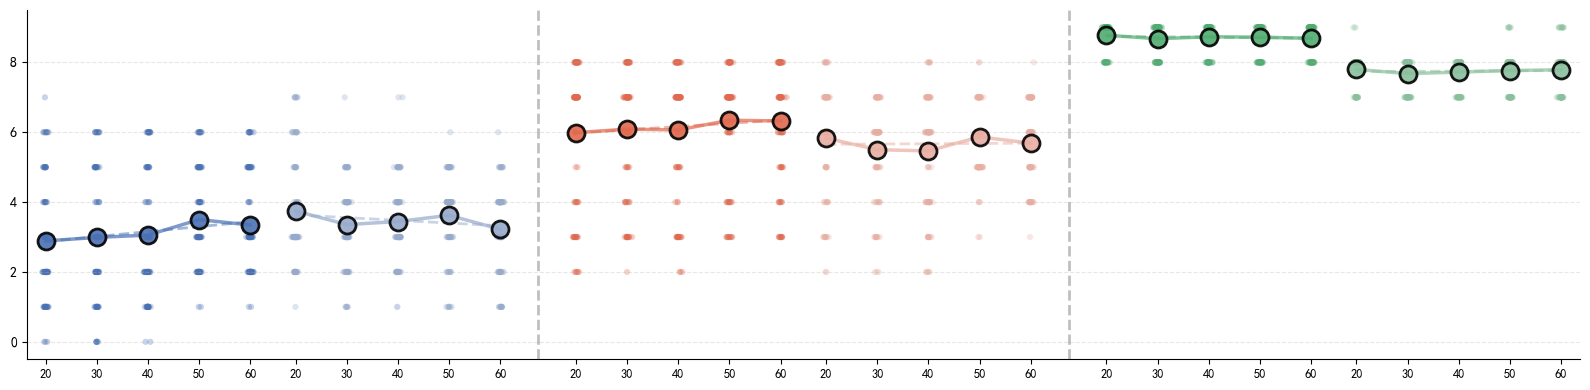


  模型: Qwen3-235B-A22B-Instruct-2507

TPP_延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=-0.6100, p=0.2746 n.s.
  情绪评分: r=-0.8693, p=0.0556 n.s.
Category 2.0:
  惩罚评分: r=0.6481, p=0.2369 n.s.
  情绪评分: r=-0.9392, p=0.0178 ***
Category 3.0:
  惩罚评分: r=0.7071, p=0.1817 n.s.
  情绪评分: r=-0.8418, p=0.0737 n.s.

已保存图片: ./TPP_延迟_Qwen3-235B-A22B-Instruct-2507.png


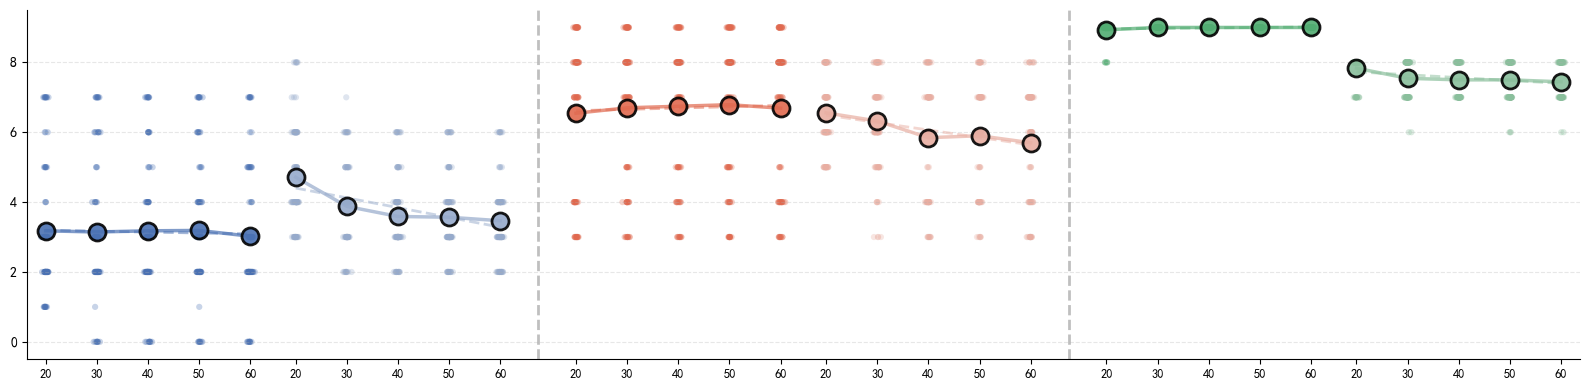


  模型: Kimi-K2-0905

TPP_延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=-0.6799, p=0.2066 n.s.
  情绪评分: r=-0.6724, p=0.2136 n.s.
Category 2.0:
  惩罚评分: r=0.5569, p=0.3296 n.s.
  情绪评分: r=-0.4715, p=0.4227 n.s.
Category 3.0:
  惩罚评分: r=0.6963, p=0.1915 n.s.
  情绪评分: r=-0.2171, p=0.7258 n.s.

已保存图片: ./TPP_延迟_Kimi-K2-0905.png


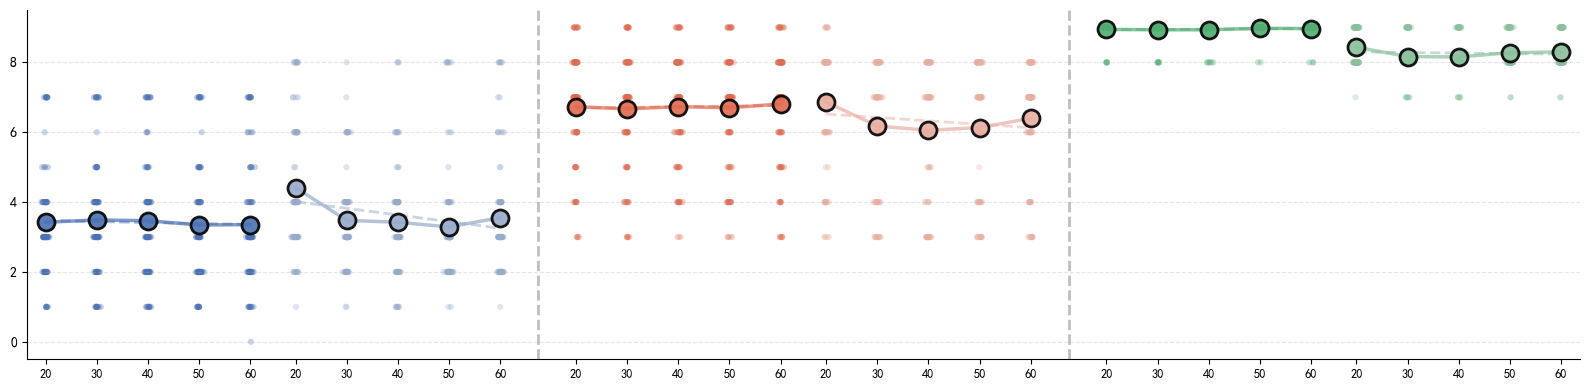


绘制: TPP_无延迟

  模型: DeepSeek-V3-Fast

TPP_无延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=0.6492, p=0.2358 n.s.
  情绪评分: r=-0.6318, p=0.2528 n.s.
Category 2.0:
  惩罚评分: r=0.6910, p=0.1963 n.s.
  情绪评分: r=-0.3386, p=0.5773 n.s.
Category 3.0:
  惩罚评分: r=0.8660, p=0.0577 n.s.
  情绪评分: r=0.8751, p=0.0520 n.s.

已保存图片: ./TPP_无延迟_DeepSeek-V3-Fast.png


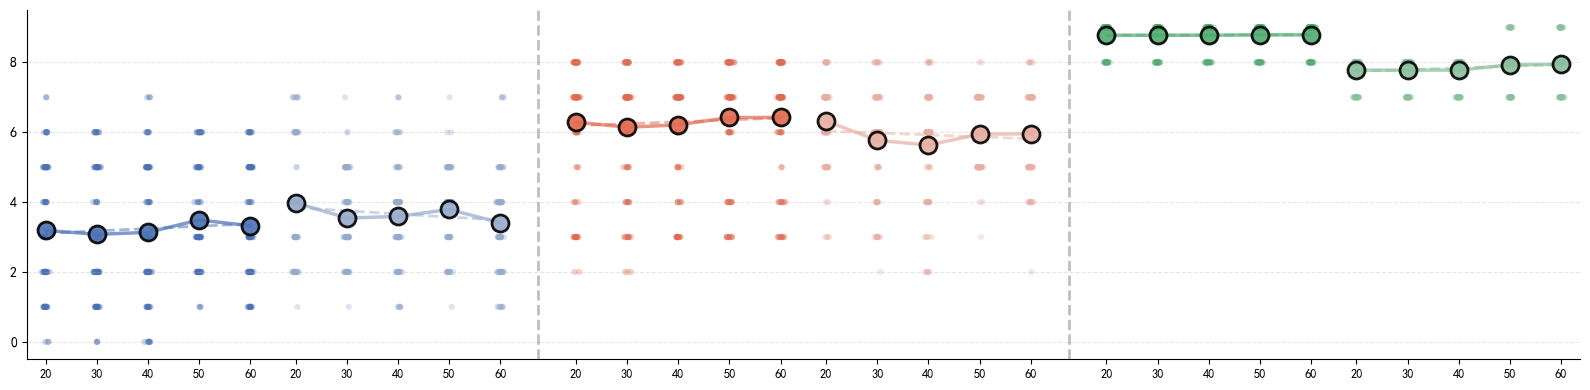


  模型: Qwen3-235B-A22B-Instruct-2507

TPP_无延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=0.0399, p=0.9492 n.s.
  情绪评分: r=-0.8802, p=0.0489 ***
Category 2.0:
  惩罚评分: r=0.6266, p=0.2580 n.s.
  情绪评分: r=-0.9696, p=0.0063 ***
Category 3.0:
  惩罚评分: r=0.9884, p=0.0015 ***
  情绪评分: r=-0.7153, p=0.1744 n.s.

已保存图片: ./TPP_无延迟_Qwen3-235B-A22B-Instruct-2507.png


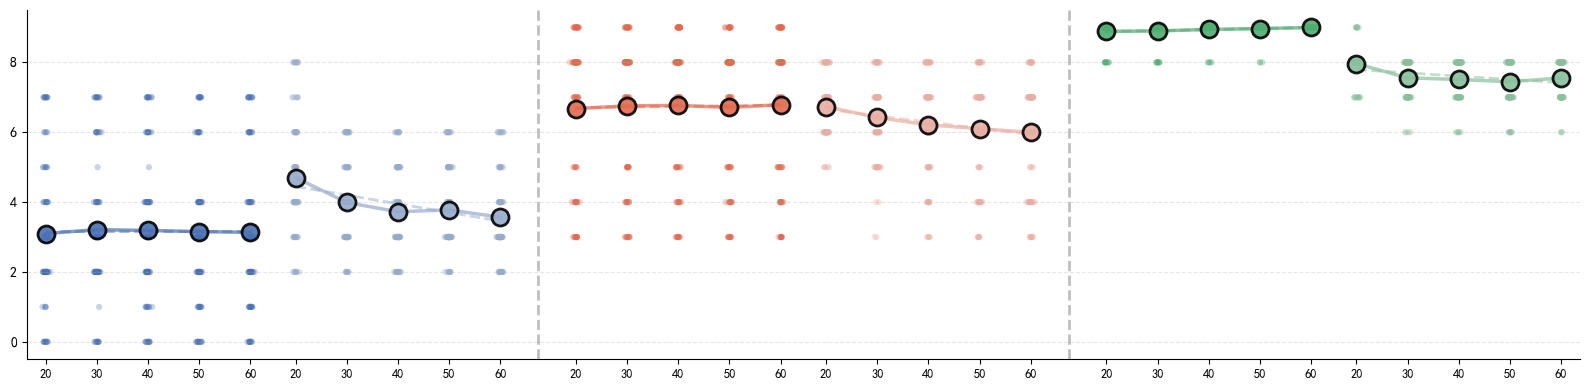


  模型: Kimi-K2-0905

TPP_无延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=-0.6554, p=0.2299 n.s.
  情绪评分: r=-0.7611, p=0.1350 n.s.
Category 2.0:
  惩罚评分: r=0.3813, p=0.5266 n.s.
  情绪评分: r=-0.4021, p=0.5022 n.s.
Category 3.0:
  惩罚评分: r=0.3536, p=0.5594 n.s.
  情绪评分: r=-0.4394, p=0.4591 n.s.

已保存图片: ./TPP_无延迟_Kimi-K2-0905.png


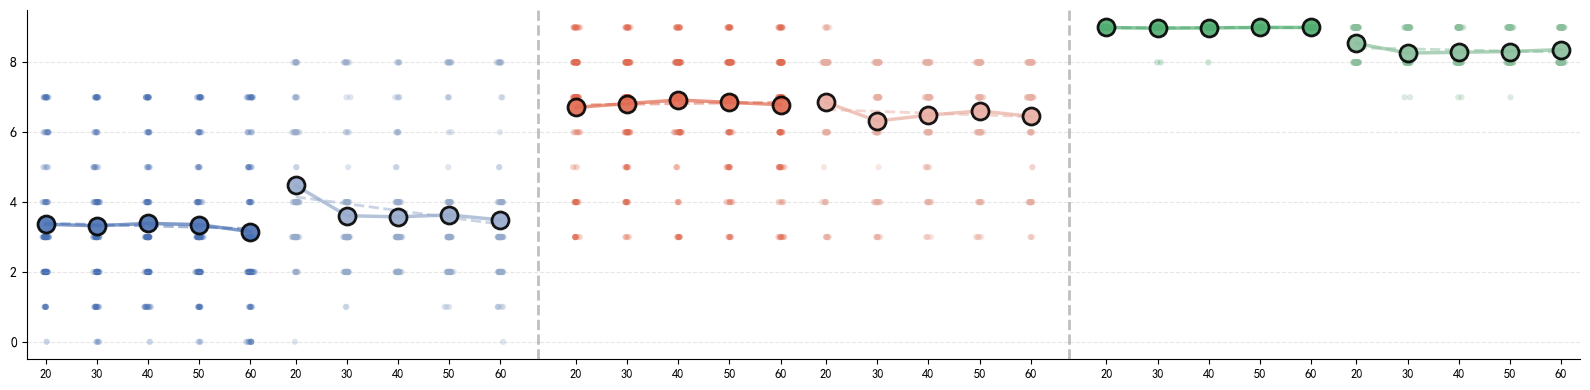


绘制: SPP_延迟

  模型: DeepSeek-V3-Fast

SPP_延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=0.7047, p=0.1838 n.s.
  情绪评分: r=-0.0163, p=0.9792 n.s.
Category 2.0:
  惩罚评分: r=0.1798, p=0.7723 n.s.
  情绪评分: r=-0.8174, p=0.0910 n.s.
Category 3.0:
  惩罚评分: r=-0.5774, p=0.3081 n.s.
  情绪评分: r=0.6337, p=0.2510 n.s.

已保存图片: ./SPP_延迟_DeepSeek-V3-Fast.png


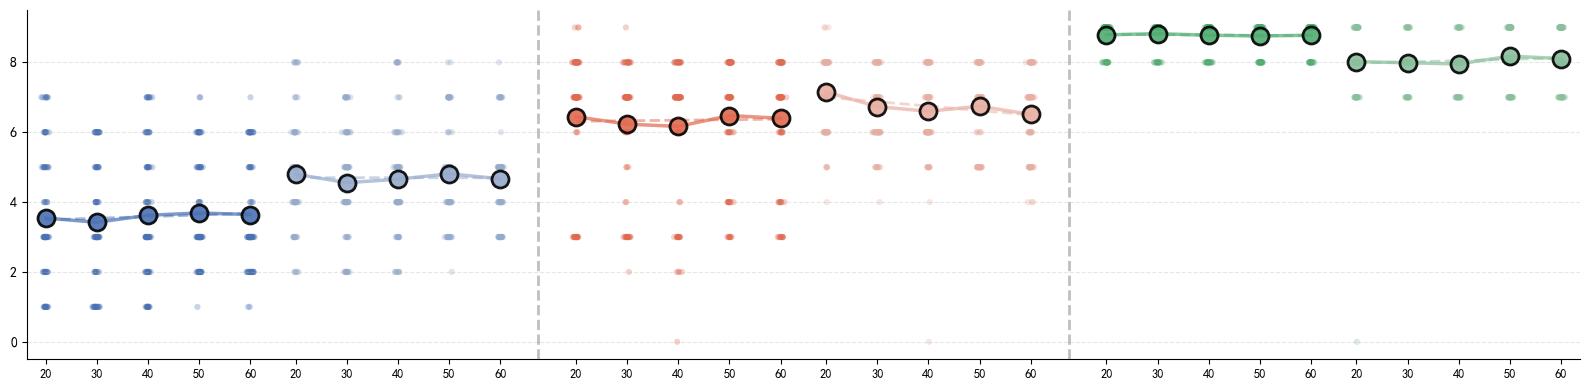


  模型: Qwen3-235B-A22B-Instruct-2507

SPP_延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=0.8769, p=0.0509 n.s.
  情绪评分: r=-0.4935, p=0.3982 n.s.
Category 2.0:
  惩罚评分: r=0.4825, p=0.4105 n.s.
  情绪评分: r=-0.1729, p=0.7810 n.s.
Category 3.0:
  惩罚评分: r=nan, p=nan n.s.
  情绪评分: r=-0.1348, p=0.8288 n.s.

已保存图片: ./SPP_延迟_Qwen3-235B-A22B-Instruct-2507.png


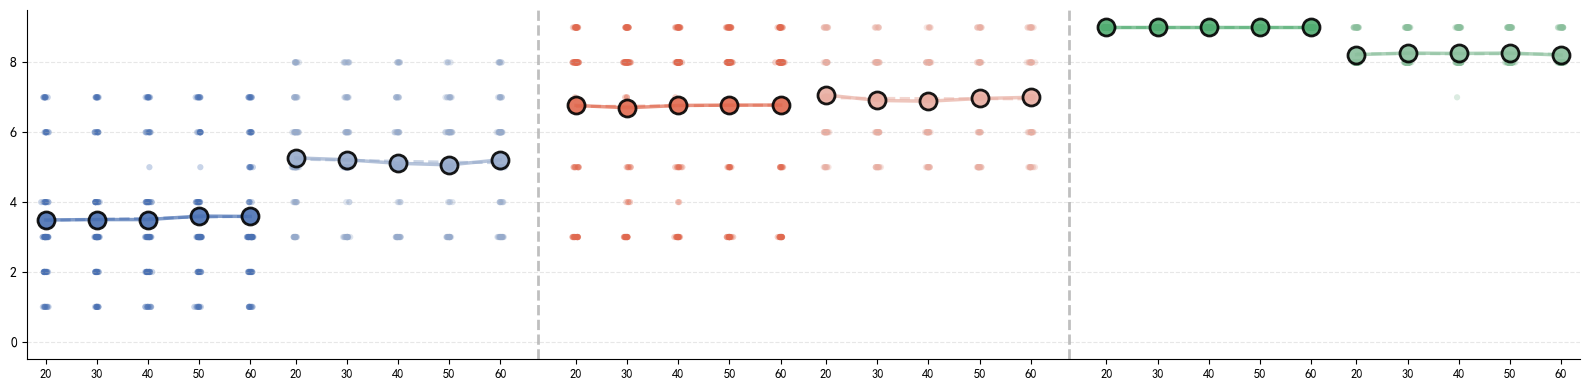


  模型: Kimi-K2-0905

SPP_延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=0.8375, p=0.0767 n.s.
  情绪评分: r=0.5057, p=0.3847 n.s.
Category 2.0:
  惩罚评分: r=0.6408, p=0.2441 n.s.
  情绪评分: r=0.2870, p=0.6397 n.s.
Category 3.0:
  惩罚评分: r=0.3536, p=0.5594 n.s.
  情绪评分: r=0.8387, p=0.0758 n.s.

已保存图片: ./SPP_延迟_Kimi-K2-0905.png


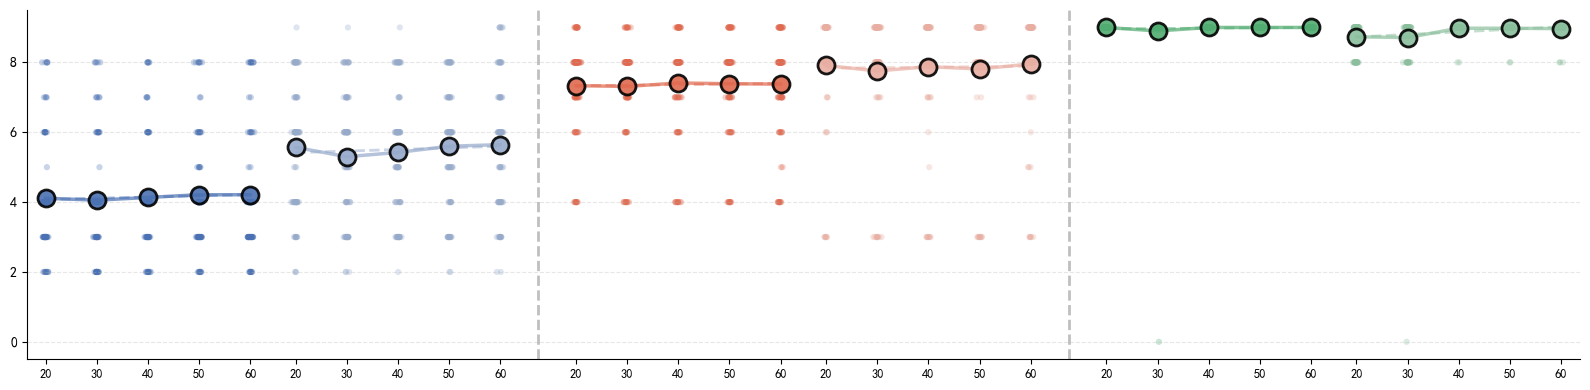


绘制: SPP_无延迟

  模型: DeepSeek-V3-Fast

SPP_无延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=0.5330, p=0.3550 n.s.
  情绪评分: r=-0.8072, p=0.0987 n.s.
Category 2.0:
  惩罚评分: r=0.5679, p=0.3180 n.s.
  情绪评分: r=-0.9077, p=0.0332 ***
Category 3.0:
  惩罚评分: r=0.3293, p=0.5885 n.s.
  情绪评分: r=0.0786, p=0.9001 n.s.

已保存图片: ./SPP_无延迟_DeepSeek-V3-Fast.png


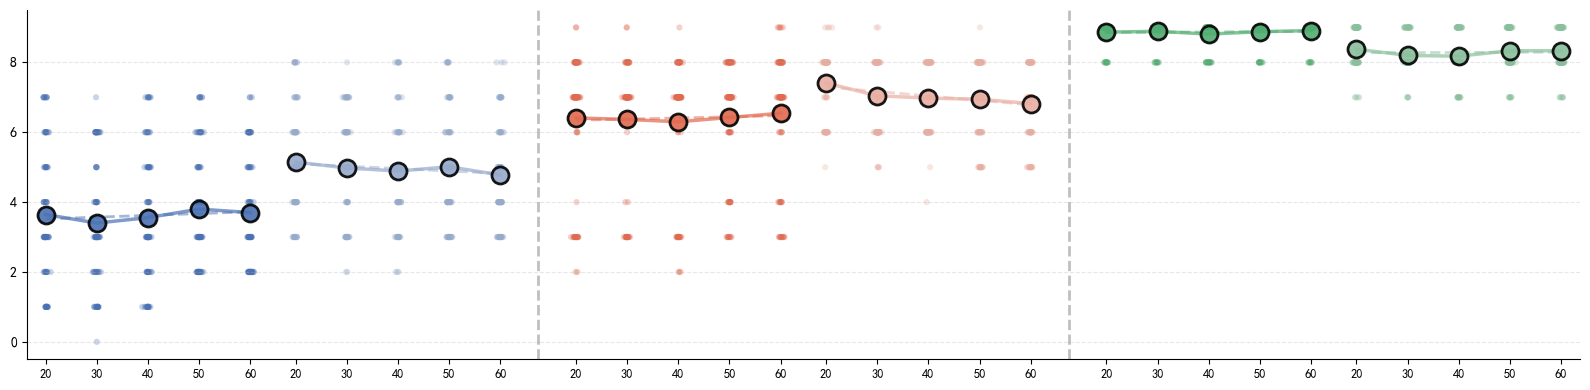


  模型: Qwen3-235B-A22B-Instruct-2507

SPP_无延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=0.9363, p=0.0191 ***
  情绪评分: r=-0.3352, p=0.5813 n.s.
Category 2.0:
  惩罚评分: r=0.2091, p=0.7358 n.s.
  情绪评分: r=-0.8630, p=0.0596 n.s.
Category 3.0:
  惩罚评分: r=nan, p=nan n.s.
  情绪评分: r=-0.2236, p=0.7177 n.s.

已保存图片: ./SPP_无延迟_Qwen3-235B-A22B-Instruct-2507.png


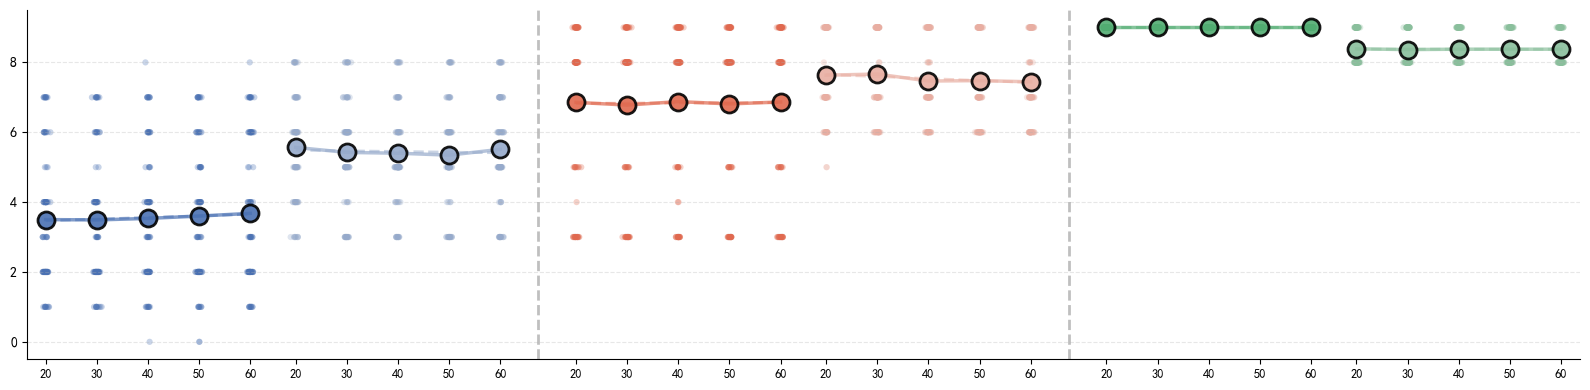


  模型: Kimi-K2-0905

SPP_无延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分: r=0.2829, p=0.6446 n.s.
  情绪评分: r=0.3677, p=0.5426 n.s.
Category 2.0:
  惩罚评分: r=0.2214, p=0.7204 n.s.
  情绪评分: r=0.0722, p=0.9081 n.s.
Category 3.0:
  惩罚评分: r=nan, p=nan n.s.
  情绪评分: r=0.6670, p=0.2188 n.s.

已保存图片: ./SPP_无延迟_Kimi-K2-0905.png


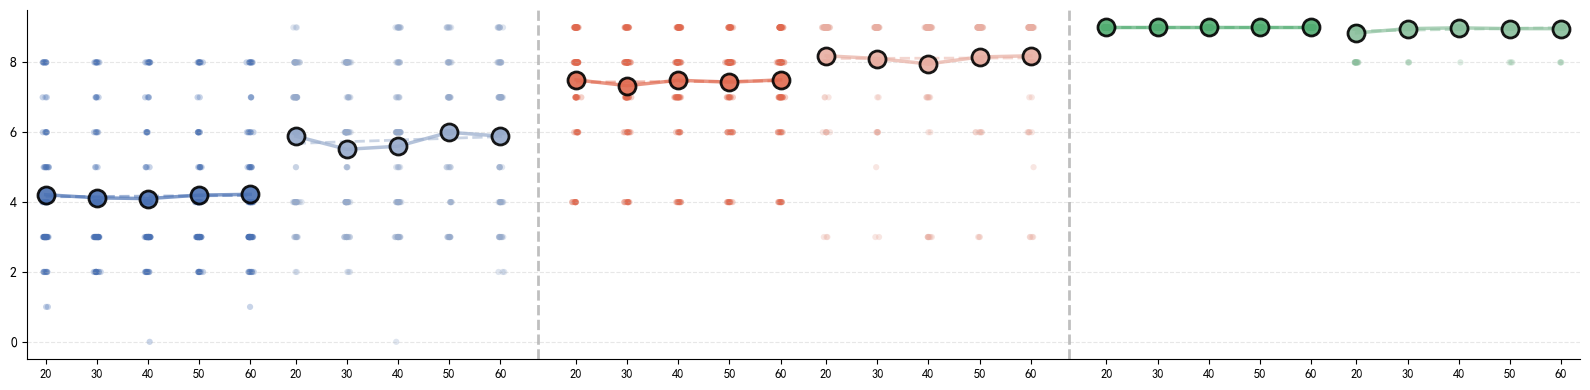



可视化完成！


In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
from matplotlib.patches import Rectangle

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 定义要分析的三个模型条件
target_conditions = [
    ('DeepSeek-V3-Fast', 'without_emotion', 'NAN-reasoning'),
    ('Qwen3-235B-A22B-Instruct-2507', 'without_emotion', 'NAN-reasoning'),
    ('Kimi-K2-0905', 'without_emotion', 'NAN-reasoning')
]

# 年龄映射到数值
age_mapping = {'age20': 20, 'age30': 30, 'age40': 40, 'age50': 50, 'age60': 60}

# 筛选目标条件的数据
filtered_data = combined_df[
    combined_df.apply(
        lambda row: (row['Model'], row['Emotion_Condition'], row['Reasoning']) in target_conditions,
        axis=1
    )
].copy()

# 添加数值年龄和延迟分类
filtered_data['Age_Numeric'] = filtered_data['Age'].map(age_mapping)
filtered_data['Delay_Class'] = filtered_data['Delay_Info'].apply(
    lambda x: '延迟' if x != 0 else '无延迟'
)

# 存储所有分析结果
all_results = []
all_plot_data = {}  # 存储用于绘图的数据
all_raw_data = {}  # 存储原始数据点

# 定义颜色函数
def tweak_color(color, h_shift=0, s_mult=1, l_mult=1):
    """
    在HLS空间中微调颜色。
    h_shift: 色相偏移量 (-1.0 to 1.0)
    s_mult: 饱和度乘数 (e.g., 1.1 for 10% more saturation)
    l_mult: 亮度乘数 (e.g., 1.2 for 20% more lightness)
    """
    r, g, b = color
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    
    new_h = (h + h_shift) % 1.0
    new_s = min(1.0, s * s_mult)
    new_l = min(1.0, l * l_mult)
    
    return colorsys.hls_to_rgb(new_h, new_l, new_s)

# 创建颜色palette
base_colors = sns.color_palette("deep", n_colors=3)
base_blue, base_orange, base_green = base_colors

# 为每个category创建深色（惩罚）和浅色（情绪）
category_colors = {
    1: {
        'rating': tweak_color(base_blue, s_mult=1.05),  # 深蓝
        'emotion': tweak_color(base_blue, l_mult=1.4, s_mult=0.85)  # 浅蓝
    },
    2: {
        'rating': tweak_color(base_orange, h_shift=-0.03, s_mult=1.05),  # 深橙红
        'emotion': tweak_color(base_orange, h_shift=-0.03, l_mult=1.3, s_mult=0.9)  # 浅橙红
    },
    3: {
        'rating': tweak_color(base_green, h_shift=0.02, s_mult=1.1),  # 深绿
        'emotion': tweak_color(base_green, h_shift=0.02, l_mult=1.3, s_mult=0.9)  # 浅绿
    }
}

# 4大块分析：TPP/SPP × 延迟/无延迟
for role in ['TPP', 'SPP']:
    for delay_class in ['延迟', '无延迟']:
        
        print("\n" + "=" * 120)
        print(f"【{role} - {delay_class}】")
        print("=" * 120)
        
        # 筛选当前块的数据
        block_data = filtered_data[
            (filtered_data['Role'] == role) &
            (filtered_data['Delay_Class'] == delay_class)
        ]
        
        if len(block_data) == 0:
            print(f"无数据")
            continue
        
        # 初始化这个块的绘图数据
        block_key = f"{role}_{delay_class}"
        all_plot_data[block_key] = {}
        all_raw_data[block_key] = {}
        
        # 对每个模型进行分析
        for model, emotion, reasoning in target_conditions:
            
            model_data = block_data[block_data['Model'] == model]
            
            if len(model_data) == 0:
                continue
            
            print(f"\n{'='*60}")
            print(f"模型: {model}")
            print(f"{'='*60}")
            
            # 初始化这个模型的绘图数据
            all_plot_data[block_key][model] = {}
            all_raw_data[block_key][model] = {}
            
            # 获取所有category
            categories = sorted(model_data['Category'].unique())
            
            # 对每个category分析
            for category in categories:
                
                category_data = model_data[model_data['Category'] == category]
                
                if len(category_data) == 0:
                    continue
                
                print(f"\n  Category {category}:")
                print(f"  {'-'*56}")
                
                # 保存原始数据点
                all_raw_data[block_key][model][category] = category_data[['Age_Numeric', 'Rating', 'Emotion']].copy()
                
                # 按年龄分组，计算平均Rating和Emotion
                age_stats = category_data.groupby('Age_Numeric').agg({
                    'Rating': 'mean',
                    'Emotion': 'mean',
                    'List2': 'count'
                }).reset_index()
                
                age_stats.columns = ['Age', 'Mean_Rating', 'Mean_Emotion', 'Sample_Count']
                
                # 保存绘图数据
                all_plot_data[block_key][model][category] = age_stats.copy()
                
                # # 显示每个年龄的统计
                # print(f"\n  各年龄数据:")
                # for _, row in age_stats.iterrows():
                #     print(f"    年龄{int(row['Age'])}: 惩罚评分={row['Mean_Rating']:.3f}, "
                #           f"情绪评分={row['Mean_Emotion']:.3f}, 样本数={int(row['Sample_Count'])}")
                
                # 如果至少有3个年龄点，进行线性相关分析
                if len(age_stats) >= 3:
                    
                    ages = age_stats['Age'].values
                    ratings = age_stats['Mean_Rating'].values
                    emotions = age_stats['Mean_Emotion'].values
                    
                    # 计算惩罚评分与年龄的相关性
                    r_rating, p_rating = stats.pearsonr(ages, ratings)
                    
                    # 计算情绪评分与年龄的相关性
                    r_emotion, p_emotion = stats.pearsonr(ages, emotions)
                    
                    print(f"\n  线性相关分析:")
                    print(f"    惩罚评分与年龄: r={r_rating:.4f}, p={p_rating:.4f} {'***显著' if p_rating < 0.05 else '不显著'}")
                    print(f"    情绪评分与年龄: r={r_emotion:.4f}, p={p_emotion:.4f} {'***显著' if p_emotion < 0.05 else '不显著'}")
                    
                    # 保存结果
                    result_entry = {
                        'Role': role,
                        'Delay_Class': delay_class,
                        'Model': model,
                        'Category': category,
                        'N_Ages': len(age_stats),
                        'Total_Samples': age_stats['Sample_Count'].sum(),
                        'Rating_r': r_rating,
                        'Rating_p': p_rating,
                        'Rating_Significant': p_rating < 0.05,
                        'Emotion_r': r_emotion,
                        'Emotion_p': p_emotion,
                        'Emotion_Significant': p_emotion < 0.05
                    }
                    
                    all_results.append(result_entry)
                    
                else:
                    print(f"\n  年龄点数不足({len(age_stats)}个)，无法进行相关性分析（需至少3个）")

# 汇总分析
print("\n\n" + "=" * 120)
print("汇总分析")
print("=" * 120)

if len(all_results) > 0:
    results_df = pd.DataFrame(all_results)
    
    # 1. 显著性统计
    print("\n【显著性结果统计】")
    print("-" * 120)
    
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            block_results = results_df[
                (results_df['Role'] == role) &
                (results_df['Delay_Class'] == delay_class)
            ]
            
            if len(block_results) > 0:
                print(f"\n{role} - {delay_class}:")
                
                rating_sig = block_results['Rating_Significant'].sum()
                emotion_sig = block_results['Emotion_Significant'].sum()
                total = len(block_results)
                
                print(f"  总分析数: {total}")
                print(f"  惩罚评分显著: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
                print(f"  情绪评分显著: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
    
    # 2. 按模型统计
    print("\n\n【按模型统计】")
    print("-" * 120)
    
    for model, _, _ in target_conditions:
        model_results = results_df[results_df['Model'] == model]
        
        if len(model_results) > 0:
            print(f"\n{model}:")
            
            rating_sig = model_results['Rating_Significant'].sum()
            emotion_sig = model_results['Emotion_Significant'].sum()
            total = len(model_results)
            
            print(f"  总分析数: {total}")
            print(f"  惩罚评分显著: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
            print(f"  情绪评分显著: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
            
            # 按Role和Delay细分
            for role in ['TPP', 'SPP']:
                for delay_class in ['延迟', '无延迟']:
                    subset = model_results[
                        (model_results['Role'] == role) &
                        (model_results['Delay_Class'] == delay_class)
                    ]
                    
                    if len(subset) > 0:
                        rating_sig_sub = subset['Rating_Significant'].sum()
                        emotion_sig_sub = subset['Emotion_Significant'].sum()
                        total_sub = len(subset)
                        
                        print(f"    {role}-{delay_class}: 惩罚{rating_sig_sub}/{total_sub}, "
                              f"情绪{emotion_sig_sub}/{total_sub}")
    
    # 3. 显著结果详细列表
    print("\n\n【显著结果详细列表】")
    print("-" * 120)
    
    sig_results = results_df[
        (results_df['Rating_Significant'] == True) | 
        (results_df['Emotion_Significant'] == True)
    ]
    
    if len(sig_results) > 0:
        print(f"\n共有 {len(sig_results)} 个显著结果:\n")
        
        for _, row in sig_results.iterrows():
            print(f"{row['Role']}-{row['Delay_Class']} | {row['Model']} | Category {row['Category']}:")
            
            if row['Rating_Significant']:
                print(f"  惩罚评分: r={row['Rating_r']:.4f}, p={row['Rating_p']:.4f} ***")
            
            if row['Emotion_Significant']:
                print(f"  情绪评分: r={row['Emotion_r']:.4f}, p={row['Emotion_p']:.4f} ***")
            
            print()
    else:
        print("\n未发现显著结果")

else:
    print("\n无可分析数据")

print("\n分析完成！")

def plot_model_results(block_key, model, plot_data, raw_data, results_df, save_path=None):
    """
    为单个模型绘制结果图 - 所有category在一个图中
    """
    # 获取该模型的所有category数据
    model_data = plot_data.get(model, {})
    model_raw = raw_data.get(model, {})
    
    if not model_data:
        print(f"模型 {model} 在 {block_key} 中无数据")
        return
    
    categories = sorted(model_data.keys())
    n_categories = len(categories)
    
    if n_categories == 0:
        return
    
    # 创建单个图形
    fig, ax = plt.subplots(1, 1, figsize=(16, 4))
    
    role, delay_class = block_key.split('_')
    # fig.suptitle(f'{role} - {delay_class} | {model}', fontsize=18, fontweight='bold', y=0.98)
    
    # 年龄刻度
    age_ticks = [20, 30, 40, 50, 60]
    
    # 定义category在X轴的位置区间 - 调整间距
    # 每个category占据更紧凑的空间，左右边距更小
    category_width = 60  # 每个category的总宽度
    gap_between_categories = 10  # category之间的间隔
    left_margin = 2  # 左边距
    
    category_positions = {}
    for i, cat in enumerate(categories):
        start = left_margin + i * (category_width + gap_between_categories)
        end = start + category_width
        category_positions[cat] = (start, end)
    
    # 存储所有数据点用于设置y轴范围
    all_y_values = []
    
    # 对每个category绘图
    for category in categories:
        age_stats = model_data[category]
        raw_df = model_raw[category]
        
        if len(age_stats) == 0:
            continue
        
        # 获取该category的X轴位置范围
        x_start, x_end = category_positions[category]
        x_center = (x_start + x_end) / 2
        
        # 将年龄映射到该category的X轴范围
        def map_age_to_x(age, score_type='rating'):
            # 在category范围内，rating在左半边，emotion在右半边
            age_range = max(age_ticks) - min(age_ticks)
            normalized = (age - min(age_ticks)) / age_range  # 0到1
            
            # 惩罚评分占40%，中间间隔占10%，情绪评分占45%
            rating_width = (x_end - x_start) * 0.45
            gap_width = (x_end - x_start) * 0.1
            emotion_width = (x_end - x_start) * 0.45
            
            if score_type == 'rating':
                # 惩罚评分占左边45%
                return x_start + normalized * rating_width
            else:
                # 情绪评分占右边45%
                return x_start + rating_width + gap_width + normalized * emotion_width
        
        ages = age_stats['Age'].values
        ratings = age_stats['Mean_Rating'].values
        emotions = age_stats['Mean_Emotion'].values
        
        # 获取颜色
        rating_color = category_colors[category]['rating']
        emotion_color = category_colors[category]['emotion']
        
        # 获取相关性结果
        result_row = results_df[
            (results_df['Role'] == role) &
            (results_df['Delay_Class'] == delay_class) &
            (results_df['Model'] == model) &
            (results_df['Category'] == category)
        ]
        
        # ===== 绘制惩罚评分（Rating） =====
        
        # 1. 绘制所有原始数据点（小散点）
        raw_ages_rating = raw_df['Age_Numeric'].values
        raw_ratings = raw_df['Rating'].values
        x_positions_raw_rating = [map_age_to_x(age, 'rating') for age in raw_ages_rating]
        
        # 添加一些随机抖动避免重叠
        jitter = np.random.normal(0, 0.2, len(x_positions_raw_rating))
        x_positions_raw_rating_jittered = x_positions_raw_rating + jitter
        
        ax.scatter(x_positions_raw_rating_jittered, raw_ratings, 
                  s=20, color=rating_color, alpha=0.3, 
                  edgecolors='none', zorder=1)
        
        all_y_values.extend(raw_ratings)
        
        # 2. 绘制均值点（大散点）
        x_positions_rating = [map_age_to_x(age, 'rating') for age in ages]
        ax.scatter(x_positions_rating, ratings, 
                  s=150, color=rating_color, alpha=0.9,
                  edgecolors='black', linewidth=2, zorder=4,
                  label=f'Category {category} - 惩罚评分(均值)')
        
        # 3. 绘制折线图
        ax.plot(x_positions_rating, ratings, 
               color=rating_color, linewidth=2.5, alpha=0.7, zorder=3)
        
        # 4. 绘制回归直线
        if len(ages) >= 2:
            slope, intercept = np.polyfit(ages, ratings, 1)
            line_ages = np.linspace(min(age_ticks), max(age_ticks), 100)
            line_y = slope * line_ages + intercept
            line_x = [map_age_to_x(age, 'rating') for age in line_ages]
            ax.plot(line_x, line_y, '--', color=rating_color, 
                   linewidth=2, alpha=0.5, zorder=2)
        
        all_y_values.extend(ratings)
        
        # ===== 绘制情绪评分（Emotion） =====
        
        # 1. 绘制所有原始数据点（小散点）
        raw_emotions = raw_df['Emotion'].values
        x_positions_raw_emotion = [map_age_to_x(age, 'emotion') for age in raw_ages_rating]
        
        # 添加一些随机抖动避免重叠
        jitter = np.random.normal(0, 0.2, len(x_positions_raw_emotion))
        x_positions_raw_emotion_jittered = x_positions_raw_emotion + jitter
        
        ax.scatter(x_positions_raw_emotion_jittered, raw_emotions,
                  s=20, color=emotion_color, alpha=0.3,
                  edgecolors='none', zorder=1)
        
        all_y_values.extend(raw_emotions)
        
        # 2. 绘制均值点（大散点）
        x_positions_emotion = [map_age_to_x(age, 'emotion') for age in ages]
        ax.scatter(x_positions_emotion, emotions,
                  s=150, color=emotion_color, alpha=0.9,
                  edgecolors='black', linewidth=2, zorder=4,
                  label=f'Category {category} - 情绪评分(均值)')
        
        # 3. 绘制折线图
        ax.plot(x_positions_emotion, emotions,
               color=emotion_color, linewidth=2.5, alpha=0.7, zorder=3)
        
        # 4. 绘制回归直线
        if len(ages) >= 2:
            slope, intercept = np.polyfit(ages, emotions, 1)
            line_ages = np.linspace(min(age_ticks), max(age_ticks), 100)
            line_y = slope * line_ages + intercept
            line_x = [map_age_to_x(age, 'emotion') for age in line_ages]
            ax.plot(line_x, line_y, '--', color=emotion_color,
                   linewidth=2, alpha=0.5, zorder=2)
        
        all_y_values.extend(emotions)
    
    # 绘制category之间的分隔线
    if n_categories > 1:
        for i in range(1, n_categories):
            prev_cat = categories[i-1]
            curr_cat = categories[i]
            x_sep = category_positions[prev_cat][1] + gap_between_categories / 2
            ax.axvline(x=x_sep, color='gray', linestyle='--', 
                      linewidth=2, alpha=0.5, zorder=0)
    
    # # 设置坐标轴
    # ax.set_xlabel('年龄组别（按Category分组）', fontsize=14, fontweight='bold')
    # ax.set_ylabel('评分', fontsize=14, fontweight='bold')
    
    # 设置X轴刻度 - 为惩罚和情绪都添加刻度
    x_tick_positions = []
    x_tick_labels = []
    
    for category in categories:
        x_start, x_end = category_positions[category]
        
        # 重新计算位置（与map_age_to_x保持一致）
        rating_width = (x_end - x_start) * 0.45  # 改为0.45
        gap_width = (x_end - x_start) * 0.1      # 改为0.1
        emotion_width = (x_end - x_start) * 0.45 # 改为0.45
        
        # 为惩罚评分添加刻度
        for age in age_ticks:
            age_range = max(age_ticks) - min(age_ticks)
            normalized = (age - min(age_ticks)) / age_range
            x_rating = x_start + normalized * rating_width
            x_tick_positions.append(x_rating)
            x_tick_labels.append(str(age))
        
        # 为情绪评分添加刻度
        for age in age_ticks:
            age_range = max(age_ticks) - min(age_ticks)
            normalized = (age - min(age_ticks)) / age_range
            x_emotion = x_start + rating_width + gap_width + normalized * emotion_width
            x_tick_positions.append(x_emotion)
            x_tick_labels.append(str(age))
    
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, fontsize=9)
    
    # 设置X轴范围，减少边距
    if categories:
        first_cat = categories[0]
        last_cat = categories[-1]
        x_min = category_positions[first_cat][0] - 2.5
        x_max = category_positions[last_cat][1] + 2.5
        ax.set_xlim(x_min, x_max)
    
    # 设置Y轴范围
    # if all_y_values:
    #     y_min = min(all_y_values) - 0.5
    #     y_max = max(all_y_values) + 0.5
    #     ax.set_ylim(y_min, y_max)
    ax.set_ylim(-0.5, 9.5)
    ax.set_yticks([0, 2, 4, 6, 8])
    
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')
    # ax.legend(loc='upper left', fontsize=10, framealpha=0.9)
    # 删除上边框和右边框，只保留下边框和左边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 打印显著性信息到控制台
    print(f"\n{block_key} - {model} 显著性结果:")
    print("-" * 80)
    for category in categories:
        result_row = results_df[
            (results_df['Role'] == role) &
            (results_df['Delay_Class'] == delay_class) &
            (results_df['Model'] == model) &
            (results_df['Category'] == category)
        ]
        
        if not result_row.empty:
            r_rating = result_row.iloc[0]['Rating_r']
            p_rating = result_row.iloc[0]['Rating_p']
            sig_rating = '***' if p_rating < 0.05 else 'n.s.'
            
            r_emotion = result_row.iloc[0]['Emotion_r']
            p_emotion = result_row.iloc[0]['Emotion_p']
            sig_emotion = '***' if p_emotion < 0.05 else 'n.s.'
            
            print(f"Category {category}:")
            print(f"  惩罚评分: r={r_rating:.4f}, p={p_rating:.4f} {sig_rating}")
            print(f"  情绪评分: r={r_emotion:.4f}, p={p_emotion:.4f} {sig_emotion}")
    
    plt.tight_layout()
    
    if save_path:
        filename = f'{save_path}/{block_key}_{model.replace("/", "_")}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"\n已保存图片: {filename}")
    
    plt.show()

# 为每个块的每个模型生成图形
print("\n\n" + "=" * 120)
print("开始生成可视化图形")
print("=" * 120)

for block_key in all_plot_data.keys():
    block_plot_data = all_plot_data[block_key]
    block_raw_data = all_raw_data[block_key]
    
    if not block_plot_data:
        continue
    
    print(f"\n{'='*60}")
    print(f"绘制: {block_key}")
    print(f"{'='*60}")
    
    for model in block_plot_data.keys():
        print(f"\n  模型: {model}")
        plot_model_results(block_key, model, block_plot_data, block_raw_data, 
                          results_df, save_path='.')

print("\n\n可视化完成！")


【TPP - 延迟】

模型: DeepSeek-V3-Fast

  Category 1.0:
  --------------------------------------------------------

  各年龄数据:
    年龄20: 惩罚评分=2.889, 情绪评分=3.744, 样本数=90
    年龄30: 惩罚评分=2.989, 情绪评分=3.356, 样本数=90
    年龄40: 惩罚评分=3.056, 情绪评分=3.444, 样本数=90
    年龄50: 惩罚评分=3.500, 情绪评分=3.622, 样本数=90
    年龄60: 惩罚评分=3.344, 情绪评分=3.222, 样本数=90

  线性相关分析:
    惩罚评分与年龄: r=0.8766, p=0.0510 不显著
    情绪评分与年龄: r=-0.5908, p=0.2942 不显著

  Category 2.0:
  --------------------------------------------------------

  各年龄数据:
    年龄20: 惩罚评分=5.989, 情绪评分=5.833, 样本数=90
    年龄30: 惩罚评分=6.089, 情绪评分=5.500, 样本数=90
    年龄40: 惩罚评分=6.067, 情绪评分=5.467, 样本数=90
    年龄50: 惩罚评分=6.344, 情绪评分=5.867, 样本数=90
    年龄60: 惩罚评分=6.322, 情绪评分=5.689, 样本数=90

  线性相关分析:
    惩罚评分与年龄: r=0.9071, p=0.0335 ***显著
    情绪评分与年龄: r=0.0667, p=0.9151 不显著

  Category 3.0:
  --------------------------------------------------------

  各年龄数据:
    年龄20: 惩罚评分=8.778, 情绪评分=7.800, 样本数=90
    年龄30: 惩罚评分=8.678, 情绪评分=7.678, 样本数=90
    年龄40: 惩罚评分=8.733, 情绪评分=7.722, 样本数=90
    年龄

c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


已保存图片: ./TPP_延迟_DeepSeek-V3-Fast.png


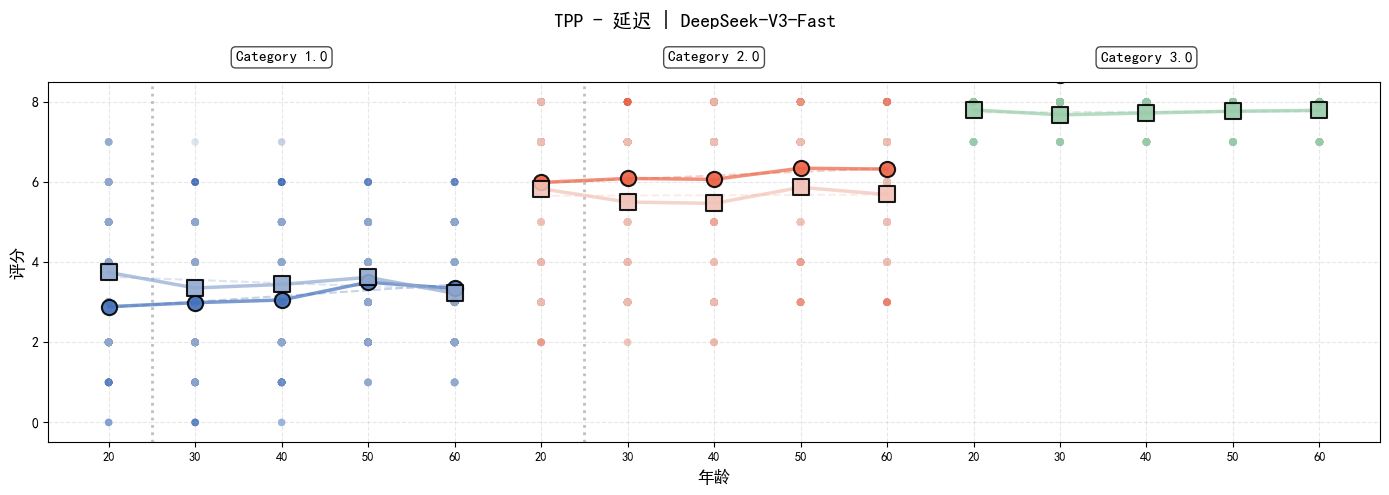


  模型: Qwen3-235B-A22B-Instruct-2507
已保存图片: ./TPP_延迟_Qwen3-235B-A22B-Instruct-2507.png


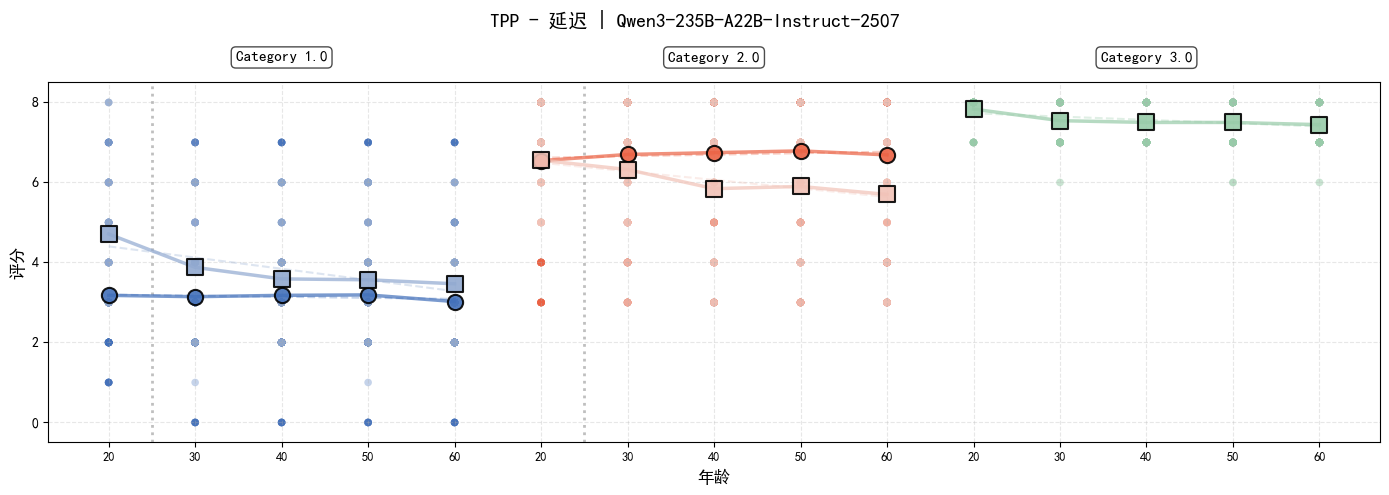


  模型: Kimi-K2-0905
已保存图片: ./TPP_延迟_Kimi-K2-0905.png


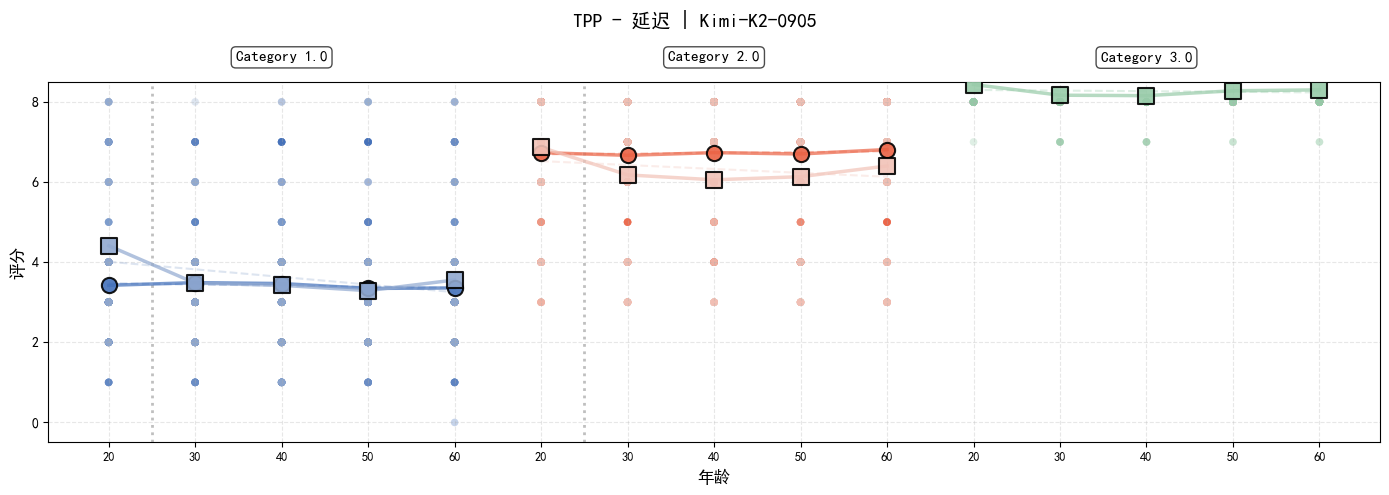


绘制: TPP_无延迟

  模型: DeepSeek-V3-Fast
已保存图片: ./TPP_无延迟_DeepSeek-V3-Fast.png


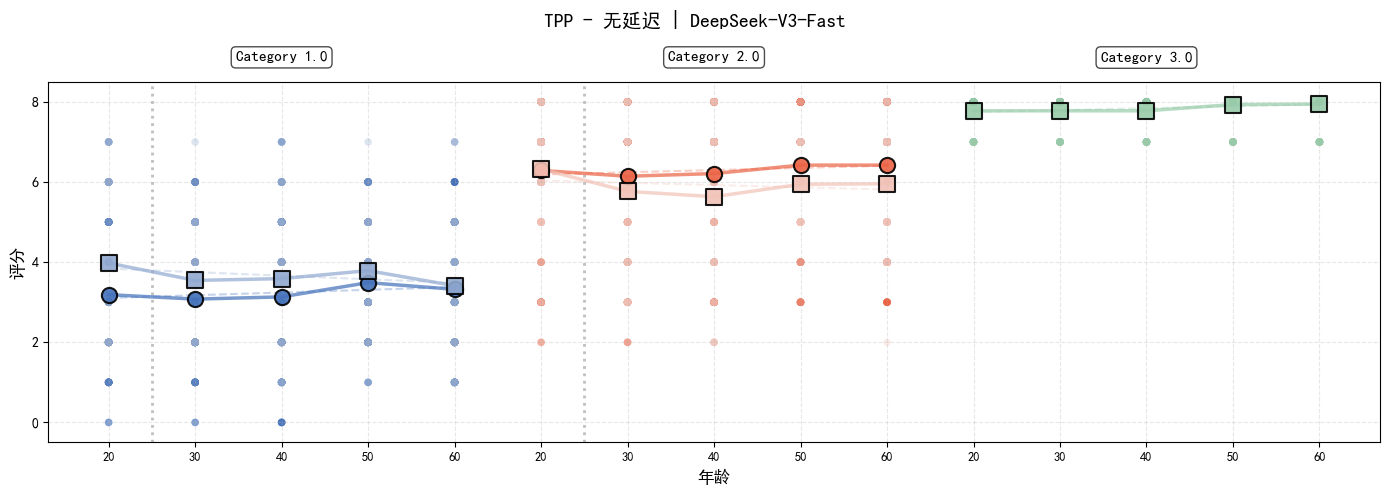


  模型: Qwen3-235B-A22B-Instruct-2507
已保存图片: ./TPP_无延迟_Qwen3-235B-A22B-Instruct-2507.png


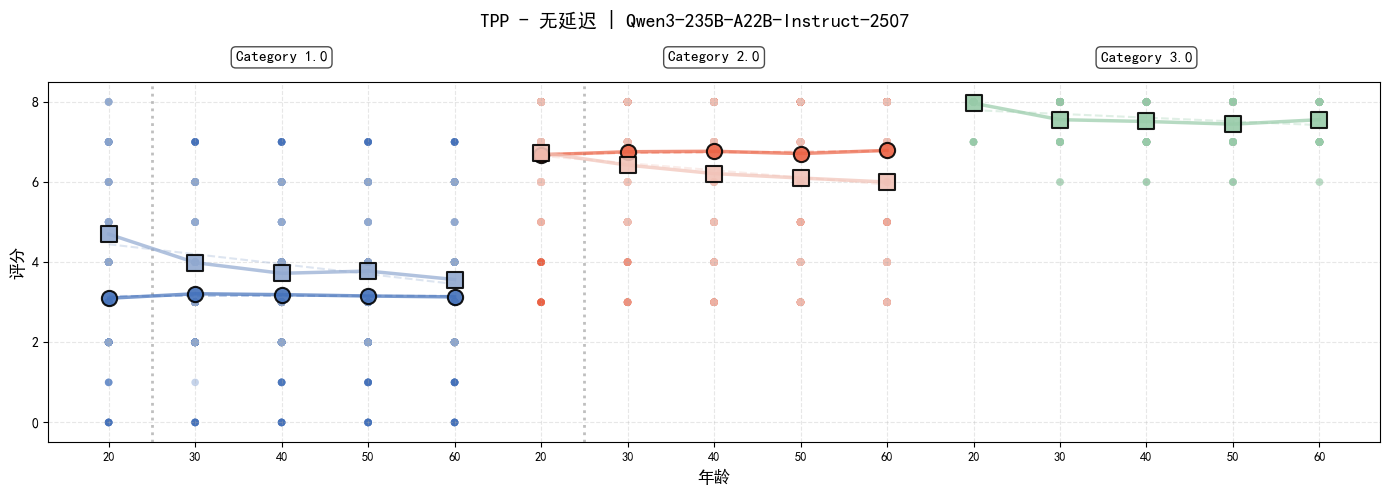


  模型: Kimi-K2-0905
已保存图片: ./TPP_无延迟_Kimi-K2-0905.png


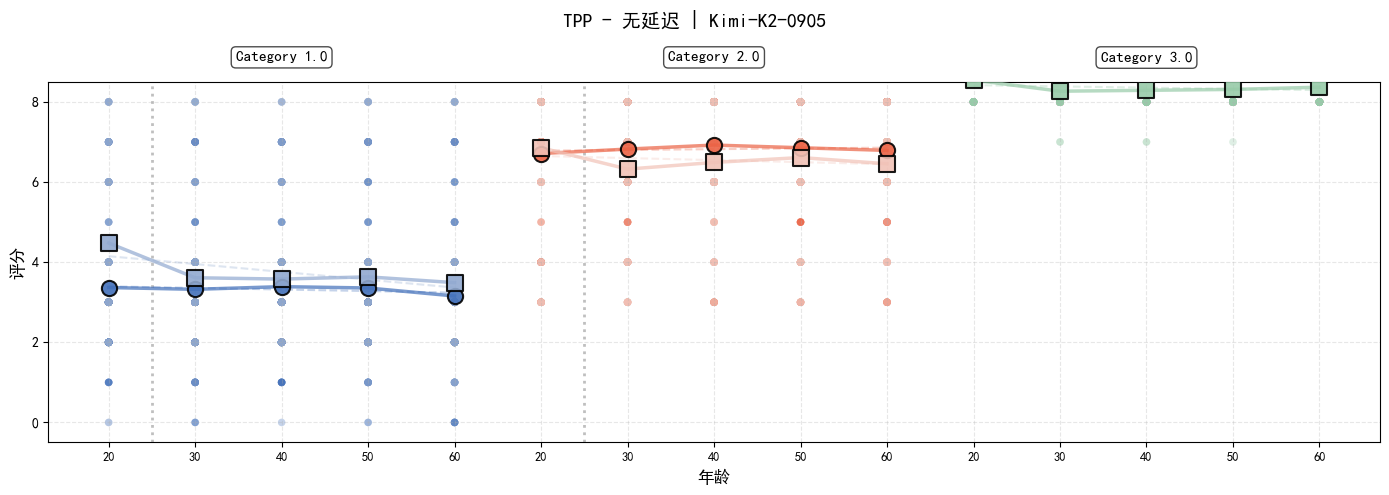


绘制: SPP_延迟

  模型: DeepSeek-V3-Fast
已保存图片: ./SPP_延迟_DeepSeek-V3-Fast.png


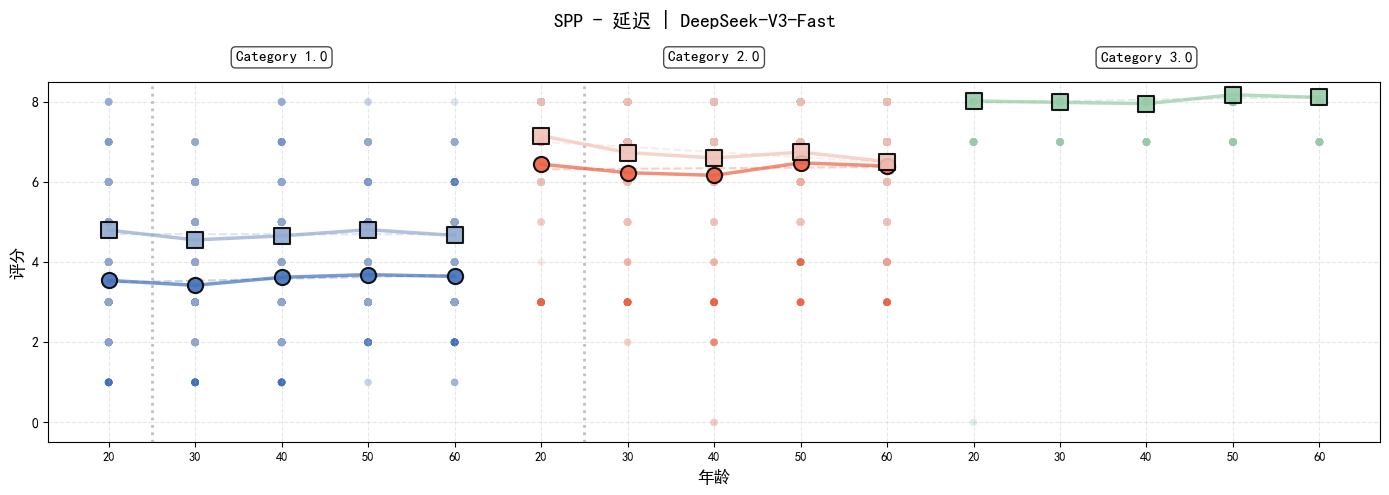


  模型: Qwen3-235B-A22B-Instruct-2507
已保存图片: ./SPP_延迟_Qwen3-235B-A22B-Instruct-2507.png


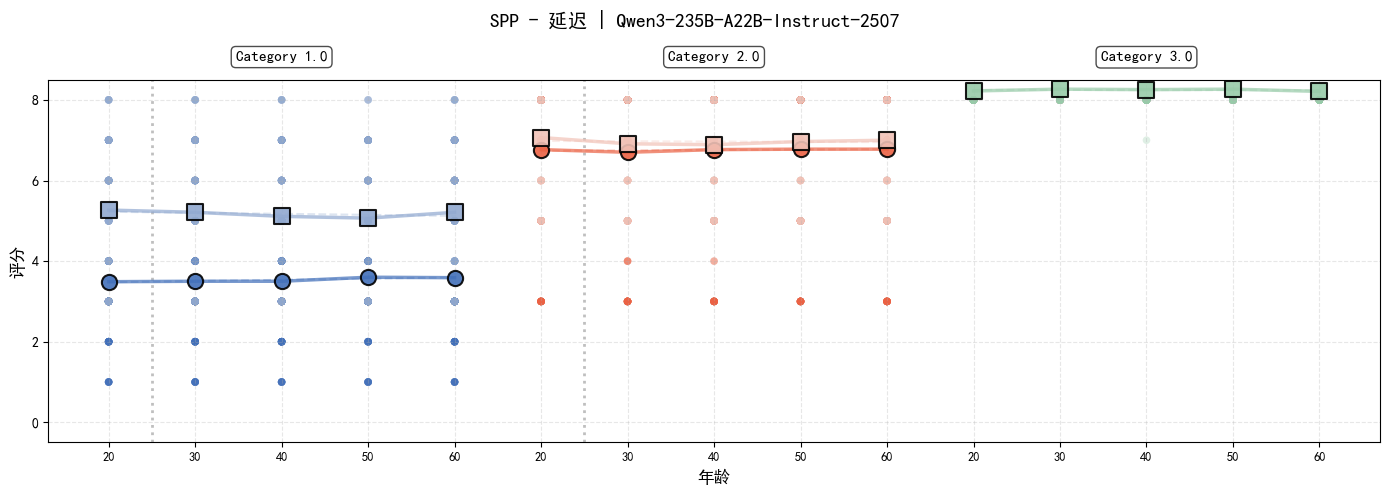


  模型: Kimi-K2-0905
已保存图片: ./SPP_延迟_Kimi-K2-0905.png


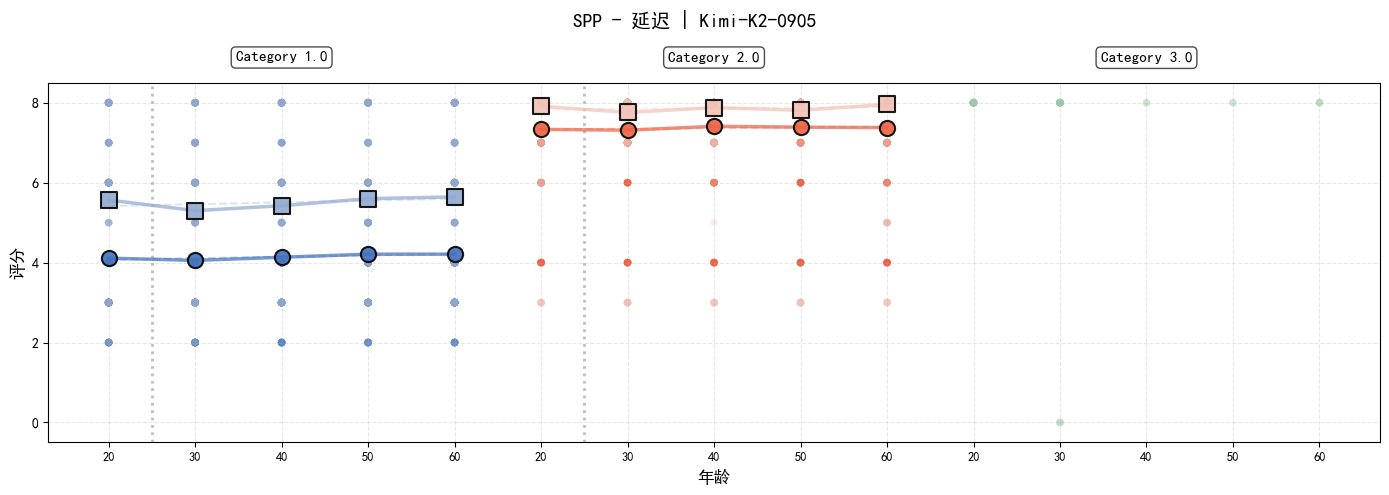


绘制: SPP_无延迟

  模型: DeepSeek-V3-Fast
已保存图片: ./SPP_无延迟_DeepSeek-V3-Fast.png


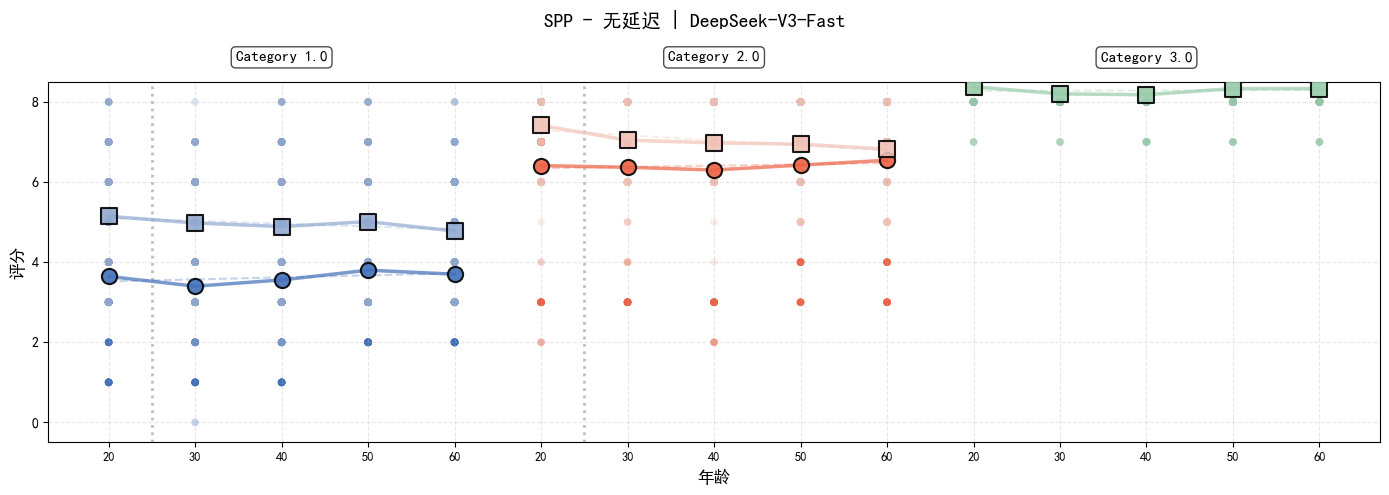


  模型: Qwen3-235B-A22B-Instruct-2507
已保存图片: ./SPP_无延迟_Qwen3-235B-A22B-Instruct-2507.png


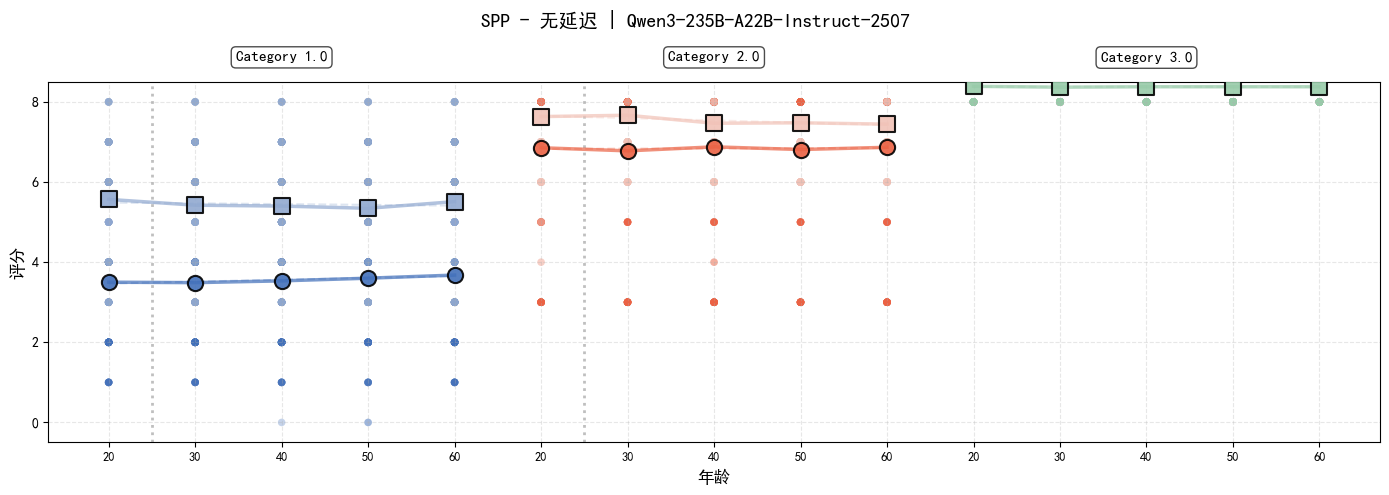


  模型: Kimi-K2-0905
已保存图片: ./SPP_无延迟_Kimi-K2-0905.png


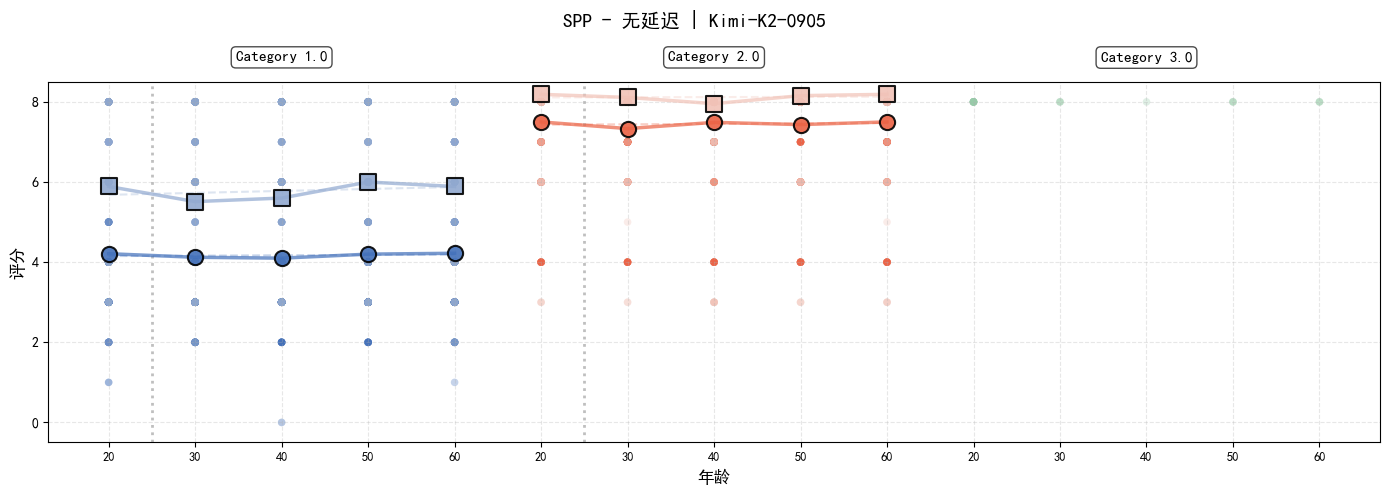



可视化完成！


In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
from matplotlib.patches import Rectangle

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 定义要分析的三个模型条件
target_conditions = [
    ('DeepSeek-V3-Fast', 'without_emotion', 'NAN-reasoning'),
    ('Qwen3-235B-A22B-Instruct-2507', 'without_emotion', 'NAN-reasoning'),
    ('Kimi-K2-0905', 'without_emotion', 'NAN-reasoning')
]

# 年龄映射到数值
age_mapping = {'age20': 20, 'age30': 30, 'age40': 40, 'age50': 50, 'age60': 60}

# 筛选目标条件的数据
filtered_data = combined_df[
    combined_df.apply(
        lambda row: (row['Model'], row['Emotion_Condition'], row['Reasoning']) in target_conditions,
        axis=1
    )
].copy()

# 添加数值年龄和延迟分类
filtered_data['Age_Numeric'] = filtered_data['Age'].map(age_mapping)
filtered_data['Delay_Class'] = filtered_data['Delay_Info'].apply(
    lambda x: '延迟' if x != 0 else '无延迟'
)

# 存储所有分析结果
all_results = []
all_plot_data = {}  # 存储用于绘图的数据

# 定义颜色函数
def tweak_color(color, h_shift=0, s_mult=1, l_mult=1):
    """
    在HLS空间中微调颜色。
    h_shift: 色相偏移量 (-1.0 to 1.0)
    s_mult: 饱和度乘数 (e.g., 1.1 for 10% more saturation)
    l_mult: 亮度乘数 (e.g., 1.2 for 20% more lightness)
    """
    r, g, b = color
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    
    new_h = (h + h_shift) % 1.0
    new_s = min(1.0, s * s_mult)
    new_l = min(1.0, l * l_mult)
    
    return colorsys.hls_to_rgb(new_h, new_l, new_s)

# 创建颜色palette - 每个category有深色(惩罚)和浅色(情绪)两个颜色
base_colors = sns.color_palette("deep", n_colors=3)
base_blue, base_orange, base_green = base_colors

category_colors = {
    1: {
        'rating': tweak_color(base_blue, s_mult=1.2),  # 深蓝
        'emotion': tweak_color(base_blue, l_mult=1.4)   # 浅蓝
    },
    2: {
        'rating': tweak_color(base_orange, h_shift=-0.03, s_mult=1.2),  # 深橙
        'emotion': tweak_color(base_orange, h_shift=-0.03, l_mult=1.4)  # 浅橙
    },
    3: {
        'rating': tweak_color(base_green, h_shift=0.02, s_mult=1.2),  # 深绿
        'emotion': tweak_color(base_green, h_shift=0.02, l_mult=1.4)  # 浅绿
    }
}

# 4大块分析：TPP/SPP × 延迟/无延迟
for role in ['TPP', 'SPP']:
    for delay_class in ['延迟', '无延迟']:
        
        print("\n" + "=" * 120)
        print(f"【{role} - {delay_class}】")
        print("=" * 120)
        
        # 筛选当前块的数据
        block_data = filtered_data[
            (filtered_data['Role'] == role) &
            (filtered_data['Delay_Class'] == delay_class)
        ]
        
        if len(block_data) == 0:
            print(f"无数据")
            continue
        
        # 初始化这个块的绘图数据
        block_key = f"{role}_{delay_class}"
        all_plot_data[block_key] = {}
        
        # 对每个模型进行分析
        for model, emotion, reasoning in target_conditions:
            
            model_data = block_data[block_data['Model'] == model]
            
            if len(model_data) == 0:
                continue
            
            print(f"\n{'='*60}")
            print(f"模型: {model}")
            print(f"{'='*60}")
            
            # 初始化这个模型的绘图数据
            all_plot_data[block_key][model] = {
                'stats': {},  # 统计数据（均值）
                'raw': {}     # 原始数据点
            }
            
            # 获取所有category
            categories = sorted(model_data['Category'].unique())
            
            # 对每个category分析
            for category in categories:
                
                category_data = model_data[model_data['Category'] == category]
                
                if len(category_data) == 0:
                    continue
                
                print(f"\n  Category {category}:")
                print(f"  {'-'*56}")
                
                # 按年龄分组，计算平均Rating和Emotion
                age_stats = category_data.groupby('Age_Numeric').agg({
                    'Rating': 'mean',
                    'Emotion': 'mean',
                    'List2': 'count'
                }).reset_index()
                
                age_stats.columns = ['Age', 'Mean_Rating', 'Mean_Emotion', 'Sample_Count']
                
                # 保存统计数据
                all_plot_data[block_key][model]['stats'][category] = age_stats.copy()
                
                # 保存原始数据点
                all_plot_data[block_key][model]['raw'][category] = category_data[['Age_Numeric', 'Rating', 'Emotion']].copy()
                
                # 显示每个年龄的统计
                print(f"\n  各年龄数据:")
                for _, row in age_stats.iterrows():
                    print(f"    年龄{int(row['Age'])}: 惩罚评分={row['Mean_Rating']:.3f}, "
                          f"情绪评分={row['Mean_Emotion']:.3f}, 样本数={int(row['Sample_Count'])}")
                
                # 如果至少有3个年龄点，进行线性相关分析
                if len(age_stats) >= 3:
                    
                    ages = age_stats['Age'].values
                    ratings = age_stats['Mean_Rating'].values
                    emotions = age_stats['Mean_Emotion'].values
                    
                    # 计算惩罚评分与年龄的相关性
                    r_rating, p_rating = stats.pearsonr(ages, ratings)
                    
                    # 计算情绪评分与年龄的相关性
                    r_emotion, p_emotion = stats.pearsonr(ages, emotions)
                    
                    print(f"\n  线性相关分析:")
                    print(f"    惩罚评分与年龄: r={r_rating:.4f}, p={p_rating:.4f} {'***显著' if p_rating < 0.05 else '不显著'}")
                    print(f"    情绪评分与年龄: r={r_emotion:.4f}, p={p_emotion:.4f} {'***显著' if p_emotion < 0.05 else '不显著'}")
                    
                    # 保存结果
                    result_entry = {
                        'Role': role,
                        'Delay_Class': delay_class,
                        'Model': model,
                        'Category': category,
                        'N_Ages': len(age_stats),
                        'Total_Samples': age_stats['Sample_Count'].sum(),
                        'Rating_r': r_rating,
                        'Rating_p': p_rating,
                        'Rating_Significant': p_rating < 0.05,
                        'Emotion_r': r_emotion,
                        'Emotion_p': p_emotion,
                        'Emotion_Significant': p_emotion < 0.05
                    }
                    
                    all_results.append(result_entry)
                    
                else:
                    print(f"\n  年龄点数不足({len(age_stats)}个)，无法进行相关性分析（需至少3个）")

# 汇总分析
print("\n\n" + "=" * 120)
print("汇总分析")
print("=" * 120)

if len(all_results) > 0:
    results_df = pd.DataFrame(all_results)
    
    # 1. 显著性统计
    print("\n【显著性结果统计】")
    print("-" * 120)
    
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            block_results = results_df[
                (results_df['Role'] == role) &
                (results_df['Delay_Class'] == delay_class)
            ]
            
            if len(block_results) > 0:
                print(f"\n{role} - {delay_class}:")
                
                rating_sig = block_results['Rating_Significant'].sum()
                emotion_sig = block_results['Emotion_Significant'].sum()
                total = len(block_results)
                
                print(f"  总分析数: {total}")
                print(f"  惩罚评分显著: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
                print(f"  情绪评分显著: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
    
    # 2. 按模型统计
    print("\n\n【按模型统计】")
    print("-" * 120)
    
    for model, _, _ in target_conditions:
        model_results = results_df[results_df['Model'] == model]
        
        if len(model_results) > 0:
            print(f"\n{model}:")
            
            rating_sig = model_results['Rating_Significant'].sum()
            emotion_sig = model_results['Emotion_Significant'].sum()
            total = len(model_results)
            
            print(f"  总分析数: {total}")
            print(f"  惩罚评分显著: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
            print(f"  情绪评分显著: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
            
            # 按Role和Delay细分
            for role in ['TPP', 'SPP']:
                for delay_class in ['延迟', '无延迟']:
                    subset = model_results[
                        (model_results['Role'] == role) &
                        (model_results['Delay_Class'] == delay_class)
                    ]
                    
                    if len(subset) > 0:
                        rating_sig_sub = subset['Rating_Significant'].sum()
                        emotion_sig_sub = subset['Emotion_Significant'].sum()
                        total_sub = len(subset)
                        
                        print(f"    {role}-{delay_class}: 惩罚{rating_sig_sub}/{total_sub}, "
                              f"情绪{emotion_sig_sub}/{total_sub}")
    
    # 3. 显著结果详细列表
    print("\n\n【显著结果详细列表】")
    print("-" * 120)
    
    sig_results = results_df[
        (results_df['Rating_Significant'] == True) | 
        (results_df['Emotion_Significant'] == True)
    ]
    
    if len(sig_results) > 0:
        print(f"\n共有 {len(sig_results)} 个显著结果:\n")
        
        for _, row in sig_results.iterrows():
            print(f"{row['Role']}-{row['Delay_Class']} | {row['Model']} | Category {row['Category']}:")
            
            if row['Rating_Significant']:
                print(f"  惩罚评分: r={row['Rating_r']:.4f}, p={row['Rating_p']:.4f} ***")
            
            if row['Emotion_Significant']:
                print(f"  情绪评分: r={row['Emotion_r']:.4f}, p={row['Emotion_p']:.4f} ***")
            
            print()
    else:
        print("\n未发现显著结果")

else:
    print("\n无可分析数据")

print("\n分析完成！")

# ============================================================================
# 可视化部分
# ============================================================================

def plot_model_results(block_key, model, plot_data, results_df, save_path=None):
    """
    为单个模型绘制结果图 - 所有category在一个图中
    """
    # 获取该模型的所有category数据
    model_data = plot_data.get(model, {})
    
    if not model_data or 'stats' not in model_data:
        print(f"模型 {model} 在 {block_key} 中无数据")
        return
    
    stats_data = model_data['stats']
    raw_data = model_data['raw']
    categories = sorted(stats_data.keys())
    n_categories = len(categories)
    
    if n_categories == 0:
        return
    
    # 创建单个图形
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    
    role, delay_class = block_key.split('_')
    fig.suptitle(f'{role} - {delay_class} | {model}', fontsize=14, fontweight='bold', y=0.98)
    
    # 年龄刻度
    age_ticks = [20, 30, 40, 50, 60]
    
    # 为每个category设置x偏移，使它们在图中分开
    category_offset = {1: 0, 2: 50, 3: 100}  # category之间相隔50个单位
    
    # 绘制每个category的数据
    for category in categories:
        if category not in stats_data or category not in raw_data:
            continue
            
        age_stats = stats_data[category]
        raw_points = raw_data[category]
        
        offset = category_offset.get(category, 0)
        
        # 获取颜色
        rating_color = category_colors.get(category, {}).get('rating', 'blue')
        emotion_color = category_colors.get(category, {}).get('emotion', 'lightblue')
        
        # 绘制原始数据点（散点图）
        # Rating点
        ax.scatter(raw_points['Age_Numeric'] + offset, 
                  raw_points['Rating'], 
                  s=30, color=rating_color, alpha=0.3, 
                  edgecolors='none', zorder=1)
        
        # Emotion点
        ax.scatter(raw_points['Age_Numeric'] + offset, 
                  raw_points['Emotion'], 
                  s=30, color=emotion_color, alpha=0.3, 
                  edgecolors='none', zorder=1)
        
        # 绘制均值点和线
        if len(age_stats) > 0:
            ages_offset = age_stats['Age'].values + offset
            ratings = age_stats['Mean_Rating'].values
            emotions = age_stats['Mean_Emotion'].values
            
            # 惩罚评分 - 均值点和折线
            ax.scatter(ages_offset, ratings, s=120, color=rating_color, alpha=0.9,
                      edgecolors='black', linewidth=1.5, zorder=4, marker='o')
            ax.plot(ages_offset, ratings, color=rating_color, linewidth=2.5, 
                   alpha=0.7, zorder=3)
            
            # 情绪评分 - 均值点和折线
            ax.scatter(ages_offset, emotions, s=120, color=emotion_color, alpha=0.9,
                      edgecolors='black', linewidth=1.5, zorder=4, marker='s')
            ax.plot(ages_offset, emotions, color=emotion_color, linewidth=2.5, 
                   alpha=0.7, zorder=3)
            
            # 绘制回归线（如果有足够的点）
            if len(age_stats) >= 2:
                # Rating回归线
                slope_r, intercept_r = np.polyfit(age_stats['Age'].values, ratings, 1)
                line_x = np.array([min(age_ticks), max(age_ticks)]) + offset
                line_y = slope_r * (line_x - offset) + intercept_r
                ax.plot(line_x, line_y, '--', color=rating_color, linewidth=1.5, 
                       alpha=0.3, zorder=2)
                
                # Emotion回归线
                slope_e, intercept_e = np.polyfit(age_stats['Age'].values, emotions, 1)
                line_y = slope_e * (line_x - offset) + intercept_e
                ax.plot(line_x, line_y, '--', color=emotion_color, linewidth=1.5, 
                       alpha=0.3, zorder=2)
    
    # 绘制category之间的分隔线
    y_min, y_max = ax.get_ylim()
    for i in range(1, n_categories):
        prev_cat = categories[i-1]
        curr_cat = categories[i]
        separator_x = (category_offset[prev_cat] + category_offset[curr_cat]) / 2
        ax.axvline(x=separator_x, color='gray', linestyle=':', linewidth=2, alpha=0.5, zorder=0)
    
    # 设置x轴刻度标签
    x_tick_positions = []
    x_tick_labels = []
    for category in categories:
        offset = category_offset[category]
        for age in age_ticks:
            x_tick_positions.append(age + offset)
            x_tick_labels.append(str(age))
    
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, fontsize=9)
    
    # 在每个category上方添加标签
    for category in categories:
        offset = category_offset[category]
        mid_x = offset + 40  # category中心位置
        ax.text(mid_x, ax.get_ylim()[1] * 0.98, f'Category {category}', 
               ha='center', va='top', fontsize=11, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    ax.set_xlabel('年龄', fontsize=12, fontweight='bold')
    ax.set_ylabel('评分', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--', zorder=0)

    # 设置Y轴范围
    ax.set_ylim(-0.5, 8.5)
    ax.set_yticks([0, 2, 4, 6, 8])
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f'{save_path}/{block_key}_{model.replace("/", "_")}.png', 
                   dpi=300, bbox_inches='tight')
        print(f"已保存图片: {save_path}/{block_key}_{model.replace('/', '_')}.png")
    
    plt.show()

# 为每个块的每个模型生成图形
print("\n\n" + "=" * 120)
print("开始生成可视化图形")
print("=" * 120)

for block_key, block_data in all_plot_data.items():
    if not block_data:
        continue
    
    print(f"\n{'='*60}")
    print(f"绘制: {block_key}")
    print(f"{'='*60}")
    
    for model in block_data.keys():
        print(f"\n  模型: {model}")
        plot_model_results(block_key, model, block_data, results_df, save_path='.')

print("\n\n可视化完成！")

In [10]:
import pandas as pd
import numpy as np
from scipy import stats

# 定义要分析的三个模型条件
target_conditions = [
    ('DeepSeek-V3-Fast', 'without_emotion', 'NAN-reasoning'),
    ('Qwen3-235B-A22B-Instruct-2507', 'without_emotion', 'NAN-reasoning'),
    ('Kimi-K2-0905', 'without_emotion', 'NAN-reasoning')
]

# 原始数据文件
llm_files = [
    './DeepSeek-V3-Fast_organized_data.csv',
    './Kimi-K2-0905_organized_data.csv', 
    './Qwen3-235B-A22B-Instruct-2507_organized_data.csv'
]

# 读取原始数据（无年龄变量）
original_data_dict = {}
for file_path in llm_files:
    try:
        df = pd.read_csv(file_path)
        # 从文件名提取模型名
        model_name = file_path.split('/')[-1].replace('_organized_data.csv', '')
        original_data_dict[model_name] = df
        print(f"成功读取原始数据: {model_name}, 共 {len(df)} 行")
        print(f"  列名: {list(df.columns)}")
    except Exception as e:
        print(f"读取文件 {file_path} 失败: {e}")

# 年龄映射到数值
age_mapping = {'age20': 20, 'age30': 30, 'age40': 40, 'age50': 50, 'age60': 60}

# 筛选目标条件的数据（带年龄的数据）
filtered_data = combined_df[
    combined_df.apply(
        lambda row: (row['Model'], row['Emotion_Condition'], row['Reasoning']) in target_conditions,
        axis=1
    )
].copy()

# 添加数值年龄和延迟分类
filtered_data['Age_Numeric'] = filtered_data['Age'].map(age_mapping)
filtered_data['Delay_Class'] = filtered_data['Delay_Info'].apply(
    lambda x: '延迟' if x != 0 else '无延迟'
)

print("\n" + "=" * 140)
print("原始数据与各年龄数据的分布一致性分析（基于RMSE）")
print("=" * 140)

# 存储所有比较结果
comparison_results = []

# 遍历每个模型
for model_name, original_df in original_data_dict.items():
    
    print(f"\n{'='*140}")
    print(f"模型: {model_name}")
    print(f"{'='*140}")
    
    # 找到对应的条件
    matching_condition = None
    for condition in target_conditions:
        if model_name in condition[0] or condition[0] in model_name:
            matching_condition = condition
            break
    
    if matching_condition is None:
        print(f"  未找到匹配的条件，跳过")
        continue
    
    # 原始数据只需要复制一份，添加延迟分类
    original_filtered = original_df.copy()
    
    # 检查是否有必需的列
    required_cols = ['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']
    missing_cols = [col for col in required_cols if col not in original_filtered.columns]
    
    if missing_cols:
        print(f"  原始数据缺少列: {missing_cols}")
        continue
    
    # 添加延迟分类
    original_filtered['Delay_Class'] = original_filtered['Delay_Info'].apply(
        lambda x: '延迟' if x != 0 else '无延迟'
    )
    
    print(f"  原始数据总行数: {len(original_filtered)}")
    
    # 遍历4个分析块
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            
            print(f"\n  【{role} - {delay_class}】")
            print(f"  {'-'*136}")
            
            # 原始数据的当前块
            original_block = original_filtered[
                (original_filtered['Role'] == role) &
                (original_filtered['Delay_Class'] == delay_class)
            ]
            
            # 带年龄数据的当前块
            aged_block = filtered_data[
                (filtered_data['Model'] == matching_condition[0]) &
                (filtered_data['Role'] == role) &
                (filtered_data['Delay_Class'] == delay_class)
            ]
            
            if len(original_block) == 0:
                print(f"    原始数据无数据 (Role={role}, Delay_Class={delay_class})")
                continue
            
            if len(aged_block) == 0:
                print(f"    年龄数据无数据")
                continue
            
            print(f"    原始数据: {len(original_block)} 行, 年龄数据: {len(aged_block)} 行")
            
            # 遍历每个category
            categories = sorted(set(original_block['Category'].unique()) & 
                              set(aged_block['Category'].unique()))
            
            if len(categories) == 0:
                print(f"    无共同的Category")
                continue
            
            for category in categories:
                
                print(f"\n    Category {category}:")
                
                original_cat = original_block[original_block['Category'] == category].copy()
                aged_cat = aged_block[aged_block['Category'] == category].copy()
                
                if len(original_cat) == 0 or len(aged_cat) == 0:
                    print(f"      数据不足 (原始:{len(original_cat)}, 年龄:{len(aged_cat)})")
                    continue
                
                # 按List2排序，确保顺序一致
                original_cat = original_cat.sort_values('List2').reset_index(drop=True)
                
                # 计算原始数据的统计量
                original_rating_mean = original_cat['Rating'].mean()
                original_rating_std = original_cat['Rating'].std()
                original_emotion_mean = original_cat['Emotion'].mean()
                original_emotion_std = original_cat['Emotion'].std()
                original_count = len(original_cat)
                
                print(f"      原始数据 (n={original_count} 个刺激):")
                print(f"        惩罚评分: {original_rating_mean:.3f} ± {original_rating_std:.3f}")
                print(f"        情绪评分: {original_emotion_mean:.3f} ± {original_emotion_std:.3f}")
                
                # 对每个年龄计算RMSE
                age_comparisons = []
                
                available_ages = sorted(aged_cat['Age_Numeric'].unique())
                
                if len(available_ages) == 0:
                    print(f"      无可用年龄数据")
                    continue
                
                for age in available_ages:
                    
                    aged_age = aged_cat[aged_cat['Age_Numeric'] == age].copy()
                    
                    if len(aged_age) == 0:
                        continue
                    
                    # 检查List2是否匹配
                    common_list2 = set(original_cat['List2']) & set(aged_age['List2'])
                    
                    if len(common_list2) == 0:
                        print(f"        年龄{age}: 无共同刺激，跳过")
                        continue
                    
                    # 只保留共同的刺激
                    original_common = original_cat[original_cat['List2'].isin(common_list2)].copy()
                    aged_common = aged_age[aged_age['List2'].isin(common_list2)].copy()
                    
                    # 对年龄数据按List2分组求平均（因为可能有多个被试）
                    aged_common_avg = aged_common.groupby('List2').agg({
                        'Rating': 'mean',
                        'Emotion': 'mean'
                    }).reset_index()
                    
                    # 对原始数据也按List2分组求平均（虽然应该每个List2只有一行，但保持一致）
                    original_common_avg = original_common.groupby('List2').agg({
                        'Rating': 'mean',
                        'Emotion': 'mean'
                    }).reset_index()
                    
                    # 确保顺序完全一致
                    original_common_avg = original_common_avg.set_index('List2').loc[sorted(common_list2)].reset_index()
                    aged_common_avg = aged_common_avg.set_index('List2').loc[sorted(common_list2)].reset_index()
                    
                    # 验证长度一致
                    if len(original_common_avg) != len(aged_common_avg):
                        print(f"        年龄{age}: 数据长度不一致 (原始:{len(original_common_avg)}, 年龄:{len(aged_common_avg)})，跳过")
                        continue
                    
                    # 计算每个刺激的评分差异的平方
                    rating_diffs_squared = (original_common_avg['Rating'].values - aged_common_avg['Rating'].values) ** 2
                    emotion_diffs_squared = (original_common_avg['Emotion'].values - aged_common_avg['Emotion'].values) ** 2
                    
                    # 计算RMSE（均方根误差） - 主要指标
                    rating_rmse = np.sqrt(np.mean(rating_diffs_squared))
                    emotion_rmse = np.sqrt(np.mean(emotion_diffs_squared))
                    
                    # 计算平均绝对差异（辅助参考）
                    rating_diff_mean = np.mean(np.abs(original_common_avg['Rating'].values - aged_common_avg['Rating'].values))
                    emotion_diff_mean = np.mean(np.abs(original_common_avg['Emotion'].values - aged_common_avg['Emotion'].values))
                    
                    # 计算年龄数据的统计量
                    aged_rating_mean = aged_common_avg['Rating'].mean()
                    aged_rating_std = aged_common_avg['Rating'].std()
                    aged_emotion_mean = aged_common_avg['Emotion'].mean()
                    aged_emotion_std = aged_common_avg['Emotion'].std()
                    aged_count = len(aged_common_avg)
                    
                    # KS检验（分布差异）
                    ks_rating = stats.ks_2samp(original_common_avg['Rating'], aged_common_avg['Rating'])
                    ks_emotion = stats.ks_2samp(original_common_avg['Emotion'], aged_common_avg['Emotion'])
                    
                    # T检验（均值差异）
                    t_rating = stats.ttest_ind(original_common_avg['Rating'], aged_common_avg['Rating'])
                    t_emotion = stats.ttest_ind(original_common_avg['Emotion'], aged_common_avg['Emotion'])
                    
                    # 相关系数
                    corr_rating = np.corrcoef(original_common_avg['Rating'], aged_common_avg['Rating'])[0, 1]
                    corr_emotion = np.corrcoef(original_common_avg['Emotion'], aged_common_avg['Emotion'])[0, 1]
                    
                    age_comparisons.append({
                        'Age': int(age),
                        'Sample_Count': aged_count,
                        'Rating_Mean': aged_rating_mean,
                        'Rating_Std': aged_rating_std,
                        'Emotion_Mean': aged_emotion_mean,
                        'Emotion_Std': aged_emotion_std,
                        'Rating_RMSE': rating_rmse,
                        'Emotion_RMSE': emotion_rmse,
                        'Rating_Diff_Mean': rating_diff_mean,
                        'Emotion_Diff_Mean': emotion_diff_mean,
                        'Rating_Correlation': corr_rating,
                        'Emotion_Correlation': corr_emotion,
                        'KS_Rating_Stat': ks_rating.statistic,
                        'KS_Rating_P': ks_rating.pvalue,
                        'KS_Emotion_Stat': ks_emotion.statistic,
                        'KS_Emotion_P': ks_emotion.pvalue,
                        'T_Rating_Stat': t_rating.statistic,
                        'T_Rating_P': t_rating.pvalue,
                        'T_Emotion_Stat': t_emotion.statistic,
                        'T_Emotion_P': t_emotion.pvalue
                    })
                
                if len(age_comparisons) == 0:
                    print(f"      无可比较的年龄数据")
                    continue
                
                # 转换为DataFrame
                age_comparisons_df = pd.DataFrame(age_comparisons)
                
                # 找到最相似的年龄（RMSE最小） - 惩罚评分和情绪评分分别找
                best_match_rating_idx = age_comparisons_df['Rating_RMSE'].idxmin()
                best_match_emotion_idx = age_comparisons_df['Emotion_RMSE'].idxmin()
                
                best_match_rating = age_comparisons_df.loc[best_match_rating_idx]
                best_match_emotion = age_comparisons_df.loc[best_match_emotion_idx]
                
                # 按惩罚评分RMSE排序
                print(f"\n      【惩罚评分】各年龄差异（按RMSE从小到大）:")
                print(f"      {'年龄':>4} | {'样本数':>6} | {'惩罚均值':>8} | {'RMSE':>8} | {'平均差':>8} | {'相关系数':>8} | {'KS-P值':>8}")
                print(f"      {'-'*90}")
                
                rating_sorted = age_comparisons_df.sort_values('Rating_RMSE')
                for idx, row in rating_sorted.iterrows():
                    marker = " ★" if row['Age'] == best_match_rating['Age'] else ""
                    print(f"      {int(row['Age']):>4} | {int(row['Sample_Count']):>6} | "
                          f"{row['Rating_Mean']:>8.3f} | {row['Rating_RMSE']:>8.3f} | "
                          f"{row['Rating_Diff_Mean']:>8.3f} | "
                          f"{row['Rating_Correlation']:>8.3f} | {row['KS_Rating_P']:>8.3f}{marker}")
                
                print(f"\n      ★ 惩罚评分最匹配年龄: {int(best_match_rating['Age'])} 岁")
                print(f"         RMSE = {best_match_rating['Rating_RMSE']:.4f}")
                print(f"         平均绝对差异 = {best_match_rating['Rating_Diff_Mean']:.4f}")
                print(f"         相关系数 = {best_match_rating['Rating_Correlation']:.4f}")
                
                # 按情绪评分RMSE排序
                print(f"\n      【情绪评分】各年龄差异（按RMSE从小到大）:")
                print(f"      {'年龄':>4} | {'样本数':>6} | {'情绪均值':>8} | {'RMSE':>8} | {'平均差':>8} | {'相关系数':>8} | {'KS-P值':>8}")
                print(f"      {'-'*90}")
                
                emotion_sorted = age_comparisons_df.sort_values('Emotion_RMSE')
                for idx, row in emotion_sorted.iterrows():
                    marker = " ★" if row['Age'] == best_match_emotion['Age'] else ""
                    print(f"      {int(row['Age']):>4} | {int(row['Sample_Count']):>6} | "
                          f"{row['Emotion_Mean']:>8.3f} | {row['Emotion_RMSE']:>8.3f} | "
                          f"{row['Emotion_Diff_Mean']:>8.3f} | "
                          f"{row['Emotion_Correlation']:>8.3f} | {row['KS_Emotion_P']:>8.3f}{marker}")
                
                print(f"\n      ★ 情绪评分最匹配年龄: {int(best_match_emotion['Age'])} 岁")
                print(f"         RMSE = {best_match_emotion['Emotion_RMSE']:.4f}")
                print(f"         平均绝对差异 = {best_match_emotion['Emotion_Diff_Mean']:.4f}")
                print(f"         相关系数 = {best_match_emotion['Emotion_Correlation']:.4f}")
                
                # 保存到结果
                comparison_results.append({
                    'Model': model_name,
                    'Role': role,
                    'Delay_Class': delay_class,
                    'Category': category,
                    'Original_Count': original_count,
                    'Original_Rating_Mean': original_rating_mean,
                    'Original_Emotion_Mean': original_emotion_mean,
                    'Best_Match_Rating_Age': int(best_match_rating['Age']),
                    'Best_Match_Emotion_Age': int(best_match_emotion['Age']),
                    'Rating_RMSE': best_match_rating['Rating_RMSE'],
                    'Emotion_RMSE': best_match_emotion['Emotion_RMSE'],
                    'Rating_Diff_Mean': best_match_rating['Rating_Diff_Mean'],
                    'Emotion_Diff_Mean': best_match_emotion['Emotion_Diff_Mean'],
                    'Rating_Correlation': best_match_rating['Rating_Correlation'],
                    'Emotion_Correlation': best_match_emotion['Emotion_Correlation'],
                    'Rating_KS_P': best_match_rating['KS_Rating_P'],
                    'Emotion_KS_P': best_match_emotion['KS_Emotion_P'],
                    'Rating_T_P': best_match_rating['T_Rating_P'],
                    'Emotion_T_P': best_match_emotion['T_Emotion_P']
                })

# 汇总分析
if len(comparison_results) > 0:
    
    print("\n\n" + "=" * 140)
    print("汇总分析：最匹配年龄统计（基于RMSE）")
    print("=" * 140)
    
    results_summary_df = pd.DataFrame(comparison_results)
    
    # 1. 惩罚评分最匹配年龄分布
    print("\n【惩罚评分最匹配年龄的整体分布】")
    rating_age_counts = results_summary_df['Best_Match_Rating_Age'].value_counts().sort_index()
    total_matches = len(results_summary_df)
    
    print(f"\n总共 {total_matches} 个比较结果:")
    for age, count in rating_age_counts.items():
        print(f"  {age}岁: {count} 次 ({count/total_matches*100:.1f}%)")
    
    print(f"\n平均RMSE: {results_summary_df['Rating_RMSE'].mean():.4f}")
    print(f"平均相关系数: {results_summary_df['Rating_Correlation'].mean():.4f}")
    
    # 2. 情绪评分最匹配年龄分布
    print("\n【情绪评分最匹配年龄的整体分布】")
    emotion_age_counts = results_summary_df['Best_Match_Emotion_Age'].value_counts().sort_index()
    
    print(f"\n总共 {total_matches} 个比较结果:")
    for age, count in emotion_age_counts.items():
        print(f"  {age}岁: {count} 次 ({count/total_matches*100:.1f}%)")
    
    print(f"\n平均RMSE: {results_summary_df['Emotion_RMSE'].mean():.4f}")
    print(f"平均相关系数: {results_summary_df['Emotion_Correlation'].mean():.4f}")
    
    # 3. 按模型统计
    print("\n\n【按模型统计】")
    for model in results_summary_df['Model'].unique():
        model_results = results_summary_df[results_summary_df['Model'] == model]
        rating_age_counts_model = model_results['Best_Match_Rating_Age'].value_counts().sort_index()
        emotion_age_counts_model = model_results['Best_Match_Emotion_Age'].value_counts().sort_index()
        
        print(f"\n{model}:")
        print(f"  比较次数: {len(model_results)}")
        print(f"  平均惩罚评分RMSE: {model_results['Rating_RMSE'].mean():.4f}")
        print(f"  平均情绪评分RMSE: {model_results['Emotion_RMSE'].mean():.4f}")
        print(f"  平均惩罚评分相关系数: {model_results['Rating_Correlation'].mean():.4f}")
        print(f"  平均情绪评分相关系数: {model_results['Emotion_Correlation'].mean():.4f}")
        
        print(f"\n  惩罚评分最匹配年龄分布:")
        for age, count in rating_age_counts_model.items():
            print(f"    {age}岁: {count} 次 ({count/len(model_results)*100:.1f}%)")
        
        print(f"\n  情绪评分最匹配年龄分布:")
        for age, count in emotion_age_counts_model.items():
            print(f"    {age}岁: {count} 次 ({count/len(model_results)*100:.1f}%)")
    
    # 4. 按角色和延迟统计
    print("\n\n【按角色和延迟条件统计】")
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            subset = results_summary_df[
                (results_summary_df['Role'] == role) &
                (results_summary_df['Delay_Class'] == delay_class)
            ]
            
            if len(subset) > 0:
                rating_age_counts_subset = subset['Best_Match_Rating_Age'].value_counts().sort_index()
                emotion_age_counts_subset = subset['Best_Match_Emotion_Age'].value_counts().sort_index()
                
                print(f"\n{role} - {delay_class}:")
                print(f"  比较次数: {len(subset)}")
                print(f"  平均惩罚评分RMSE: {subset['Rating_RMSE'].mean():.4f}")
                print(f"  平均情绪评分RMSE: {subset['Emotion_RMSE'].mean():.4f}")
                
                print(f"\n  惩罚评分最匹配年龄分布:")
                for age, count in rating_age_counts_subset.items():
                    print(f"    {age}岁: {count} 次 ({count/len(subset)*100:.1f}%)")
                
                print(f"\n  情绪评分最匹配年龄分布:")
                for age, count in emotion_age_counts_subset.items():
                    print(f"    {age}岁: {count} 次 ({count/len(subset)*100:.1f}%)")
    
    # 5. 保存详细结果到CSV
    output_file = 'age_similarity_analysis_rmse.csv'
    results_summary_df.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"\n\n详细结果已保存到: {output_file}")

else:
    print("\n无可分析的比较结果")

# 计算每个模型的平均年龄
print("\n\n" + "=" * 140)
print("平均年龄计算")
print("=" * 140)

if len(comparison_results) > 0:
    results_summary_df = pd.DataFrame(comparison_results)
    
    # 1. 每个模型在每个条件下的平均年龄
    print("\n【每个条件下每个模型的平均年龄】")
    print(f"\n{'模型':<50} | {'角色':<5} | {'延迟':<8} | {'惩罚评分平均年龄':<15} | {'情绪评分平均年龄':<15}")
    print("-" * 110)
    
    condition_avg_ages = []
    
    for model in results_summary_df['Model'].unique():
        for role in ['TPP', 'SPP']:
            for delay_class in ['延迟', '无延迟']:
                subset = results_summary_df[
                    (results_summary_df['Model'] == model) &
                    (results_summary_df['Role'] == role) &
                    (results_summary_df['Delay_Class'] == delay_class)
                ]
                
                if len(subset) > 0:
                    rating_avg_age = subset['Best_Match_Rating_Age'].mean()
                    emotion_avg_age = subset['Best_Match_Emotion_Age'].mean()
                    
                    print(f"{model:<50} | {role:<5} | {delay_class:<8} | {rating_avg_age:>15.2f} | {emotion_avg_age:>15.2f}")
                    
                    condition_avg_ages.append({
                        'Model': model,
                        'Role': role,
                        'Delay_Class': delay_class,
                        'Rating_Avg_Age': rating_avg_age,
                        'Emotion_Avg_Age': emotion_avg_age,
                        'Count': len(subset)
                    })
    
    # 2. 每个模型的综合平均年龄（所有条件）
    print("\n\n【每个模型的综合平均年龄（所有条件综合）】")
    print(f"\n{'模型':<50} | {'比较次数':<10} | {'惩罚评分平均年龄':<15} | {'情绪评分平均年龄':<15}")
    print("-" * 100)
    
    overall_avg_ages = []
    
    for model in results_summary_df['Model'].unique():
        model_data = results_summary_df[results_summary_df['Model'] == model]
        
        rating_overall_avg = model_data['Best_Match_Rating_Age'].mean()
        emotion_overall_avg = model_data['Best_Match_Emotion_Age'].mean()
        count = len(model_data)
        
        print(f"{model:<50} | {count:<10} | {rating_overall_avg:>15.2f} | {emotion_overall_avg:>15.2f}")
        
        overall_avg_ages.append({
            'Model': model,
            'Count': count,
            'Rating_Overall_Avg_Age': rating_overall_avg,
            'Emotion_Overall_Avg_Age': emotion_overall_avg
        })
    
    # 3. 保存平均年龄统计到CSV
    condition_avg_df = pd.DataFrame(condition_avg_ages)
    overall_avg_df = pd.DataFrame(overall_avg_ages)
    
    condition_avg_df.to_csv('average_age_by_condition.csv', index=False, encoding='utf-8-sig')
    overall_avg_df.to_csv('average_age_overall.csv', index=False, encoding='utf-8-sig')
    
    print(f"\n条件平均年龄已保存到: average_age_by_condition.csv")
    print(f"综合平均年龄已保存到: average_age_overall.csv")
    
    # 4. 按角色和延迟统计（跨模型）
    print("\n\n【按角色和延迟条件的平均年龄（跨所有模型）】")
    print(f"\n{'角色':<5} | {'延迟':<8} | {'比较次数':<10} | {'惩罚评分平均年龄':<15} | {'情绪评分平均年龄':<15}")
    print("-" * 70)
    
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            subset = results_summary_df[
                (results_summary_df['Role'] == role) &
                (results_summary_df['Delay_Class'] == delay_class)
            ]
            
            if len(subset) > 0:
                rating_avg = subset['Best_Match_Rating_Age'].mean()
                emotion_avg = subset['Best_Match_Emotion_Age'].mean()
                count = len(subset)
                
                print(f"{role:<5} | {delay_class:<8} | {count:<10} | {rating_avg:>15.2f} | {emotion_avg:>15.2f}")

print("\n平均年龄计算完成！")


print("\n分析完成！")

成功读取原始数据: DeepSeek-V3-Fast, 共 2160 行
  列名: ['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']
成功读取原始数据: Kimi-K2-0905, 共 2160 行
  列名: ['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']
成功读取原始数据: Qwen3-235B-A22B-Instruct-2507, 共 2160 行
  列名: ['List2', 'Category', 'Rating', 'Delay_Info', 'Emotion', 'Role']

原始数据与各年龄数据的分布一致性分析（基于RMSE）

模型: DeepSeek-V3-Fast
  原始数据总行数: 2160

  【TPP - 延迟】
  ----------------------------------------------------------------------------------------------------------------------------------------
    原始数据: 540 行, 年龄数据: 1350 行

    Category 1.0:
      原始数据 (n=180 个刺激):
        惩罚评分: 3.283 ± 1.686
        情绪评分: 3.639 ± 1.298

      【惩罚评分】各年龄差异（按RMSE从小到大）:
        年龄 |    样本数 |     惩罚均值 |     RMSE |      平均差 |     相关系数 |    KS-P值
      ------------------------------------------------------------------------------------------
        40 |      9 |    3.056 |    0.410 |    0.328 |    0.985 |    0.989 ★
        50 |      9 |    3.500 |    0.4

C:\Users\47648\AppData\Local\Temp\ipykernel_15424\755223276.py:227: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating = stats.ttest_ind(original_common_avg['Rating'], aged_common_avg['Rating'])
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\47648\AppData\Local\Temp\ipykernel_15424\755223276.py:227: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating = stats.ttest_ind(original_common_avg['Rating'], aged_common_avg['Rating'])
c:\Users\47648\anaconda3


      【惩罚评分】各年龄差异（按RMSE从小到大）:
        年龄 |    样本数 |     惩罚均值 |     RMSE |      平均差 |     相关系数 |    KS-P值
      ------------------------------------------------------------------------------------------
        30 |      9 |    4.122 |    0.573 |    0.522 |    0.993 |    0.989 ★
        40 |      9 |    4.100 |    0.608 |    0.544 |    0.983 |    0.989
        20 |      9 |    4.211 |    0.649 |    0.611 |    0.994 |    0.989
        50 |      9 |    4.200 |    0.663 |    0.600 |    0.990 |    0.989
        60 |      9 |    4.222 |    0.675 |    0.622 |    0.991 |    0.989

      ★ 惩罚评分最匹配年龄: 30 岁
         RMSE = 0.5730
         平均绝对差异 = 0.5222
         相关系数 = 0.9933

      【情绪评分】各年龄差异（按RMSE从小到大）:
        年龄 |    样本数 |     情绪均值 |     RMSE |      平均差 |     相关系数 |    KS-P值
      ------------------------------------------------------------------------------------------
        30 |      9 |    5.511 |    0.996 |    0.717 |    0.912 |    0.989 ★
        40 |      9 |    5.600 |    1.053 | 

C:\Users\47648\AppData\Local\Temp\ipykernel_15424\755223276.py:227: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating = stats.ttest_ind(original_common_avg['Rating'], aged_common_avg['Rating'])
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\47648\AppData\Local\Temp\ipykernel_15424\755223276.py:227: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating = stats.ttest_ind(original_common_avg['Rating'], aged_common_avg['Rating'])
c:\Users\47648\anaconda3

In [12]:
import pandas as pd
import numpy as np
from scipy import stats

# Fisher Z变换，用于比较两个相关系数
def fisher_z_transform(r):
    """将相关系数r转换为Fisher's Z"""
    return 0.5 * np.log((1 + r) / (1 - r))

def compare_correlations(r1, n1, r2, n2):
    """
    比较两个独立样本的相关系数是否有显著差异
    r1, r2: 两个相关系数
    n1, n2: 两个样本量
    返回: z值和p值
    """
    # Fisher Z变换
    z1 = fisher_z_transform(r1)
    z2 = fisher_z_transform(r2)
    
    # 计算标准误
    se = np.sqrt(1/(n1-3) + 1/(n2-3))
    
    # 计算z统计量
    z_stat = (z1 - z2) / se
    
    # 计算双尾p值
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    return z_stat, p_value

# 定义要分析的三个模型
target_models = [
    'DeepSeek-V3-Fast',
    'Qwen3-235B-A22B-Instruct-2507',
    'Kimi-K2-0905'
]

# 筛选目标条件的数据：age20 + NAN-reasoning
filtered_data = combined_df[
    (combined_df['Age'] == 'age20') &
    (combined_df['Reasoning'] == 'NAN-reasoning') &
    (combined_df['Model'].isin(target_models))
].copy()

# 添加延迟分类
filtered_data['Delay_Class'] = filtered_data['Delay_Info'].apply(
    lambda x: '延迟' if x != 0 else '无延迟'
)

# 存储所有分析结果
all_results = []

# 4大块分析：TPP/SPP × 延迟/无延迟
for role in ['TPP', 'SPP']:
    for delay_class in ['延迟', '无延迟']:
        
        print("\n" + "=" * 120)
        print(f"【{role} - {delay_class}】")
        print("=" * 120)
        
        # 筛选当前块的数据
        block_data = filtered_data[
            (filtered_data['Role'] == role) &
            (filtered_data['Delay_Class'] == delay_class)
        ]
        
        if len(block_data) == 0:
            print(f"无数据")
            continue
        
        # 对每个模型进行分析
        for model in target_models:
            
            model_data = block_data[block_data['Model'] == model]
            
            if len(model_data) == 0:
                continue
            
            print(f"\n{'='*60}")
            print(f"模型: {model}")
            print(f"{'='*60}")
            
            # 获取所有category
            categories = sorted(model_data['Category'].unique())
            
            # 对每个category分析
            for category in categories:
                
                category_data = model_data[model_data['Category'] == category]
                
                if len(category_data) == 0:
                    continue
                
                print(f"\n  Category {category}:")
                print(f"  {'-'*56}")
                
                # 按情绪条件分组，计算平均Rating和Emotion
                emotion_stats = category_data.groupby('Emotion_Condition').agg({
                    'Rating': 'mean',
                    'Emotion': 'mean',
                    'List2': 'count'  # 样本数
                }).reset_index()
                
                emotion_stats.columns = ['Emotion_Condition', 'Mean_Rating', 'Mean_Emotion', 'Sample_Count']
                
                # 显示每个情绪条件的统计
                print(f"\n  各情绪条件数据:")
                for _, row in emotion_stats.iterrows():
                    print(f"    {row['Emotion_Condition']}: 惩罚评分={row['Mean_Rating']:.3f}, "
                          f"情绪评分={row['Mean_Emotion']:.3f}, 样本数={int(row['Sample_Count'])}")
                
                # 检查是否有两个情绪条件的数据
                if len(emotion_stats) == 2:
                    
                    # 获取两个条件的数据
                    with_emotion = emotion_stats[emotion_stats['Emotion_Condition'] == 'with_emotion']
                    without_emotion = emotion_stats[emotion_stats['Emotion_Condition'] == 'without_emotion']
                    
                    if len(with_emotion) > 0 and len(without_emotion) > 0:
                        
                        # 计算差值 (with_emotion - without_emotion)
                        rating_diff = with_emotion['Mean_Rating'].values[0] - without_emotion['Mean_Rating'].values[0]
                        emotion_diff = with_emotion['Mean_Emotion'].values[0] - without_emotion['Mean_Emotion'].values[0]
                        
                        print(f"\n  情绪条件效应 (with_emotion - without_emotion):")
                        print(f"    惩罚评分差值: {rating_diff:+.3f}")
                        print(f"    情绪评分差值: {emotion_diff:+.3f}")
                        
                        # 进行独立样本t检验 (如果样本数足够)
                        with_emotion_data = category_data[category_data['Emotion_Condition'] == 'with_emotion']
                        without_emotion_data = category_data[category_data['Emotion_Condition'] == 'without_emotion']
                        
                        if len(with_emotion_data) > 1 and len(without_emotion_data) > 1:
                            # Rating的t检验
                            t_rating, p_rating = stats.ttest_ind(
                                with_emotion_data['Rating'],
                                without_emotion_data['Rating']
                            )
                            
                            # Emotion的t检验
                            t_emotion, p_emotion = stats.ttest_ind(
                                with_emotion_data['Emotion'],
                                without_emotion_data['Emotion']
                            )
                            
                            print(f"\n  独立样本t检验 (均值差异):")
                            print(f"    惩罚评分: t={t_rating:.4f}, p={p_rating:.4f} {'***显著' if p_rating < 0.05 else '不显著'}")
                            print(f"    情绪评分: t={t_emotion:.4f}, p={p_emotion:.4f} {'***显著' if p_emotion < 0.05 else '不显著'}")
                            
                            # 计算情绪评分与惩罚评分的相关性（分别在两个条件下）
                            print(f"\n  情绪评分与惩罚评分的相关性:")
                            
                            r_with, p_with, n_with = np.nan, np.nan, 0
                            r_without, p_without, n_without = np.nan, np.nan, 0
                            
                            # with_emotion条件下
                            if len(with_emotion_data) >= 3:
                                r_with, p_with = stats.pearsonr(
                                    with_emotion_data['Emotion'],
                                    with_emotion_data['Rating']
                                )
                                n_with = len(with_emotion_data)
                                print(f"    with_emotion: r={r_with:.4f}, p={p_with:.4f}, n={n_with} {'***显著' if p_with < 0.05 else '不显著'}")
                            else:
                                print(f"    with_emotion: 样本数不足 (n={len(with_emotion_data)})")
                            
                            # without_emotion条件下
                            if len(without_emotion_data) >= 3:
                                r_without, p_without = stats.pearsonr(
                                    without_emotion_data['Emotion'],
                                    without_emotion_data['Rating']
                                )
                                n_without = len(without_emotion_data)
                                print(f"    without_emotion: r={r_without:.4f}, p={p_without:.4f}, n={n_without} {'***显著' if p_without < 0.05 else '不显著'}")
                            else:
                                print(f"    without_emotion: 样本数不足 (n={len(without_emotion_data)})")
                            
                            # 比较两个相关系数是否有显著差异
                            if not np.isnan(r_with) and not np.isnan(r_without) and n_with >= 3 and n_without >= 3:
                                z_corr, p_corr = compare_correlations(r_with, n_with, r_without, n_without)
                                corr_diff = r_with - r_without
                                
                                print(f"\n  相关系数差异检验 (Fisher's Z检验):")
                                print(f"    相关系数差值: {corr_diff:+.4f} (with_emotion - without_emotion)")
                                print(f"    Z统计量: {z_corr:.4f}")
                                print(f"    p值: {p_corr:.4f} {'***显著差异' if p_corr < 0.05 else '无显著差异'}")
                                
                                corr_comparison_sig = p_corr < 0.05
                            else:
                                z_corr, p_corr = np.nan, np.nan
                                corr_diff = np.nan
                                corr_comparison_sig = False
                                print(f"\n  相关系数差异检验: 样本数不足，无法比较")
                            
                            # 保存结果
                            result_entry = {
                                'Role': role,
                                'Delay_Class': delay_class,
                                'Model': model,
                                'Category': category,
                                'With_Emotion_N': len(with_emotion_data),
                                'Without_Emotion_N': len(without_emotion_data),
                                
                                # 均值差异
                                'Rating_Diff': rating_diff,
                                'Rating_t': t_rating,
                                'Rating_p': p_rating,
                                'Rating_Significant': p_rating < 0.05,
                                
                                'Emotion_Diff': emotion_diff,
                                'Emotion_t': t_emotion,
                                'Emotion_p': p_emotion,
                                'Emotion_Significant': p_emotion < 0.05,
                                
                                # 相关性分析
                                'Corr_With_r': r_with,
                                'Corr_With_p': p_with,
                                'Corr_With_Sig': p_with < 0.05 if not np.isnan(p_with) else False,
                                
                                'Corr_Without_r': r_without,
                                'Corr_Without_p': p_without,
                                'Corr_Without_Sig': p_without < 0.05 if not np.isnan(p_without) else False,
                                
                                # 相关系数差异检验
                                'Corr_Diff': corr_diff,
                                'Corr_Comparison_Z': z_corr,
                                'Corr_Comparison_p': p_corr,
                                'Corr_Comparison_Sig': corr_comparison_sig
                            }
                            
                            all_results.append(result_entry)
                        
                        else:
                            print(f"\n  样本数不足，无法进行t检验")
                
                else:
                    print(f"\n  情绪条件数据不完整（需要both with_emotion and without_emotion）")

# 汇总分析
print("\n\n" + "=" * 120)
print("汇总分析")
print("=" * 120)

if len(all_results) > 0:
    results_df = pd.DataFrame(all_results)
    
    # 1. 显著性统计
    print("\n【显著性结果统计】")
    print("-" * 120)
    
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            block_results = results_df[
                (results_df['Role'] == role) &
                (results_df['Delay_Class'] == delay_class)
            ]
            
            if len(block_results) > 0:
                print(f"\n{role} - {delay_class}:")
                
                rating_sig = block_results['Rating_Significant'].sum()
                emotion_sig = block_results['Emotion_Significant'].sum()
                corr_with_sig = block_results['Corr_With_Sig'].sum()
                corr_without_sig = block_results['Corr_Without_Sig'].sum()
                corr_comparison_sig = block_results['Corr_Comparison_Sig'].sum()
                total = len(block_results)
                
                print(f"  总分析数: {total}")
                print(f"  惩罚评分均值差异显著: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
                print(f"  情绪评分均值差异显著: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
                print(f"  with_emotion条件下相关显著: {corr_with_sig}/{total} ({corr_with_sig/total*100:.1f}%)")
                print(f"  without_emotion条件下相关显著: {corr_without_sig}/{total} ({corr_without_sig/total*100:.1f}%)")
                print(f"  相关系数差异显著: {corr_comparison_sig}/{total} ({corr_comparison_sig/total*100:.1f}%) ← 关键指标")
    
    # 2. 按模型统计
    print("\n\n【按模型统计】")
    print("-" * 120)
    
    for model in target_models:
        model_results = results_df[results_df['Model'] == model]
        
        if len(model_results) > 0:
            print(f"\n{model}:")
            
            rating_sig = model_results['Rating_Significant'].sum()
            emotion_sig = model_results['Emotion_Significant'].sum()
            corr_with_sig = model_results['Corr_With_Sig'].sum()
            corr_without_sig = model_results['Corr_Without_Sig'].sum()
            corr_comparison_sig = model_results['Corr_Comparison_Sig'].sum()
            total = len(model_results)
            
            print(f"  总分析数: {total}")
            print(f"  惩罚评分均值差异显著: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
            print(f"  情绪评分均值差异显著: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
            print(f"  with_emotion相关显著: {corr_with_sig}/{total} ({corr_with_sig/total*100:.1f}%)")
            print(f"  without_emotion相关显著: {corr_without_sig}/{total} ({corr_without_sig/total*100:.1f}%)")
            print(f"  相关系数差异显著: {corr_comparison_sig}/{total} ({corr_comparison_sig/total*100:.1f}%) ← 关键指标")
            
            # 按Role和Delay细分
            for role in ['TPP', 'SPP']:
                for delay_class in ['延迟', '无延迟']:
                    subset = model_results[
                        (model_results['Role'] == role) &
                        (model_results['Delay_Class'] == delay_class)
                    ]
                    
                    if len(subset) > 0:
                        rating_sig_sub = subset['Rating_Significant'].sum()
                        emotion_sig_sub = subset['Emotion_Significant'].sum()
                        corr_comp_sig_sub = subset['Corr_Comparison_Sig'].sum()
                        total_sub = len(subset)
                        
                        print(f"    {role}-{delay_class}: 惩罚均值差{rating_sig_sub}/{total_sub}, "
                              f"情绪均值差{emotion_sig_sub}/{total_sub}, "
                              f"相关系数差{corr_comp_sig_sub}/{total_sub}")
    
    # 3. 显著结果详细列表
    print("\n\n【显著结果详细列表】")
    print("-" * 120)
    
    sig_results = results_df[
        (results_df['Rating_Significant'] == True) | 
        (results_df['Emotion_Significant'] == True) |
        (results_df['Corr_With_Sig'] == True) |
        (results_df['Corr_Without_Sig'] == True) |
        (results_df['Corr_Comparison_Sig'] == True)
    ]
    
    if len(sig_results) > 0:
        print(f"\n共有 {len(sig_results)} 个显著结果:\n")
        
        for _, row in sig_results.iterrows():
            print(f"{row['Role']}-{row['Delay_Class']} | {row['Model']} | Category {row['Category']}:")
            
            if row['Rating_Significant']:
                print(f"  ✓ 惩罚评分均值差异: diff={row['Rating_Diff']:+.3f}, t={row['Rating_t']:.4f}, p={row['Rating_p']:.4f} ***")
            
            if row['Emotion_Significant']:
                print(f"  ✓ 情绪评分均值差异: diff={row['Emotion_Diff']:+.3f}, t={row['Emotion_t']:.4f}, p={row['Emotion_p']:.4f} ***")
            
            if row['Corr_With_Sig']:
                print(f"  ✓ with_emotion相关: r={row['Corr_With_r']:.4f}, p={row['Corr_With_p']:.4f} ***")
            
            if row['Corr_Without_Sig']:
                print(f"  ✓ without_emotion相关: r={row['Corr_Without_r']:.4f}, p={row['Corr_Without_p']:.4f} ***")
            
            if row['Corr_Comparison_Sig']:
                print(f"  ✓✓ 相关系数差异: diff={row['Corr_Diff']:+.4f}, Z={row['Corr_Comparison_Z']:.4f}, p={row['Corr_Comparison_p']:.4f} ***重要发现***")
            
            print()
    else:
        print("\n未发现显著结果")
    
    # 4. 特别关注：相关系数差异显著的结果
    print("\n\n【重点关注：情绪条件影响情绪-惩罚关系的证据】")
    print("-" * 120)
    
    corr_diff_sig = results_df[results_df['Corr_Comparison_Sig'] == True]
    
    if len(corr_diff_sig) > 0:
        print(f"\n发现 {len(corr_diff_sig)} 个情绪条件显著改变了情绪-惩罚关系的案例:\n")
        
        for _, row in corr_diff_sig.iterrows():
            print(f"{row['Role']}-{row['Delay_Class']} | {row['Model']} | Category {row['Category']}:")
            print(f"  with_emotion相关系数: r={row['Corr_With_r']:.4f} (p={row['Corr_With_p']:.4f})")
            print(f"  without_emotion相关系数: r={row['Corr_Without_r']:.4f} (p={row['Corr_Without_p']:.4f})")
            print(f"  差异: {row['Corr_Diff']:+.4f} (Z={row['Corr_Comparison_Z']:.4f}, p={row['Corr_Comparison_p']:.4f})")
            
            # 解释差异的方向
            if row['Corr_Diff'] > 0:
                print(f"  → with_emotion条件下情绪-惩罚关系更强")
            else:
                print(f"  → without_emotion条件下情绪-惩罚关系更强")
            print()
    else:
        print("\n未发现情绪条件对情绪-惩罚关系有显著影响的证据")
    
    # 5. 保存详细结果到CSV
    print("\n保存详细结果...")
    results_df.to_csv('emotion_condition_analysis_results.csv', index=False, encoding='utf-8-sig')
    print("结果已保存到 emotion_condition_analysis_results.csv")

else:
    print("\n无可分析数据")

print("\n分析完成！")


【TPP - 延迟】

模型: DeepSeek-V3-Fast

  Category 1.0:
  --------------------------------------------------------

  各情绪条件数据:
    with_emotion: 惩罚评分=3.256, 情绪评分=4.056, 样本数=90
    without_emotion: 惩罚评分=2.889, 情绪评分=3.744, 样本数=90

  情绪条件效应 (with_emotion - without_emotion):
    惩罚评分差值: +0.367
    情绪评分差值: +0.311

  独立样本t检验 (均值差异):
    惩罚评分: t=1.3818, p=0.1688 不显著
    情绪评分: t=1.2901, p=0.1987 不显著

  情绪评分与惩罚评分的相关性:
    with_emotion: r=0.8888, p=0.0000, n=90 ***显著
    without_emotion: r=0.8514, p=0.0000, n=90 ***显著

  相关系数差异检验 (Fisher's Z检验):
    相关系数差值: +0.0375 (with_emotion - without_emotion)
    Z统计量: 1.0235
    p值: 0.3061 无显著差异

  Category 2.0:
  --------------------------------------------------------

  各情绪条件数据:
    with_emotion: 惩罚评分=5.978, 情绪评分=6.067, 样本数=90
    without_emotion: 惩罚评分=5.989, 情绪评分=5.833, 样本数=90

  情绪条件效应 (with_emotion - without_emotion):
    惩罚评分差值: -0.011
    情绪评分差值: +0.233

  独立样本t检验 (均值差异):
    惩罚评分: t=-0.0379, p=0.9698 不显著
    情绪评分: t=1.1746, p=0.2417 不显著

  情绪评分与惩罚评分的相关

C:\Users\47648\AppData\Local\Temp\ipykernel_15424\2641657224.py:136: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\47648\AppData\Local\Temp\ipykernel_15424\2641657224.py:136: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInp

In [29]:
import pandas as pd
import numpy as np
from scipy import stats

# Fisher Z变换，用于比较两个相关系数
def fisher_z_transform(r):
    """将相关系数r转换为Fisher's Z"""
    return 0.5 * np.log((1 + r) / (1 - r))

def compare_correlations(r1, n1, r2, n2):
    """
    比较两个独立样本的相关系数是否有显著差异
    r1, r2: 两个相关系数
    n1, n2: 两个样本量
    返回: z值和p值
    """
    # Fisher Z变换
    z1 = fisher_z_transform(r1)
    z2 = fisher_z_transform(r2)
    
    # 计算标准误
    se = np.sqrt(1/(n1-3) + 1/(n2-3))
    
    # 计算z统计量
    z_stat = (z1 - z2) / se
    
    # 计算双尾p值
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    return z_stat, p_value

# 定义要分析的三个模型
target_models = [
    'DeepSeek-V3-Fast',
    'Qwen3-235B-A22B-Instruct-2507',
    'Kimi-K2-0905'
]

# 定义所有年龄段
age_groups = ['age20', 'age30', 'age40', 'age50', 'age60']

# 存储所有分析结果
all_results = []

# 对每个年龄段进行分析
for age in age_groups:
    
    # 筛选目标条件的数据：当前年龄 + NAN-reasoning
    filtered_data = combined_df[
        (combined_df['Age'] == age) &
        (combined_df['Reasoning'] == 'NAN-reasoning') &
        (combined_df['Model'].isin(target_models))
    ].copy()
    
    if len(filtered_data) == 0:
        continue
    
    # 添加延迟分类
    filtered_data['Delay_Class'] = filtered_data['Delay_Info'].apply(
        lambda x: '延迟' if x != 0 else '无延迟'
    )
    
    # 4大块分析：TPP/SPP × 延迟/无延迟
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            
            # 筛选当前块的数据
            block_data = filtered_data[
                (filtered_data['Role'] == role) &
                (filtered_data['Delay_Class'] == delay_class)
            ]
            
            if len(block_data) == 0:
                continue
            
            # 对每个模型进行分析
            for model in target_models:
                
                model_data = block_data[block_data['Model'] == model]
                
                if len(model_data) == 0:
                    continue
                
                # 获取所有category
                categories = sorted(model_data['Category'].unique())
                
                # 对每个category分析
                for category in categories:
                    
                    category_data = model_data[model_data['Category'] == category]
                    
                    if len(category_data) == 0:
                        continue
                    
                    # 按情绪条件分组，计算平均Rating和Emotion
                    emotion_stats = category_data.groupby('Emotion_Condition').agg({
                        'Rating': 'mean',
                        'Emotion': 'mean',
                        'List2': 'count'  # 样本数
                    }).reset_index()
                    
                    emotion_stats.columns = ['Emotion_Condition', 'Mean_Rating', 'Mean_Emotion', 'Sample_Count']
                    
                    # 检查是否有两个情绪条件的数据
                    if len(emotion_stats) == 2:
                        
                        # 获取两个条件的数据
                        with_emotion = emotion_stats[emotion_stats['Emotion_Condition'] == 'with_emotion']
                        without_emotion = emotion_stats[emotion_stats['Emotion_Condition'] == 'without_emotion']
                        
                        if len(with_emotion) > 0 and len(without_emotion) > 0:
                            
                            # 计算差值 (with_emotion - without_emotion)
                            rating_diff = with_emotion['Mean_Rating'].values[0] - without_emotion['Mean_Rating'].values[0]
                            emotion_diff = with_emotion['Mean_Emotion'].values[0] - without_emotion['Mean_Emotion'].values[0]
                            
                            # 进行独立样本t检验 (如果样本数足够)
                            with_emotion_data = category_data[category_data['Emotion_Condition'] == 'with_emotion']
                            without_emotion_data = category_data[category_data['Emotion_Condition'] == 'without_emotion']
                            
                            if len(with_emotion_data) > 1 and len(without_emotion_data) > 1:
                                # Rating的t检验
                                t_rating, p_rating = stats.ttest_ind(
                                    with_emotion_data['Rating'],
                                    without_emotion_data['Rating']
                                )
                                
                                # Emotion的t检验
                                t_emotion, p_emotion = stats.ttest_ind(
                                    with_emotion_data['Emotion'],
                                    without_emotion_data['Emotion']
                                )
                                
                                # 计算情绪评分与惩罚评分的相关性（分别在两个条件下）
                                r_with, p_with, n_with = np.nan, np.nan, 0
                                r_without, p_without, n_without = np.nan, np.nan, 0
                                
                                # with_emotion条件下
                                if len(with_emotion_data) >= 3:
                                    r_with, p_with = stats.pearsonr(
                                        with_emotion_data['Emotion'],
                                        with_emotion_data['Rating']
                                    )
                                    n_with = len(with_emotion_data)
                                
                                # without_emotion条件下
                                if len(without_emotion_data) >= 3:
                                    r_without, p_without = stats.pearsonr(
                                        without_emotion_data['Emotion'],
                                        without_emotion_data['Rating']
                                    )
                                    n_without = len(without_emotion_data)
                                
                                # 比较两个相关系数是否有显著差异
                                z_corr, p_corr = np.nan, np.nan
                                corr_diff = np.nan
                                
                                if not np.isnan(r_with) and not np.isnan(r_without) and n_with >= 3 and n_without >= 3:
                                    z_corr, p_corr = compare_correlations(r_with, n_with, r_without, n_without)
                                    corr_diff = r_with - r_without
                                
                                # 保存结果
                                result_entry = {
                                    'Age': age,
                                    'Role': role,
                                    'Delay_Class': delay_class,
                                    'Model': model,
                                    'Category': category,
                                    'With_Emotion_N': len(with_emotion_data),
                                    'Without_Emotion_N': len(without_emotion_data),
                                    
                                    # 均值
                                    'With_Emotion_Mean_Rating': with_emotion['Mean_Rating'].values[0],
                                    'Without_Emotion_Mean_Rating': without_emotion['Mean_Rating'].values[0],
                                    'With_Emotion_Mean_Emotion': with_emotion['Mean_Emotion'].values[0],
                                    'Without_Emotion_Mean_Emotion': without_emotion['Mean_Emotion'].values[0],
                                    
                                    # 均值差异
                                    'Rating_Diff': rating_diff,
                                    'Rating_t': t_rating,
                                    'Rating_p': p_rating,
                                    'Rating_Significant': p_rating < 0.05,
                                    
                                    'Emotion_Diff': emotion_diff,
                                    'Emotion_t': t_emotion,
                                    'Emotion_p': p_emotion,
                                    'Emotion_Significant': p_emotion < 0.05,
                                    
                                    # 相关性分析
                                    'Corr_With_r': r_with,
                                    'Corr_With_p': p_with,
                                    'Corr_With_Sig': p_with < 0.05 if not np.isnan(p_with) else False,
                                    
                                    'Corr_Without_r': r_without,
                                    'Corr_Without_p': p_without,
                                    'Corr_Without_Sig': p_without < 0.05 if not np.isnan(p_without) else False,
                                    
                                    # 相关系数差异检验
                                    'Corr_Diff': corr_diff,
                                    'Corr_Comparison_Z': z_corr,
                                    'Corr_Comparison_p': p_corr,
                                    'Corr_Comparison_Sig': (p_corr < 0.05) if not np.isnan(p_corr) else False
                                }
                                
                                all_results.append(result_entry)

# ==================== 只输出有显著差异的结果 ====================

print("\n" + "=" * 120)
print("【惩罚评分在with_emotion和without_emotion条件下有显著差异的结果】")
print("=" * 120)

if len(all_results) > 0:
    results_df = pd.DataFrame(all_results)
    
    # 筛选出惩罚评分有显著差异的结果
    significant_results = results_df[results_df['Rating_Significant'] == True].copy()
    
    if len(significant_results) > 0:
        print(f"\n共发现 {len(significant_results)} 个显著差异的条件组合\n")
        
        # 按年龄分组显示
        for age in age_groups:
            age_results = significant_results[significant_results['Age'] == age]
            
            if len(age_results) > 0:
                print(f"\n{'='*120}")
                print(f"年龄段: {age}")
                print(f"{'='*120}")
                
                for idx, row in age_results.iterrows():
                    print(f"\n条件: {row['Role']} | {row['Delay_Class']} | {row['Model']} | Category {row['Category']}")
                    print(f"{'-'*120}")
                    print(f"  样本数: with_emotion={row['With_Emotion_N']}, without_emotion={row['Without_Emotion_N']}")
                    print(f"\n  惩罚评分:")
                    print(f"    with_emotion平均值:    {row['With_Emotion_Mean_Rating']:.4f}")
                    print(f"    without_emotion平均值: {row['Without_Emotion_Mean_Rating']:.4f}")
                    print(f"    差值: {row['Rating_Diff']:+.4f}")
                    print(f"    t统计量: {row['Rating_t']:.4f}")
                    print(f"    p值: {row['Rating_p']:.4f} ***显著***")
                    
                    if row['Rating_Diff'] > 0:
                        print(f"    → with_emotion条件下惩罚评分更高")
                    else:
                        print(f"    → without_emotion条件下惩罚评分更高")
                    
                    print(f"\n  情绪评分:")
                    print(f"    with_emotion平均值:    {row['With_Emotion_Mean_Emotion']:.4f}")
                    print(f"    without_emotion平均值: {row['Without_Emotion_Mean_Emotion']:.4f}")
                    print(f"    差值: {row['Emotion_Diff']:+.4f}")
                    print(f"    t统计量: {row['Emotion_t']:.4f}")
                    print(f"    p值: {row['Emotion_p']:.4f} {'***显著***' if row['Emotion_Significant'] else '不显著'}")
                    
                    # 相关性信息
                    if not np.isnan(row['Corr_With_r']):
                        print(f"\n  情绪-惩罚相关性:")
                        print(f"    with_emotion: r={row['Corr_With_r']:.4f}, p={row['Corr_With_p']:.4f} "
                              f"{'***显著***' if row['Corr_With_Sig'] else '不显著'}")
                        print(f"    without_emotion: r={row['Corr_Without_r']:.4f}, p={row['Corr_Without_p']:.4f} "
                              f"{'***显著***' if row['Corr_Without_Sig'] else '不显著'}")
                        
                        if not np.isnan(row['Corr_Comparison_p']):
                            print(f"    相关系数差异: {row['Corr_Diff']:+.4f}, Z={row['Corr_Comparison_Z']:.4f}, "
                                  f"p={row['Corr_Comparison_p']:.4f} "
                                  f"{'***显著差异***' if row['Corr_Comparison_Sig'] else '无显著差异'}")
        
        # 汇总统计
        print(f"\n\n{'='*120}")
        print("【汇总统计】")
        print(f"{'='*120}")
        
        # 按年龄统计
        print("\n按年龄统计:")
        for age in age_groups:
            count = len(significant_results[significant_results['Age'] == age])
            if count > 0:
                print(f"  {age}: {count} 个显著差异")
        
        # 按Role统计
        print("\n按角色统计:")
        for role in ['TPP', 'SPP']:
            count = len(significant_results[significant_results['Role'] == role])
            if count > 0:
                print(f"  {role}: {count} 个显著差异")
        
        # 按延迟统计
        print("\n按延迟条件统计:")
        for delay in ['延迟', '无延迟']:
            count = len(significant_results[significant_results['Delay_Class'] == delay])
            if count > 0:
                print(f"  {delay}: {count} 个显著差异")
        
        # 按模型统计
        print("\n按模型统计:")
        for model in target_models:
            count = len(significant_results[significant_results['Model'] == model])
            if count > 0:
                print(f"  {model}: {count} 个显著差异")
        
        # 按Category统计
        print("\n按Category统计:")
        category_counts = significant_results['Category'].value_counts().sort_index()
        for cat, count in category_counts.items():
            print(f"  Category {cat}: {count} 个显著差异")
        
        # 保存结果
        print("\n\n保存结果...")
        significant_results.to_csv('significant_rating_differences.csv', index=False, encoding='utf-8-sig')
        print("显著差异结果已保存到 significant_rating_differences.csv")
        
        # 也保存所有结果供参考
        results_df.to_csv('all_emotion_condition_analysis.csv', index=False, encoding='utf-8-sig')
        print("完整分析结果已保存到 all_emotion_condition_analysis.csv")
        
    else:
        print("\n未发现惩罚评分有显著差异的条件组合")
        
        # 仍然保存所有结果
        results_df.to_csv('all_emotion_condition_analysis.csv', index=False, encoding='utf-8-sig')
        print("\n完整分析结果已保存到 all_emotion_condition_analysis.csv")

else:
    print("\n无可分析数据")

print("\n" + "="*120)
print("分析完成！")
print("="*120)

C:\Users\47648\AppData\Local\Temp\ipykernel_15424\2936694578.py:123: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\47648\AppData\Local\Temp\ipykernel_15424\2936694578.py:123: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInp


【惩罚评分在with_emotion和without_emotion条件下有显著差异的结果】

共发现 6 个显著差异的条件组合


年龄段: age30

条件: TPP | 延迟 | Qwen3-235B-A22B-Instruct-2507 | Category 3.0
------------------------------------------------------------------------------------------------------------------------
  样本数: with_emotion=90, without_emotion=90

  惩罚评分:
    with_emotion平均值:    8.8889
    without_emotion平均值: 9.0000
    差值: -0.1111
    t统计量: -3.3354
    p值: 0.0010 ***显著***
    → without_emotion条件下惩罚评分更高

  情绪评分:
    with_emotion平均值:    7.9000
    without_emotion平均值: 7.5444
    差值: +0.3556
    t统计量: 5.2728
    p值: 0.0000 ***显著***

  情绪-惩罚相关性:
    with_emotion: r=0.9499, p=0.0000 ***显著***
    without_emotion: r=nan, p=nan 不显著

条件: TPP | 无延迟 | Qwen3-235B-A22B-Instruct-2507 | Category 3.0
------------------------------------------------------------------------------------------------------------------------
  样本数: with_emotion=90, without_emotion=90

  惩罚评分:
    with_emotion平均值:    8.9889
    without_emotion平均值: 8.9000
    差值: +0.088

C:\Users\47648\AppData\Local\Temp\ipykernel_15424\2936694578.py:123: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\47648\AppData\Local\Temp\ipykernel_15424\2936694578.py:123: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
c:\Users\47648\anaconda3\envs\basic\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInp


TPP_延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.367, p=0.1688 n.s.
  情绪评分差异: diff=+0.311, p=0.1987 n.s.
  相关系数差异: diff=+0.0375, p=0.3061 n.s.
Category 2.0:
  惩罚评分差异: diff=-0.011, p=0.9698 n.s.
  情绪评分差异: diff=+0.233, p=0.2417 n.s.
  相关系数差异: diff=-0.0714, p=0.2290 n.s.
Category 3.0:
  惩罚评分差异: diff=-0.067, p=0.3079 n.s.
  情绪评分差异: diff=-0.078, p=0.2632 n.s.
  相关系数差异: diff=+0.0294, p=0.0087 ***

已保存图片: emotion_condition_plots/TPP_延迟_DeepSeek-V3-Fast.png


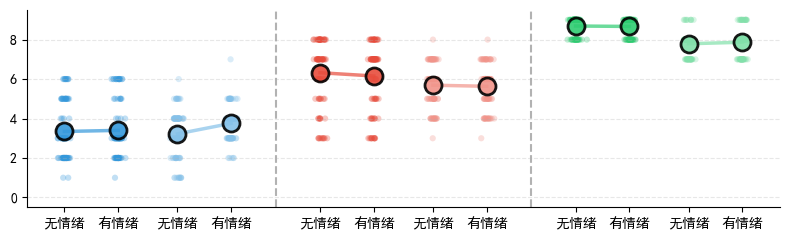


TPP_延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.056, p=0.8390 n.s.
  情绪评分差异: diff=+0.411, p=0.0860 n.s.
  相关系数差异: diff=-0.0080, p=0.8478 n.s.
Category 2.0:
  惩罚评分差异: diff=-0.033, p=0.9231 n.s.
  情绪评分差异: diff=+0.556, p=0.0014 ***
  相关系数差异: diff=-0.0499, p=0.2759 n.s.
Category 3.0:
  惩罚评分差异: diff=-0.044, p=0.2974 n.s.
  情绪评分差异: diff=+0.222, p=0.0013 ***
  相关系数差异: diff=+0.1144, p=0.1830 n.s.

已保存图片: emotion_condition_plots/TPP_延迟_Qwen3-235B-A22B-Instruct-2507.png


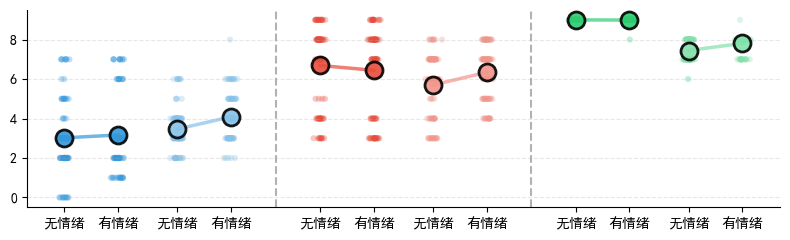


TPP_延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.289, p=0.2308 n.s.
  情绪评分差异: diff=+1.156, p=0.0000 ***
  相关系数差异: diff=+0.0272, p=0.5599 n.s.
Category 2.0:
  惩罚评分差异: diff=+0.100, p=0.6809 n.s.
  情绪评分差异: diff=+0.922, p=0.0001 ***
  相关系数差异: diff=+0.1325, p=0.0002 ***
Category 3.0:
  惩罚评分差异: diff=-0.011, p=0.7573 n.s.
  情绪评分差异: diff=+0.433, p=0.0000 ***
  相关系数差异: diff=+0.3845, p=0.0005 ***

已保存图片: emotion_condition_plots/TPP_延迟_Kimi-K2-0905.png


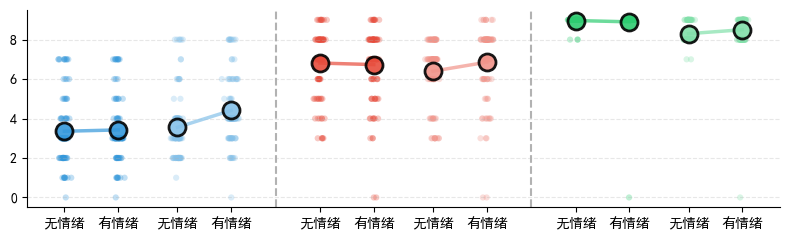


TPP_无延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.100, p=0.7202 n.s.
  情绪评分差异: diff=+0.233, p=0.3596 n.s.
  相关系数差异: diff=-0.0270, p=0.4968 n.s.
Category 2.0:
  惩罚评分差异: diff=-0.078, p=0.7797 n.s.
  情绪评分差异: diff=+0.244, p=0.1646 n.s.
  相关系数差异: diff=-0.0047, p=0.9445 n.s.
Category 3.0:
  惩罚评分差异: diff=+0.022, p=0.7167 n.s.
  情绪评分差异: diff=+0.133, p=0.0635 n.s.
  相关系数差异: diff=-0.1930, p=0.0000 ***

已保存图片: emotion_condition_plots/TPP_无延迟_DeepSeek-V3-Fast.png


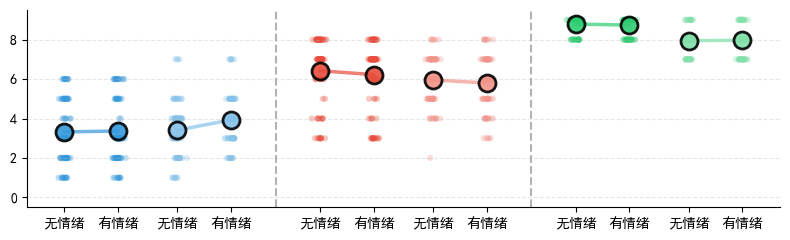


TPP_无延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.178, p=0.5467 n.s.
  情绪评分差异: diff=+0.567, p=0.0281 ***
  相关系数差异: diff=-0.0265, p=0.3802 n.s.
Category 2.0:
  惩罚评分差异: diff=-0.056, p=0.8673 n.s.
  情绪评分差异: diff=+0.611, p=0.0001 ***
  相关系数差异: diff=-0.1041, p=0.0650 n.s.
Category 3.0:
  惩罚评分差异: diff=+0.056, p=0.1795 n.s.
  情绪评分差异: diff=+0.211, p=0.0040 ***
  相关系数差异: diff=-0.1826, p=0.0316 ***

已保存图片: emotion_condition_plots/TPP_无延迟_Qwen3-235B-A22B-Instruct-2507.png


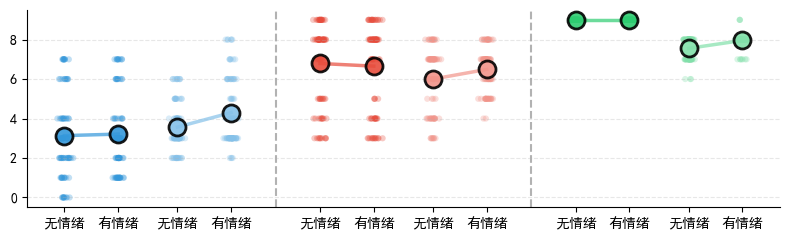


TPP_无延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.222, p=0.3873 n.s.
  情绪评分差异: diff=+1.189, p=0.0000 ***
  相关系数差异: diff=-0.1043, p=0.0019 ***
Category 2.0:
  惩罚评分差异: diff=+0.300, p=0.2312 n.s.
  情绪评分差异: diff=+1.167, p=0.0000 ***
  相关系数差异: diff=+0.0873, p=0.0012 ***
Category 3.0:
  惩罚评分差异: diff=+0.000, p=nan n.s.
  情绪评分差异: diff=+0.411, p=0.0000 ***
  相关系数差异: diff=+nan, p=nan n.s.

已保存图片: emotion_condition_plots/TPP_无延迟_Kimi-K2-0905.png


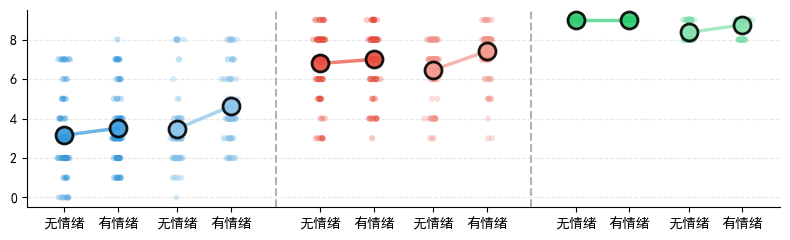


SPP_延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.156, p=0.5722 n.s.
  情绪评分差异: diff=+0.322, p=0.1786 n.s.
  相关系数差异: diff=+0.0873, p=0.1308 n.s.
Category 2.0:
  惩罚评分差异: diff=-0.067, p=0.8157 n.s.
  情绪评分差异: diff=-0.011, p=0.9486 n.s.
  相关系数差异: diff=+0.0091, p=0.8853 n.s.
Category 3.0:
  惩罚评分差异: diff=-0.011, p=0.8574 n.s.
  情绪评分差异: diff=+0.244, p=0.0792 n.s.
  相关系数差异: diff=+0.2073, p=0.0370 ***

已保存图片: emotion_condition_plots/SPP_延迟_DeepSeek-V3-Fast.png


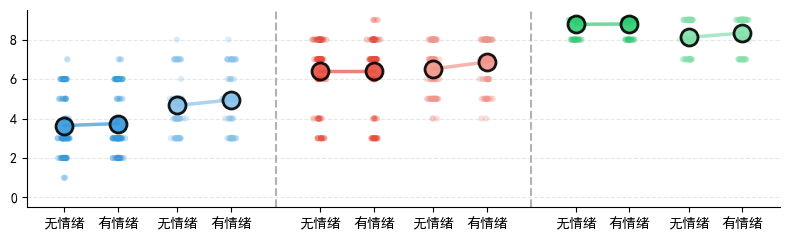


SPP_延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.144, p=0.5963 n.s.
  情绪评分差异: diff=+0.267, p=0.2578 n.s.
  相关系数差异: diff=-0.0231, p=0.4540 n.s.
Category 2.0:
  惩罚评分差异: diff=-0.122, p=0.7286 n.s.
  情绪评分差异: diff=+0.111, p=0.5434 n.s.
  相关系数差异: diff=+0.0162, p=0.6995 n.s.
Category 3.0:
  惩罚评分差异: diff=+0.000, p=nan n.s.
  情绪评分差异: diff=+0.167, p=0.0151 ***
  相关系数差异: diff=+nan, p=nan n.s.

已保存图片: emotion_condition_plots/SPP_延迟_Qwen3-235B-A22B-Instruct-2507.png


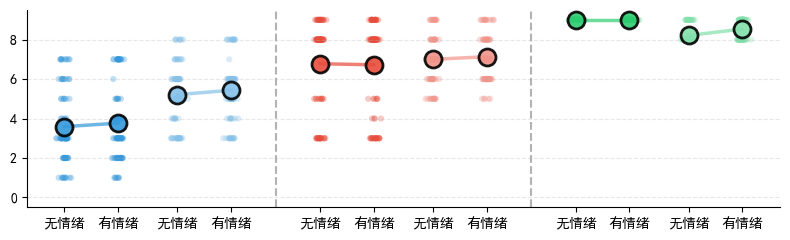


SPP_延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.311, p=0.2160 n.s.
  情绪评分差异: diff=+0.533, p=0.0445 ***
  相关系数差异: diff=+0.0304, p=0.3638 n.s.
Category 2.0:
  惩罚评分差异: diff=+0.078, p=0.7235 n.s.
  情绪评分差异: diff=+0.400, p=0.0519 n.s.
  相关系数差异: diff=+0.0476, p=0.1679 n.s.
Category 3.0:
  惩罚评分差异: diff=+0.000, p=nan n.s.
  情绪评分差异: diff=+0.267, p=0.0000 ***
  相关系数差异: diff=+nan, p=nan n.s.

已保存图片: emotion_condition_plots/SPP_延迟_Kimi-K2-0905.png


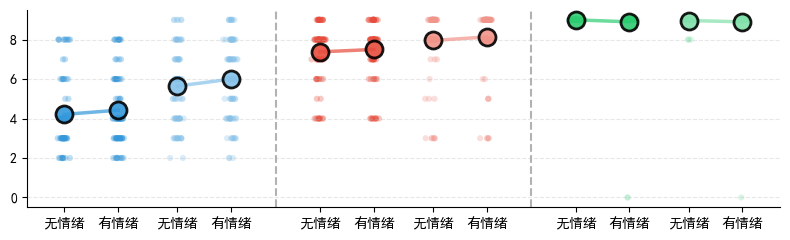


SPP_无延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.144, p=0.6047 n.s.
  情绪评分差异: diff=+0.056, p=0.8102 n.s.
  相关系数差异: diff=-0.0077, p=0.8986 n.s.
Category 2.0:
  惩罚评分差异: diff=+0.167, p=0.5713 n.s.
  情绪评分差异: diff=+0.144, p=0.3256 n.s.
  相关系数差异: diff=+0.0698, p=0.1130 n.s.
Category 3.0:
  惩罚评分差异: diff=+0.033, p=0.4888 n.s.
  情绪评分差异: diff=+0.389, p=0.0000 ***
  相关系数差异: diff=+0.1624, p=0.1084 n.s.

已保存图片: emotion_condition_plots/SPP_无延迟_DeepSeek-V3-Fast.png


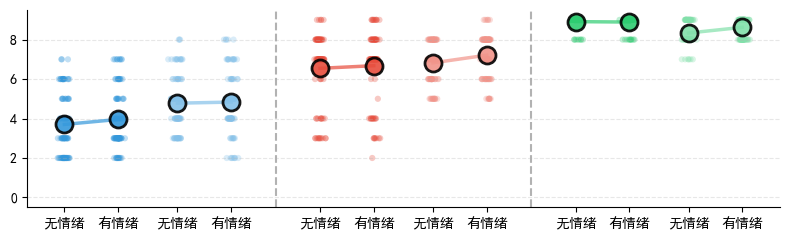


SPP_无延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.211, p=0.4891 n.s.
  情绪评分差异: diff=+0.311, p=0.1889 n.s.
  相关系数差异: diff=+0.0150, p=0.6502 n.s.
Category 2.0:
  惩罚评分差异: diff=-0.144, p=0.6867 n.s.
  情绪评分差异: diff=+0.300, p=0.1170 n.s.
  相关系数差异: diff=+0.0774, p=0.0166 ***
Category 3.0:
  惩罚评分差异: diff=+0.000, p=nan n.s.
  情绪评分差异: diff=+0.433, p=0.0000 ***
  相关系数差异: diff=+nan, p=nan n.s.

已保存图片: emotion_condition_plots/SPP_无延迟_Qwen3-235B-A22B-Instruct-2507.png


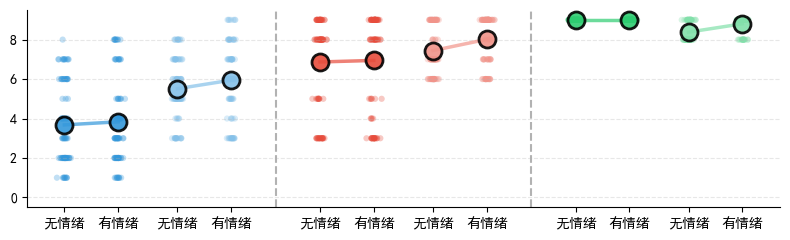


SPP_无延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  惩罚评分差异: diff=+0.156, p=0.5692 n.s.
  情绪评分差异: diff=+0.400, p=0.1236 n.s.
  相关系数差异: diff=+0.0260, p=0.5038 n.s.
Category 2.0:
  惩罚评分差异: diff=-0.056, p=0.8197 n.s.
  情绪评分差异: diff=+0.189, p=0.3263 n.s.
  相关系数差异: diff=+0.0521, p=0.1267 n.s.
Category 3.0:
  惩罚评分差异: diff=+0.000, p=nan n.s.
  情绪评分差异: diff=+0.156, p=0.0001 ***
  相关系数差异: diff=+nan, p=nan n.s.

已保存图片: emotion_condition_plots/SPP_无延迟_Kimi-K2-0905.png


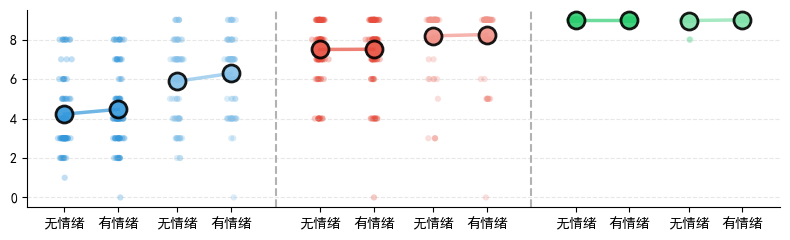


所有图形绘制完成！


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 定义category颜色 - 调换了category 1和2的颜色
category_colors = {
    1: {'rating': '#3498DB', 'emotion': '#85C1E9'},  # 原来是category 2的颜色
    2: {'rating': '#E74C3C', 'emotion': '#F1948A'},  # 原来是category 1的颜色
    3: {'rating': '#2ECC71', 'emotion': '#82E0AA'},
    4: {'rating': '#F39C12', 'emotion': '#F8C471'},
    5: {'rating': '#9B59B6', 'emotion': '#BB8FCE'},
    6: {'rating': '#1ABC9C', 'emotion': '#76D7C4'},
    7: {'rating': '#E67E22', 'emotion': '#F0B27A'},
    8: {'rating': '#34495E', 'emotion': '#85929E'}
}

def prepare_emotion_condition_plot_data(filtered_data, results_df):
    """
    准备情绪条件分析的绘图数据
    """
    plot_data = {}  # 结构: {block_key: {model: {category: emotion_condition_stats}}}
    raw_data = {}   # 结构: {block_key: {model: {category: raw_dataframe}}}
    
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            block_key = f"{role}_{delay_class}"
            plot_data[block_key] = {}
            raw_data[block_key] = {}
            
            # 筛选当前块的数据
            block_data = filtered_data[
                (filtered_data['Role'] == role) &
                (filtered_data['Delay_Class'] == delay_class)
            ]
            
            if len(block_data) == 0:
                continue
            
            # 对每个模型
            for model in target_models:
                model_data = block_data[block_data['Model'] == model]
                
                if len(model_data) == 0:
                    continue
                
                plot_data[block_key][model] = {}
                raw_data[block_key][model] = {}
                
                # 获取所有category
                categories = sorted(model_data['Category'].unique())
                
                for category in categories:
                    category_data = model_data[model_data['Category'] == category]
                    
                    if len(category_data) == 0:
                        continue
                    
                    # 按情绪条件分组统计
                    emotion_stats = category_data.groupby('Emotion_Condition').agg({
                        'Rating': 'mean',
                        'Emotion': 'mean',
                        'List2': 'count'
                    }).reset_index()
                    
                    emotion_stats.columns = ['Emotion_Condition', 'Mean_Rating', 'Mean_Emotion', 'Sample_Count']
                    
                    # 保存统计数据
                    plot_data[block_key][model][category] = emotion_stats
                    
                    # 保存原始数据
                    raw_data[block_key][model][category] = category_data
    
    return plot_data, raw_data

def plot_emotion_condition_results(block_key, model, plot_data, raw_data, results_df, save_path=None):
    """
    为单个模型绘制情绪条件分析结果图 - 所有category在一个图中
    X轴为with/without emotion条件
    """
    # 获取该模型的所有category数据
    model_data = plot_data.get(model, {})
    model_raw = raw_data.get(model, {})
    
    if not model_data:
        print(f"模型 {model} 在 {block_key} 中无数据")
        return
    
    categories = sorted(model_data.keys())
    n_categories = len(categories)
    
    if n_categories == 0:
        return
    
    # 创建单个图形
    fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))
    
    role, delay_class = block_key.split('_')
    
    # 情绪条件刻度
    emotion_conditions = ['without_emotion', 'with_emotion']
    emotion_labels = ['无情绪', '有情绪']
    
    # 定义category在X轴的位置区间 - 调整参数
    category_width = 70  # 增加category宽度
    gap_between_categories = 25  # 增加category之间的间距
    left_margin = 30  # 增加左边距
    right_margin = 30  # 增加右边距
    
    category_positions = {}
    for i, cat in enumerate(categories):
        start = left_margin + i * (category_width + gap_between_categories)
        end = start + category_width
        category_positions[cat] = (start, end)
    
    # 存储所有数据点用于设置y轴范围
    all_y_values = []
    
    # 对每个category绘图
    for category in categories:
        emotion_stats = model_data[category]
        raw_df = model_raw[category]
        
        if len(emotion_stats) == 0:
            continue
        
        # 获取该category的X轴位置范围
        x_start, x_end = category_positions[category]
        x_center = (x_start + x_end) / 2
        
        # 将情绪条件映射到该category的X轴范围
        def map_condition_to_x(condition, score_type='rating'):
            # condition: 'without_emotion' 或 'with_emotion'
            # 将条件映射到0或1
            condition_value = 0 if condition == 'without_emotion' else 1
            
            # 惩罚评分占左边40%，中间间隔20%，情绪评分占右边40%
            rating_width = (x_end - x_start) * 0.40
            gap_width = (x_end - x_start) * 0.20
            emotion_width = (x_end - x_start) * 0.40
            
            # 每种评分内部，两个条件之间的间距
            within_score_gap = 20  # 无情绪和有情绪之间的距离
            
            if score_type == 'rating':
                # 惩罚评分在左边
                # 计算该评分区域的中心
                rating_center = x_start + rating_width / 2
                # 两个条件分布在中心两侧
                return rating_center + (condition_value - 0.5) * within_score_gap
            else:
                # 情绪评分在右边
                # 计算该评分区域的中心
                emotion_center = x_start + rating_width + gap_width + emotion_width / 2
                # 两个条件分布在中心两侧
                return emotion_center + (condition_value - 0.5) * within_score_gap
        
        # 获取颜色
        rating_color = category_colors[category]['rating']
        emotion_color = category_colors[category]['emotion']
        
        # ===== 绘制惩罚评分（Rating） =====
        
        # 准备数据
        rating_means = []
        rating_x_positions = []
        
        for condition in emotion_conditions:
            condition_data = emotion_stats[emotion_stats['Emotion_Condition'] == condition]
            if len(condition_data) > 0:
                rating_means.append(condition_data['Mean_Rating'].values[0])
                rating_x_positions.append(map_condition_to_x(condition, 'rating'))
            else:
                rating_means.append(np.nan)
                rating_x_positions.append(map_condition_to_x(condition, 'rating'))
        
        # 1. 绘制原始数据点（小散点）
        for condition in emotion_conditions:
            condition_raw = raw_df[raw_df['Emotion_Condition'] == condition]
            if len(condition_raw) > 0:
                raw_ratings = condition_raw['Rating'].values
                x_pos = map_condition_to_x(condition, 'rating')
                
                # 添加随机抖动
                jitter = np.random.normal(0, 1.0, len(raw_ratings))  # 减小抖动范围
                x_positions_jittered = [x_pos] * len(raw_ratings) + jitter
                
                ax.scatter(x_positions_jittered, raw_ratings,
                          s=20, color=rating_color, alpha=0.3,
                          edgecolors='none', zorder=1)
                
                all_y_values.extend(raw_ratings)
        
        # 2. 绘制均值点（大散点）
        valid_means = [m for m in rating_means if not np.isnan(m)]
        valid_x = [x for m, x in zip(rating_means, rating_x_positions) if not np.isnan(m)]
        
        if len(valid_means) > 0:
            ax.scatter(valid_x, valid_means,
                      s=150, color=rating_color, alpha=0.9,
                      edgecolors='black', linewidth=2, zorder=4,
                      label=f'Category {category} - 惩罚评分')
            
            all_y_values.extend(valid_means)
        
        # 3. 绘制连线
        if len(valid_means) >= 2:
            ax.plot(valid_x, valid_means,
                   color=rating_color, linewidth=2.5, alpha=0.7, zorder=3)
        
        # ===== 绘制情绪评分（Emotion） =====
        
        # 准备数据
        emotion_means = []
        emotion_x_positions = []
        
        for condition in emotion_conditions:
            condition_data = emotion_stats[emotion_stats['Emotion_Condition'] == condition]
            if len(condition_data) > 0:
                emotion_means.append(condition_data['Mean_Emotion'].values[0])
                emotion_x_positions.append(map_condition_to_x(condition, 'emotion'))
            else:
                emotion_means.append(np.nan)
                emotion_x_positions.append(map_condition_to_x(condition, 'emotion'))
        
        # 1. 绘制原始数据点（小散点）
        for condition in emotion_conditions:
            condition_raw = raw_df[raw_df['Emotion_Condition'] == condition]
            if len(condition_raw) > 0:
                raw_emotions = condition_raw['Emotion'].values
                x_pos = map_condition_to_x(condition, 'emotion')
                
                # 添加随机抖动
                jitter = np.random.normal(0, 1.0, len(raw_emotions))  # 减小抖动范围
                x_positions_jittered = [x_pos] * len(raw_emotions) + jitter
                
                ax.scatter(x_positions_jittered, raw_emotions,
                          s=20, color=emotion_color, alpha=0.3,
                          edgecolors='none', zorder=1)
                
                all_y_values.extend(raw_emotions)
        
        # 2. 绘制均值点（大散点）
        valid_means = [m for m in emotion_means if not np.isnan(m)]
        valid_x = [x for m, x in zip(emotion_means, emotion_x_positions) if not np.isnan(m)]
        
        if len(valid_means) > 0:
            ax.scatter(valid_x, valid_means,
                      s=150, color=emotion_color, alpha=0.9,
                      edgecolors='black', linewidth=2, zorder=4,
                      label=f'Category {category} - 情绪评分')
            
            all_y_values.extend(valid_means)
        
        # 3. 绘制连线
        if len(valid_means) >= 2:
            ax.plot(valid_x, valid_means,
                   color=emotion_color, linewidth=2.5, alpha=0.7, zorder=3)
    
    # 绘制category之间的分隔线
    if n_categories > 1:
        for i in range(1, n_categories):
            prev_cat = categories[i-1]
            curr_cat = categories[i]
            # 虚线位置在两个category中间
            x_sep = category_positions[prev_cat][1] + gap_between_categories / 2
            ax.axvline(x=x_sep, color='gray', linestyle='--',
                      linewidth=1.5, alpha=0.6, zorder=0)
    
    # 设置X轴刻度
    x_tick_positions = []
    x_tick_labels = []
    
    for category in categories:
        x_start, x_end = category_positions[category]
        
        rating_width = (x_end - x_start) * 0.40
        gap_width = (x_end - x_start) * 0.20
        emotion_width = (x_end - x_start) * 0.40
        
        within_score_gap = 20
        
        # 为惩罚评分添加刻度
        rating_center = x_start + rating_width / 2
        for i, condition in enumerate(emotion_conditions):
            x_rating = rating_center + (i - 0.5) * within_score_gap
            x_tick_positions.append(x_rating)
            x_tick_labels.append(emotion_labels[i])
        
        # 为情绪评分添加刻度
        emotion_center = x_start + rating_width + gap_width + emotion_width / 2
        for i, condition in enumerate(emotion_conditions):
            x_emotion = emotion_center + (i - 0.5) * within_score_gap
            x_tick_positions.append(x_emotion)
            x_tick_labels.append(emotion_labels[i])
    
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, fontsize=10)
    
    # 设置X轴范围 - 确保有足够的边距
    if categories:
        first_cat = categories[0]
        last_cat = categories[-1]
        x_min = category_positions[first_cat][0] - 10  # 左边距
        x_max = category_positions[last_cat][1] + 10  # 右边距
        ax.set_xlim(x_min, x_max)
    
    # 设置Y轴范围
    ax.set_ylim(-0.5, 9.5)
    ax.set_yticks([0, 2, 4, 6, 8])
    
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # 删除上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 打印显著性信息
    print(f"\n{block_key} - {model} 显著性结果:")
    print("-" * 80)
    for category in categories:
        result_row = results_df[
            (results_df['Role'] == role) &
            (results_df['Delay_Class'] == delay_class) &
            (results_df['Model'] == model) &
            (results_df['Category'] == category)
        ]
        
        if not result_row.empty:
            rating_diff = result_row.iloc[0]['Rating_Diff']
            rating_p = result_row.iloc[0]['Rating_p']
            rating_sig = '***' if rating_p < 0.05 else 'n.s.'
            
            emotion_diff = result_row.iloc[0]['Emotion_Diff']
            emotion_p = result_row.iloc[0]['Emotion_p']
            emotion_sig = '***' if emotion_p < 0.05 else 'n.s.'
            
            corr_diff = result_row.iloc[0]['Corr_Diff']
            corr_p = result_row.iloc[0]['Corr_Comparison_p']
            corr_sig = '***' if corr_p < 0.05 else 'n.s.'
            
            print(f"Category {category}:")
            print(f"  惩罚评分差异: diff={rating_diff:+.3f}, p={rating_p:.4f} {rating_sig}")
            print(f"  情绪评分差异: diff={emotion_diff:+.3f}, p={emotion_p:.4f} {emotion_sig}")
            print(f"  相关系数差异: diff={corr_diff:+.4f}, p={corr_p:.4f} {corr_sig}")
    
    plt.tight_layout()
    
    if save_path:
        import os
        os.makedirs(save_path, exist_ok=True)
        filename = f'{save_path}/{block_key}_{model.replace("/", "_")}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"\n已保存图片: {filename}")
    
    plt.show()

# 使用示例
# 1. 准备数据
plot_data, raw_data = prepare_emotion_condition_plot_data(filtered_data, results_df)

# 2. 绘制所有图形
save_path = 'emotion_condition_plots'

for role in ['TPP', 'SPP']:
    for delay_class in ['延迟', '无延迟']:
        block_key = f"{role}_{delay_class}"
        
        if block_key in plot_data:
            for model in target_models:
                if model in plot_data[block_key]:
                    plot_emotion_condition_results(
                        block_key, 
                        model, 
                        plot_data[block_key], 
                        raw_data[block_key], 
                        results_df, 
                        save_path=save_path
                    )

print("\n所有图形绘制完成！")


所有图形绘制完成！


In [47]:
import pandas as pd
import numpy as np
from scipy import stats

# 定义要分析的三个模型
target_models = [
    'DeepSeek-V3-Fast',
    'Qwen3-235B-A22B-Instruct-2507',
    'Kimi-K2-0905'
]

# 筛选目标条件的数据：age20 + without_emotion
filtered_data = combined_df[
    (combined_df['Age'] == 'age20') &
    (combined_df['Emotion_Condition'] == 'without_emotion') &
    (combined_df['Model'].isin(target_models))
].copy()

# 添加延迟分类
filtered_data['Delay_Class'] = filtered_data['Delay_Info'].apply(
    lambda x: '延迟' if x != 0 else '无延迟'
)

# 定义要分析的三种推理类型
reasoning_types = ['short-term-reasoning', 'long-term-reasoning', 'NAN-reasoning']

# 存储所有分析结果
all_results = []

# 4大块分析：TPP/SPP × 延迟/无延迟
for role in ['TPP', 'SPP']:
    for delay_class in ['延迟', '无延迟']:
        
        print("\n" + "=" * 120)
        print(f"【{role} - {delay_class}】")
        print("=" * 120)
        
        # 筛选当前块的数据
        block_data = filtered_data[
            (filtered_data['Role'] == role) &
            (filtered_data['Delay_Class'] == delay_class)
        ]
        
        if len(block_data) == 0:
            print(f"无数据")
            continue
        
        # 对每个模型进行分析
        for model in target_models:
            
            model_data = block_data[block_data['Model'] == model]
            
            if len(model_data) == 0:
                continue
            
            print(f"\n{'='*60}")
            print(f"模型: {model}")
            print(f"{'='*60}")
            
            # 获取所有category
            categories = sorted(model_data['Category'].unique())
            
            # 对每个category分析
            for category in categories:
                
                category_data = model_data[model_data['Category'] == category]
                
                if len(category_data) == 0:
                    continue
                
                print(f"\n  Category {category}:")
                print(f"  {'-'*56}")
                
                # 按推理类型分组，计算平均Rating和Emotion
                reasoning_stats = category_data.groupby('Reasoning').agg({
                    'Rating': 'mean',
                    'Emotion': 'mean',
                    'List2': 'count'  # 样本数
                }).reset_index()
                
                reasoning_stats.columns = ['Reasoning', 'Mean_Rating', 'Mean_Emotion', 'Sample_Count']
                
                # 只保留我们关注的三种推理类型
                reasoning_stats = reasoning_stats[reasoning_stats['Reasoning'].isin(reasoning_types)]
                
                # 显示每个推理类型的统计
                print(f"\n  各推理类型数据:")
                for _, row in reasoning_stats.iterrows():
                    print(f"    {row['Reasoning']}: 惩罚评分={row['Mean_Rating']:.3f}, "
                          f"情绪评分={row['Mean_Emotion']:.3f}, 样本数={int(row['Sample_Count'])}")
                
                # 检查是否有所有三种推理类型的数据
                available_reasoning = set(reasoning_stats['Reasoning'].values)
                
                if len(available_reasoning) >= 2:
                    
                    # 两两比较
                    comparison_pairs = [
                        ('short-term-reasoning', 'long-term-reasoning'),
                        ('short-term-reasoning', 'NAN-reasoning'),
                        ('long-term-reasoning', 'NAN-reasoning')
                    ]
                    
                    print(f"\n  推理类型两两比较:")
                    
                    for reasoning1, reasoning2 in comparison_pairs:
                        
                        # 检查两个推理类型是否都存在
                        if reasoning1 not in available_reasoning or reasoning2 not in available_reasoning:
                            print(f"    {reasoning1} vs {reasoning2}: 数据缺失")
                            continue
                        
                        # 获取两个推理类型的数据
                        data1 = category_data[category_data['Reasoning'] == reasoning1]
                        data2 = category_data[category_data['Reasoning'] == reasoning2]
                        
                        if len(data1) > 1 and len(data2) > 1:
                            
                            # 计算惩罚评分的均值差异
                            rating_mean1 = data1['Rating'].mean()
                            rating_mean2 = data2['Rating'].mean()
                            rating_diff = rating_mean1 - rating_mean2
                            
                            # 计算情绪评分的均值差异
                            emotion_mean1 = data1['Emotion'].mean()
                            emotion_mean2 = data2['Emotion'].mean()
                            emotion_diff = emotion_mean1 - emotion_mean2
                            
                            # 对惩罚评分进行独立样本t检验
                            t_rating, p_rating = stats.ttest_ind(
                                data1['Rating'],
                                data2['Rating']
                            )
                            
                            # 对情绪评分进行独立样本t检验
                            t_emotion, p_emotion = stats.ttest_ind(
                                data1['Emotion'],
                                data2['Emotion']
                            )
                            
                            rating_sig = p_rating < 0.05
                            emotion_sig = p_emotion < 0.05
                            
                            print(f"    {reasoning1} vs {reasoning2}:")
                            print(f"      惩罚评分差异: {rating_diff:+.3f} ({rating_mean1:.3f} - {rating_mean2:.3f})")
                            print(f"        t={t_rating:.4f}, p={p_rating:.4f} {'***显著' if rating_sig else '不显著'}")
                            print(f"      情绪评分差异: {emotion_diff:+.3f} ({emotion_mean1:.3f} - {emotion_mean2:.3f})")
                            print(f"        t={t_emotion:.4f}, p={p_emotion:.4f} {'***显著' if emotion_sig else '不显著'}")
                            
                            # 保存结果
                            result_entry = {
                                'Role': role,
                                'Delay_Class': delay_class,
                                'Model': model,
                                'Category': category,
                                'Reasoning1': reasoning1,
                                'Reasoning2': reasoning2,
                                'N1': len(data1),
                                'N2': len(data2),
                                
                                # 惩罚评分
                                'Rating_Mean1': rating_mean1,
                                'Rating_Mean2': rating_mean2,
                                'Rating_Diff': rating_diff,
                                'Rating_t': t_rating,
                                'Rating_p': p_rating,
                                'Rating_Significant': rating_sig,
                                
                                # 情绪评分
                                'Emotion_Mean1': emotion_mean1,
                                'Emotion_Mean2': emotion_mean2,
                                'Emotion_Diff': emotion_diff,
                                'Emotion_t': t_emotion,
                                'Emotion_p': p_emotion,
                                'Emotion_Significant': emotion_sig
                            }
                            
                            all_results.append(result_entry)
                        
                        else:
                            print(f"    {reasoning1} vs {reasoning2}: 样本数不足")
                
                else:
                    print(f"\n  推理类型数据不完整（至少需要两种推理类型）")

# 汇总分析
print("\n\n" + "=" * 120)
print("汇总分析")
print("=" * 120)

if len(all_results) > 0:
    results_df = pd.DataFrame(all_results)
    
    # 1. 显著性统计
    print("\n【显著性结果统计】")
    print("-" * 120)
    
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            block_results = results_df[
                (results_df['Role'] == role) &
                (results_df['Delay_Class'] == delay_class)
            ]
            
            if len(block_results) > 0:
                print(f"\n{role} - {delay_class}:")
                
                total = len(block_results)
                rating_sig = block_results['Rating_Significant'].sum()
                emotion_sig = block_results['Emotion_Significant'].sum()
                any_sig = block_results[
                    (block_results['Rating_Significant'] == True) | 
                    (block_results['Emotion_Significant'] == True)
                ].shape[0]
                
                print(f"  总比较数: {total}")
                print(f"  惩罚评分显著差异: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
                print(f"  情绪评分显著差异: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
                print(f"  任一指标显著: {any_sig}/{total} ({any_sig/total*100:.1f}%)")
                
                # 按比较类型统计
                for reasoning1, reasoning2 in [
                    ('short-term-reasoning', 'long-term-reasoning'),
                    ('short-term-reasoning', 'NAN-reasoning'),
                    ('long-term-reasoning', 'NAN-reasoning')
                ]:
                    subset = block_results[
                        (block_results['Reasoning1'] == reasoning1) &
                        (block_results['Reasoning2'] == reasoning2)
                    ]
                    if len(subset) > 0:
                        rating_sig_subset = subset['Rating_Significant'].sum()
                        emotion_sig_subset = subset['Emotion_Significant'].sum()
                        print(f"    {reasoning1} vs {reasoning2}: 惩罚{rating_sig_subset}/{len(subset)}, 情绪{emotion_sig_subset}/{len(subset)}")
    
    # 2. 按模型统计
    print("\n\n【按模型统计】")
    print("-" * 120)
    
    for model in target_models:
        model_results = results_df[results_df['Model'] == model]
        
        if len(model_results) > 0:
            print(f"\n{model}:")
            
            total = len(model_results)
            rating_sig = model_results['Rating_Significant'].sum()
            emotion_sig = model_results['Emotion_Significant'].sum()
            any_sig = model_results[
                (model_results['Rating_Significant'] == True) | 
                (model_results['Emotion_Significant'] == True)
            ].shape[0]
            
            print(f"  总比较数: {total}")
            print(f"  惩罚评分显著差异: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
            print(f"  情绪评分显著差异: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
            print(f"  任一指标显著: {any_sig}/{total} ({any_sig/total*100:.1f}%)")
            
            # 按Role和Delay细分
            for role in ['TPP', 'SPP']:
                for delay_class in ['延迟', '无延迟']:
                    subset = model_results[
                        (model_results['Role'] == role) &
                        (model_results['Delay_Class'] == delay_class)
                    ]
                    
                    if len(subset) > 0:
                        rating_sig_sub = subset['Rating_Significant'].sum()
                        emotion_sig_sub = subset['Emotion_Significant'].sum()
                        total_sub = len(subset)
                        
                        print(f"    {role}-{delay_class}: 惩罚{rating_sig_sub}/{total_sub}, 情绪{emotion_sig_sub}/{total_sub}")
    
    # 3. 显著结果详细列表
    print("\n\n【显著结果详细列表】")
    print("-" * 120)
    
    sig_results = results_df[
        (results_df['Rating_Significant'] == True) | 
        (results_df['Emotion_Significant'] == True)
    ]
    
    if len(sig_results) > 0:
        print(f"\n共有 {len(sig_results)} 个显著差异:\n")
        
        for _, row in sig_results.iterrows():
            print(f"{row['Role']}-{row['Delay_Class']} | {row['Model']} | Category {row['Category']}:")
            print(f"  {row['Reasoning1']} vs {row['Reasoning2']}:")
            
            if row['Rating_Significant']:
                print(f"    ✓ 惩罚评分: {row['Rating_Mean1']:.3f} vs {row['Rating_Mean2']:.3f}")
                print(f"      差异: {row['Rating_Diff']:+.3f}, t={row['Rating_t']:.4f}, p={row['Rating_p']:.4f} ***")
            
            if row['Emotion_Significant']:
                print(f"    ✓ 情绪评分: {row['Emotion_Mean1']:.3f} vs {row['Emotion_Mean2']:.3f}")
                print(f"      差异: {row['Emotion_Diff']:+.3f}, t={row['Emotion_t']:.4f}, p={row['Emotion_p']:.4f} ***")
            
            print()
    else:
        print("\n未发现显著差异")
    
    # 4. 按比较类型汇总
    print("\n\n【按比较类型汇总】")
    print("-" * 120)
    
    for reasoning1, reasoning2 in [
        ('short-term-reasoning', 'long-term-reasoning'),
        ('short-term-reasoning', 'NAN-reasoning'),
        ('long-term-reasoning', 'NAN-reasoning')
    ]:
        subset = results_df[
            (results_df['Reasoning1'] == reasoning1) &
            (results_df['Reasoning2'] == reasoning2)
        ]
        
        if len(subset) > 0:
            rating_sig = subset['Rating_Significant'].sum()
            emotion_sig = subset['Emotion_Significant'].sum()
            total = len(subset)
            
            print(f"\n{reasoning1} vs {reasoning2}:")
            print(f"  总比较数: {total}")
            print(f"  惩罚评分显著差异: {rating_sig}/{total} ({rating_sig/total*100:.1f}%)")
            print(f"  情绪评分显著差异: {emotion_sig}/{total} ({emotion_sig/total*100:.1f}%)")
            
            if rating_sig > 0:
                rating_sig_subset = subset[subset['Rating_Significant'] == True]
                avg_rating_diff = rating_sig_subset['Rating_Diff'].mean()
                print(f"    平均惩罚评分差异(显著的): {avg_rating_diff:+.3f}")
            
            if emotion_sig > 0:
                emotion_sig_subset = subset[subset['Emotion_Significant'] == True]
                avg_emotion_diff = emotion_sig_subset['Emotion_Diff'].mean()
                print(f"    平均情绪评分差异(显著的): {avg_emotion_diff:+.3f}")

else:
    print("\n无可分析数据")

print("\n分析完成！")


【TPP - 延迟】

模型: DeepSeek-V3-Fast

  Category 1.0:
  --------------------------------------------------------

  各推理类型数据:
    NAN-reasoning: 惩罚评分=2.889, 情绪评分=3.744, 样本数=90
    long-term-reasoning: 惩罚评分=3.000, 情绪评分=3.711, 样本数=90
    short-term-reasoning: 惩罚评分=3.278, 情绪评分=3.856, 样本数=90

  推理类型两两比较:
    short-term-reasoning vs long-term-reasoning:
      惩罚评分差异: +0.278 (3.278 - 3.000)
        t=0.9920, p=0.3225 不显著
      情绪评分差异: +0.144 (3.856 - 3.711)
        t=0.6208, p=0.5355 不显著
    short-term-reasoning vs NAN-reasoning:
      惩罚评分差异: +0.389 (3.278 - 2.889)
        t=1.4128, p=0.1595 不显著
      情绪评分差异: +0.111 (3.856 - 3.744)
        t=0.4676, p=0.6406 不显著
    long-term-reasoning vs NAN-reasoning:
      惩罚评分差异: +0.111 (3.000 - 2.889)
        t=0.4222, p=0.6734 不显著
      情绪评分差异: -0.033 (3.711 - 3.744)
        t=-0.1416, p=0.8875 不显著

  Category 2.0:
  --------------------------------------------------------

  各推理类型数据:
    NAN-reasoning: 惩罚评分=5.989, 情绪评分=5.833, 样本数=90
    long-term-reasoni

C:\Users\47648\AppData\Local\Temp\ipykernel_15424\825847436.py:130: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
C:\Users\47648\AppData\Local\Temp\ipykernel_15424\825847436.py:130: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
C:\Users\47648\AppData\Local\Temp\ipykernel_15424\825847436.py:130: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_rating, p_rating = stats.ttest_ind(
C:\Users\47648\AppData\Local\Temp\ipykernel_15424\825847436.py:130: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation.


TPP_延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.278, p=0.3225 n.s.
    情绪评分: diff=+0.144, p=0.5355 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.389, p=0.1595 n.s.
    情绪评分: diff=+0.111, p=0.6406 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.111, p=0.6734 n.s.
    情绪评分: diff=-0.033, p=0.8875 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.244, p=0.3892 n.s.
    情绪评分: diff=+0.733, p=0.0004 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.200, p=0.4942 n.s.
    情绪评分: diff=+0.367, p=0.0807 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.044, p=0.8811 n.s.
    情绪评分: diff=-0.367, p=0.0996 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.000, p=1.0000 n.s.
    情绪评分: diff=+0.011, p=0.9191 n.s.
  short-term-reasoning 

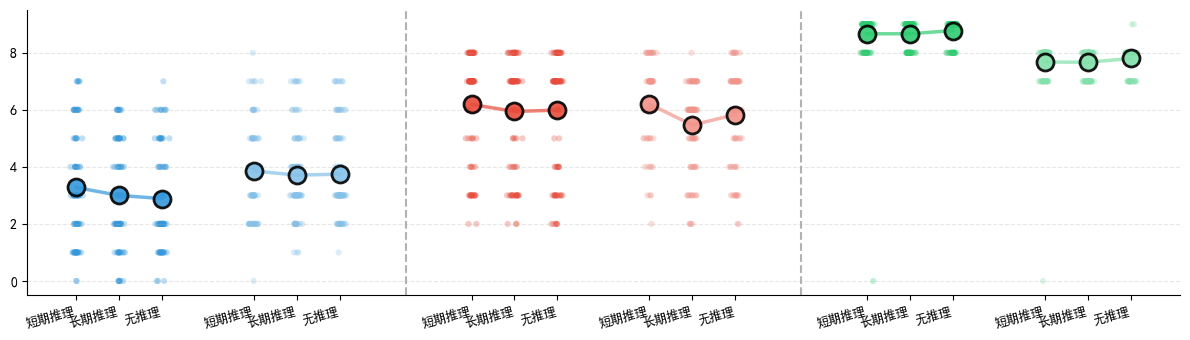


TPP_延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.133, p=0.6325 n.s.
    情绪评分: diff=+0.667, p=0.0021 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.156, p=0.5721 n.s.
    情绪评分: diff=+0.244, p=0.3018 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.022, p=0.9346 n.s.
    情绪评分: diff=-0.422, p=0.0318 ***
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.133, p=0.6755 n.s.
    情绪评分: diff=+0.222, p=0.1712 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.233, p=0.4758 n.s.
    情绪评分: diff=+0.189, p=0.2184 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.100, p=0.7623 n.s.
    情绪评分: diff=-0.033, p=0.8445 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.067, p=0.0960 n.s.
    情绪评分: diff=+0.356, p=0.0000 ***
  short-term

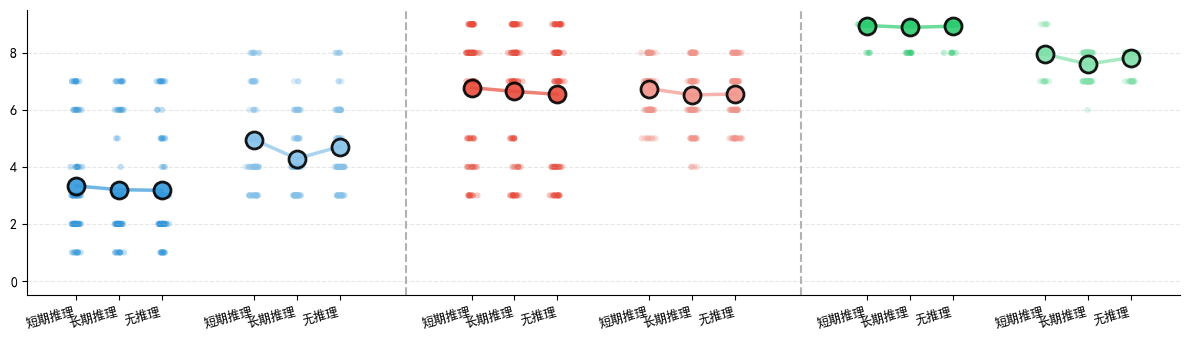


TPP_延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=-0.111, p=0.6661 n.s.
    情绪评分: diff=+0.344, p=0.1940 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.178, p=0.4831 n.s.
    情绪评分: diff=-0.078, p=0.7825 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.067, p=0.7858 n.s.
    情绪评分: diff=-0.422, p=0.1110 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.111, p=0.6664 n.s.
    情绪评分: diff=+0.422, p=0.0938 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.033, p=0.8974 n.s.
    情绪评分: diff=+0.100, p=0.6787 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.078, p=0.7469 n.s.
    情绪评分: diff=-0.322, p=0.2088 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.022, p=0.1567 n.s.
    情绪评分: diff=+0.156, p=0.0334 ***
  short-term-reasoning vs N

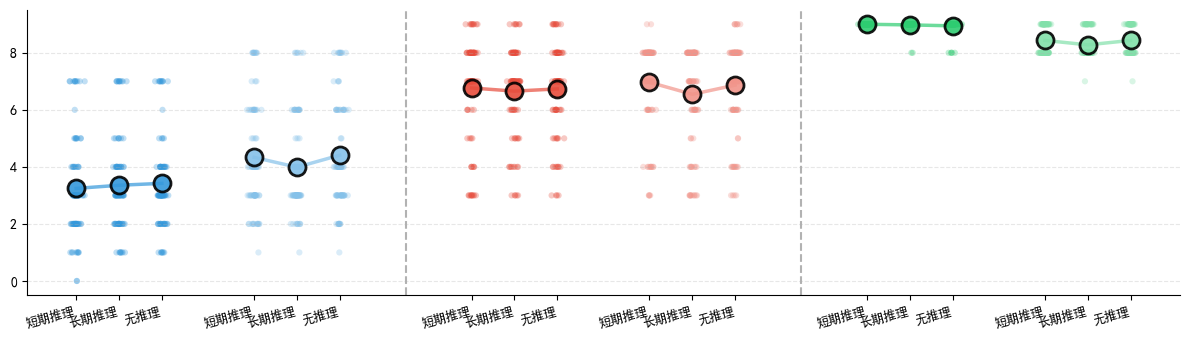


TPP_无延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.156, p=0.5756 n.s.
    情绪评分: diff=+0.078, p=0.7537 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.133, p=0.6349 n.s.
    情绪评分: diff=+0.044, p=0.8622 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.022, p=0.9351 n.s.
    情绪评分: diff=-0.033, p=0.8903 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.167, p=0.5537 n.s.
    情绪评分: diff=+0.489, p=0.0111 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.000, p=1.0000 n.s.
    情绪评分: diff=+0.144, p=0.4274 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.167, p=0.5480 n.s.
    情绪评分: diff=-0.344, p=0.0737 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.022, p=0.7263 n.s.
    情绪评分: diff=+0.033, p=0.5964 n.s.
  short-term-reasoning

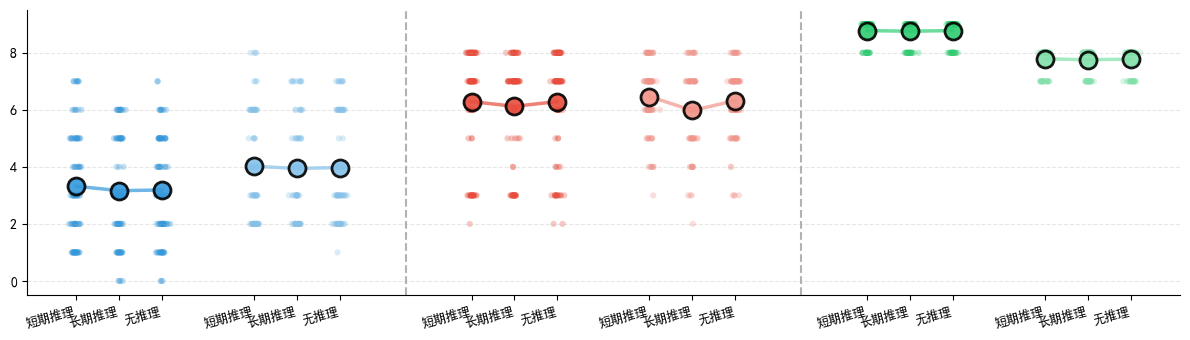


TPP_无延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.067, p=0.8213 n.s.
    情绪评分: diff=+0.667, p=0.0034 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.211, p=0.4784 n.s.
    情绪评分: diff=+0.356, p=0.1787 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.144, p=0.6278 n.s.
    情绪评分: diff=-0.311, p=0.1730 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.044, p=0.8878 n.s.
    情绪评分: diff=+0.178, p=0.2137 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.078, p=0.8089 n.s.
    情绪评分: diff=+0.144, p=0.2849 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.033, p=0.9162 n.s.
    情绪评分: diff=-0.033, p=0.8141 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.000, p=1.0000 n.s.
    情绪评分: diff=+0.200, p=0.0031 ***
  short-te

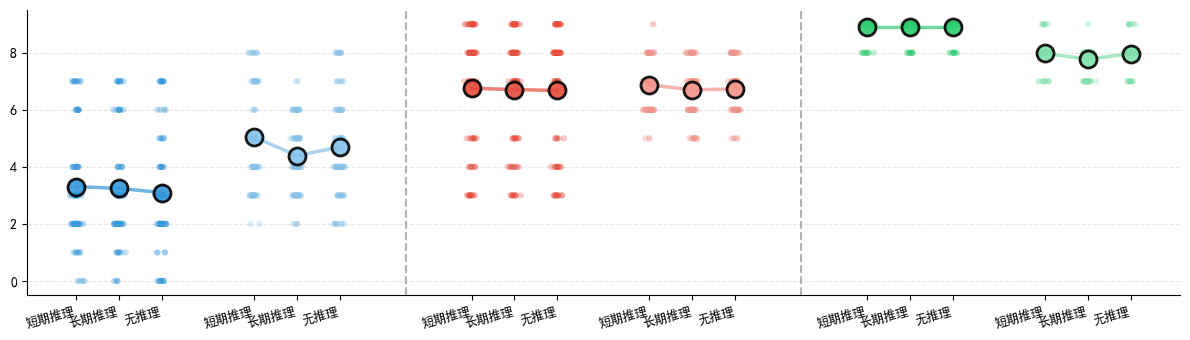


TPP_无延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.100, p=0.7081 n.s.
    情绪评分: diff=+0.122, p=0.6765 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.011, p=0.9672 n.s.
    情绪评分: diff=-0.056, p=0.8514 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.111, p=0.6770 n.s.
    情绪评分: diff=-0.178, p=0.5412 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.400, p=0.1019 n.s.
    情绪评分: diff=+0.756, p=0.0021 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.422, p=0.0879 n.s.
    情绪评分: diff=+0.700, p=0.0038 ***
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.022, p=0.9325 n.s.
    情绪评分: diff=-0.056, p=0.8404 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.000, p=nan n.s.
    情绪评分: diff=+0.056, p=0.4555 n.s.
  short-term-reasoning vs NAN-

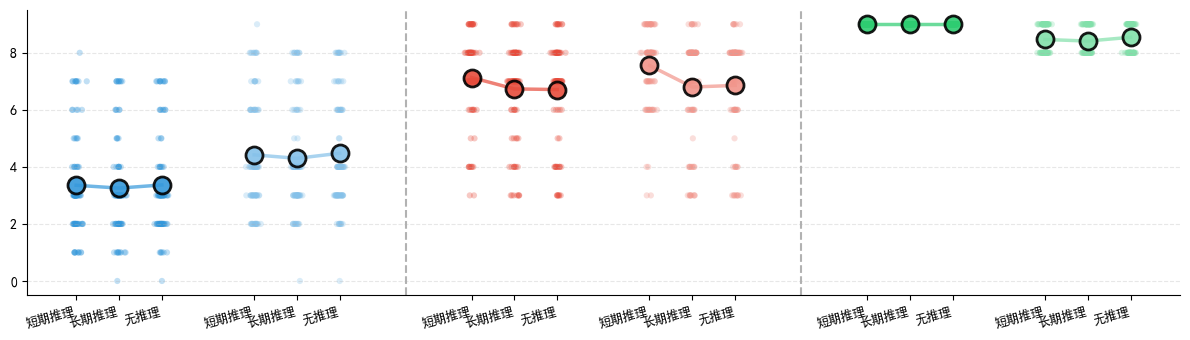


SPP_延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.189, p=0.5059 n.s.
    情绪评分: diff=+0.489, p=0.0352 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.078, p=0.7854 n.s.
    情绪评分: diff=+0.233, p=0.3343 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.111, p=0.6921 n.s.
    情绪评分: diff=-0.256, p=0.2594 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.178, p=0.5347 n.s.
    情绪评分: diff=+0.500, p=0.0042 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.056, p=0.8478 n.s.
    情绪评分: diff=+0.000, p=1.0000 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.233, p=0.4150 n.s.
    情绪评分: diff=-0.500, p=0.0044 ***
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.289, p=0.0111 ***
    情绪评分: diff=+0.656, p=0.0000 ***
  short-term-reasoning vs N

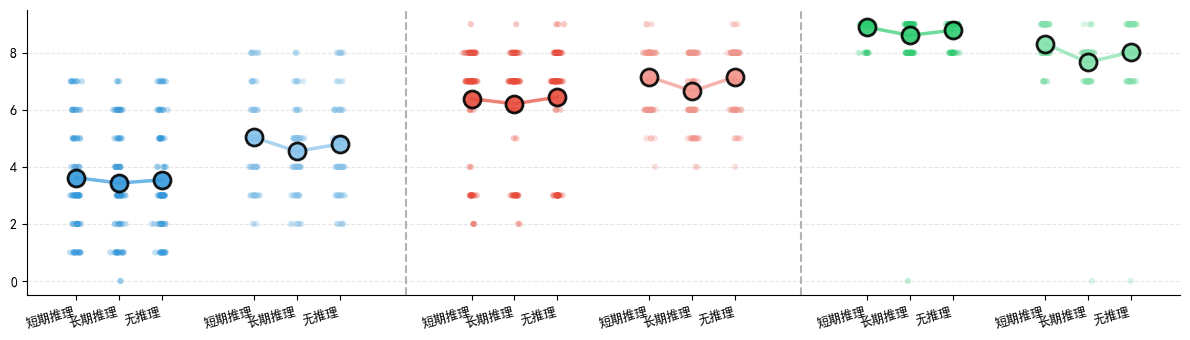


SPP_延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=-0.100, p=0.7249 n.s.
    情绪评分: diff=+0.533, p=0.0148 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.144, p=0.6091 n.s.
    情绪评分: diff=+0.067, p=0.7816 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.044, p=0.8721 n.s.
    情绪评分: diff=-0.467, p=0.0312 ***
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.022, p=0.9484 n.s.
    情绪评分: diff=+0.667, p=0.0002 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.011, p=0.9743 n.s.
    情绪评分: diff=+0.289, p=0.1256 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.011, p=0.9741 n.s.
    情绪评分: diff=-0.378, p=0.0229 ***
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.000, p=nan n.s.
    情绪评分: diff=+0.211, p=0.0005 ***
  short-term-reas

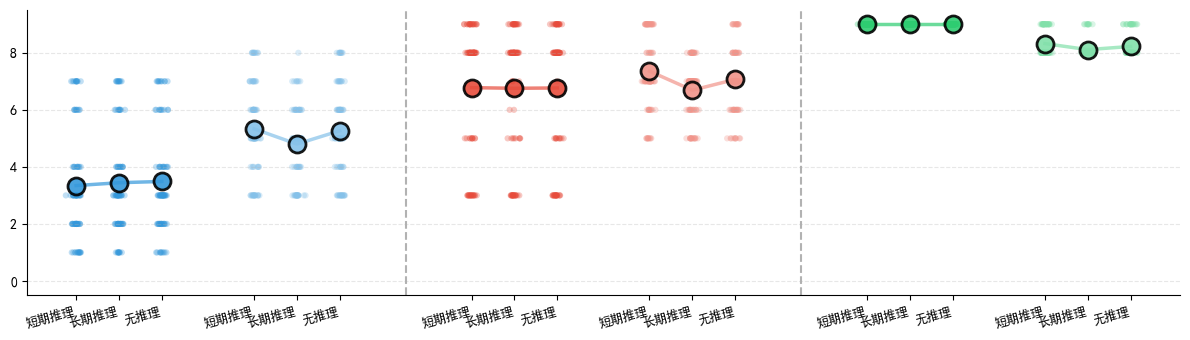


SPP_延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.100, p=0.7054 n.s.
    情绪评分: diff=+0.644, p=0.0300 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.089, p=0.7392 n.s.
    情绪评分: diff=+0.189, p=0.5154 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.011, p=0.9633 n.s.
    情绪评分: diff=-0.456, p=0.1030 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.367, p=0.1049 n.s.
    情绪评分: diff=+0.478, p=0.0493 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.256, p=0.2542 n.s.
    情绪评分: diff=+0.178, p=0.4378 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.111, p=0.6113 n.s.
    情绪评分: diff=-0.300, p=0.2308 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=-0.100, p=0.3187 n.s.
    情绪评分: diff=+0.178, p=0.1268 n.s.
  short-term-reasoning vs NA

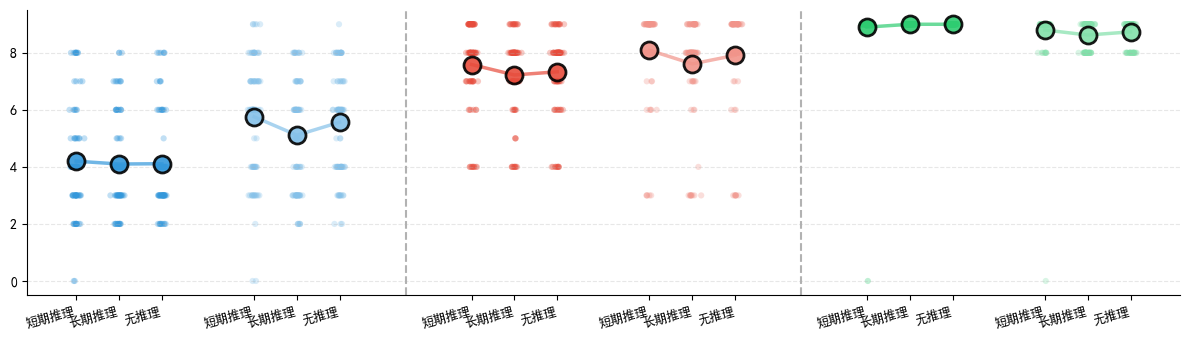


SPP_无延迟 - DeepSeek-V3-Fast 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.033, p=0.9092 n.s.
    情绪评分: diff=+0.056, p=0.8117 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.056, p=0.8482 n.s.
    情绪评分: diff=-0.067, p=0.7773 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.089, p=0.7577 n.s.
    情绪评分: diff=-0.122, p=0.5893 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.133, p=0.6471 n.s.
    情绪评分: diff=+0.278, p=0.0731 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.078, p=0.7893 n.s.
    情绪评分: diff=+0.000, p=1.0000 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.056, p=0.8490 n.s.
    情绪评分: diff=-0.278, p=0.0716 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.056, p=0.2481 n.s.
    情绪评分: diff=+0.489, p=0.0000 ***
  short-term-reasoning

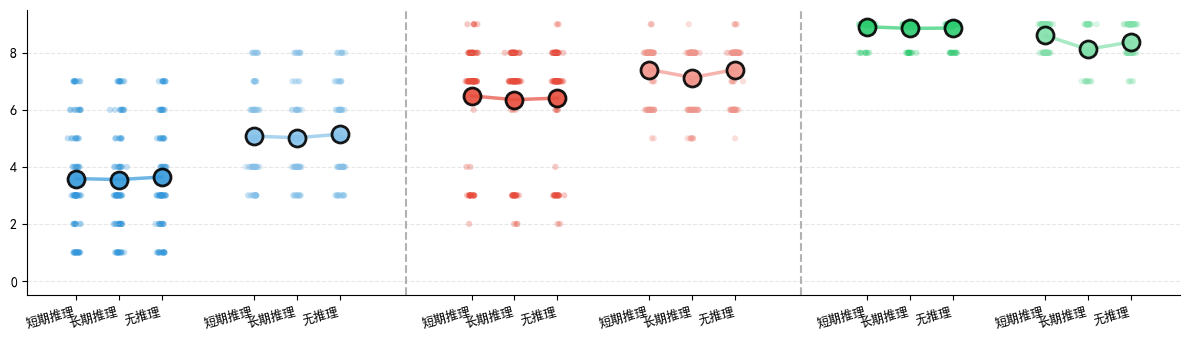


SPP_无延迟 - Qwen3-235B-A22B-Instruct-2507 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=-0.056, p=0.8464 n.s.
    情绪评分: diff=+0.289, p=0.2036 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.000, p=1.0000 n.s.
    情绪评分: diff=+0.200, p=0.3661 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.056, p=0.8459 n.s.
    情绪评分: diff=-0.089, p=0.6958 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.033, p=0.9232 n.s.
    情绪评分: diff=+0.422, p=0.0186 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.089, p=0.7995 n.s.
    情绪评分: diff=+0.067, p=0.7308 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.056, p=0.8723 n.s.
    情绪评分: diff=-0.356, p=0.0444 ***
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.000, p=nan n.s.
    情绪评分: diff=+0.278, p=0.0001 ***
  short-term-r

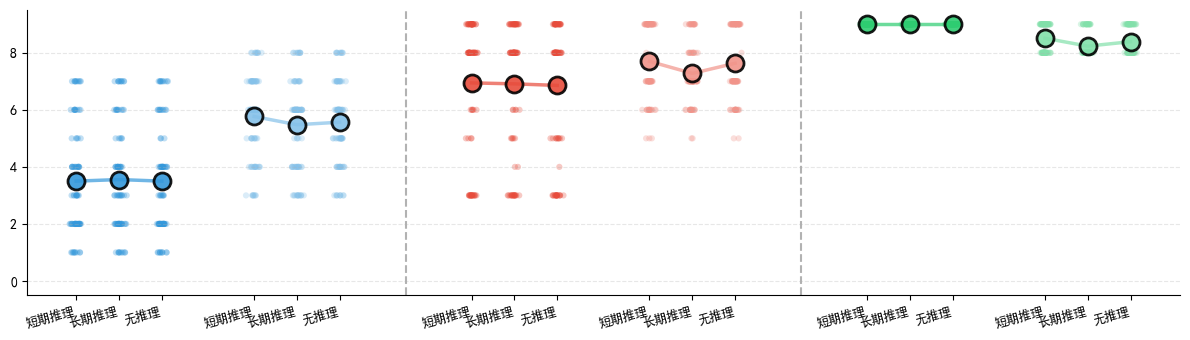


SPP_无延迟 - Kimi-K2-0905 显著性结果:
--------------------------------------------------------------------------------
Category 1.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.011, p=0.9659 n.s.
    情绪评分: diff=+0.333, p=0.2425 n.s.
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.033, p=0.9040 n.s.
    情绪评分: diff=+0.000, p=1.0000 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.022, p=0.9320 n.s.
    情绪评分: diff=-0.333, p=0.2366 n.s.
Category 2.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.289, p=0.2072 n.s.
    情绪评分: diff=+0.489, p=0.0354 ***
  short-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=+0.122, p=0.6000 n.s.
    情绪评分: diff=+0.133, p=0.4956 n.s.
  long-term-reasoning vs NAN-reasoning:
    惩罚评分: diff=-0.167, p=0.4658 n.s.
    情绪评分: diff=-0.356, p=0.1242 n.s.
Category 3.0:
  short-term-reasoning vs long-term-reasoning:
    惩罚评分: diff=+0.000, p=nan n.s.
    情绪评分: diff=+0.189, p=0.0000 ***
  short-term-reasoning vs NAN-

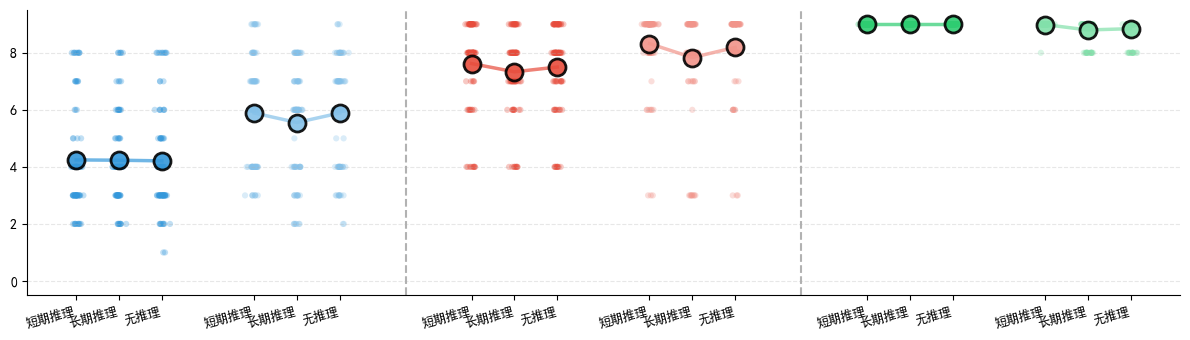


所有推理类型图形绘制完成！


In [53]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 定义category颜色
category_colors = {
    1: {'rating': '#3498DB', 'emotion': '#85C1E9'},
    2: {'rating': '#E74C3C', 'emotion': '#F1948A'},
    3: {'rating': '#2ECC71', 'emotion': '#82E0AA'},
    4: {'rating': '#F39C12', 'emotion': '#F8C471'},
    5: {'rating': '#9B59B6', 'emotion': '#BB8FCE'},
    6: {'rating': '#1ABC9C', 'emotion': '#76D7C4'},
    7: {'rating': '#E67E22', 'emotion': '#F0B27A'},
    8: {'rating': '#34495E', 'emotion': '#85929E'}
}

def prepare_reasoning_plot_data(filtered_data):
    """
    准备推理类型分析的绘图数据
    """
    plot_data = {}  # 结构: {block_key: {model: {category: reasoning_stats}}}
    raw_data = {}   # 结构: {block_key: {model: {category: raw_dataframe}}}
    
    reasoning_types = ['short-term-reasoning', 'long-term-reasoning', 'NAN-reasoning']
    
    for role in ['TPP', 'SPP']:
        for delay_class in ['延迟', '无延迟']:
            block_key = f"{role}_{delay_class}"
            plot_data[block_key] = {}
            raw_data[block_key] = {}
            
            # 筛选当前块的数据
            block_data = filtered_data[
                (filtered_data['Role'] == role) &
                (filtered_data['Delay_Class'] == delay_class)
            ]
            
            if len(block_data) == 0:
                continue
            
            # 对每个模型
            for model in target_models:
                model_data = block_data[block_data['Model'] == model]
                
                if len(model_data) == 0:
                    continue
                
                plot_data[block_key][model] = {}
                raw_data[block_key][model] = {}
                
                # 获取所有category
                categories = sorted(model_data['Category'].unique())
                
                for category in categories:
                    category_data = model_data[model_data['Category'] == category]
                    
                    if len(category_data) == 0:
                        continue
                    
                    # 按推理类型分组统计
                    reasoning_stats = category_data.groupby('Reasoning').agg({
                        'Rating': 'mean',
                        'Emotion': 'mean',
                        'List2': 'count'
                    }).reset_index()
                    
                    reasoning_stats.columns = ['Reasoning', 'Mean_Rating', 'Mean_Emotion', 'Sample_Count']
                    
                    # 只保留我们关注的三种推理类型
                    reasoning_stats = reasoning_stats[reasoning_stats['Reasoning'].isin(reasoning_types)]
                    
                    # 保存统计数据
                    plot_data[block_key][model][category] = reasoning_stats
                    
                    # 保存原始数据
                    raw_data[block_key][model][category] = category_data
    
    return plot_data, raw_data

def plot_reasoning_results(block_key, model, plot_data, raw_data, results_df, save_path=None):
    """
    为单个模型绘制推理类型分析结果图 - 所有category在一个图中
    X轴为三种推理类型
    """
    # 获取该模型的所有category数据
    model_data = plot_data.get(model, {})
    model_raw = raw_data.get(model, {})
    
    if not model_data:
        print(f"模型 {model} 在 {block_key} 中无数据")
        return
    
    categories = sorted(model_data.keys())
    n_categories = len(categories)
    
    if n_categories == 0:
        return
    
    # 创建单个图形
    fig, ax = plt.subplots(1, 1, figsize=(12, 3.5))
    
    role, delay_class = block_key.split('_')
    
    # 推理类型
    reasoning_types = ['short-term-reasoning', 'long-term-reasoning', 'NAN-reasoning']
    reasoning_labels = ['短期推理', '长期推理', '无推理']
    
    # 定义category在X轴的位置区间
    category_width = 90
    gap_between_categories = 30
    left_margin = 40
    right_margin = 40
    
    category_positions = {}
    for i, cat in enumerate(categories):
        start = left_margin + i * (category_width + gap_between_categories)
        end = start + category_width
        category_positions[cat] = (start, end)
    
    # 存储所有数据点用于设置y轴范围
    all_y_values = []
    
    # 对每个category绘图
    for category in categories:
        reasoning_stats = model_data[category]
        raw_df = model_raw[category]
        
        if len(reasoning_stats) == 0:
            continue
        
        # 获取该category的X轴位置范围
        x_start, x_end = category_positions[category]
        
        # 将推理类型映射到该category的X轴范围
        def map_reasoning_to_x(reasoning_type, score_type='rating'):
            # reasoning_type: 'short-term-reasoning', 'long-term-reasoning', 或 'NAN-reasoning'
            # 将推理类型映射到0, 1, 2
            reasoning_value = reasoning_types.index(reasoning_type)
            
            # 惩罚评分占左边40%，中间间隔20%，情绪评分占右边40%
            rating_width = (x_end - x_start) * 0.40
            gap_width = (x_end - x_start) * 0.20
            emotion_width = (x_end - x_start) * 0.40
            
            # 每种评分内部，三个推理类型之间的间距
            within_score_gap = 13  # 推理类型之间的距离
            
            if score_type == 'rating':
                # 惩罚评分在左边
                # 计算该评分区域的中心
                rating_center = x_start + rating_width / 2
                # 三个推理类型分布在中心两侧
                return rating_center + (reasoning_value - 1) * within_score_gap
            else:
                # 情绪评分在右边
                # 计算该评分区域的中心
                emotion_center = x_start + rating_width + gap_width + emotion_width / 2
                # 三个推理类型分布在中心两侧
                return emotion_center + (reasoning_value - 1) * within_score_gap
        
        # 获取颜色
        rating_color = category_colors[category]['rating']
        emotion_color = category_colors[category]['emotion']
        
        # ===== 绘制惩罚评分（Rating） =====
        
        # 准备数据
        rating_means = []
        rating_x_positions = []
        
        for reasoning in reasoning_types:
            reasoning_data = reasoning_stats[reasoning_stats['Reasoning'] == reasoning]
            if len(reasoning_data) > 0:
                rating_means.append(reasoning_data['Mean_Rating'].values[0])
                rating_x_positions.append(map_reasoning_to_x(reasoning, 'rating'))
            else:
                rating_means.append(np.nan)
                rating_x_positions.append(map_reasoning_to_x(reasoning, 'rating'))
        
        # 1. 绘制原始数据点（小散点）
        for reasoning in reasoning_types:
            reasoning_raw = raw_df[raw_df['Reasoning'] == reasoning]
            if len(reasoning_raw) > 0:
                raw_ratings = reasoning_raw['Rating'].values
                x_pos = map_reasoning_to_x(reasoning, 'rating')
                
                # 添加随机抖动
                jitter = np.random.normal(0, 0.8, len(raw_ratings))
                x_positions_jittered = [x_pos] * len(raw_ratings) + jitter
                
                ax.scatter(x_positions_jittered, raw_ratings,
                          s=20, color=rating_color, alpha=0.3,
                          edgecolors='none', zorder=1)
                
                all_y_values.extend(raw_ratings)
        
        # 2. 绘制均值点（大散点）
        valid_means = [m for m in rating_means if not np.isnan(m)]
        valid_x = [x for m, x in zip(rating_means, rating_x_positions) if not np.isnan(m)]
        
        if len(valid_means) > 0:
            ax.scatter(valid_x, valid_means,
                      s=150, color=rating_color, alpha=0.9,
                      edgecolors='black', linewidth=2, zorder=4,
                      label=f'Category {category} - 惩罚评分')
            
            all_y_values.extend(valid_means)
        
        # 3. 绘制连线
        if len(valid_means) >= 2:
            ax.plot(valid_x, valid_means,
                   color=rating_color, linewidth=2.5, alpha=0.7, zorder=3)
        
        # ===== 绘制情绪评分（Emotion） =====
        
        # 准备数据
        emotion_means = []
        emotion_x_positions = []
        
        for reasoning in reasoning_types:
            reasoning_data = reasoning_stats[reasoning_stats['Reasoning'] == reasoning]
            if len(reasoning_data) > 0:
                emotion_means.append(reasoning_data['Mean_Emotion'].values[0])
                emotion_x_positions.append(map_reasoning_to_x(reasoning, 'emotion'))
            else:
                emotion_means.append(np.nan)
                emotion_x_positions.append(map_reasoning_to_x(reasoning, 'emotion'))
        
        # 1. 绘制原始数据点（小散点）
        for reasoning in reasoning_types:
            reasoning_raw = raw_df[raw_df['Reasoning'] == reasoning]
            if len(reasoning_raw) > 0:
                raw_emotions = reasoning_raw['Emotion'].values
                x_pos = map_reasoning_to_x(reasoning, 'emotion')
                
                # 添加随机抖动
                jitter = np.random.normal(0, 0.8, len(raw_emotions))
                x_positions_jittered = [x_pos] * len(raw_emotions) + jitter
                
                ax.scatter(x_positions_jittered, raw_emotions,
                          s=20, color=emotion_color, alpha=0.3,
                          edgecolors='none', zorder=1)
                
                all_y_values.extend(raw_emotions)
        
        # 2. 绘制均值点（大散点）
        valid_means = [m for m in emotion_means if not np.isnan(m)]
        valid_x = [x for m, x in zip(emotion_means, emotion_x_positions) if not np.isnan(m)]
        
        if len(valid_means) > 0:
            ax.scatter(valid_x, valid_means,
                      s=150, color=emotion_color, alpha=0.9,
                      edgecolors='black', linewidth=2, zorder=4,
                      label=f'Category {category} - 情绪评分')
            
            all_y_values.extend(valid_means)
        
        # 3. 绘制连线
        if len(valid_means) >= 2:
            ax.plot(valid_x, valid_means,
                   color=emotion_color, linewidth=2.5, alpha=0.7, zorder=3)
    
    # 绘制category之间的分隔线
    if n_categories > 1:
        for i in range(1, n_categories):
            prev_cat = categories[i-1]
            curr_cat = categories[i]
            # 虚线位置在两个category中间
            x_sep = category_positions[prev_cat][1] + gap_between_categories / 2
            ax.axvline(x=x_sep, color='gray', linestyle='--',
                      linewidth=1.5, alpha=0.6, zorder=0)
    
    # 设置X轴刻度
    x_tick_positions = []
    x_tick_labels = []
    
    for category in categories:
        x_start, x_end = category_positions[category]
        
        rating_width = (x_end - x_start) * 0.40
        gap_width = (x_end - x_start) * 0.20
        emotion_width = (x_end - x_start) * 0.40
        
        within_score_gap = 13
        
        # 为惩罚评分添加刻度
        rating_center = x_start + rating_width / 2
        for i, reasoning in enumerate(reasoning_types):
            x_rating = rating_center + (i - 1) * within_score_gap
            x_tick_positions.append(x_rating)
            x_tick_labels.append(reasoning_labels[i])
        
        # 为情绪评分添加刻度
        emotion_center = x_start + rating_width + gap_width + emotion_width / 2
        for i, reasoning in enumerate(reasoning_types):
            x_emotion = emotion_center + (i - 1) * within_score_gap
            x_tick_positions.append(x_emotion)
            x_tick_labels.append(reasoning_labels[i])
    
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, fontsize=9, rotation=15, ha='right')
    
    # 设置X轴范围 - 确保有足够的边距
    if categories:
        first_cat = categories[0]
        last_cat = categories[-1]
        x_min = category_positions[first_cat][0] - 10
        x_max = category_positions[last_cat][1] + 10
        ax.set_xlim(x_min, x_max)
    
    # 设置Y轴范围
    ax.set_ylim(-0.5, 9.5)
    ax.set_yticks([0, 2, 4, 6, 8])
    
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # 删除上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 打印显著性信息
    print(f"\n{block_key} - {model} 显著性结果:")
    print("-" * 80)
    
    if results_df is not None and len(results_df) > 0:
        for category in categories:
            category_results = results_df[
                (results_df['Role'] == role) &
                (results_df['Delay_Class'] == delay_class) &
                (results_df['Model'] == model) &
                (results_df['Category'] == category)
            ]
            
            if not category_results.empty:
                print(f"Category {category}:")
                for _, row in category_results.iterrows():
                    print(f"  {row['Reasoning1']} vs {row['Reasoning2']}:")
                    
                    if row['Rating_Significant']:
                        print(f"    惩罚评分: diff={row['Rating_Diff']:+.3f}, p={row['Rating_p']:.4f} ***")
                    else:
                        print(f"    惩罚评分: diff={row['Rating_Diff']:+.3f}, p={row['Rating_p']:.4f} n.s.")
                    
                    if row['Emotion_Significant']:
                        print(f"    情绪评分: diff={row['Emotion_Diff']:+.3f}, p={row['Emotion_p']:.4f} ***")
                    else:
                        print(f"    情绪评分: diff={row['Emotion_Diff']:+.3f}, p={row['Emotion_p']:.4f} n.s.")
    
    plt.tight_layout()
    
    if save_path:
        import os
        os.makedirs(save_path, exist_ok=True)
        filename = f'{save_path}/{block_key}_{model.replace("/", "_")}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"\n已保存图片: {filename}")
    
    plt.show()

# 使用示例
# 1. 准备数据
plot_data, raw_data = prepare_reasoning_plot_data(filtered_data)

# 2. 绘制所有图形
save_path = 'reasoning_plots'

for role in ['TPP', 'SPP']:
    for delay_class in ['延迟', '无延迟']:
        block_key = f"{role}_{delay_class}"
        
        if block_key in plot_data:
            for model in target_models:
                if model in plot_data[block_key]:
                    plot_reasoning_results(
                        block_key, 
                        model, 
                        plot_data[block_key], 
                        raw_data[block_key], 
                        results_df if 'results_df' in locals() else None,
                        save_path=save_path
                    )

print("\n所有推理类型图形绘制完成！")